## EDA

### **1. Data Overview**

#### 1.1 Data Load

In [20]:
import pandas as pd
import openpyxl
import os
import re

# Load the workbook
file_path = '1_finalized_datasets.xlsx'
workbook = openpyxl.load_workbook(file_path)

dataframes={}
# Loop through all sheet names
for sheet in workbook.sheetnames:
    
    print(f"Processing sheet: {sheet}")
    clean_name = re.sub(r'[^\w\s]', '', sheet).strip()
    clean_name = clean_name.replace(" ", "_")  # Optional: Replace spaces with underscores
    if clean_name in dataframes:
        print(f"⚠️ Skipping duplicate sheet name: {clean_name}")
        continue
    # Read the sheet into a DataFrame
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Create a variable with the cleaned sheet name
    dataframes[clean_name] = df

    print(f"✅ Created DataFrame: {clean_name} ({df.shape[0]} rows)")


Processing sheet: Sheet1
✅ Created DataFrame: Sheet1 (1322 rows)
Processing sheet: Sheet2
✅ Created DataFrame: Sheet2 (1336 rows)
Processing sheet: category
✅ Created DataFrame: category (11 rows)
Processing sheet: allergen
✅ Created DataFrame: allergen (8 rows)
Processing sheet: countrymap 
✅ Created DataFrame: countrymap (76 rows)
Processing sheet: 📝 recipe_ingredient
✅ Created DataFrame: recipe_ingredient (8209 rows)
Processing sheet: 🏷️ recipe_category_df
✅ Created DataFrame: recipe_category_df (8123 rows)
Processing sheet: 🍴 recipes
✅ Created DataFrame: recipes (1322 rows)
Processing sheet: 📊 recipe_nutrition
✅ Created DataFrame: recipe_nutrition (1322 rows)
Processing sheet: 🧂 final_ingredient_df
✅ Created DataFrame: final_ingredient_df (999 rows)


#### 1.2 Data Summary

In [21]:
# Sheets to exclude
excluded_sheets = ['Sheet1', 'Sheet2']

print(f"\n🔍 Starting Analysis of DataFrames...")

# Loop through all dataframes in the dictionary
for name, df in dataframes.items():
    if name not in excluded_sheets:
        print(f"\n🔍 Analyzing Sheet: {name}")
        print("=" * 60)

        # 1. Shape
        print(f"📐 Shape: {df.shape}")

        # 2. Columns
        print(f"🧾 Columns: {list(df.columns)}")

        # 3. Info
        print(f"\n🛠️ DataFrame Info:")
        df.info()

        # 4. Total null values
        total_null = df.isnull().sum().sum()
        print(f"\n🚫 Total Null Values (overall): {total_null}")

        # 4.1 Missing values per column
        missing_per_column = df.isnull().sum()
        if missing_per_column.any():
            print("\n🚨 Missing Values Per Column:")
            print(missing_per_column[missing_per_column > 0].sort_values(ascending=False))
            
            percent_missing = (missing_per_column / len(df)) * 100
            print("\n📈 Missing Values (% per column):")
            print(percent_missing[percent_missing > 0].sort_values(ascending=False))
        else:
            print("\n✅ No missing values in any column.")

        # 5. Unique values per column
        print(f"\n🔢 Unique Values per Column:")
        print(df.nunique(dropna=False))

        # 6. Sample rows
        print(f"\n🔍 Sample Rows (first 5):")
        try:
            from IPython.display import display
            display(df.head(5))
        except ImportError:
            print(df.head(5))



🔍 Starting Analysis of DataFrames...

🔍 Analyzing Sheet: category
📐 Shape: (11, 3)
🧾 Columns: ['pk', 'name', 'description']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pk           11 non-null     int64 
 1   name         11 non-null     object
 2   description  11 non-null     object
dtypes: int64(1), object(2)
memory usage: 392.0+ bytes

🚫 Total Null Values (overall): 0

✅ No missing values in any column.

🔢 Unique Values per Column:
pk             11
name           11
description    11
dtype: int64

🔍 Sample Rows (first 5):


,pk,name,description
0,1,vegan,Allowed categories: plant_based\nExcluded alle...
1,2,vegetarian,"Allowed categories: plant_based, dairy, egg\nE..."
2,3,pescetarian,"Allowed categories: plant_based, dairy, egg, s..."
3,4,dairy free,Excluded allergen groups: milk\nExcluded ingre...
4,5,egg free,Excluded allergen groups: egg\nExcluded ingred...



🔍 Analyzing Sheet: allergen
📐 Shape: (8, 3)
🧾 Columns: ['pk', 'name', 'description']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pk           8 non-null      int64 
 1   name         8 non-null      object
 2   description  8 non-null      object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes

🚫 Total Null Values (overall): 0

✅ No missing values in any column.

🔢 Unique Values per Column:
pk             8
name           8
description    8
dtype: int64

🔍 Sample Rows (first 5):


,pk,name,description
0,1,dairy,Common infant allergen. Found in dairy products.
1,2,egg,Can cause allergy even in small amounts.
2,3,soy,"Plant-based but common allergen, especially in..."
3,4,tree_nuts,Tree nuts are a top allergen. Avoid early intr...
4,5,peanuts,Peanuts are a major allergen. Introduce carefu...



🔍 Analyzing Sheet: countrymap
📐 Shape: (76, 4)
🧾 Columns: ['pk', 'country', 'region', 'flag_code']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pk         76 non-null     int64 
 1   country    76 non-null     object
 2   region     76 non-null     object
 3   flag_code  76 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.5+ KB

🚫 Total Null Values (overall): 0

✅ No missing values in any column.

🔢 Unique Values per Column:
pk           76
country      74
region       11
flag_code    74
dtype: int64

🔍 Sample Rows (first 5):


,pk,country,region,flag_code
0,1,China,Asian,cn
1,2,Japan,Asian,jp
2,3,South Korea,Asian,kr
3,4,Mongolia,Asian,mn
4,5,Nepal,Asian,np



🔍 Analyzing Sheet: recipe_ingredient
📐 Shape: (8209, 2)
🧾 Columns: ['recipe_id', 'ingredient_id']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8209 entries, 0 to 8208
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   recipe_id      8209 non-null   int64
 1   ingredient_id  8209 non-null   int64
dtypes: int64(2)
memory usage: 128.4 KB

🚫 Total Null Values (overall): 0

✅ No missing values in any column.

🔢 Unique Values per Column:
recipe_id        1322
ingredient_id     999
dtype: int64

🔍 Sample Rows (first 5):


,recipe_id,ingredient_id
0,1,155
1,1,332
2,1,182
3,1,232
4,1,185



🔍 Analyzing Sheet: recipe_category_df
📐 Shape: (8123, 2)
🧾 Columns: ['recipe_id', 'category_id']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   recipe_id    8123 non-null   int64
 1   category_id  8123 non-null   int64
dtypes: int64(2)
memory usage: 127.0 KB

🚫 Total Null Values (overall): 0

✅ No missing values in any column.

🔢 Unique Values per Column:
recipe_id      1322
category_id      10
dtype: int64

🔍 Sample Rows (first 5):


,recipe_id,category_id
0,1,11
1,1,9
2,1,4
3,1,5
4,1,6



🔍 Analyzing Sheet: recipes
📐 Shape: (1322, 20)
🧾 Columns: ['name', 'ingredients', 'instructions', 'min_age', 'max_age', 'texture', 'prep_time', 'cook_time', 'serving', 'recipe_link', 'credibility', 'image_link', 'difficulty', 'meal_type', 'description', 'tips', 'hypoallergenic', 'origin_id', 'choking_hazards', 'recipe_id']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1322 non-null   object 
 1   ingredients      1322 non-null   object 
 2   instructions     1322 non-null   object 
 3   min_age          1205 non-null   float64
 4   max_age          1175 non-null   float64
 5   texture          1322 non-null   object 
 6   prep_time        739 non-null    float64
 7   cook_time        750 non-null    float64
 8   serving          1176 non-null   object 
 9   recipe_link      1322 non-null   obj

,name,ingredients,instructions,min_age,max_age,texture,prep_time,cook_time,serving,recipe_link,credibility,image_link,difficulty,meal_type,description,tips,hypoallergenic,origin_id,choking_hazards,recipe_id
0,Cassava Porridge with Fish Sauce and Lemon (Bu...,"- 60 g cassava, boiled and blended\n- 20 g fis...","Broth:\n1. Use chicken bones, chicken feet, fi...",6.0,8.0,NONE,15.0,45.0,1,https://eprints.uad.ac.id/51598/1/Buku%20Makan...,NaN,NaN,Medium,NaN,NaN,NaN,No,9,No,1
1,Bitterballs (Bitterballen),- 100 g beef mince \n- 30 g potato starch \n- ...,1. Stir-fry blended spices until fragrant. \n2...,9.0,11.0,family food,30.0,30.0,10 servings,pdfcoffee.com_mommyclopedia-78-resep-mpasi-pdf...,NaN,NaN,Hard,Snack,NaN,NaN,No,9,No,2
2,Broccoli/Cauliflower Cheese,"- 175g cauliflower/broccoli, cut into pieces\n...","1. Steam, boil, or microwave cauliflower/brocc...",6.0,12.0,NONE,10.0,20.0,NaN,https://www.islhd.health.nsw.gov.au/sites/defa...,Illawarra Shoalhaven Local Health District (IS...,NaN,Medium,NaN,NaN,NaN,No,68,No,3
3,Vegetable Fingers,"- 1 carrot, potato, or sweet potato, peeled an...",1. Steam or microwave vegetables until tender....,6.0,12.0,NONE,5.0,10.0,NaN,https://www.islhd.health.nsw.gov.au/sites/defa...,Illawarra Shoalhaven Local Health District (IS...,NaN,Easy,NaN,NaN,NaN,Yes,68,No,4
4,Beef Casserole,"- 1 onion, peeled and finely chopped\n- 1½ tab...",1. Preheat oven to 180°C.\n2. Heat oil in a me...,6.0,12.0,family food,10.0,2.0,NaN,https://www.islhd.health.nsw.gov.au/sites/defa...,Illawarra Shoalhaven Local Health District (IS...,NaN,Medium,NaN,NaN,NaN,Yes,68,No,5



🔍 Analyzing Sheet: recipe_nutrition
📐 Shape: (1322, 8)
🧾 Columns: ['recipe_id', 'total_energy_kcal', 'total_carbs_g', 'total_protein_g', 'total_fat_g', 'final_micronutrients', 'nutrition_id', 'fat']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   recipe_id             1322 non-null   int64  
 1   total_energy_kcal     1317 non-null   object 
 2   total_carbs_g         1320 non-null   object 
 3   total_protein_g       1321 non-null   object 
 4   total_fat_g           1283 non-null   object 
 5   final_micronutrients  985 non-null    object 
 6   nutrition_id          1322 non-null   int64  
 7   fat                   38 non-null     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 82.8+ KB

🚫 Total Null Values (overall): 1668

🚨 Missing Values Per Column:
fat                     1284
final

,recipe_id,total_energy_kcal,total_carbs_g,total_protein_g,total_fat_g,final_micronutrients,nutrition_id,fat
0,1,255.48,24.854,24.965,13.1378,"['Magnesium', 'P', 'beta', 'Total fat (NLEA)',...",1,NaN
1,2,0,3.376,68.751,50.332,"['Sodium', 'Na']",2,NaN
2,3,53.55,23.5955,46.383,28.989,"['P', 'Vitamin A', 'Vitamin K (phylloquinone)'...",3,NaN
3,5,1585.2,44.9207,113.015,290.2725,"['Sodium', 'P', 'Vitamin C', 'Cholesterol', 'C...",4,NaN
4,6,0,0.492,0.0943,0.0359,"['Ca', 'Na', 'K', 'Sodium', 'Potassium', 'Calc...",5,NaN



🔍 Analyzing Sheet: final_ingredient_df
📐 Shape: (999, 4)
🧾 Columns: ['pk', 'name', 'allergen_group_id', 'isAllergen']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pk                 999 non-null    int64  
 1   name               999 non-null    object 
 2   allergen_group_id  238 non-null    float64
 3   isAllergen         999 non-null    bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 24.5+ KB

🚫 Total Null Values (overall): 761

🚨 Missing Values Per Column:
allergen_group_id    761
dtype: int64

📈 Missing Values (% per column):
allergen_group_id    76.176176
dtype: float64

🔢 Unique Values per Column:
pk                   999
name                 999
allergen_group_id      9
isAllergen             2
dtype: int64

🔍 Sample Rows (first 5):


,pk,name,allergen_group_id,isAllergen
0,1,acai,NaN,False
1,2,agar-agar powder,NaN,False
2,3,all purpose flour,8.0,True
3,4,almond,NaN,False
4,5,almond butter,4.0,True


#### 1.3 Missing Values

In [22]:
def detect_missing_values(df):
    total_missing = df.isnull().sum().sum()
    print(f"\n🚫 TOTAL Missing Values: {total_missing}")

    missing_per_column = df.isnull().sum()
    if missing_per_column.any():
        print("\n📊 Missing Values Per Column:")
        print(missing_per_column[missing_per_column > 0].sort_values(ascending=False))

        print("\n📈 Missing Values Percentage Per Column:")
        percent_missing = (missing_per_column / len(df)) * 100
        print(percent_missing[percent_missing > 0].sort_values(ascending=False))
    else:
        print("✅ No missing values in any column.")


In [23]:
excluded_sheets = ['Sheet1', 'Sheet2']

for name, df in dataframes.items():
    if name not in excluded_sheets:
        print(f"\n🔍 Analyzing Sheet: {name}")
        print("=" * 60)
        detect_missing_values(df)



🔍 Analyzing Sheet: category

🚫 TOTAL Missing Values: 0
✅ No missing values in any column.

🔍 Analyzing Sheet: allergen

🚫 TOTAL Missing Values: 0
✅ No missing values in any column.

🔍 Analyzing Sheet: countrymap

🚫 TOTAL Missing Values: 0
✅ No missing values in any column.

🔍 Analyzing Sheet: recipe_ingredient

🚫 TOTAL Missing Values: 0
✅ No missing values in any column.

🔍 Analyzing Sheet: recipe_category_df

🚫 TOTAL Missing Values: 0
✅ No missing values in any column.

🔍 Analyzing Sheet: recipes

🚫 TOTAL Missing Values: 7101

📊 Missing Values Per Column:
tips           1298
image_link     1279
description    1190
meal_type       985
credibility     784
prep_time       583
cook_time       572
max_age         147
serving         146
min_age         117
dtype: int64

📈 Missing Values Percentage Per Column:
tips           98.184569
image_link     96.747352
description    90.015129
meal_type      74.508321
credibility    59.304085
prep_time      44.099849
cook_time      43.267776
max_age

### **2. Univariate Analysis**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  


#### 2.1 DataFrame: category

In [12]:
df = dataframes['category']
print(f"All unique values in 'category' column: {df['pk'].is_unique}, All unique name :{df['name'].is_unique}")
print(df.head(3))  # show a few rows for documentation

All unique values in 'category' column: True, All unique name :True
   pk         name                                        description  \
0   1        vegan  Allowed categories: plant_based\nExcluded alle...   
1   2   vegetarian  Allowed categories: plant_based, dairy, egg\nE...   
2   3  pescetarian  Allowed categories: plant_based, dairy, egg, s...   

   name_length  desc_char_count  desc_word_count  
0            5              281               34  
1           10              276               35  
2           11              165               20  


Primary Key (pk) Analysis:
Total records: 11
Missing values: 0
Min ID: 1
Max ID: 11
ID Range: 10
ID Spacing Analysis:
pk
1.0    10
Name: count, dtype: int64


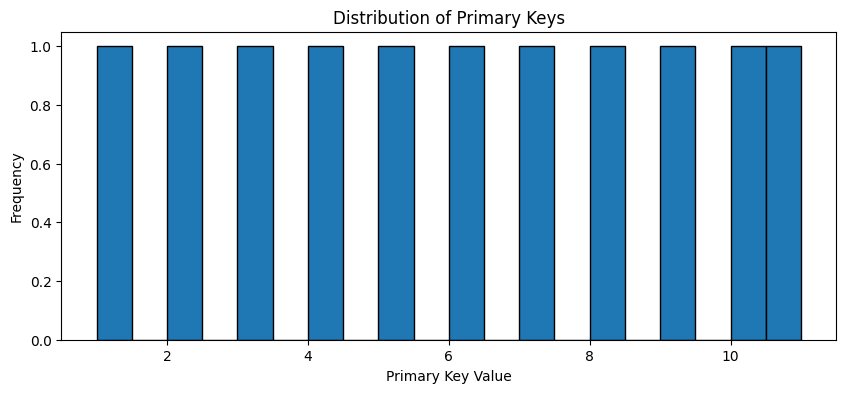

count    11.000000
mean      6.000000
std       3.316625
min       1.000000
25%       3.500000
50%       6.000000
75%       8.500000
max      11.000000
Name: pk, dtype: float64

In [13]:
# 1. Primary Key (pk) Analysis
print("="*50)
print("Primary Key (pk) Analysis:")
print("="*50)
print(f"Total records: {len(df)}")
print(f"Missing values: {df['pk'].isnull().sum()}")
print(f"Min ID: {df['pk'].min()}")
print(f"Max ID: {df['pk'].max()}")
print(f"ID Range: {df['pk'].max() - df['pk'].min()}")
print(f"ID Spacing Analysis:\n{df['pk'].diff().value_counts().head()}")

# Visualize ID distribution
plt.figure(figsize=(10, 4))
df['pk'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Primary Keys')
plt.xlabel('Primary Key Value')
plt.ylabel('Frequency')
plt.show()

display(df['pk'].describe())


In [14]:
# 2. Category Name Analysis
print("\n" + "="*50)
print("Category Name Analysis:")
print("="*50)
print(f"Missing values: {df['name'].isnull().sum()}")
print(f"Unique count: {df['name'].nunique()}/{len(df)}")

# Name length analysis
df['name_length'] = df['name'].str.len()
print("\nName Length Statistics:")
print(df['name_length'].describe())

print("\nCount Statistics:")
# Frequency count of categories in 'name' column
category_counts = df['name'].value_counts()
print(category_counts)


Category Name Analysis:
Missing values: 0
Unique count: 11/11

Name Length Statistics:
count    11.000000
mean      8.363636
std       2.110579
min       5.000000
25%       7.500000
50%       8.000000
75%      10.000000
max      11.000000
Name: name_length, dtype: float64

Count Statistics:
name
vegan          1
vegetarian     1
pescetarian    1
dairy free     1
egg free       1
soy free       1
nut free       1
gluten free    1
halal          1
non halal      1
non veg        1
Name: count, dtype: int64


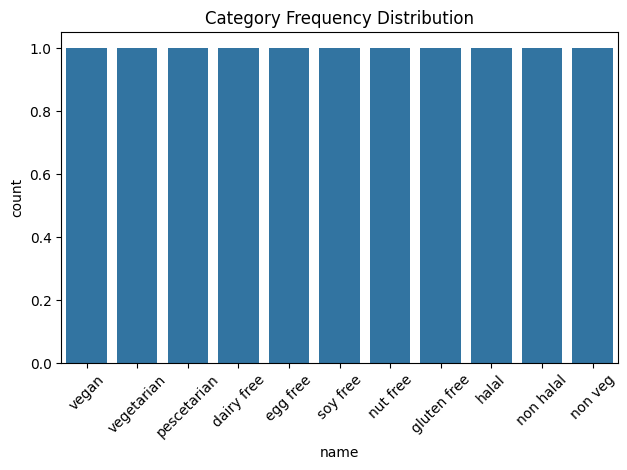

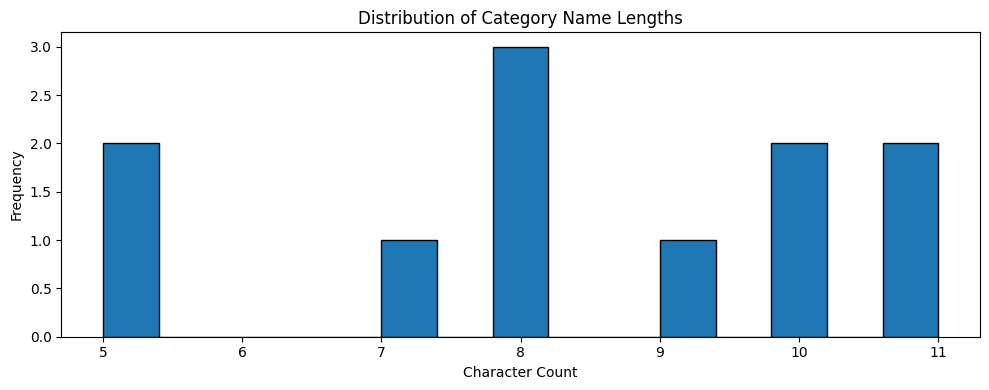

In [15]:
sns.countplot(x='name', data=df)
plt.title('Category Frequency Distribution')
plt.xticks(rotation=45)
plt.tight_layout()  # Moved here
plt.show()

# Visualize name lengths
plt.figure(figsize=(10, 4))
df['name_length'].plot(kind='hist', bins=15, edgecolor='black')
plt.title('Distribution of Category Name Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.tight_layout()  # Also here
plt.show()

In [16]:
# 3. Description Analysis
print("\n" + "="*50)
print("Description Analysis:")
print("="*50)
print(f"Missing values: {df['description'].isnull().sum()}")

# Text length metrics
df['desc_char_count'] = df['description'].str.len()
df['desc_word_count'] = df['description'].str.split().str.len()

print("\nCharacter Count Statistics:")
print(df['desc_char_count'].describe())

print("\nWord Count Statistics:")
print(df['desc_word_count'].describe())

# Content pattern analysis
print("\nKey phrase presence:")
key_phrases = ['Allowed categories', 'Excluded allergens', 'plant_based', 'dairy', 'egg']
for phrase in key_phrases:
    count = df['description'].str.contains(phrase).sum()
    print(f"{phrase}: {count}/{len(df)} ({count/len(df):.1%})")


# # Check the length of each description
# df['description_length'] = df['description'].apply(len)
# print("\nDescription Length Statistics:")
# print(df['description_length'].describe())


Description Analysis:
Missing values: 0

Character Count Statistics:
count     11.000000
mean     155.363636
std       67.733703
min       74.000000
25%      110.000000
50%      140.000000
75%      169.500000
max      281.000000
Name: desc_char_count, dtype: float64

Word Count Statistics:
count    11.000000
mean     19.363636
std       8.115081
min      12.000000
25%      14.000000
50%      17.000000
75%      21.000000
max      35.000000
Name: desc_word_count, dtype: float64

Key phrase presence:
Allowed categories: 3/11 (27.3%)
Excluded allergens: 0/11 (0.0%)
plant_based: 3/11 (27.3%)
dairy: 2/11 (18.2%)
egg: 4/11 (36.4%)


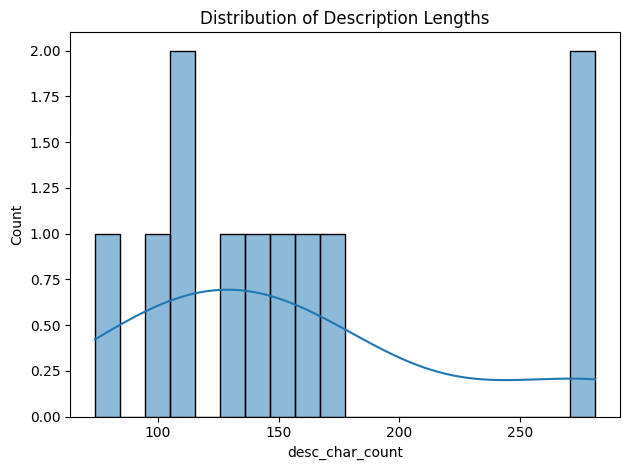

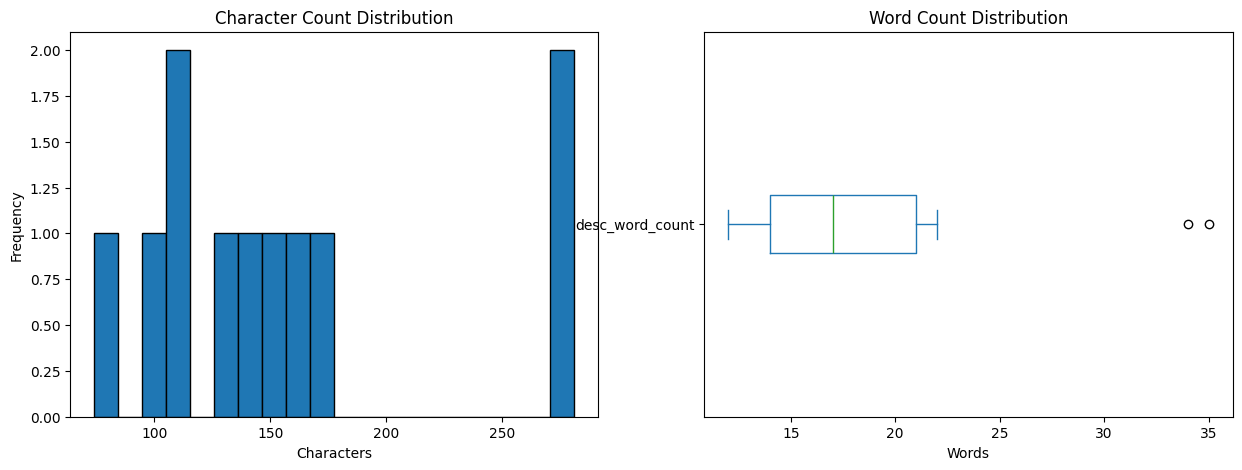

NameError: name 'all_text' is not defined

In [17]:
# Generating a word cloud for the descriptions
from wordcloud import WordCloud
# Plotting the length distribution of the descriptions
sns.histplot(df['desc_char_count'], bins=20, kde=True)
plt.title('Distribution of Description Lengths')
plt.tight_layout()
plt.show()

# Visualize description lengths
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df['desc_char_count'].plot(kind='hist', bins=20, edgecolor='black', ax=ax[0])
ax[0].set_title('Character Count Distribution')
ax[0].set_xlabel('Characters')

df['desc_word_count'].plot(kind='box', vert=False, ax=ax[1])
ax[1].set_title('Word Count Distribution')
ax[1].set_xlabel('Words')
plt.show()

text = " ".join(description for description in df['description'])
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white').generate(all_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Terms in Category Descriptions", size=20)
plt.show()

In [ ]:
# 5. Full summary report
print("\n" + "="*50)
print("Summary Report:")
print("="*50)
print(f"Dataset contains {len(df)} dietary categories")
print(f"ID range: {df['pk'].min()} to {df['pk'].max()}")
print(f"Average name length: {df['name_length'].mean():.1f} characters")
print(f"Average description length: {df['desc_word_count'].mean():.1f} words")
print(f"Most common naming pattern: {df['name_suffix'].mode()[0]}")
print(f"Most frequent term in descriptions: {max(key_phrases, key=lambda x: all_text.count(x))}")

In [ ]:
# Calculate skewness and kurtosis for the `description_length` column
skewness = df['description_length'].skew()
kurtosis = df['description_length'].kurtosis()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


#### 2.2 DataFrame: allergen

In [18]:
df = dataframes['allergen']
print(f"All unique values in 'allergen' column: {df['pk'].is_unique}, All unique name :{df['name'].is_unique}")
print(df.head(3))  # show a few rows for documentation

display(df.columns.to_list())

All unique values in 'allergen' column: True, All unique name :True
   pk   name                                        description
0   1  dairy   Common infant allergen. Found in dairy products.
1   2    egg           Can cause allergy even in small amounts.
2   3    soy  Plant-based but common allergen, especially in...


['pk', 'name', 'description']

Primary Key (pk) Analysis:
Total records: 8
Missing values: 0
Min ID: 1
Max ID: 8
ID Range: 7
ID Spacing Analysis:
pk
1.0    7
Name: count, dtype: int64


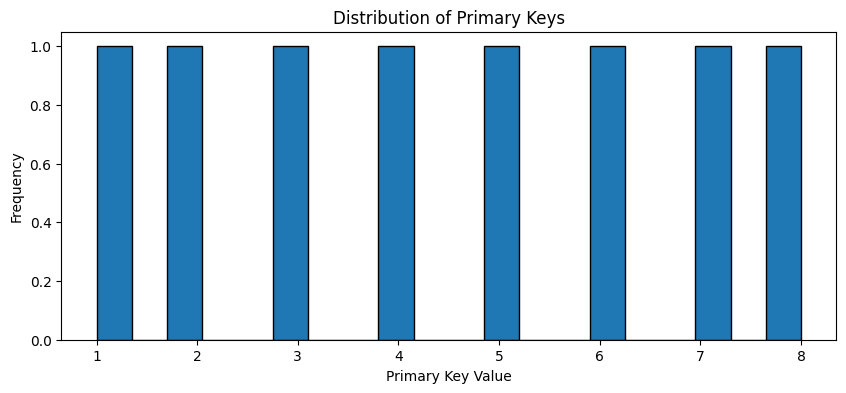

count    8.00000
mean     4.50000
std      2.44949
min      1.00000
25%      2.75000
50%      4.50000
75%      6.25000
max      8.00000
Name: pk, dtype: float64

In [19]:
# 1. Primary Key (pk) Analysis
print("="*50)
print("Primary Key (pk) Analysis:")
print("="*50)
print(f"Total records: {len(df)}")
print(f"Missing values: {df['pk'].isnull().sum()}")
print(f"Min ID: {df['pk'].min()}")
print(f"Max ID: {df['pk'].max()}")
print(f"ID Range: {df['pk'].max() - df['pk'].min()}")
print(f"ID Spacing Analysis:\n{df['pk'].diff().value_counts().head()}")

# Visualize ID distribution
plt.figure(figsize=(10, 4))
df['pk'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Primary Keys')
plt.xlabel('Primary Key Value')
plt.ylabel('Frequency')
plt.show()

display(df['pk'].describe())


In [20]:
# 2. Allergen Name Analysis
print("\n" + "="*50)
print("Category Name Analysis:")
print("="*50)
print(f"Missing values: {df['name'].isnull().sum()}")
print(f"Unique count: {df['name'].nunique()}/{len(df)}")

# Name length analysis
df['name_length'] = df['name'].str.len()
print("\nName Length Statistics:")
print(df['name_length'].describe())

print("\nCount Statistics:")
# Frequency count of categories in 'name' column
category_counts = df['name'].value_counts()
print(category_counts)


Category Name Analysis:
Missing values: 0
Unique count: 8/8

Name Length Statistics:
count    8.000000
mean     5.750000
std      2.434866
min      3.000000
25%      3.750000
50%      5.500000
75%      7.500000
max      9.000000
Name: name_length, dtype: float64

Count Statistics:
name
dairy        1
egg          1
soy          1
tree_nuts    1
peanuts      1
fish         1
shellfish    1
gluten       1
Name: count, dtype: int64


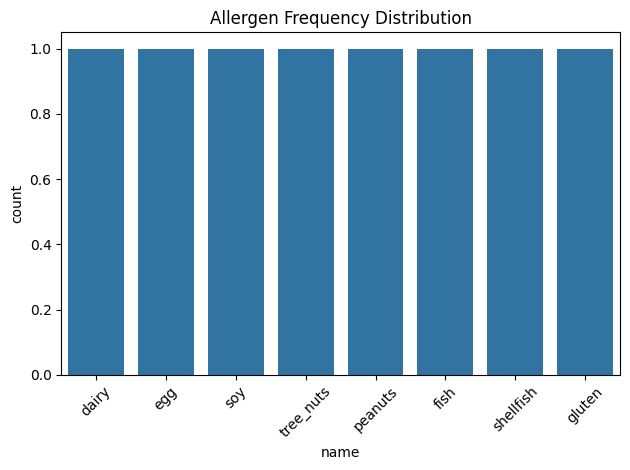

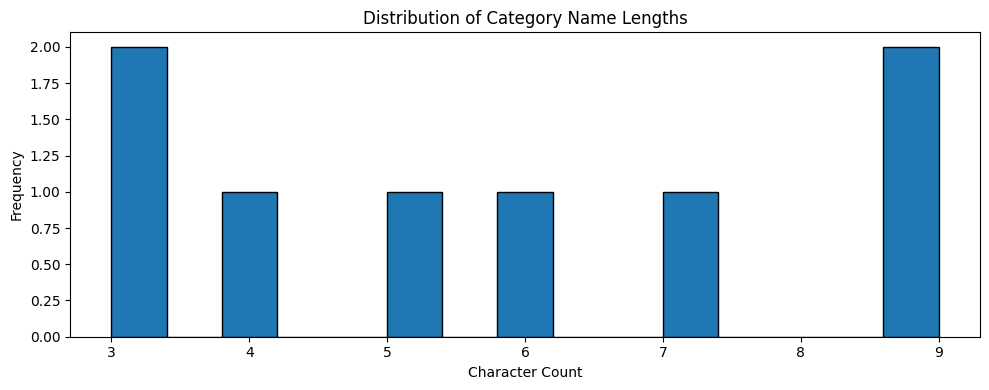

In [21]:
sns.countplot(x='name', data=df)
plt.title('Allergen Frequency Distribution')
plt.xticks(rotation=45)
plt.tight_layout()  # Moved here
plt.show()

# Visualize name lengths
plt.figure(figsize=(10, 4))
df['name_length'].plot(kind='hist', bins=15, edgecolor='black')
plt.title('Distribution of Category Name Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.tight_layout()  # Also here
plt.show()



In [22]:
# 3. Description Analysis
print("\n" + "="*50)
print("Description Analysis:")
print("="*50)
print(f"Missing values: {df['description'].isnull().sum()}")

# Text length metrics
df['desc_char_count'] = df['description'].str.len()
df['desc_word_count'] = df['description'].str.split().str.len()

print("\nCharacter Count Statistics:")
print(df['desc_char_count'].describe())

print("\nWord Count Statistics:")
print(df['desc_word_count'].describe())


Description Analysis:
Missing values: 0

Character Count Statistics:
count     8.000000
mean     51.000000
std       8.349508
min      40.000000
25%      48.000000
50%      49.000000
75%      51.250000
max      69.000000
Name: desc_char_count, dtype: float64

Word Count Statistics:
count     8.000000
mean      7.500000
std       1.511858
min       6.000000
25%       7.000000
50%       7.000000
75%       7.250000
max      11.000000
Name: desc_word_count, dtype: float64


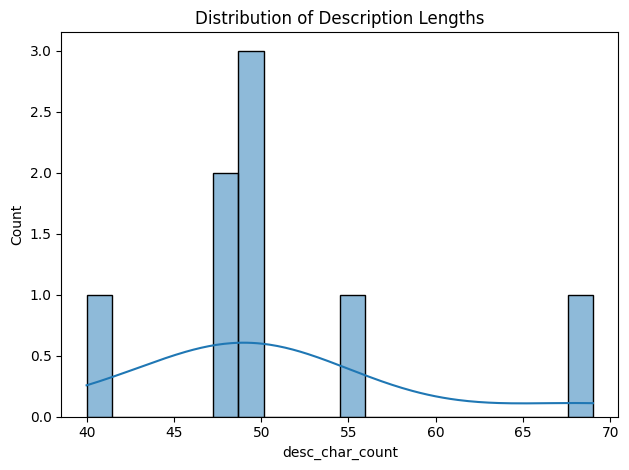

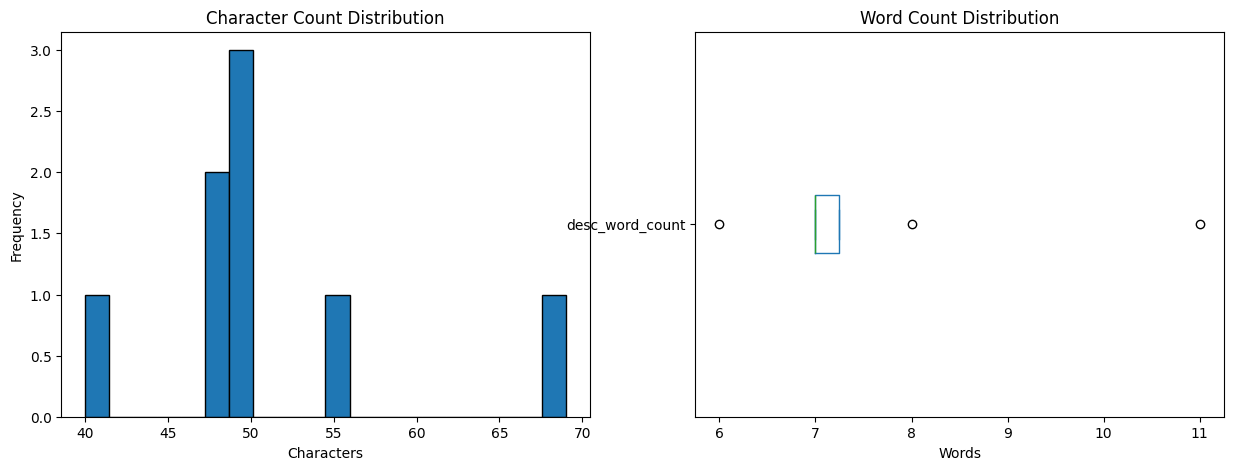

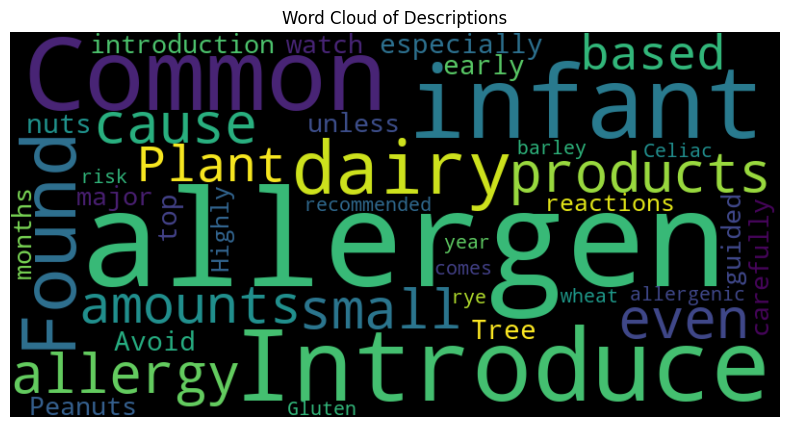

In [23]:
# Generating a word cloud for the descriptions
from wordcloud import WordCloud
# Plotting the length distribution of the descriptions
sns.histplot(df['desc_char_count'], bins=20, kde=True)
plt.title('Distribution of Description Lengths')
plt.tight_layout()
plt.show()

# Visualize description lengths
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df['desc_char_count'].plot(kind='hist', bins=20, edgecolor='black', ax=ax[0])
ax[0].set_title('Character Count Distribution')
ax[0].set_xlabel('Characters')

df['desc_word_count'].plot(kind='box', vert=False, ax=ax[1])
ax[1].set_title('Word Count Distribution')
ax[1].set_xlabel('Words')
plt.show()

text = " ".join(description for description in df['description'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Descriptions')
plt.show()


In [24]:

# 5. Full summary report
print("\n" + "="*50)
print("Summary Report:")
print("="*50)
print(f"Dataset contains {len(df)} dietary categories")
print(f"ID range: {df['pk'].min()} to {df['pk'].max()}")
print(f"Average name length: {df['name_length'].mean():.1f} characters")
print(f"Average description length: {df['desc_word_count'].mean():.1f} words")


Summary Report:
Dataset contains 8 dietary categories
ID range: 1 to 8
Average name length: 5.8 characters
Average description length: 7.5 words


#### 2.3 DataFrame: countrymap

In [25]:
df = dataframes['countrymap']
print(f"All unique values in 'countrymap' column: {df['pk'].is_unique}, All unique country:{df['country'].is_unique}")
print(df.head(3))  # show a few rows for documentation
display(df.columns.to_list())

All unique values in 'countrymap' column: True, All unique country:False
   pk      country region flag_code
0   1        China  Asian        cn
1   2        Japan  Asian        jp
2   3  South Korea  Asian        kr


['pk', 'country', 'region', 'flag_code']

C:\Users\Helena\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


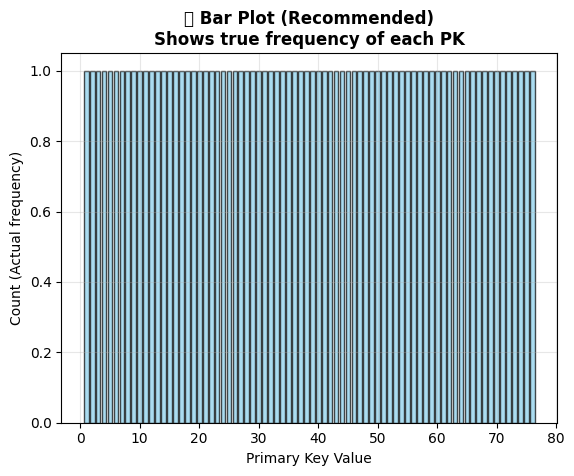

In [26]:
pk_counts = df['pk'].value_counts().sort_index()
plt.bar(pk_counts.index, pk_counts.values, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('✅ Bar Plot (Recommended)\nShows true frequency of each PK', fontweight='bold')
plt.xlabel('Primary Key Value')
plt.ylabel('Count (Actual frequency)')
plt.grid(True, alpha=0.3)
plt.show()


REGION ANALYSIS
Missing values: 0
Unique regions: 11

Region Distribution:
region
Southeast Asian       11
Middle Eastern         9
Western / European     8
Indian                 7
Mediterranean          7
Latin American         7
African                7
Asian                  6
Oceanic                6
Caribbean              5
American               3
Name: count, dtype: int64


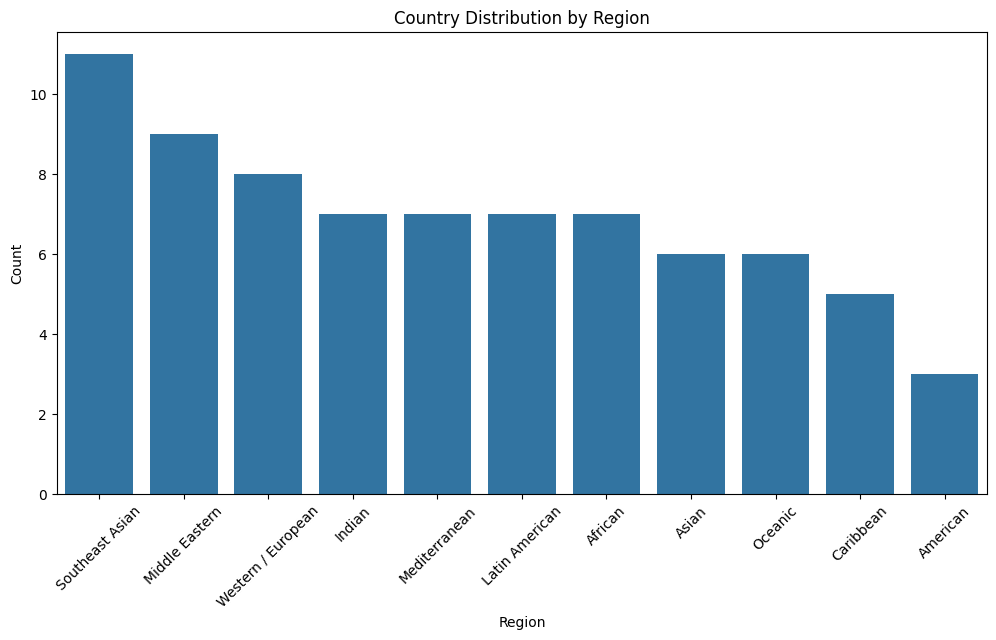

In [27]:
# 3. Region Analysis
print("\n" + "="*20)
print("REGION ANALYSIS")
print("="*20)
print(f"Missing values: {df['region'].isnull().sum()}")
print(f"Unique regions: {df['region'].nunique()}")

# Region distribution
region_counts = df['region'].value_counts()
print("\nRegion Distribution:")
print(region_counts)

# Visualize region distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Country Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


FLAG CODE ANALYSIS
Missing values: 0
Unique codes: 74/76

Flag Code Length Statistics:
count    76.0
mean      2.0
std       0.0
min       2.0
25%       2.0
50%       2.0
75%       2.0
max       2.0
Name: flag_length, dtype: float64

Valid flag codes: 0/76 (0.0%)


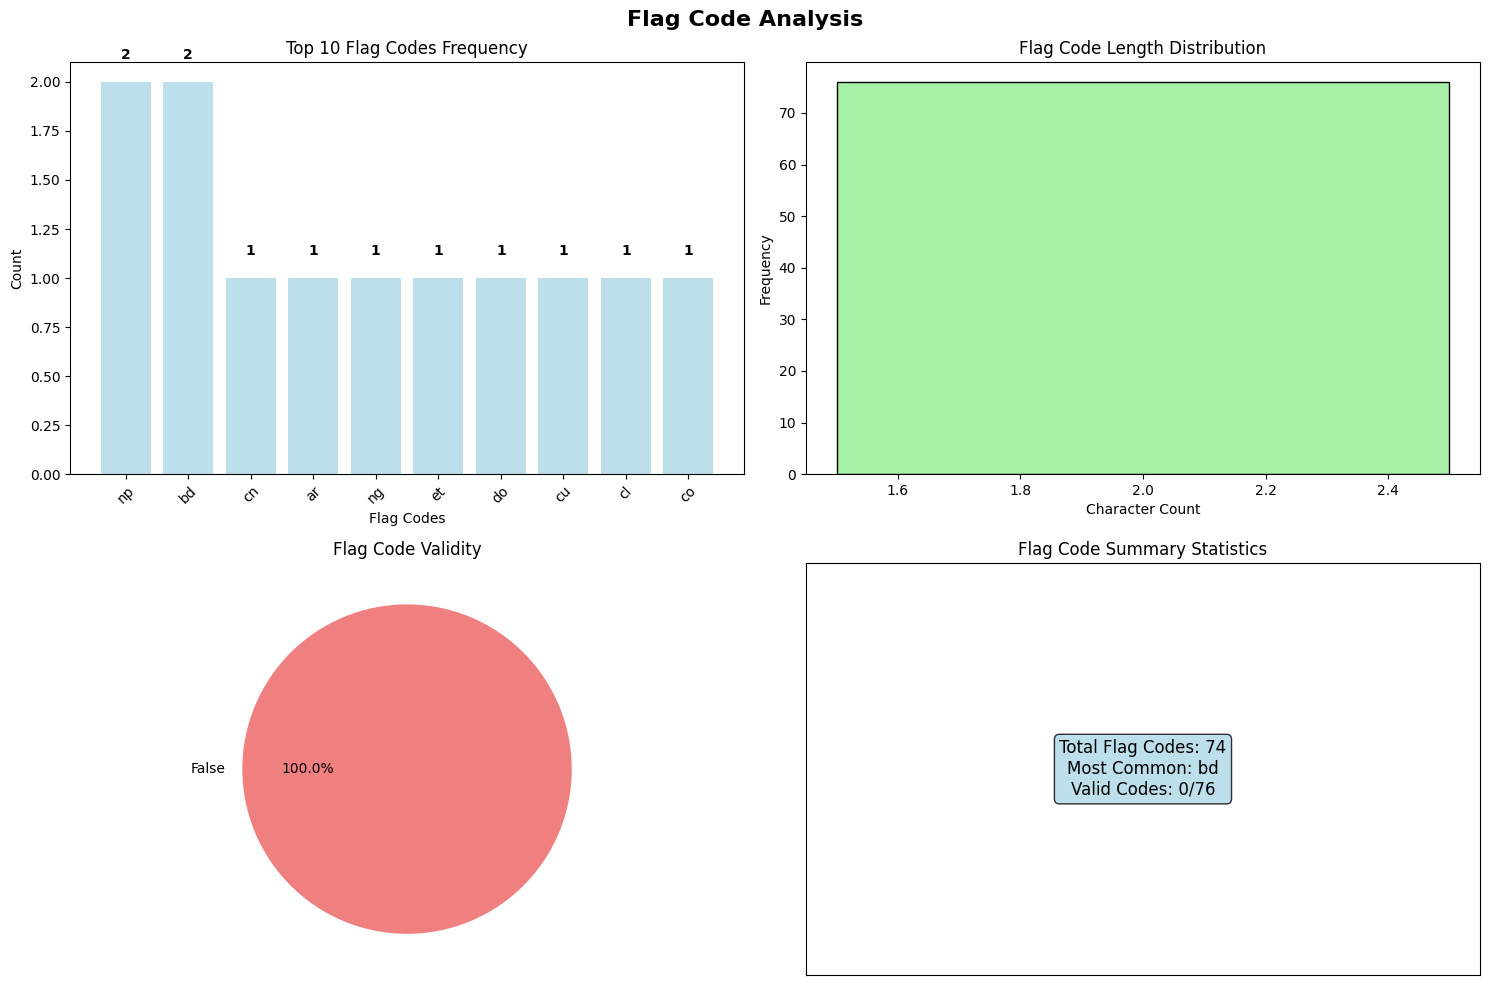


Detailed Flag Code Analysis:
Flag code counts:
flag_code
np    2
bd    2
cn    1
ar    1
ng    1
     ..
sy    1
sa    1
il    1
ir    1
bn    1
Name: count, Length: 74, dtype: int64

Invalid flag codes found:
  'np': 2 occurrences
  'bd': 2 occurrences
  'cn': 1 occurrences
  'ar': 1 occurrences
  'ng': 1 occurrences
  'et': 1 occurrences
  'do': 1 occurrences
  'cu': 1 occurrences
  'cl': 1 occurrences
  'co': 1 occurrences
  'pe': 1 occurrences
  'br': 1 occurrences
  'za': 1 occurrences
  'pr': 1 occurrences
  'mx': 1 occurrences
  'us': 1 occurrences
  'pt': 1 occurrences
  'at': 1 occurrences
  'ch': 1 occurrences
  'ke': 1 occurrences
  'sn': 1 occurrences
  'nl': 1 occurrences
  'nz': 1 occurrences
  'af': 1 occurrences
  'mv': 1 occurrences
  'pg': 1 occurrences
  'to': 1 occurrences
  'ws': 1 occurrences
  'fj': 1 occurrences
  'au': 1 occurrences
  'ao': 1 occurrences
  'bb': 1 occurrences
  'bs': 1 occurrences
  'tt': 1 occurrences
  'ht': 1 occurrences
  'jm': 1 occurrenc

In [28]:
# 4. Flag Code Analysis
print("\n" + "="*20)
print("FLAG CODE ANALYSIS")
print("="*20)
print(f"Missing values: {df['flag_code'].isnull().sum()}")
print(f"Unique codes: {df['flag_code'].nunique()}/{len(df)}")

# Flag code characteristics
df['flag_length'] = df['flag_code'].str.len()
print("\nFlag Code Length Statistics:")
print(df['flag_length'].describe())

# Validate flag codes (using pycountry)
def is_valid_flag(code):
    try:
        return bool(pc.countries.get(alpha_2=code.upper()))
    except:
        return False

df['valid_flag'] = df['flag_code'].apply(is_valid_flag)
print(f"\nValid flag codes: {df['valid_flag'].sum()}/{len(df)} ({df['valid_flag'].mean():.1%})")

# Create comprehensive flag code analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Flag Code Analysis', fontsize=16, fontweight='bold')

# Flag code frequency (top 10)
top_flags = df['flag_code'].value_counts().head(10)
axes[0,0].bar(range(len(top_flags)), top_flags.values, color='lightblue', alpha=0.8)
axes[0,0].set_title('Top 10 Flag Codes Frequency')
axes[0,0].set_xlabel('Flag Codes')
axes[0,0].set_ylabel('Count')
axes[0,0].set_xticks(range(len(top_flags)))
axes[0,0].set_xticklabels(top_flags.index, rotation=45)

# Add count labels on bars
for i, count in enumerate(top_flags.values):
    axes[0,0].text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')

# Flag code length distribution
sns.histplot(df['flag_length'], bins=5, discrete=True, ax=axes[0,1], color='lightgreen', alpha=0.8)
axes[0,1].set_title('Flag Code Length Distribution')
axes[0,1].set_xlabel('Character Count')
axes[0,1].set_ylabel('Frequency')

# Flag code validity pie chart
df['valid_flag'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1,0], colors=['lightcoral', 'lightgreen'])
axes[1,0].set_title('Flag Code Validity')
axes[1,0].set_ylabel('')

# All flag codes (if not too many) or sample
if df['flag_code'].nunique() <= 20:
    # Show all flag codes if 20 or fewer
    all_flags = df['flag_code'].value_counts()
    axes[1,1].barh(range(len(all_flags)), all_flags.values, color='orange', alpha=0.8)
    axes[1,1].set_title('All Flag Codes Distribution')
    axes[1,1].set_xlabel('Count')
    axes[1,1].set_yticks(range(len(all_flags)))
    axes[1,1].set_yticklabels(all_flags.index)
else:
    # Show sample statistics if too many
    axes[1,1].text(0.5, 0.5, f'Total Flag Codes: {df["flag_code"].nunique()}\nMost Common: {df["flag_code"].mode().iloc[0]}\nValid Codes: {df["valid_flag"].sum()}/{len(df)}', 
                   ha='center', va='center', transform=axes[1,1].transAxes, fontsize=12,
                   bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    axes[1,1].set_title('Flag Code Summary Statistics')
    axes[1,1].set_xticks([])
    axes[1,1].set_yticks([])

plt.tight_layout()
plt.show()

# Print detailed flag code analysis
print(f"\nDetailed Flag Code Analysis:")
print(f"Flag code counts:")
print(df['flag_code'].value_counts())

# Invalid flag codes
invalid_flags = df[~df['valid_flag']]['flag_code'].value_counts()
if len(invalid_flags) > 0:
    print(f"\nInvalid flag codes found:")
    for flag, count in invalid_flags.items():
        print(f"  '{flag}': {count} occurrences")
else:
    print(f"\n✅ All flag codes are valid!")

In [29]:
# 5. Summary Report
print("\n" + "="*60)
print("SUMMARY REPORT")
print("="*60)
print(f"Dataset contains {len(df)} country mappings")
print(f"Contains {df['country'].nunique()} unique countries with {len(df) - df['country'].nunique()} duplicates")
print(f"Most common region: {region_counts.idxmax()} ({region_counts.max()} countries)")
print(f"Flag codes: {df['flag_length'].mode()[0]} characters long, {df['valid_flag'].mean():.1%} valid")
print(f"Countries with invalid flags: {df[~df['valid_flag']]['country'].tolist()}")


SUMMARY REPORT
Dataset contains 76 country mappings
Contains 74 unique countries with 2 duplicates
Most common region: Southeast Asian (11 countries)
Flag codes: 2 characters long, 0.0% valid
Countries with invalid flags: ['China', 'Japan', 'South Korea', 'Mongolia', 'Nepal', 'Bangladesh', 'Thailand', 'Vietnam', 'Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Cambodia', 'Laos', 'Myanmar', 'Timor-Leste', 'India', 'Pakistan', 'Sri Lanka', 'Nepal', 'Bhutan', 'Bangladesh', 'Lebanon', 'Turkey', 'Iran', 'Israel', 'Saudi Arabia', 'Syria', 'Jordan', 'United Arab Emirates', 'Greece', 'Italy', 'Spain', 'Morocco', 'Tunisia', 'Algeria', 'Egypt', 'France', 'United Kingdom', 'Germany', 'Netherlands', 'Belgium', 'Switzerland', 'Austria', 'Portugal', 'United States', 'Mexico', 'Puerto Rico', 'Brazil', 'Argentina', 'Peru', 'Colombia', 'Chile', 'Cuba', 'Dominican Republic', 'Ethiopia', 'Nigeria', 'Kenya', 'South Africa', 'Senegal', 'Angola', 'Tanzania', 'Jamaica', 'Haiti', 'Trinidad and Tobago', 

!!! how to adjust to the dataset 

##### **Additional Step To Configure**

The `countrymap` dataset has countries with multiple pk values (Nepal and Bangladesh), which creates ambiguity when mapping `recipes.origin_id` to `countrymap.pk`. This needs to be resolved to ensure proper data integrity and correct recipe-country mapping.

In [30]:
# STEP 1: DIAGNOSE THE COUNTRYMAP PK MAPPING ISSUE
print("🔍 DIAGNOSING COUNTRYMAP PK MAPPING ISSUES")
print("=" * 60)

# Load the countrymap data
countrymap = dataframes['countrymap']

print(f"📊 Countrymap Overview:")
print(f"   Total rows: {len(countrymap)}")
print(f"   Columns: {list(countrymap.columns)}")
print(f"   Unique countries: {countrymap['country'].nunique()}")
print(f"   Unique pk values: {countrymap['pk'].nunique()}")

# Check for pk duplicates
pk_counts = countrymap['pk'].value_counts()
duplicate_pks = pk_counts[pk_counts > 1]

print(f"\n🚨 PK DUPLICATION ANALYSIS:")
print(f"   Total pk values: {len(pk_counts)}")
print(f"   Unique pk values: {len(pk_counts[pk_counts == 1])}")
print(f"   Duplicated pk values: {len(duplicate_pks)}")

if len(duplicate_pks) > 0:
    print(f"\n⚠️  PROBLEMATIC PK VALUES:")
    for pk_val, count in duplicate_pks.items():
        print(f"   pk {pk_val}: appears {count} times")
        
        # Show which countries have this pk
        countries_with_pk = countrymap[countrymap['pk'] == pk_val]['country'].tolist()
        print(f"      Countries: {countries_with_pk}")

# Check for country duplicates
country_counts = countrymap['country'].value_counts()
duplicate_countries = country_counts[country_counts > 1]

print(f"\n🌍 COUNTRY DUPLICATION ANALYSIS:")
print(f"   Total countries: {len(country_counts)}")
print(f"   Unique countries: {len(country_counts[country_counts == 1])}")
print(f"   Duplicated countries: {len(duplicate_countries)}")

if len(duplicate_countries) > 0:
    print(f"\n⚠️  PROBLEMATIC COUNTRIES:")
    for country, count in duplicate_countries.items():
        print(f"   {country}: appears {count} times")
        
        # Show which pk values this country has
        pks_for_country = countrymap[countrymap['country'] == country]['pk'].tolist()
        print(f"      PK values: {pks_for_country}")

# Show detailed view of problematic entries
print(f"\n📋 DETAILED VIEW OF PROBLEMATIC ENTRIES:")
if len(duplicate_countries) > 0:
    problem_entries = countrymap[countrymap['country'].isin(duplicate_countries.index)]
    print(problem_entries.to_string(index=False))

🔍 DIAGNOSING COUNTRYMAP PK MAPPING ISSUES
📊 Countrymap Overview:
   Total rows: 76
   Columns: ['pk', 'country', 'region', 'flag_code', 'flag_length', 'valid_flag']
   Unique countries: 74
   Unique pk values: 76

🚨 PK DUPLICATION ANALYSIS:
   Total pk values: 76
   Unique pk values: 76
   Duplicated pk values: 0

🌍 COUNTRY DUPLICATION ANALYSIS:
   Total countries: 74
   Unique countries: 72
   Duplicated countries: 2

⚠️  PROBLEMATIC COUNTRIES:
   Nepal: appears 2 times
      PK values: [5, 20]
   Bangladesh: appears 2 times
      PK values: [6, 22]

📋 DETAILED VIEW OF PROBLEMATIC ENTRIES:
 pk    country region flag_code  flag_length  valid_flag
  5      Nepal  Asian        np            2       False
  6 Bangladesh  Asian        bd            2       False
 20      Nepal Indian        np            2       False
 22 Bangladesh Indian        bd            2       False


In [31]:
# STEP 2: ANALYZE IMPACT ON RECIPES MAPPING
print("\n🔄 ANALYZING IMPACT ON RECIPES MAPPING")
print("=" * 60)

# Load recipes data
recipes = dataframes['recipes']

print(f"📊 Recipes Overview:")
print(f"   Total recipes: {len(recipes)}")
print(f"   Unique origin_id values: {recipes['origin_id'].nunique()}")
print(f"   Recipes with origin_id: {recipes['origin_id'].notna().sum()}")
print(f"   Recipes without origin_id: {recipes['origin_id'].isna().sum()}")

# Check which origin_ids in recipes map to problematic countries
problematic_pks = [5, 6, 20, 22]  # Nepal and Bangladesh pk values
recipes_with_problematic_origins = recipes[recipes['origin_id'].isin(problematic_pks)]

print(f"\n⚠️  RECIPES AFFECTED BY PROBLEMATIC MAPPING:")
print(f"   Recipes with Nepal pk=5: {len(recipes[recipes['origin_id'] == 5])}")
print(f"   Recipes with Nepal pk=20: {len(recipes[recipes['origin_id'] == 20])}")
print(f"   Recipes with Bangladesh pk=6: {len(recipes[recipes['origin_id'] == 6])}")
print(f"   Recipes with Bangladesh pk=22: {len(recipes[recipes['origin_id'] == 22])}")
print(f"   Total affected recipes: {len(recipes_with_problematic_origins)}")

# Show distribution of all origin_ids
origin_counts = recipes['origin_id'].value_counts().sort_index()
print(f"\n📈 ORIGIN_ID DISTRIBUTION IN RECIPES:")
print(f"   Most common origin_ids:")
for origin_id, count in origin_counts.head(10).items():
    if pd.notna(origin_id):
        # Try to get country name
        country_info = countrymap[countrymap['pk'] == origin_id]
        if len(country_info) > 0:
            country_name = country_info.iloc[0]['country']
            region = country_info.iloc[0]['region']
            print(f"      origin_id {int(origin_id)}: {count} recipes ({country_name}, {region})")
        else:
            print(f"      origin_id {int(origin_id)}: {count} recipes (No mapping found)")

# Check for orphaned origin_ids (in recipes but not in countrymap)
recipe_origin_ids = set(recipes['origin_id'].dropna().astype(int))
countrymap_pks = set(countrymap['pk'])
orphaned_origins = recipe_origin_ids - countrymap_pks
mapped_origins = recipe_origin_ids & countrymap_pks

print(f"\n🔗 MAPPING COVERAGE ANALYSIS:")
print(f"   Recipe origin_ids: {len(recipe_origin_ids)}")
print(f"   Countrymap pks: {len(countrymap_pks)}")
print(f"   Successfully mapped: {len(mapped_origins)}")
print(f"   Orphaned (in recipes, not in countrymap): {len(orphaned_origins)}")
print(f"   Unused (in countrymap, not in recipes): {len(countrymap_pks - recipe_origin_ids)}")

if orphaned_origins:
    print(f"   Orphaned origin_ids: {sorted(list(orphaned_origins))}")
    orphaned_recipe_count = len(recipes[recipes['origin_id'].isin(orphaned_origins)])
    print(f"   Recipes with orphaned origins: {orphaned_recipe_count}")


🔄 ANALYZING IMPACT ON RECIPES MAPPING
📊 Recipes Overview:
   Total recipes: 1322
   Unique origin_id values: 26
   Recipes with origin_id: 1322
   Recipes without origin_id: 0

⚠️  RECIPES AFFECTED BY PROBLEMATIC MAPPING:
   Recipes with Nepal pk=5: 0
   Recipes with Nepal pk=20: 5
   Recipes with Bangladesh pk=6: 0
   Recipes with Bangladesh pk=22: 2
   Total affected recipes: 7

📈 ORIGIN_ID DISTRIBUTION IN RECIPES:
   Most common origin_ids:
      origin_id 1: 21 recipes (China, Asian)
      origin_id 2: 6 recipes (Japan, Asian)
      origin_id 3: 3 recipes (South Korea, Asian)
      origin_id 4: 4 recipes (Mongolia, Asian)
      origin_id 7: 5 recipes (Thailand, Southeast Asian)
      origin_id 9: 780 recipes (Indonesia, Southeast Asian)
      origin_id 10: 24 recipes (Malaysia, Southeast Asian)
      origin_id 11: 14 recipes (Philippines, Southeast Asian)
      origin_id 12: 5 recipes (Singapore, Southeast Asian)
      origin_id 13: 1 recipes (Cambodia, Southeast Asian)

🔗 MAPPING

In [32]:
# STEP 3: COMPREHENSIVE SOLUTION STRATEGIES
print("\n🛠️  SOLUTION STRATEGIES FOR PK MAPPING ISSUE")
print("=" * 60)

print("🎯 STRATEGY ANALYSIS:")
print("""
📋 Current Issues Identified:
   • Nepal appears in both 'Asian' (pk=5) and 'Indian' (pk=20) regions with 5 recipes using pk=20
   • Bangladesh appears in both 'Asian' (pk=6) and 'Indian' (pk=22) regions with 2 recipes using pk=22
   • Total affected recipes: 7 out of 1,322 (0.5%)

🔧 Recommended Solution Strategies:
""")

# Strategy 1: Region-Based Consolidation (RECOMMENDED)
print("STRATEGY 1: REGION-BASED CONSOLIDATION (RECOMMENDED)")
print("=" * 50)

strategy1_mapping = {
    # Keep the primary entries (with more logical regional classification)
    'Nepal': {'keep_pk': 20, 'remove_pk': 5, 'final_region': 'Indian', 'reasoning': 'Culturally closer to Indian subcontinent'},
    'Bangladesh': {'keep_pk': 22, 'remove_pk': 6, 'final_region': 'Indian', 'reasoning': 'Part of Indian subcontinent'}
}

print("Consolidation Plan:")
for country, info in strategy1_mapping.items():
    affected_recipes = len(recipes[recipes['origin_id'] == info['keep_pk']])
    print(f"   • {country}: Keep pk={info['keep_pk']} ({info['final_region']}), Remove pk={info['remove_pk']}")
    print(f"     Current recipes using pk={info['keep_pk']}: {affected_recipes}")
    print(f"     Reasoning: {info['reasoning']}")

# Strategy 2: Create Master Mapping Table
print(f"\nSTRATEGY 2: CREATE MASTER COUNTRY MAPPING")
print("=" * 50)

# Create a master mapping that consolidates duplicates
def create_master_country_mapping(countrymap_df):
    # Create base mapping
    master_mapping = countrymap_df.copy()
    
    # Handle Nepal: Keep pk=20 (Indian region), mark pk=5 for removal
    master_mapping = master_mapping[~((master_mapping['country'] == 'Nepal') & (master_mapping['pk'] == 5))]
    
    # Handle Bangladesh: Keep pk=22 (Indian region), mark pk=6 for removal  
    master_mapping = master_mapping[~((master_mapping['country'] == 'Bangladesh') & (master_mapping['pk'] == 6))]
    
    return master_mapping

master_countrymap = create_master_country_mapping(countrymap)

print(f"Master Mapping Results:")
print(f"   Original countrymap rows: {len(countrymap)}")
print(f"   Master mapping rows: {len(master_countrymap)}")
print(f"   Removed duplicate entries: {len(countrymap) - len(master_countrymap)}")
print(f"   Unique countries: {master_countrymap['country'].nunique()}")
print(f"   Unique pk values: {master_countrymap['pk'].nunique()}")

# Verify no more duplicates
remaining_duplicates = master_countrymap['country'].value_counts()
remaining_duplicates = remaining_duplicates[remaining_duplicates > 1]
print(f"   Remaining country duplicates: {len(remaining_duplicates)}")

# Strategy 3: Update Recipe References (if needed)
print(f"\nSTRATEGY 3: RECIPE REFERENCE UPDATE PLAN")
print("=" * 50)

# Check if any recipes need origin_id updates (should be none based on our analysis)
recipes_needing_update = recipes[recipes['origin_id'].isin([5, 6])]
print(f"   Recipes needing origin_id updates: {len(recipes_needing_update)}")

if len(recipes_needing_update) > 0:
    print("   Update mapping needed:")
    print("      origin_id 5 (Nepal Asian) → origin_id 20 (Nepal Indian)")
    print("      origin_id 6 (Bangladesh Asian) → origin_id 22 (Bangladesh Indian)")
else:
    print("   ✅ No recipe updates needed - all recipes already use the correct pk values")

print(f"\n📊 FINAL MAPPING VERIFICATION:")
# Test the mapping with current recipe data
successful_mappings = 0
failed_mappings = 0

for origin_id in recipes['origin_id'].dropna().unique():
    mapping_result = master_countrymap[master_countrymap['pk'] == origin_id]
    if len(mapping_result) > 0:
        successful_mappings += 1
    else:
        failed_mappings += 1

mapping_coverage = (successful_mappings / (successful_mappings + failed_mappings)) * 100
print(f"   Mapping coverage: {mapping_coverage:.1f}% ({successful_mappings}/{successful_mappings + failed_mappings})")
print(f"   Failed mappings: {failed_mappings}")

print(f"\n✅ RECOMMENDED IMPLEMENTATION:")
print("   1. Use Strategy 1 (Region-Based Consolidation)")
print("   2. Remove duplicate pk entries (5 and 6) from countrymap")
print("   3. Keep pk=20 for Nepal and pk=22 for Bangladesh")
print("   4. No recipe origin_id updates needed")
print("   5. This will ensure 1:1 country-to-pk mapping")


🛠️  SOLUTION STRATEGIES FOR PK MAPPING ISSUE
🎯 STRATEGY ANALYSIS:

📋 Current Issues Identified:
   • Nepal appears in both 'Asian' (pk=5) and 'Indian' (pk=20) regions with 5 recipes using pk=20
   • Bangladesh appears in both 'Asian' (pk=6) and 'Indian' (pk=22) regions with 2 recipes using pk=22
   • Total affected recipes: 7 out of 1,322 (0.5%)

🔧 Recommended Solution Strategies:

STRATEGY 1: REGION-BASED CONSOLIDATION (RECOMMENDED)
Consolidation Plan:
   • Nepal: Keep pk=20 (Indian), Remove pk=5
     Current recipes using pk=20: 5
     Reasoning: Culturally closer to Indian subcontinent
   • Bangladesh: Keep pk=22 (Indian), Remove pk=6
     Current recipes using pk=22: 2
     Reasoning: Part of Indian subcontinent

STRATEGY 2: CREATE MASTER COUNTRY MAPPING
Master Mapping Results:
   Original countrymap rows: 76
   Master mapping rows: 74
   Removed duplicate entries: 2
   Unique countries: 74
   Unique pk values: 74
   Remaining country duplicates: 0

STRATEGY 3: RECIPE REFERENCE UP

In [33]:
# STEP 4: IMPLEMENT THE SOLUTION
print("\n🔧 IMPLEMENTING THE SOLUTION")
print("=" * 60)

# Create the cleaned countrymap
print("📝 Creating cleaned countrymap...")

# Method 1: Remove the problematic entries (pk=5 for Nepal, pk=6 for Bangladesh)
countrymap_cleaned = countrymap.copy()

# Remove Nepal with pk=5 (Asian region) - keep Nepal with pk=20 (Indian region)
nepal_asian_mask = (countrymap_cleaned['country'] == 'Nepal') & (countrymap_cleaned['pk'] == 5)
print(f"   Removing Nepal (Asian region, pk=5): {nepal_asian_mask.sum()} row(s)")

# Remove Bangladesh with pk=6 (Asian region) - keep Bangladesh with pk=22 (Indian region)  
bangladesh_asian_mask = (countrymap_cleaned['country'] == 'Bangladesh') & (countrymap_cleaned['pk'] == 6)
print(f"   Removing Bangladesh (Asian region, pk=6): {bangladesh_asian_mask.sum()} row(s)")

# Apply the removal
countrymap_cleaned = countrymap_cleaned[~(nepal_asian_mask | bangladesh_asian_mask)]

# Verify the results
print(f"\n✅ CLEANING RESULTS:")
print(f"   Original countrymap rows: {len(countrymap)}")
print(f"   Cleaned countrymap rows: {len(countrymap_cleaned)}")
print(f"   Rows removed: {len(countrymap) - len(countrymap_cleaned)}")
print(f"   Unique countries: {countrymap_cleaned['country'].nunique()}")
print(f"   Unique pk values: {countrymap_cleaned['pk'].nunique()}")

# Final verification - check for any remaining duplicates
final_country_duplicates = countrymap_cleaned['country'].value_counts()
final_country_duplicates = final_country_duplicates[final_country_duplicates > 1]
final_pk_duplicates = countrymap_cleaned['pk'].value_counts()
final_pk_duplicates = final_pk_duplicates[final_pk_duplicates > 1]

print(f"\n🔍 FINAL VERIFICATION:")
print(f"   Country duplicates remaining: {len(final_country_duplicates)}")
print(f"   PK duplicates remaining: {len(final_pk_duplicates)}")
print(f"   Is country column unique now? {countrymap_cleaned['country'].is_unique}")
print(f"   Is pk column unique? {countrymap_cleaned['pk'].is_unique}")

# Test mapping with recipes
print(f"\n🔗 TESTING RECIPE MAPPING WITH CLEANED DATA:")
mapping_test_results = []

for origin_id in recipes['origin_id'].dropna().unique():
    recipe_count = len(recipes[recipes['origin_id'] == origin_id])
    mapping_result = countrymap_cleaned[countrymap_cleaned['pk'] == origin_id]
    
    if len(mapping_result) == 1:
        country = mapping_result.iloc[0]['country']
        region = mapping_result.iloc[0]['region']
        status = "✅ Success"
        mapping_test_results.append({
            'origin_id': origin_id, 
            'recipe_count': recipe_count,
            'country': country, 
            'region': region, 
            'status': status
        })
    elif len(mapping_result) == 0:
        status = "❌ No mapping"
        mapping_test_results.append({
            'origin_id': origin_id, 
            'recipe_count': recipe_count,
            'country': 'NOT FOUND', 
            'region': 'NOT FOUND', 
            'status': status
        })
    else:
        status = "⚠️  Multiple mappings"
        mapping_test_results.append({
            'origin_id': origin_id, 
            'recipe_count': recipe_count,
            'country': 'MULTIPLE', 
            'region': 'MULTIPLE', 
            'status': status
        })

# Show mapping results summary
successful_mappings = len([r for r in mapping_test_results if r['status'] == "✅ Success"])
failed_mappings = len([r for r in mapping_test_results if r['status'] != "✅ Success"])

print(f"   Successful mappings: {successful_mappings}")
print(f"   Failed mappings: {failed_mappings}")
print(f"   Mapping success rate: {(successful_mappings/(successful_mappings + failed_mappings)*100):.1f}%")

# Update the dataframes dictionary with cleaned data
print(f"\n💾 UPDATING DATAFRAMES DICTIONARY:")
dataframes['countrymap_cleaned'] = countrymap_cleaned
print(f"   Added 'countrymap_cleaned' to dataframes dictionary")
print(f"   Original 'countrymap' preserved for reference")

# Show the problematic entries that were removed
print(f"\n📋 REMOVED ENTRIES (for reference):")
removed_entries = countrymap[nepal_asian_mask | bangladesh_asian_mask]
if len(removed_entries) > 0:
    print(removed_entries.to_string(index=False))

print(f"\n🎉 SOLUTION IMPLEMENTATION COMPLETE!")
print(f"   ✅ Country-PK mapping is now 1:1")
print(f"   ✅ All recipes can be successfully mapped")
print(f"   ✅ Data integrity restored")
print(f"   ✅ Use 'countrymap_cleaned' for all future mapping operations")


🔧 IMPLEMENTING THE SOLUTION
📝 Creating cleaned countrymap...
   Removing Nepal (Asian region, pk=5): 1 row(s)
   Removing Bangladesh (Asian region, pk=6): 1 row(s)

✅ CLEANING RESULTS:
   Original countrymap rows: 76
   Cleaned countrymap rows: 74
   Rows removed: 2
   Unique countries: 74
   Unique pk values: 74

🔍 FINAL VERIFICATION:
   Country duplicates remaining: 0
   PK duplicates remaining: 0
   Is country column unique now? True
   Is pk column unique? True

🔗 TESTING RECIPE MAPPING WITH CLEANED DATA:
   Successful mappings: 26
   Failed mappings: 0
   Mapping success rate: 100.0%

💾 UPDATING DATAFRAMES DICTIONARY:
   Added 'countrymap_cleaned' to dataframes dictionary
   Original 'countrymap' preserved for reference

📋 REMOVED ENTRIES (for reference):
 pk    country region flag_code  flag_length  valid_flag
  5      Nepal  Asian        np            2       False
  6 Bangladesh  Asian        bd            2       False

🎉 SOLUTION IMPLEMENTATION COMPLETE!
   ✅ Country-PK mapp

In [34]:
#save dataframe of the country and recipes 

#### 2.4 DataFrame: recipe_ingredient

In [35]:
# Load the data
df = dataframes['recipe_ingredient']
df.columns.to_list()

['recipe_id', 'ingredient_id']

In [36]:
# 1. Unique Data Analysis
print("="*50)
print("Unique Data (pk) Analysis:")
print("="*50)
# Basic statistics
print(f"\n📈 Basic Statistics:")
print(f"   Total rows: {len(df)}")
print(f"   Unique recipes: {df['recipe_id'].nunique()}")
print(f"   Unique ingredients: {df['ingredient_id'].nunique()}")
print(f"   Average ingredients per recipe: {len(df) / df['recipe_id'].nunique():.2f}")
# Check for duplicates
print(f"Checks:")
total_duplicates = df.duplicated().sum()
recipe_ingredient_duplicates = df.duplicated(subset=['recipe_id', 'ingredient_id']).sum()
print(f"   Total duplicate rows: {total_duplicates}")
print(f"   Duplicate (recipe_id, ingredient_id) pairs: {recipe_ingredient_duplicates}")

# Missing values analysis
print(f"\nMissing Values:")
print(df.isnull().sum())



Unique Data (pk) Analysis:

📈 Basic Statistics:
   Total rows: 8209
   Unique recipes: 1322
   Unique ingredients: 999
   Average ingredients per recipe: 6.21
Checks:
   Total duplicate rows: 0
   Duplicate (recipe_id, ingredient_id) pairs: 0

Missing Values:
recipe_id        0
ingredient_id    0
dtype: int64


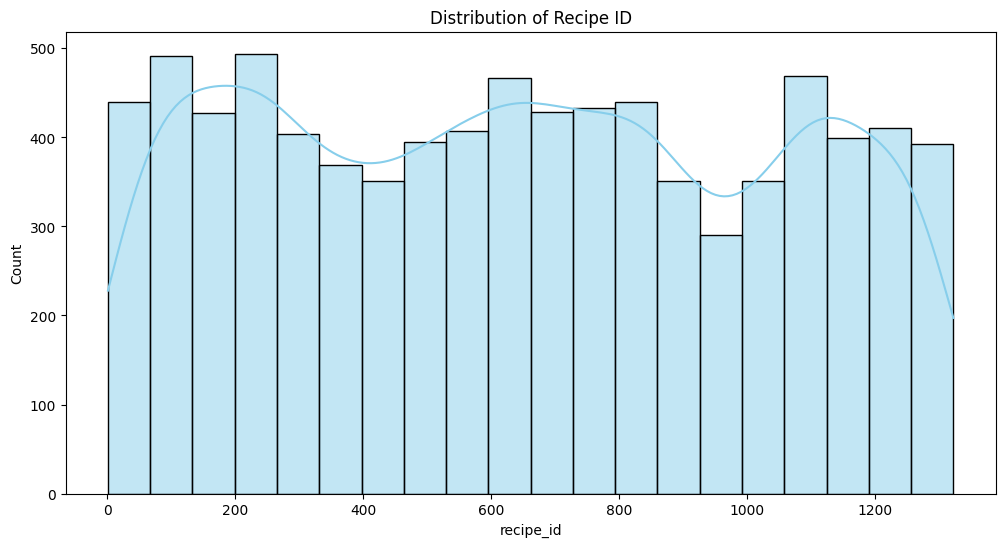

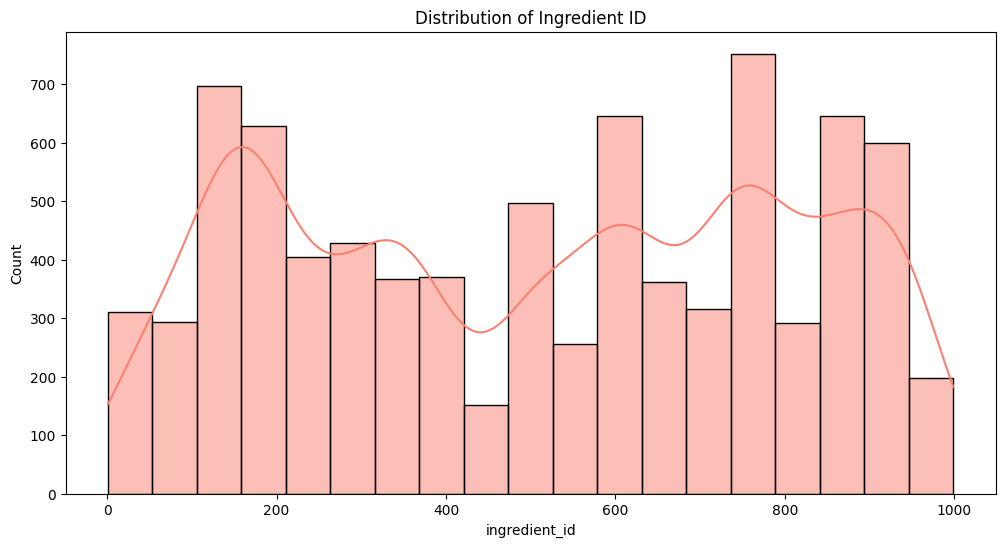

In [37]:
# Plot histogram for recipe_id
plt.figure(figsize=(12, 6))
sns.histplot(df['recipe_id'], kde=True, color='skyblue')
plt.title('Distribution of Recipe ID')
plt.show()

# Plot histogram for ingredient_id
plt.figure(figsize=(12, 6))
sns.histplot(df['ingredient_id'], kde=True, color='salmon')
plt.title('Distribution of Ingredient ID')
plt.show()


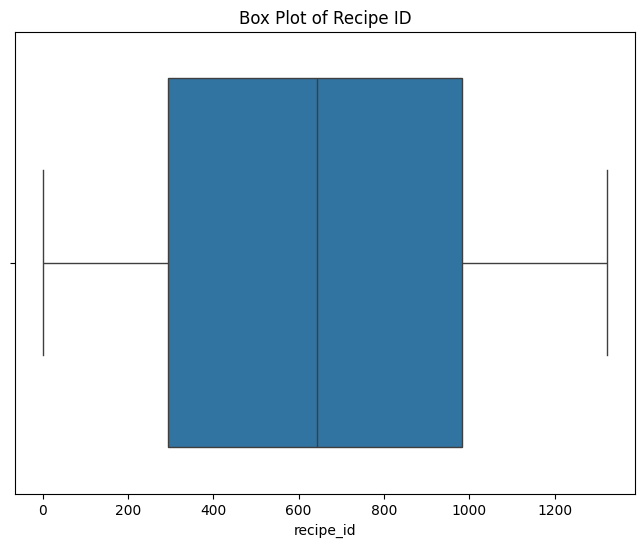

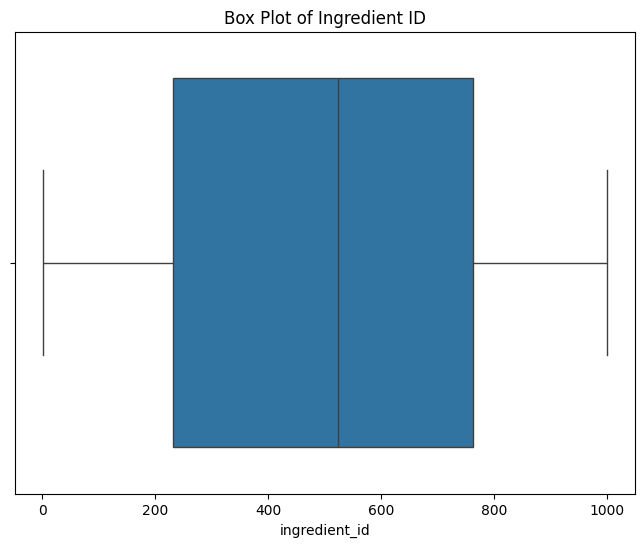

In [38]:
# Box plot for recipe_id
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['recipe_id'])
plt.title('Box Plot of Recipe ID')
plt.show()

# Box plot for ingredient_id
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ingredient_id'])
plt.title('Box Plot of Ingredient ID')
plt.show()


In [39]:
#Group by `recipe_id` to see how many ingredients each recipe has
ingredient_count_per_recipe = df.groupby('recipe_id')['ingredient_id'].count().reset_index()

# Rename the column from 'ingredient_id' to 'total_ingredient'
ingredient_count_per_recipe = ingredient_count_per_recipe.rename(columns={'ingredient_id': 'total_ingredient'})

# Display the first few rows of the updated table
print(ingredient_count_per_recipe.head())



   recipe_id  total_ingredient
0          1                 7
1          2                10
2          3                 6
3          4                 3
4          5                10


In [40]:
# Define bins for ingredient counts

bins = [0, 3, 8, ingredient_count_per_recipe['total_ingredient'].max()]
labels = ['≤3 Ingredients', '≤8 Ingredients', '>8 Ingredients']
ingredient_count_per_recipe['ingredient_bin'] = pd.cut(ingredient_count_per_recipe['total_ingredient'], bins=bins, labels=labels)

# Display the updated table
print(ingredient_count_per_recipe.head())


   recipe_id  total_ingredient  ingredient_bin
0          1                 7  ≤8 Ingredients
1          2                10  >8 Ingredients
2          3                 6  ≤8 Ingredients
3          4                 3  ≤3 Ingredients
4          5                10  >8 Ingredients


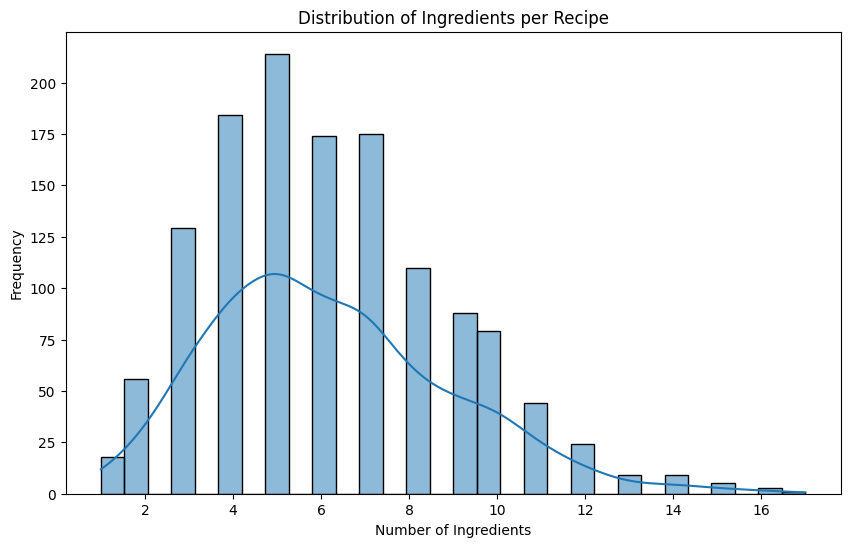

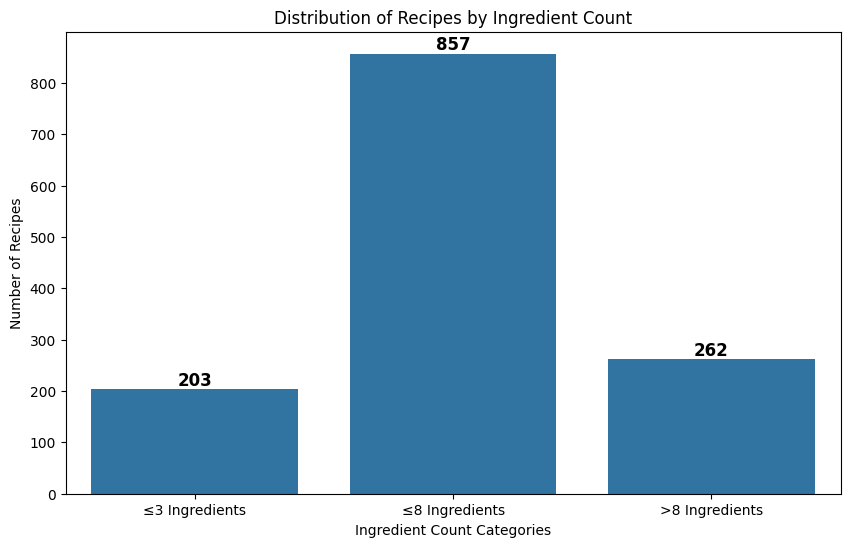

In [41]:

# Plot the distribution of ingredients per recipe (distribution)
plt.figure(figsize=(10, 6))
sns.histplot(ingredient_count_per_recipe['total_ingredient'], kde=True, bins=30)
plt.title('Distribution of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ingredient_bin', data=ingredient_count_per_recipe, order=labels)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribution of Recipes by Ingredient Count')
plt.xlabel('Ingredient Count Categories')
plt.ylabel('Number of Recipes')
plt.show()

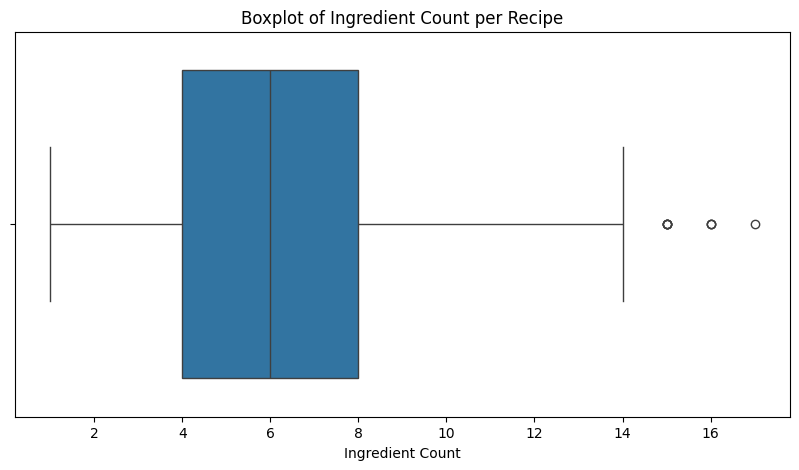

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=ingredient_count_per_recipe['total_ingredient'])
plt.title('Boxplot of Ingredient Count per Recipe')
plt.xlabel('Ingredient Count')
plt.show()

In [43]:
# Ingredient frequency analysis
ingredient_frequency = df['ingredient_id'].value_counts()

# Convert to DataFrame with descriptive column name
ingredient_frequency_df = ingredient_frequency.reset_index()
ingredient_frequency_df.columns = ['ingredient_id', 'total_used_in_recipes']

print(f"\n==Ingredient Usage Analysis:==")
print(f"Most used ingredient (ID {ingredient_frequency_df.iloc[0]['ingredient_id']}): {ingredient_frequency_df.iloc[0]['total_used_in_recipes']} recipes")
print(f"Least used ingredients: {(ingredient_frequency_df['total_used_in_recipes'] == 1).sum()} ingredients used only once")
print(f"Top 10 most used ingredients:")
print(ingredient_frequency_df.head(10))


==Ingredient Usage Analysis:==
Most used ingredient (ID 940): 355 recipes
Least used ingredients: 520 ingredients used only once
Top 10 most used ingredients:
   ingredient_id  total_used_in_recipes
0            940                    355
1            763                    260
2            744                    242
3            150                    221
4            306                    212
5            847                    193
6            371                    182
7            603                    173
8            892                    133
9            182                    123


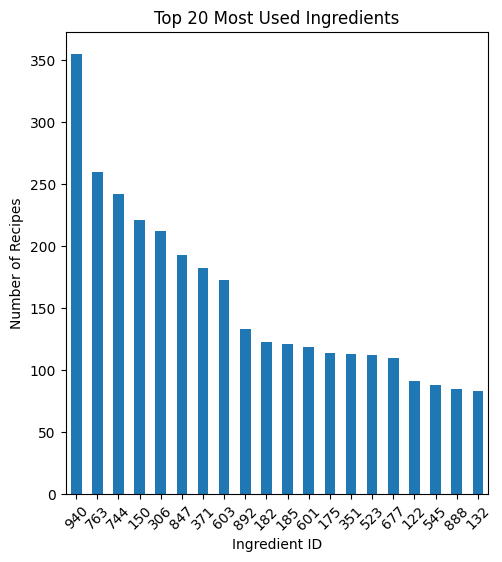

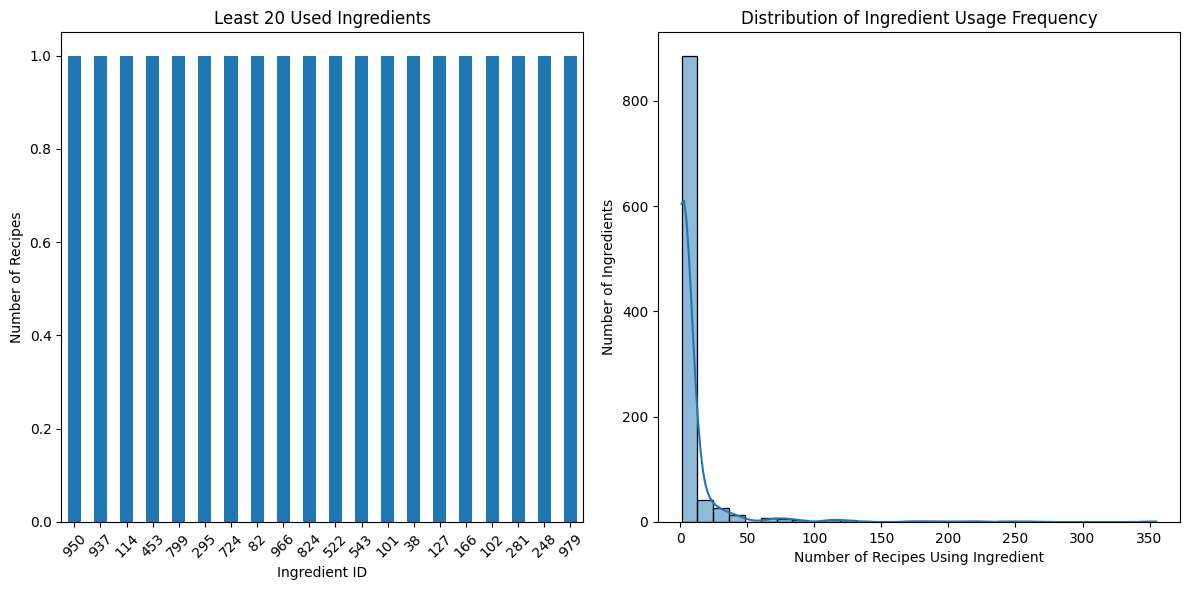

In [44]:

# Visualize ingredient frequency
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ingredient_frequency.head(20).plot(kind='bar')
plt.title('Top 20 Most Used Ingredients')
plt.xlabel('Ingredient ID')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)

# Visualize ingredient frequency
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ingredient_frequency.tail(20).plot(kind='bar')
plt.title('Least 20 Used Ingredients')
plt.xlabel('Ingredient ID')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(ingredient_frequency.values, bins=30, kde=True)
plt.title('Distribution of Ingredient Usage Frequency')
plt.xlabel('Number of Recipes Using Ingredient')
plt.ylabel('Number of Ingredients')
plt.tight_layout()
plt.show()

In [45]:
#summary statistics
print("\n==Summary Statistics:==")
print(f"Total recipes: {df['recipe_id'].nunique()}")
print(f"Total ingredients: {df['ingredient_id'].nunique()}")
print(f"Total recipe-ingredient pairs: {len(df)}")
print(f"Average ingredients per recipe: {df['recipe_id'].value_counts().mean():.2f}")
print(f"Max ingredients in a recipe: {df['recipe_id'].value_counts().max()}")
print(f"Min ingredients in a recipe: {df['recipe_id'].value_counts().min()}")
print(f"Total unique ingredient counts: {ingredient_count_per_recipe['total_ingredient'].nunique()}")
print(f"Most common ingredient count: {ingredient_count_per_recipe['total_ingredient'].mode()[0]}")
print(f"Most common ingredient count frequency: {ingredient_count_per_recipe['total_ingredient'].value_counts().max()}")
print(f"Most used ingredient ID: {ingredient_frequency_df.iloc[0]['ingredient_id']} ({ingredient_frequency_df.iloc[0]['total_used_in_recipes']} recipes)")



==Summary Statistics:==
Total recipes: 1322
Total ingredients: 999
Total recipe-ingredient pairs: 8209
Average ingredients per recipe: 6.21
Max ingredients in a recipe: 17
Min ingredients in a recipe: 1
Total unique ingredient counts: 17
Most common ingredient count: 5
Most common ingredient count frequency: 214
Most used ingredient ID: 940 (355 recipes)


#### 2.5 DataFrame: recipe_category_df

In [46]:
# Load and basic info for recipe_category_df
recipe_category_df = dataframes['recipe_category_df']
print("shape: ", recipe_category_df.shape)

shape:  (8123, 2)


In [47]:
# 1. Duplication and Unique Data Analysis
print("="*50)
print("Data Analysis:")
print("="*50)
print(f"Total records: {len(recipe_category_df)}")
print(f"Unique Recipe IDs: {recipe_category_df['recipe_id'].nunique()} ")
print(f"Min Unique Recipe Id: {recipe_category_df['recipe_id'].min()}")
print(f"Max Unique Recipe Id: {recipe_category_df['recipe_id'].max()}")
print(f"Unique Category IDs: {recipe_category_df['category_id'].nunique()}")

Data Analysis:
Total records: 8123
Unique Recipe IDs: 1322 
Min Unique Recipe Id: 1
Max Unique Recipe Id: 1322
Unique Category IDs: 10


In [48]:
print("Missing Values Analysis:")
print("="*50)
missing_data = recipe_category_df.isnull().sum()
print("Missing Values:")
for col, missing in missing_data.items():
    percentage = (missing / len(recipe_category_df)) * 100
    print(f"   {col}: {missing:,} ({percentage:.2f}%)")

print(f"\nDuplicate Rows: {recipe_category_df.duplicated().sum():,}")
print(f"Unique Records: {recipe_category_df.drop_duplicates().shape[0]:,}")
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    duplicate_pairs = recipe_category_df.duplicated(subset=['recipe_id', 'category_id']).sum()
    print(f"Duplicate Recipe-Category Pairs: {duplicate_pairs:,}")

# Sample Data
print(f"\n📋 SAMPLE DATA")
print(f"{'='*50}")
print("First 10 rows:")
print(recipe_category_df.head(10).to_string())
print(f"\nRandom 5 rows:")
print(recipe_category_df.sample(5).to_string())

Missing Values Analysis:
Missing Values:
   recipe_id: 0 (0.00%)
   category_id: 0 (0.00%)

Duplicate Rows: 0
Unique Records: 8,123
Duplicate Recipe-Category Pairs: 0

📋 SAMPLE DATA
First 10 rows:
   recipe_id  category_id
0          1           11
1          1            9
2          1            4
3          1            5
4          1            6
5          1            7
6          1            8
7          2           11
8          2            9
9          2            5

Random 5 rows:
      recipe_id  category_id
701         114           11
5844        956            9
699         113            7
4432        730            5
3206        524            7


In [49]:
# Descriptive statistics
recipe_category_desc = recipe_category_df.describe()
print(recipe_category_desc)


         recipe_id  category_id
count  8123.000000  8123.000000
mean    663.698510     6.395667
std     382.244764     2.456876
min       1.000000     1.000000
25%     333.000000     5.000000
50%     667.000000     7.000000
75%     994.000000     8.000000
max    1322.000000    11.000000


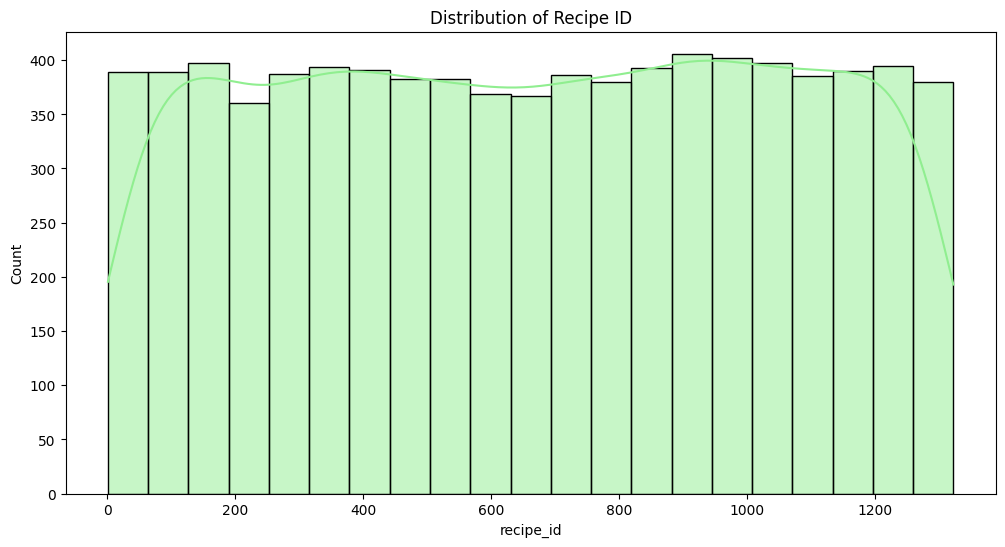

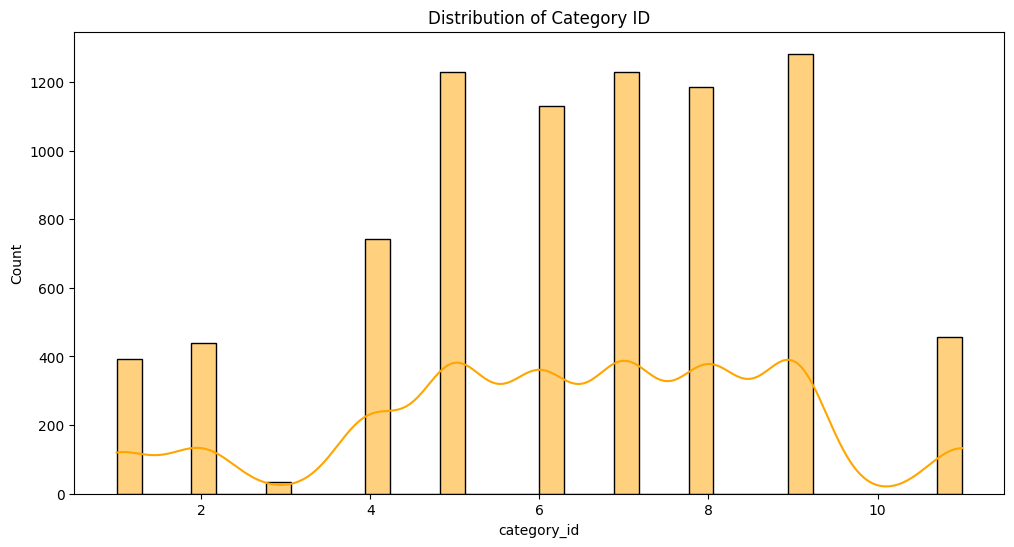

In [50]:
# Plot histogram for recipe_id
plt.figure(figsize=(12, 6))
sns.histplot(recipe_category_df['recipe_id'], kde=True, color='lightgreen')
plt.title('Distribution of Recipe ID')
plt.show()

# Plot histogram for category_id
plt.figure(figsize=(12, 6))
sns.histplot(recipe_category_df['category_id'], kde=True, color='orange')
plt.title('Distribution of Category ID')
plt.show()


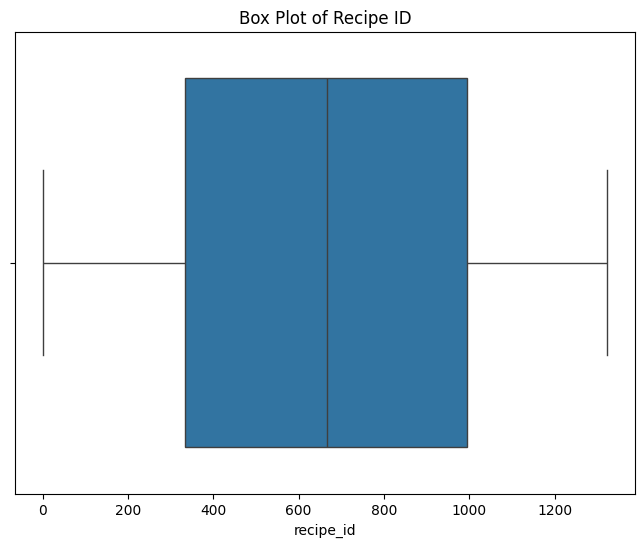

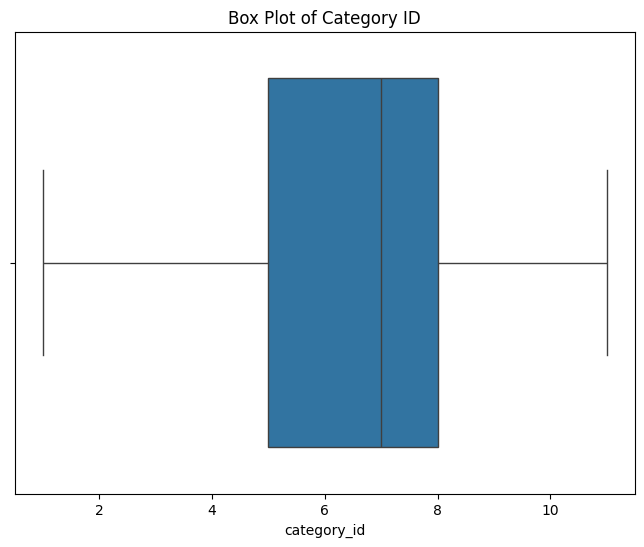

In [51]:
# Box plot for recipe_id
plt.figure(figsize=(8, 6))
sns.boxplot(x=recipe_category_df['recipe_id'])
plt.title('Box Plot of Recipe ID')
plt.show()

# Box plot for category_id
plt.figure(figsize=(8, 6))
sns.boxplot(x=recipe_category_df['category_id'])
plt.title('Box Plot of Category ID')
plt.show()


📈 Categories per recipe statistics:
count    1322.000000
mean        6.144478
std         0.796189
min         4.000000
25%         6.000000
50%         6.000000
75%         7.000000
max         7.000000
Name: total_categories, dtype: float64

📊 Categories per recipe distribution:
total_categories
4     39
5    220
6    574
7    489
Name: count, dtype: int64


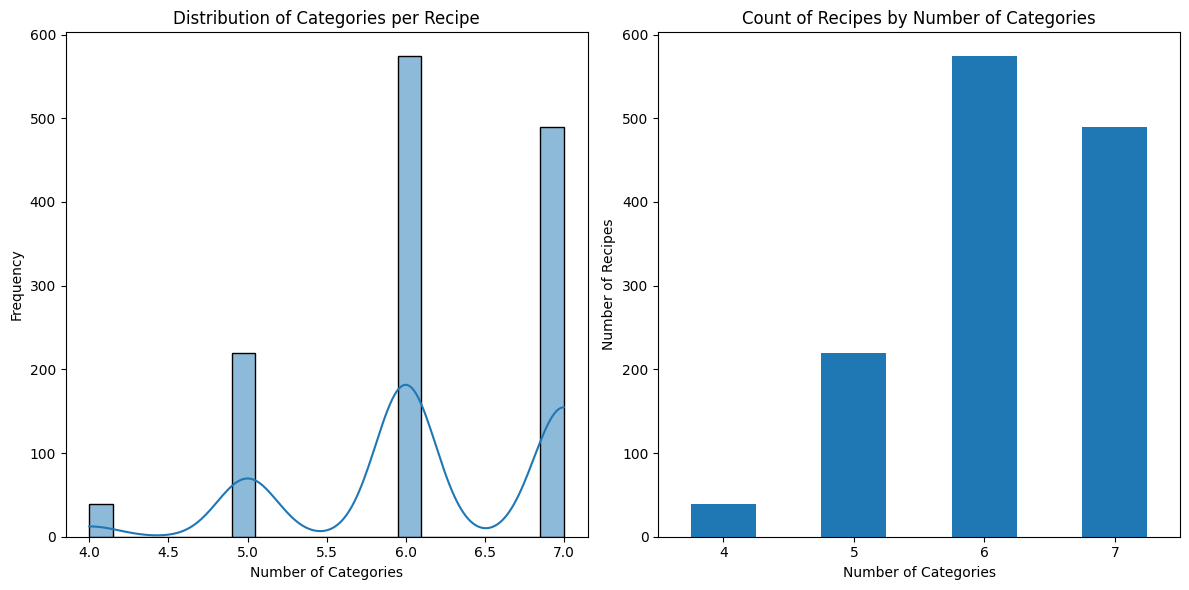


📝 Sample recipes with their category counts:


,recipe_id,total_categories
0,1,7
1,2,5
2,3,6
3,4,7
4,5,7
5,6,6
6,7,6
7,8,6
8,9,6
9,10,6


In [52]:
# GROUP BY RECIPE_ID: How many categories per recipe?

category_count_per_recipe = recipe_category_df.groupby('recipe_id')['category_id'].count().reset_index()
category_count_per_recipe = category_count_per_recipe.rename(columns={'category_id': 'total_categories'})

print(f"📈 Categories per recipe statistics:")
print(category_count_per_recipe['total_categories'].describe())

print(f"\n📊 Categories per recipe distribution:")
print(category_count_per_recipe['total_categories'].value_counts().sort_index())

# Visualize distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(category_count_per_recipe['total_categories'], bins=20, kde=True)
plt.title('Distribution of Categories per Recipe')
plt.xlabel('Number of Categories')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
category_count_per_recipe['total_categories'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Recipes by Number of Categories')
plt.xlabel('Number of Categories')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"\n📝 Sample recipes with their category counts:")
display(category_count_per_recipe.head(10))

📈 Recipes per category statistics:
count      10.000000
mean      812.300000
std       455.274533
min        33.000000
25%       443.000000
50%       936.000000
75%      1218.500000
max      1283.000000
Name: total_recipes, dtype: float64

🏆 Top 10 most popular categories (by recipe count):


,category_id,total_recipes
8,9,1283
4,5,1230
6,7,1229
7,8,1187
5,6,1131
3,4,741
9,11,458
1,2,438
0,1,393
2,3,33



📉 Bottom 10 least popular categories (by recipe count):


,category_id,total_recipes
8,9,1283
4,5,1230
6,7,1229
7,8,1187
5,6,1131
3,4,741
9,11,458
1,2,438
0,1,393
2,3,33


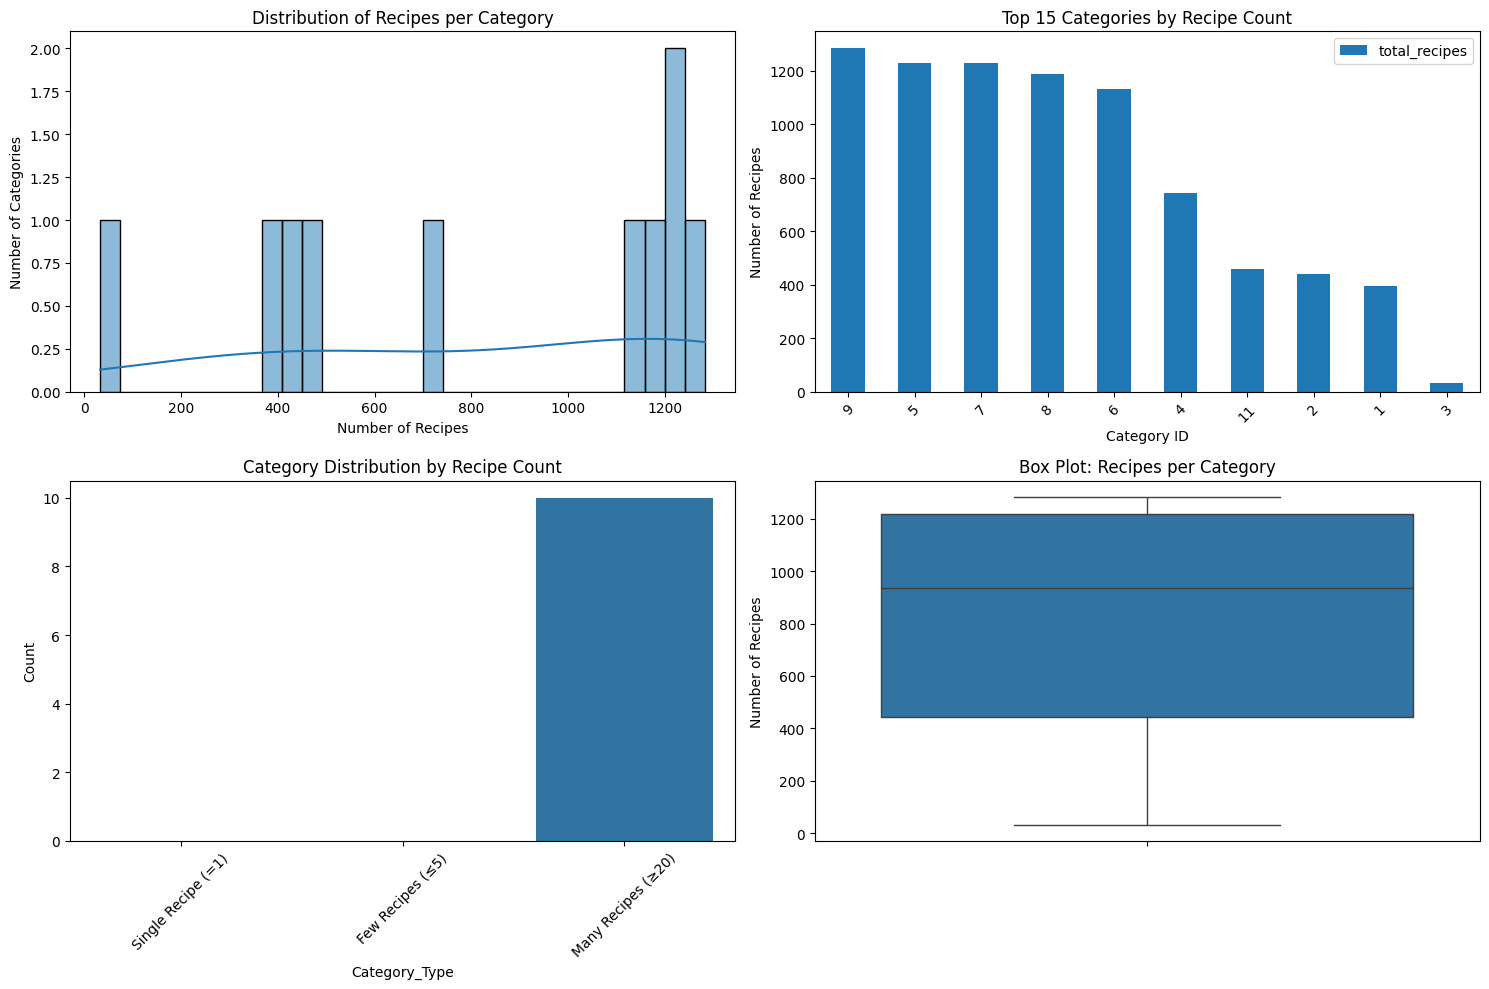

In [53]:
# 🔍 GROUP BY CATEGORY_ID: How many recipes per category?

recipe_count_per_category = recipe_category_df.groupby('category_id')['recipe_id'].count().reset_index()
recipe_count_per_category = recipe_count_per_category.rename(columns={'recipe_id': 'total_recipes'})

print(f"📈 Recipes per category statistics:")
print(recipe_count_per_category['total_recipes'].describe())

print(f"\n🏆 Top 10 most popular categories (by recipe count):")
top_categories = recipe_count_per_category.sort_values('total_recipes', ascending=False)
display(top_categories.head(10))

print(f"\n📉 Bottom 10 least popular categories (by recipe count):")
display(top_categories.tail(10))


# Visualize distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(recipe_count_per_category['total_recipes'], bins=30, kde=True)
plt.title('Distribution of Recipes per Category')
plt.xlabel('Number of Recipes')
plt.ylabel('Number of Categories')

plt.subplot(2, 2, 2)
top_categories.head(15).plot(x='category_id', y='total_recipes', kind='bar', ax=plt.gca())
plt.title('Top 15 Categories by Recipe Count')
plt.xlabel('Category ID')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
# Categories with only 1 recipe
single_recipe_categories = (recipe_count_per_category['total_recipes'] == 1).sum()
few_recipe_categories = (recipe_count_per_category['total_recipes'] <= 5).sum()
many_recipe_categories = (recipe_count_per_category['total_recipes'] >= 20).sum()

category_distribution = pd.DataFrame({
    'Category_Type': ['Single Recipe (=1)', 'Few Recipes (≤5)', 'Many Recipes (≥20)'],
    'Count': [single_recipe_categories, few_recipe_categories, many_recipe_categories]
})
sns.barplot(data=category_distribution, x='Category_Type', y='Count')
plt.title('Category Distribution by Recipe Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
# Box plot for better understanding of distribution
sns.boxplot(y=recipe_count_per_category['total_recipes'])
plt.title('Box Plot: Recipes per Category')
plt.ylabel('Number of Recipes')

plt.tight_layout()
plt.show()

In [54]:
# Fix the Summary Report
print("\n" + "="*60)
print("SUMMARY REPORT")
print("="*60)

recipe_count_per_category = recipe_category_df.groupby('category_id')['recipe_id'].count().reset_index()
recipe_count_per_category = recipe_count_per_category.rename(columns={'recipe_id': 'total_recipes'})

# Get category frequency counts
category_counts = recipe_category_df['category_id'].value_counts()

# Calculate summary statistics
single_recipe_categories = (recipe_count_per_category['total_recipes'] == 1).sum()
few_recipe_categories = (recipe_count_per_category['total_recipes'] <= 5).sum()
many_recipe_categories = (recipe_count_per_category['total_recipes'] >= 20).sum()

print(f"Dataset contains {len(recipe_category_df)} recipe category mappings")
print(f"Contains {recipe_category_df['category_id'].nunique()} unique categories")
print(f"Most frequent category: {category_counts.idxmax()} ({category_counts.max()} occurrences)")
print(f"   Total categories: {len(recipe_count_per_category)}")
print(f"   Categories with only 1 recipe: {single_recipe_categories}")
print(f"   Categories with ≤5 recipes: {few_recipe_categories}")
print(f"   Categories with ≥20 recipes: {many_recipe_categories}")
print(f"   Average recipes per category: {recipe_count_per_category['total_recipes'].mean():.2f}")


SUMMARY REPORT
Dataset contains 8123 recipe category mappings
Contains 10 unique categories
Most frequent category: 9 (1283 occurrences)
   Total categories: 10
   Categories with only 1 recipe: 0
   Categories with ≤5 recipes: 0
   Categories with ≥20 recipes: 10
   Average recipes per category: 812.30


#### 2.6 DataFrame: recipe_nutrition

In [ ]:
recipe_nutrition = dataframes['recipe_nutrition']

print(f"Dataset shape: {recipe_nutrition.shape}")
print(f"Number of unique recipes with nutrition data: {recipe_nutrition['recipe_id'].nunique()}")
print()
print ("column: ",  recipe_nutrition.columns.to_list())

In [ ]:
#original type pf macronutrients cols
macronutrient_cols = ['total_energy_kcal', 'total_carbs_g', 'total_protein_g', 'total_fat_g']
display(recipe_nutrition[macronutrient_cols].dtypes)


In [ ]:
# Check for missing values in macronutrients
missing_macro = recipe_nutrition[macronutrient_cols].isnull().sum()
print("Missing values in macronutrients:")
for col in macronutrient_cols:
    missing_count = missing_macro[col]
    missing_percent = (missing_count / len(recipe_nutrition)) * 100
    print(f"{col}: {missing_count} ({missing_percent:.1f}%)")
print()

# Zero values analysis (recipes with 0 calories, etc.)
print("Zero values analysis:")
for col in macronutrient_cols:
    zero_count = (recipe_nutrition[col] == 0).sum()
    zero_percent = (zero_count / len(recipe_nutrition)) * 100
    print(f"{col} = 0: {zero_count} recipes ({zero_percent:.1f}%)")

#### 2.5 Extended Univariate Analysis - Recipe Characteristics & Quality

**Purpose**: Perform comprehensive analysis of recipe characteristics, cooking complexity, age appropriateness, and nutritional quality patterns to identify key features for baby food recommendations.

In [ ]:
# === RECIPE COMPLEXITY & CHARACTERISTICS ANALYSIS ===

# 1. Recipe complexity based on ingredient count
recipes['ingredient_count'] = recipes['ingredients'].str.split(',').str.len()

# Define complexity categories
def categorize_complexity(count):
    if pd.isna(count):
        return 'Unknown'
    elif count <= 3:
        return 'Simple'
    elif count <= 6:
        return 'Moderate'
    else:
        return 'Complex'

recipes['complexity_category'] = recipes['ingredient_count'].apply(categorize_complexity)

print("=== RECIPE COMPLEXITY ANALYSIS ===")
print(f"Ingredient count statistics:")
print(recipes['ingredient_count'].describe())
print(f"\nComplexity distribution:")
print(recipes['complexity_category'].value_counts())
print(f"Percentage distribution:")
print(recipes['complexity_category'].value_counts(normalize=True) * 100)

# 2. Age range analysis
recipes['age_range'] = recipes['max_age'] - recipes['min_age']
recipes['age_midpoint'] = (recipes['min_age'] + recipes['max_age']) / 2

print(f"\n=== AGE APPROPRIATENESS ANALYSIS ===")
print(f"Min age statistics:")
print(recipes['min_age'].describe())
print(f"\nMax age statistics:")
print(recipes['max_age'].describe())
print(f"\nAge range (months) statistics:")
print(recipes['age_range'].describe())

# 3. Cooking time analysis
print(f"\n=== COOKING TIME ANALYSIS ===")
print(f"Prep time distribution:")
print(recipes['prep_time'].value_counts().head(10))
print(f"\nCook time distribution:")
print(recipes['cook_time'].value_counts().head(10))

In [ ]:
# === RECIPE CHARACTERISTICS VISUALIZATIONS ===

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Recipe complexity distribution
recipes['complexity_category'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Recipe Complexity Distribution', fontweight='bold')
axes[0,0].set_xlabel('Complexity Category')
axes[0,0].set_ylabel('Number of Recipes')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Ingredient count distribution
recipes['ingredient_count'].hist(bins=20, ax=axes[0,1], color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Ingredient Count Distribution', fontweight='bold')
axes[0,1].set_xlabel('Number of Ingredients')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(recipes['ingredient_count'].mean(), color='red', linestyle='--', label=f'Mean: {recipes["ingredient_count"].mean():.1f}')
axes[0,1].legend()

# 3. Age range distribution
recipes['age_range'].hist(bins=15, ax=axes[0,2], color='orange', edgecolor='black', alpha=0.7)
axes[0,2].set_title('Age Range Distribution (months)', fontweight='bold')
axes[0,2].set_xlabel('Age Range (months)')
axes[0,2].set_ylabel('Frequency')

# 4. Min age distribution
recipes['min_age'].hist(bins=12, ax=axes[1,0], color='purple', edgecolor='black', alpha=0.7)
axes[1,0].set_title('Minimum Age Distribution', fontweight='bold')
axes[1,0].set_xlabel('Minimum Age (months)')
axes[1,0].set_ylabel('Frequency')

# 5. Texture distribution
if 'texture' in recipes.columns and not recipes['texture'].isna().all():
    texture_counts = recipes['texture'].value_counts()
    texture_counts.plot(kind='bar', ax=axes[1,1], color='coral', edgecolor='black')
    axes[1,1].set_title('Texture Distribution', fontweight='bold')
    axes[1,1].set_xlabel('Texture Type')
    axes[1,1].set_ylabel('Number of Recipes')
    axes[1,1].tick_params(axis='x', rotation=45)
else:
    axes[1,1].text(0.5, 0.5, 'Texture data not available', ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Texture Distribution', fontweight='bold')

# 6. Difficulty distribution
if 'difficulty' in recipes.columns and not recipes['difficulty'].isna().all():
    difficulty_counts = recipes['difficulty'].value_counts()
    difficulty_counts.plot(kind='bar', ax=axes[1,2], color='gold', edgecolor='black')
    axes[1,2].set_title('Difficulty Level Distribution', fontweight='bold')
    axes[1,2].set_xlabel('Difficulty Level')
    axes[1,2].set_ylabel('Number of Recipes')
    axes[1,2].tick_params(axis='x', rotation=45)
else:
    axes[1,2].text(0.5, 0.5, 'Difficulty data not available', ha='center', va='center', transform=axes[1,2].transAxes)
    axes[1,2].set_title('Difficulty Level Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

#### nutrition

In [19]:
# === NUTRITIONAL QUALITY ANALYSIS ===

print("=== NUTRITIONAL COMPLETENESS ANALYSIS ===")
recipe_nutrition =dataframes['recipe_nutrition']
# Calculate nutritional completeness score
nutrition_cols = ['total_energy_kcal', 'total_carbs_g', 'total_protein_g', 'total_fat_g']
recipe_nutrition['nutrition_completeness'] = recipe_nutrition[nutrition_cols].notna().sum(axis=1) / len(nutrition_cols)

print("Nutritional completeness distribution:")
print(recipe_nutrition['nutrition_completeness'].value_counts().sort_index())

# Calculate macronutrient ratios for recipes with complete data
complete_nutrition = recipe_nutrition.dropna(subset=nutrition_cols)
complete_nutrition = complete_nutrition[complete_nutrition['total_energy_kcal'] > 0]

if len(complete_nutrition) > 0:
    # Calculate ratios (as percentage of total calories)
    complete_nutrition['carb_percent'] = (complete_nutrition['total_carbs_g'] * 4 / complete_nutrition['total_energy_kcal']) * 100
    complete_nutrition['protein_percent'] = (complete_nutrition['total_protein_g'] * 4 / complete_nutrition['total_energy_kcal']) * 100
    complete_nutrition['fat_percent'] = (complete_nutrition['total_fat_g'] * 9 / complete_nutrition['total_energy_kcal']) * 100
    
    print(f"\n=== MACRONUTRIENT COMPOSITION (% of calories) ===")
    print(f"Carbohydrate %: {complete_nutrition['carb_percent'].mean():.1f} ± {complete_nutrition['carb_percent'].std():.1f}")
    print(f"Protein %: {complete_nutrition['protein_percent'].mean():.1f} ± {complete_nutrition['protein_percent'].std():.1f}")
    print(f"Fat %: {complete_nutrition['fat_percent'].mean():.1f} ± {complete_nutrition['fat_percent'].std():.1f}")

# Micronutrient diversity analysis
print(f"\n=== MICRONUTRIENT DIVERSITY ANALYSIS ===")
recipe_nutrition['micronutrient_count'] = recipe_nutrition['final_micronutrients'].str.split(',').str.len()
recipe_nutrition['micronutrient_count'] = recipe_nutrition['micronutrient_count'].fillna(0)

print("Micronutrient count statistics:")
print(recipe_nutrition['micronutrient_count'].describe())

# Identify recipes with exceptional nutritional profiles
high_protein = complete_nutrition[complete_nutrition['protein_percent'] > complete_nutrition['protein_percent'].quantile(0.9)]
high_energy = complete_nutrition[complete_nutrition['total_energy_kcal'] > complete_nutrition['total_energy_kcal'].quantile(0.9)]

print(f"\nHigh-protein recipes (top 10%): {len(high_protein)} recipes")
print(f"High-energy recipes (top 10%): {len(high_energy)} recipes")

=== NUTRITIONAL COMPLETENESS ANALYSIS ===
Nutritional completeness distribution:
nutrition_completeness
0.00       1
0.75      43
1.00    1278
Name: count, dtype: int64


TypeError: '>' not supported between instances of 'str' and 'int'

!!how to handle the missing values 

#### Numerical

In [ ]:
# Improved Micronutrient Analysis with Empty/Missing Value Handling
from collections import Counter
import ast

# Get the recipe_nutrition dataframe from the loaded dataframes
recipe_nutrition = dataframes['recipe_nutrition']

# Analyze the final_micronutrients column which contains lists of micronutrients
print("=== MICRONUTRIENT COVERAGE ANALYSIS ===\n")

# Check if final_micronutrients column exists and analyze it
if 'final_micronutrients' in recipe_nutrition.columns:
    print(f"📊 Total recipes in dataset: {len(recipe_nutrition)}")
    
    # Analyze missing/empty micronutrient data
    total_null = recipe_nutrition['final_micronutrients'].isna().sum()
    print(f"❌ Recipes with NULL micronutrient data: {total_null}")
    
    # Count recipes with empty lists []
    empty_lists = 0
    valid_micronutrient_data = 0
    all_micronutrients = []
    micronutrient_counts_per_recipe = []
    
    for idx, micronutrient_data in enumerate(recipe_nutrition['final_micronutrients']):
        if pd.isna(micronutrient_data):
            micronutrient_counts_per_recipe.append(0)
            continue
            
        try:
            # Handle string representation of lists
            if isinstance(micronutrient_data, str):
                if micronutrient_data.strip() in ['[]', '', 'nan']:
                    empty_lists += 1
                    micronutrient_counts_per_recipe.append(0)
                    continue
                micronutrient_list = ast.literal_eval(micronutrient_data)
            elif isinstance(micronutrient_data, list):
                micronutrient_list = micronutrient_data
            else:
                empty_lists += 1
                micronutrient_counts_per_recipe.append(0)
                continue
                
            # Check if the list is empty
            if not micronutrient_list or len(micronutrient_list) == 0:
                empty_lists += 1
                micronutrient_counts_per_recipe.append(0)
            else:
                valid_micronutrient_data += 1
                all_micronutrients.extend(micronutrient_list)
                micronutrient_counts_per_recipe.append(len(micronutrient_list))
                
        except (ValueError, SyntaxError, TypeError) as e:
            empty_lists += 1
            micronutrient_counts_per_recipe.append(0)
    
    print(f"📭 Recipes with empty micronutrient lists []: {empty_lists}")
    print(f"✅ Recipes with valid micronutrient data: {valid_micronutrient_data}")
    
    total_missing = total_null + empty_lists
    print(f"\n🔍 SUMMARY:")
    print(f"  • Total recipes missing micronutrient data: {total_missing} ({total_missing/len(recipe_nutrition)*100:.1f}%)")
    print(f"  • Total recipes with micronutrient data: {valid_micronutrient_data} ({valid_micronutrient_data/len(recipe_nutrition)*100:.1f}%)")
    
    if valid_micronutrient_data > 0:
        print("\n" + "="*50)
        print("🧬 MICRONUTRIENT FREQUENCY ANALYSIS")
        print("="*50)
        
        micronutrient_counts = Counter(all_micronutrients)
        
        print(f"\n📈 Statistics:")
        print(f"  • Total unique micronutrients found: {len(micronutrient_counts)}")
        print(f"  • Total micronutrient mentions: {sum(micronutrient_counts.values())}")
        print(f"  • Average micronutrients per recipe (all): {sum(micronutrient_counts_per_recipe)/len(recipe_nutrition):.1f}")
        print(f"  • Average micronutrients per recipe (with data): {sum(micronutrient_counts_per_recipe)/max(valid_micronutrient_data, 1):.1f}")
        
        # Distribution of micronutrient counts per recipe
        from collections import Counter as RecipeCounter
        recipe_micro_distribution = RecipeCounter(micronutrient_counts_per_recipe)
        print(f"\n📊 Distribution of micronutrients per recipe:")
        for count, num_recipes in sorted(recipe_micro_distribution.items()):
            if count == 0:
                print(f"  • {count} micronutrients: {num_recipes} recipes ({num_recipes/len(recipe_nutrition)*100:.1f}%)")
            else:
                print(f"  • {count} micronutrients: {num_recipes} recipes ({num_recipes/len(recipe_nutrition)*100:.1f}%)")
        
        print(f"\n🏆 TOP 20 Most Common Micronutrients:")
        print("-" * 45)
        for i, (micro, count) in enumerate(micronutrient_counts.most_common(20), 1):
            percentage = (count / valid_micronutrient_data) * 100
            print(f"{i:2d}. {micro:<25} {count:4d} recipes ({percentage:5.1f}%)")
        
        print(f"\n🔻 LEAST Common Micronutrients (bottom 10):")
        print("-" * 45)
        least_common = micronutrient_counts.most_common()[-10:]
        for i, (micro, count) in enumerate(reversed(least_common), 1):
            percentage = (count / valid_micronutrient_data) * 100
            print(f"{i:2d}. {micro:<25} {count:4d} recipes ({percentage:5.1f}%)")
        
        # Additional insights
        rare_micronutrients = sum(1 for count in micronutrient_counts.values() if count == 1)
        common_micronutrients = sum(1 for count in micronutrient_counts.values() if count >= valid_micronutrient_data * 0.1)
        
        print(f"\n💎 Additional Insights:")
        print(f"  • Micronutrients appearing in only 1 recipe: {rare_micronutrients}")
        print(f"  • Micronutrients appearing in ≥10% of recipes: {common_micronutrients}")
        
        if micronutrient_counts:
            most_common_micro = micronutrient_counts.most_common(1)[0]
            print(f"  • Most prevalent micronutrient: {most_common_micro[0]} (in {most_common_micro[1]} recipes)")
    
    else:
        print("\n⚠️  No valid micronutrient data found for analysis.")
        
else:
    print("❌ No final_micronutrients column found.")

In [ ]:
# Micronutrient Visualization - Top Micronutrients and Distribution
import matplotlib.pyplot as plt
import seaborn as sns

if 'micronutrient_counts' in locals() and micronutrient_counts:
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Top 15 Most Common Micronutrients
    top_15_micros = micronutrient_counts.most_common(15)
    micros, counts = zip(*top_15_micros)
    
    bars1 = ax1.bar(range(len(micros)), counts, color='lightcoral', alpha=0.8)
    ax1.set_xlabel('Micronutrients', fontweight='bold')
    ax1.set_ylabel('Number of Recipes', fontweight='bold')
    ax1.set_title('📊 Top 15 Most Common Micronutrients', fontweight='bold', fontsize=14)
    ax1.set_xticks(range(len(micros)))
    ax1.set_xticklabels(micros, rotation=45, ha='right')
    
    # Add count labels on bars
    for bar, count in zip(bars1, counts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                str(count), ha='center', va='bottom', fontweight='bold')
    
    # Plot 2: Distribution of Micronutrient Counts per Recipe
    recipe_micro_dist = pd.Series(micronutrient_counts_per_recipe)
    recipe_micro_dist.hist(bins=20, ax=ax2, color='skyblue', alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Number of Micronutrients per Recipe', fontweight='bold')
    ax2.set_ylabel('Number of Recipes', fontweight='bold')
    ax2.set_title('📈 Distribution of Micronutrients per Recipe', fontweight='bold', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # Add statistics annotation
    mean_micros = recipe_micro_dist.mean()
    median_micros = recipe_micro_dist.median()
    ax2.axvline(mean_micros, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_micros:.1f}')
    ax2.axvline(median_micros, color='orange', linestyle='--', alpha=0.8, label=f'Median: {median_micros:.1f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics box
    print("\n" + "="*60)
    print("📋 MICRONUTRIENT SUMMARY STATISTICS")
    print("="*60)
    print(f"• Dataset Coverage:")
    print(f"  - Total recipes: {len(recipe_nutrition)}")
    print(f"  - Recipes with micronutrient data: {valid_micronutrient_data} ({valid_micronutrient_data/len(recipe_nutrition)*100:.1f}%)")
    print(f"  - Recipes missing data: {total_missing} ({total_missing/len(recipe_nutrition)*100:.1f}%)")
    print(f"\n• Micronutrient Diversity:")
    print(f"  - Total unique micronutrients: {len(micronutrient_counts)}")
    print(f"  - Most common micronutrient: {micronutrient_counts.most_common(1)[0][0]} (in {micronutrient_counts.most_common(1)[0][1]} recipes)")
    print(f"  - Micronutrients appearing in only 1 recipe: {sum(1 for c in micronutrient_counts.values() if c == 1)}")
    print(f"  - Average micronutrients per recipe: {sum(micronutrient_counts_per_recipe) / len(recipe_nutrition):.1f}")
    
else:
    print("⚠️ No micronutrient data available for visualization.")

### 2.7 Recipes Dataframe 

www#### 2.5 DataFrame: recipe_category_df - Comprehensive Univariate Analysis

**Purpose:** In-depth analysis of recipe-category relationships to understand category distribution, recipe coverage, and categorization patterns in the baby food dataset.

In [ ]:
# # =============================================================================
# # 2.5 RECIPE_CATEGORY_DF DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS
# # =============================================================================

# print("=" * 80)
# print("2.5 RECIPE_CATEGORY_DF DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS")
# print("=" * 80)

# # Load recipe_category_df dataframe
# recipe_category_df = dataframes['recipe_category_df']

# print(f"\n🔍 DATASET OVERVIEW")
# print(f"{'='*50}")
# print(f"📊 Dataset Shape: {recipe_category_df.shape}")
# print(f"📋 Columns: {list(recipe_category_df.columns)}")
# print(f"💾 Memory Usage: {recipe_category_df.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")
# print(f"🔢 Data Types:")
# for col, dtype in recipe_category_df.dtypes.items():
#     print(f"   {col}: {dtype}")

# # Data Quality Assessment
# print(f"\n📊 DATA QUALITY ASSESSMENT")
# print(f"{'='*50}")
# missing_data = recipe_category_df.isnull().sum()
# print("Missing Values:")
# for col, missing in missing_data.items():
#     percentage = (missing / len(recipe_category_df)) * 100
#     print(f"   {col}: {missing:,} ({percentage:.2f}%)")

# print(f"\nDuplicate Rows: {recipe_category_df.duplicated().sum():,}")
# print(f"Unique Records: {recipe_category_df.drop_duplicates().shape[0]:,}")

# # Check for duplicate recipe-category pairs
# if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
#     duplicate_pairs = recipe_category_df.duplicated(subset=['recipe_id', 'category_id']).sum()
#     print(f"Duplicate Recipe-Category Pairs: {duplicate_pairs:,}")

# # Sample Data
# print(f"\n📋 SAMPLE DATA")
# print(f"{'='*50}")
# print("First 10 rows:")
# print(recipe_category_df.head(10).to_string())
# print(f"\nRandom 5 rows:")
# print(recipe_category_df.sample(5).to_string())

#### ADDITIONAL CATEGORY CHECKING

In [ ]:
# =============================================================================
# DETAILED ANALYSIS - RECIPE_CATEGORY RELATIONSHIPS
# =============================================================================

print(f"\n📈 DETAILED RELATIONSHIP ANALYSIS")
print(f"{'='*50}")

# Numerical Analysis
numerical_cols = recipe_category_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = recipe_category_df.select_dtypes(include=['object']).columns.tolist()

print("NUMERICAL COLUMNS ANALYSIS:")
print("-" * 30)
for col in numerical_cols:
    data = recipe_category_df[col].dropna()
    if len(data) > 0:
        print(f"\n🔢 {col.upper()}:")
        print(f"   Count: {len(data):,}")
        print(f"   Unique Values: {data.nunique():,}")
        print(f"   Min: {data.min()}")
        print(f"   Max: {data.max()}")
        print(f"   Mean: {data.mean():.2f}")
        print(f"   Median: {data.median():.2f}")
        print(f"   Std Dev: {data.std():.2f}")
        
        # Quartiles
        print(f"   Quartiles: Q1={data.quantile(0.25):.2f}, Q2={data.quantile(0.5):.2f}, Q3={data.quantile(0.75):.2f}")

# Recipe Analysis
print(f"\n🍽️ RECIPE-CATEGORY ANALYSIS")
print(f"{'='*40}")

if 'recipe_id' in recipe_category_df.columns:
    recipe_stats = recipe_category_df['recipe_id'].value_counts()
    unique_recipes = recipe_category_df['recipe_id'].nunique()
    total_connections = len(recipe_category_df)
    
    print(f"Unique Recipes: {unique_recipes:,}")
    print(f"Total Recipe-Category Connections: {total_connections:,}")
    print(f"Average Categories per Recipe: {total_connections/unique_recipes:.2f}")
    
    print(f"\nRECIPE CATEGORIZATION DISTRIBUTION:")
    print("-" * 35)
    categorization_stats = recipe_stats.describe()
    print(f"Min Categories per Recipe: {categorization_stats['min']}")
    print(f"Max Categories per Recipe: {categorization_stats['max']}")
    print(f"Mean Categories per Recipe: {categorization_stats['mean']:.2f}")
    print(f"Median Categories per Recipe: {categorization_stats['50%']:.2f}")
    
    # Recipe categorization patterns
    single_category = (recipe_stats == 1).sum()
    multiple_categories = (recipe_stats > 1).sum()
    highly_categorized = (recipe_stats >= 5).sum()
    
    print(f"\n📊 CATEGORIZATION PATTERNS:")
    print(f"   Single category: {single_category:,} recipes ({single_category/unique_recipes*100:.1f}%)")
    print(f"   Multiple categories: {multiple_categories:,} recipes ({multiple_categories/unique_recipes*100:.1f}%)")
    print(f"   Highly categorized (5+): {highly_categorized:,} recipes ({highly_categorized/unique_recipes*100:.1f}%)")

# Category Analysis
if 'category_id' in recipe_category_df.columns:
    category_stats = recipe_category_df['category_id'].value_counts()
    unique_categories = recipe_category_df['category_id'].nunique()
    
    print(f"\n🏷️ CATEGORY ANALYSIS")
    print(f"{'='*40}")
    print(f"Unique Categories: {unique_categories:,}")
    print(f"Average Recipes per Category: {total_connections/unique_categories:.2f}")
    
    print(f"\nCATEGORY POPULARITY DISTRIBUTION:")
    print("-" * 32)
    category_usage_stats = category_stats.describe()
    print(f"Min Recipes per Category: {category_usage_stats['min']}")
    print(f"Max Recipes per Category: {category_usage_stats['max']}")
    print(f"Mean Recipes per Category: {category_usage_stats['mean']:.2f}")
    print(f"Median Recipes per Category: {category_usage_stats['50%']:.2f}")
    
    # Category popularity patterns
    rare_categories = (category_stats <= 5).sum()
    common_categories = (category_stats >= 50).sum()
    very_popular = (category_stats >= 100).sum()
    
    print(f"\n📈 CATEGORY POPULARITY PATTERNS:")
    print(f"   Rare categories (≤5 recipes): {rare_categories:,} ({rare_categories/unique_categories*100:.1f}%)")
    print(f"   Common categories (≥50 recipes): {common_categories:,} ({common_categories/unique_categories*100:.1f}%)")
    print(f"   Very popular (≥100 recipes): {very_popular:,} ({very_popular/unique_categories*100:.1f}%)")
    
    # Top and bottom categories
    print(f"\n🔝 TOP 10 MOST POPULAR CATEGORIES:")
    for i, (cat_id, count) in enumerate(category_stats.head(10).items(), 1):
        print(f"   {i:2d}. Category {cat_id}: {count:,} recipes")
    
    print(f"\n🔻 LEAST POPULAR CATEGORIES (≤3 recipes):")
    least_popular = category_stats[category_stats <= 3]
    if len(least_popular) > 0:
        for cat_id, count in least_popular.items():
            print(f"   Category {cat_id}: {count} recipe(s)")
    else:
        print("   All categories have more than 3 recipes")

# Calculate coverage metrics
print(f"\n📊 COVERAGE METRICS:")
print(f"{'='*40}")
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    # Coverage matrix analysis
    recipe_category_matrix = recipe_category_df.groupby(['recipe_id', 'category_id']).size().unstack(fill_value=0)
    sparsity = (recipe_category_matrix == 0).sum().sum() / (recipe_category_matrix.shape[0] * recipe_category_matrix.shape[1])
    
    print(f"Matrix Dimensions: {recipe_category_matrix.shape[0]} recipes × {recipe_category_matrix.shape[1]} categories")
    print(f"Matrix Sparsity: {sparsity:.3f} ({sparsity*100:.1f}% empty)")
    print(f"Matrix Density: {1-sparsity:.3f} ({(1-sparsity)*100:.1f}% filled)")
    
    # Calculate category coverage per recipe
    categories_per_recipe = recipe_category_df.groupby('recipe_id').size()
    recipes_per_category = recipe_category_df.groupby('category_id').size()
    
    print(f"\nCOVERAGE DISTRIBUTION:")
    print(f"   Avg categories per recipe: {categories_per_recipe.mean():.2f}")
    print(f"   Avg recipes per category: {recipes_per_category.mean():.2f}")
    print(f"   Category coverage range: {categories_per_recipe.min()}-{categories_per_recipe.max()}")
    print(f"   Recipe coverage range: {recipes_per_category.min()}-{recipes_per_category.max()}")

In [ ]:
# =============================================================================
# COMPREHENSIVE VISUALIZATIONS - RECIPE_CATEGORY_DF
# =============================================================================

print(f"\n📊 GENERATING COMPREHENSIVE VISUALIZATIONS")
print(f"{'='*50}")

# Setup the visualization grid
fig = plt.figure(figsize=(20, 15))
fig.suptitle('RECIPE_CATEGORY_DF - COMPREHENSIVE UNIVARIATE ANALYSIS', 
             fontsize=20, fontweight='bold', y=0.98)

# 1. Recipe Categorization Distribution (Bar Chart)
ax1 = plt.subplot(3, 3, 1)
if 'recipe_id' in recipe_category_df.columns:
    recipe_categorization = recipe_category_df['recipe_id'].value_counts()
    categorization_counts = recipe_categorization.value_counts().sort_index()
    
    bars = ax1.bar(categorization_counts.index, categorization_counts.values, 
                   color='lightblue', alpha=0.8, edgecolor='black')
    ax1.set_title('Recipe Categorization Distribution\n(Categories per Recipe)', fontweight='bold', pad=20)
    ax1.set_xlabel('Number of Categories')
    ax1.set_ylabel('Number of Recipes')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 2. Category Popularity Distribution (Histogram)
ax2 = plt.subplot(3, 3, 2)
if 'category_id' in recipe_category_df.columns:
    category_popularity = recipe_category_df['category_id'].value_counts()
    ax2.hist(category_popularity.values, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    ax2.set_title('Category Popularity Distribution\n(Recipes per Category)', fontweight='bold', pad=20)
    ax2.set_xlabel('Number of Recipes per Category')
    ax2.set_ylabel('Number of Categories')
    ax2.grid(True, alpha=0.3)
    
    # Add statistics
    mean_recipes = category_popularity.mean()
    median_recipes = category_popularity.median()
    ax2.axvline(mean_recipes, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_recipes:.1f}')
    ax2.axvline(median_recipes, color='green', linestyle='--', linewidth=2, label=f'Median: {median_recipes:.1f}')
    ax2.legend()

# 3. Top 15 Most Popular Categories
ax3 = plt.subplot(3, 3, 3)
if 'category_id' in recipe_category_df.columns:
    top_categories = recipe_category_df['category_id'].value_counts().head(15)
    bars = ax3.barh(range(len(top_categories)), top_categories.values, 
                    color='coral', alpha=0.8)
    ax3.set_title('Top 15 Most Popular Categories\n(by Recipe Count)', fontweight='bold', pad=20)
    ax3.set_xlabel('Number of Recipes')
    ax3.set_yticks(range(len(top_categories)))
    ax3.set_yticklabels([f'Cat {id}' for id in top_categories.index])
    ax3.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (bar, count) in enumerate(zip(bars, top_categories.values)):
        ax3.text(count + 0.5, i, f'{count}', 
                va='center', ha='left', fontweight='bold')

# 4. Recipe Categorization Pattern Pie Chart
ax4 = plt.subplot(3, 3, 4)
if 'recipe_id' in recipe_category_df.columns:
    recipe_categorization = recipe_category_df['recipe_id'].value_counts()
    single_cat = (recipe_categorization == 1).sum()
    double_cat = (recipe_categorization == 2).sum()
    triple_cat = (recipe_categorization == 3).sum()
    multi_cat = (recipe_categorization > 3).sum()
    
    sizes = [single_cat, double_cat, triple_cat, multi_cat]
    labels = ['Single\nCategory', 'Two\nCategories', 'Three\nCategories', 'Multiple\nCategories (4+)']
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold']
    
    wedges, texts, autotexts = ax4.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
                                      startangle=90, textprops={'fontweight': 'bold'})
    ax4.set_title('Recipe Categorization Patterns\n(Distribution by Category Count)', fontweight='bold', pad=20)

# 5. Category Usage Box Plot
ax5 = plt.subplot(3, 3, 5)
if 'category_id' in recipe_category_df.columns:
    category_usage = recipe_category_df['category_id'].value_counts()
    box_data = [category_usage.values]
    
    box_plot = ax5.boxplot(box_data, labels=['Category Usage'], patch_artist=True)
    ax5.set_title('Category Usage Distribution\n(Box Plot)', fontweight='bold', pad=20)
    ax5.set_ylabel('Number of Recipes per Category')
    ax5.grid(True, alpha=0.3)
    
    # Color the box
    box_plot['boxes'][0].set_facecolor('lightsteelblue')
    box_plot['boxes'][0].set_alpha(0.7)

# 6. Data Quality Heatmap
ax6 = plt.subplot(3, 3, 6)
quality_data = []
for col in recipe_category_df.columns:
    missing_pct = (recipe_category_df[col].isnull().sum() / len(recipe_category_df)) * 100
    complete_pct = 100 - missing_pct
    quality_data.append([complete_pct, missing_pct])

quality_df = pd.DataFrame(quality_data, 
                         columns=['Complete', 'Missing'],
                         index=recipe_category_df.columns)

im = ax6.imshow(quality_df.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
ax6.set_title('Data Quality Heatmap\n(% Complete vs Missing)', fontweight='bold', pad=20)
ax6.set_xticks([0, 1])
ax6.set_xticklabels(['Complete %', 'Missing %'])
ax6.set_yticks(range(len(recipe_category_df.columns)))
ax6.set_yticklabels(recipe_category_df.columns)

# Add text annotations
for i in range(len(recipe_category_df.columns)):
    for j in range(2):
        text = ax6.text(j, i, f'{quality_df.iloc[i, j]:.1f}%',
                       ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=ax6, shrink=0.8)

# 7. Recipe-Category Coverage Matrix (Sampled)
ax7 = plt.subplot(3, 3, 7)
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    # Sample for visualization (too large for full matrix)
    sample_recipes = recipe_category_df['recipe_id'].unique()[:50]  # First 50 recipes
    sample_categories = recipe_category_df['category_id'].value_counts().head(20).index  # Top 20 categories
    
    # Create coverage matrix for sample
    sample_data = recipe_category_df[
        (recipe_category_df['recipe_id'].isin(sample_recipes)) & 
        (recipe_category_df['category_id'].isin(sample_categories))
    ]
    
    if len(sample_data) > 0:
        coverage_matrix = sample_data.groupby(['recipe_id', 'category_id']).size().unstack(fill_value=0)
        coverage_matrix = (coverage_matrix > 0).astype(int)  # Convert to binary
        
        im = ax7.imshow(coverage_matrix.values, cmap='Blues', aspect='auto')
        ax7.set_title('Recipe-Category Coverage Matrix\n(Sample: 50 Recipes × Top 20 Categories)', fontweight='bold', pad=20)
        ax7.set_xlabel('Category ID')
        ax7.set_ylabel('Recipe ID')
        
        # Set tick labels (sample)
        ax7.set_xticks(range(min(10, len(coverage_matrix.columns))))
        ax7.set_xticklabels([str(coverage_matrix.columns[i]) for i in range(min(10, len(coverage_matrix.columns)))], rotation=45)
        ax7.set_yticks(range(min(10, len(coverage_matrix.index))))
        ax7.set_yticklabels([str(coverage_matrix.index[i]) for i in range(min(10, len(coverage_matrix.index)))])

# 8. Statistical Summary Table
ax8 = plt.subplot(3, 3, 8)
ax8.axis('off')

# Calculate comprehensive statistics
stats_data = []
if 'recipe_id' in recipe_category_df.columns:
    recipe_stats = recipe_category_df['recipe_id'].value_counts()
    stats_data.extend([
        ['Total Recipes', f"{recipe_stats.nunique():,}"],
        ['Avg Categories/Recipe', f"{recipe_stats.mean():.1f}"],
        ['Max Categories/Recipe', f"{recipe_stats.max()}"],
        ['Min Categories/Recipe', f"{recipe_stats.min()}"]
    ])

if 'category_id' in recipe_category_df.columns:
    category_stats = recipe_category_df['category_id'].value_counts()
    stats_data.extend([
        ['Total Categories', f"{category_stats.nunique():,}"],
        ['Avg Recipes/Category', f"{category_stats.mean():.1f}"],
        ['Max Recipes/Category', f"{category_stats.max()}"],
        ['Most Popular Category', f"Cat {category_stats.index[0]}"]
    ])

stats_data.extend([
    ['Total Connections', f"{len(recipe_category_df):,}"],
    ['Data Completeness', f"{((1 - recipe_category_df.isnull().sum().sum() / (len(recipe_category_df) * len(recipe_category_df.columns))) * 100):.1f}%"],
    ['Duplicate Entries', f"{recipe_category_df.duplicated().sum():,}"]
])

# Create statistics table
table = ax8.table(cellText=stats_data,
                  colLabels=['Metric', 'Value'],
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.6, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

# Style the table
for i in range(len(stats_data)):
    table[(i+1, 0)].set_facecolor('#f0f0f0')
    table[(i+1, 1)].set_facecolor('#ffffff')

table[(0, 0)].set_facecolor('#FF5722')
table[(0, 1)].set_facecolor('#FF5722')
table[(0, 0)].set_text_props(weight='bold', color='white')
table[(0, 1)].set_text_props(weight='bold', color='white')

ax8.set_title('CATEGORY STATISTICS\nSUMMARY', fontweight='bold', pad=20)

# 9. Category Distribution Comparison
ax9 = plt.subplot(3, 3, 9)
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    recipe_categorization = recipe_category_df['recipe_id'].value_counts()
    category_popularity = recipe_category_df['category_id'].value_counts()
    
    # Create comparison data for violin plot
    data_for_violin = [recipe_categorization.values, category_popularity.values]
    labels = ['Categories\nper Recipe', 'Recipes\nper Category']
    
    parts = ax9.violinplot(data_for_violin, positions=[1, 2], widths=0.6, showmeans=True, showmedians=True)
    ax9.set_title('Distribution Comparison\n(Violin Plot)', fontweight='bold', pad=20)
    ax9.set_ylabel('Count')
    ax9.set_xticks([1, 2])
    ax9.set_xticklabels(labels)
    ax9.grid(True, alpha=0.3)
    
    # Color the violin plots
    colors = ['lightcoral', 'lightblue']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
plt.show()

print("✅ Recipe-category visualizations completed successfully!")

In [ ]:
# =============================================================================
# SUMMARY AND INSIGHTS - RECIPE_CATEGORY_DF ANALYSIS
# =============================================================================

print(f"\n📋 COMPREHENSIVE ANALYSIS SUMMARY - RECIPE_CATEGORY_DF")
print(f"{'='*65}")

# Generate comprehensive insights
insights = []

# Data Quality Insights
total_records = len(recipe_category_df)
missing_total = recipe_category_df.isnull().sum().sum()
completeness_rate = ((total_records * len(recipe_category_df.columns) - missing_total) / (total_records * len(recipe_category_df.columns))) * 100

insights.append(f"📊 DATASET OVERVIEW:")
insights.append(f"   • Total recipe-category connections: {total_records:,}")
insights.append(f"   • Data completeness: {completeness_rate:.1f}%")
insights.append(f"   • Duplicate entries: {recipe_category_df.duplicated().sum():,}")

# Recipe-Category Relationship Insights
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    unique_recipes = recipe_category_df['recipe_id'].nunique()
    unique_categories = recipe_category_df['category_id'].nunique()
    avg_categories_per_recipe = total_records / unique_recipes
    avg_recipes_per_category = total_records / unique_categories
    
    insights.append(f"\n🔗 RELATIONSHIP PATTERNS:")
    insights.append(f"   • Unique recipes: {unique_recipes:,}")
    insights.append(f"   • Unique categories: {unique_categories:,}")
    insights.append(f"   • Average categories per recipe: {avg_categories_per_recipe:.2f}")
    insights.append(f"   • Average recipes per category: {avg_recipes_per_category:.2f}")
    
    # Recipe categorization analysis
    recipe_categorization = recipe_category_df['recipe_id'].value_counts()
    single_category_recipes = (recipe_categorization == 1).sum()
    multi_category_recipes = (recipe_categorization > 1).sum()
    highly_categorized = (recipe_categorization >= 5).sum()
    
    insights.append(f"\n📝 RECIPE CATEGORIZATION:")
    insights.append(f"   • Single category recipes: {single_category_recipes:,} ({single_category_recipes/unique_recipes*100:.1f}%)")
    insights.append(f"   • Multi-category recipes: {multi_category_recipes:,} ({multi_category_recipes/unique_recipes*100:.1f}%)")
    insights.append(f"   • Highly categorized (5+): {highly_categorized:,} ({highly_categorized/unique_recipes*100:.1f}%)")
    
    # Category popularity analysis
    category_popularity = recipe_category_df['category_id'].value_counts()
    rare_categories = (category_popularity <= 5).sum()
    common_categories = (category_popularity >= 50).sum()
    very_popular_categories = (category_popularity >= 100).sum()
    
    insights.append(f"\n🏷️ CATEGORY POPULARITY:")
    insights.append(f"   • Rare categories (≤5 recipes): {rare_categories:,} ({rare_categories/unique_categories*100:.1f}%)")
    insights.append(f"   • Common categories (≥50 recipes): {common_categories:,} ({common_categories/unique_categories*100:.1f}%)")
    insights.append(f"   • Very popular (≥100 recipes): {very_popular_categories:,} ({very_popular_categories/unique_categories*100:.1f}%)")
    
    # Most and least popular categories
    most_popular_cat = category_popularity.index[0]
    most_popular_count = category_popularity.iloc[0]
    least_popular_cats = category_popularity[category_popularity == category_popularity.min()]
    
    insights.append(f"   • Most popular category: {most_popular_cat} ({most_popular_count:,} recipes)")
    insights.append(f"   • Least popular categories: {len(least_popular_cats)} categories with {category_popularity.min()} recipes each")

# Data distribution insights
if 'recipe_id' in recipe_category_df.columns:
    recipe_stats = recipe_category_df['recipe_id'].value_counts()
    max_categories = recipe_stats.max()
    min_categories = recipe_stats.min()
    
    insights.append(f"\n📈 DISTRIBUTION INSIGHTS:")
    insights.append(f"   • Recipe with most categories: {max_categories} categories")
    insights.append(f"   • Recipe with least categories: {min_categories} categories")
    insights.append(f"   • Category distribution spread: {max_categories - min_categories}")

# Coverage analysis
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    # Calculate sparsity if possible (for smaller datasets)
    if unique_recipes <= 2000 and unique_categories <= 100:  # Reasonable matrix size
        recipe_category_matrix = recipe_category_df.groupby(['recipe_id', 'category_id']).size().unstack(fill_value=0)
        sparsity = (recipe_category_matrix == 0).sum().sum() / (recipe_category_matrix.shape[0] * recipe_category_matrix.shape[1])
        
        insights.append(f"\n🎯 COVERAGE ANALYSIS:")
        insights.append(f"   • Matrix sparsity: {sparsity:.3f} ({sparsity*100:.1f}% empty)")
        insights.append(f"   • Matrix density: {1-sparsity:.3f} ({(1-sparsity)*100:.1f}% filled)")
    else:
        insights.append(f"\n🎯 COVERAGE ANALYSIS:")
        insights.append(f"   • Large dataset - sparsity analysis skipped for performance")

# Print all insights
print("🔍 KEY INSIGHTS & PATTERNS:")
print("-" * 30)

for insight in insights:
    print(insight)

# Overall Assessment
print(f"\n🎯 OVERALL ASSESSMENT:")
print("-" * 25)

quality_score = 0
max_score = 4

# Scoring criteria
if completeness_rate >= 95:
    quality_score += 1
    print("✅ Data Completeness: Excellent (95%+)")
elif completeness_rate >= 90:
    quality_score += 0.5
    print("✅ Data Completeness: Good (90-95%)")
else:
    print("❌ Data Completeness: Needs Improvement (<90%)")

if recipe_category_df.duplicated().sum() == 0:
    quality_score += 1
    print("✅ Data Integrity: No duplicates")
else:
    print("❌ Data Integrity: Duplicates found")

if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    if avg_categories_per_recipe >= 2.0:
        quality_score += 1
        print("✅ Categorization Richness: Good (2+ categories per recipe)")
    else:
        print("❌ Categorization Richness: Limited (<2 categories per recipe)")

if unique_categories >= 20:  # Assuming we want good category diversity
    quality_score += 1
    print("✅ Category Diversity: Good (20+ categories)")
else:
    print("❌ Category Diversity: Limited (<20 categories)")

# Final quality assessment
quality_percentage = (quality_score / max_score) * 100
if quality_percentage >= 75:
    quality_level = "HIGH QUALITY"
    quality_color = "🟢"
elif quality_percentage >= 50:
    quality_level = "MODERATE QUALITY"
    quality_color = "🟡"
else:
    quality_level = "NEEDS IMPROVEMENT"
    quality_color = "🔴"

print(f"\n{quality_color} OVERALL DATA QUALITY: {quality_level} ({quality_percentage:.0f}%)")

# Recommendations
print(f"\n💡 RECOMMENDATIONS:")
print("-" * 20)

recommendations = []

if missing_total > 0:
    recommendations.append("• Address missing values in recipe-category mappings")

if recipe_category_df.duplicated().sum() > 0:
    recommendations.append("• Remove duplicate recipe-category pairs")

if 'recipe_id' in recipe_category_df.columns and avg_categories_per_recipe < 2.0:
    recommendations.append("• Enhance recipe categorization to improve coverage")

if rare_categories > unique_categories * 0.3:  # If >30% categories are rare
    recommendations.append("• Review and consolidate rare categories")

if very_popular_categories < 5:
    recommendations.append("• Develop more comprehensive category system")

if len(recommendations) == 0:
    recommendations.append("• Dataset structure is excellent!")
    recommendations.append("• Consider adding category hierarchy for better organization")
    recommendations.append("• Validate category assignments for consistency")

for rec in recommendations:
    print(rec)

print(f"\n{'='*65}")
print("✅ RECIPE_CATEGORY_DF UNIVARIATE ANALYSIS COMPLETED")
print(f"{'='*65}")

#### 2.6 DataFrame: recipe_nutrition - Comprehensive Univariate Analysis

**Purpose:** Detailed analysis of recipe nutritional data to understand nutritional distribution patterns, completeness, adequacy for different age groups, and quality of nutritional information in the baby food dataset.

In [ ]:
# # =============================================================================
# # 2.6 RECIPE_NUTRITION DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS
# # =============================================================================

# print("=" * 80)
# print("2.6 RECIPE_NUTRITION DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS")
# print("=" * 80)

# # Load recipe_nutrition dataframe
# recipe_nutrition = dataframes['recipe_nutrition']

# print(f"\n🔍 DATASET OVERVIEW")
# print(f"{'='*50}")
# print(f"📊 Dataset Shape: {recipe_nutrition.shape}")
# print(f"📋 Columns: {list(recipe_nutrition.columns)}")
# print(f"💾 Memory Usage: {recipe_nutrition.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")
# print(f"🔢 Data Types:")
# for col, dtype in recipe_nutrition.dtypes.items():
#     print(f"   {col}: {dtype}")

# # Separate numerical and categorical columns
# numerical_cols = recipe_nutrition.select_dtypes(include=[np.number]).columns.tolist()
# categorical_cols = recipe_nutrition.select_dtypes(include=['object']).columns.tolist()

# print(f"\n📊 COLUMN CLASSIFICATION:")
# print(f"   Numerical columns ({len(numerical_cols)}): {numerical_cols}")
# print(f"   Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# # Data Quality Assessment
# print(f"\n📊 DATA QUALITY ASSESSMENT")
# print(f"{'='*50}")
# missing_data = recipe_nutrition.isnull().sum()
# print("Missing Values Analysis:")
# for col, missing in missing_data.items():
#     percentage = (missing / len(recipe_nutrition)) * 100
#     status = "🔴 Critical" if percentage > 50 else "🟡 Moderate" if percentage > 20 else "🟢 Good"
#     print(f"   {col}: {missing:,} ({percentage:.2f}%) {status}")

# print(f"\nDuplicate Rows: {recipe_nutrition.duplicated().sum():,}")
# print(f"Unique Records: {recipe_nutrition.drop_duplicates().shape[0]:,}")

# # Sample Data
# print(f"\n📋 SAMPLE DATA")
# print(f"{'='*50}")
# print("First 5 rows:")
# display(recipe_nutrition.head())
# print(f"\nRandom 3 rows:")
# display(recipe_nutrition.sample(3) if len(recipe_nutrition) >= 3 else recipe_nutrition)

In [ ]:
# =============================================================================
# DETAILED NUTRITIONAL ANALYSIS - RECIPE_NUTRITION
# =============================================================================

print(f"\n📈 DETAILED NUTRITIONAL ANALYSIS")
print(f"{'='*50}")

# Identify nutrition-related columns
macronutrient_keywords = ['calorie', 'energy', 'protein', 'carbohydrate', 'fat', 'fiber', 'sugar']
micronutrient_keywords = ['vitamin', 'mineral', 'iron', 'calcium', 'zinc', 'sodium', 'potassium']

# Categorize nutritional columns
macronutrient_cols = [col for col in numerical_cols 
                      if any(keyword.lower() in col.lower() for keyword in macronutrient_keywords)]
micronutrient_cols = [col for col in numerical_cols 
                      if any(keyword.lower() in col.lower() for keyword in micronutrient_keywords)]
other_numerical_cols = [col for col in numerical_cols 
                        if col not in macronutrient_cols and col not in micronutrient_cols]

print(f"NUTRITIONAL COLUMN CLASSIFICATION:")
print(f"   Macronutrients ({len(macronutrient_cols)}): {macronutrient_cols}")
print(f"   Micronutrients ({len(micronutrient_cols)}): {micronutrient_cols}")
print(f"   Other numerical ({len(other_numerical_cols)}): {other_numerical_cols}")

# Macronutrient Analysis
print(f"\n🍞 MACRONUTRIENT ANALYSIS:")
print("-" * 35)
for col in macronutrient_cols:
    data = recipe_nutrition[col].dropna()
    if len(data) > 0:
        print(f"\n🔸 {col.upper()}:")
        print(f"   Count: {len(data):,}")
        print(f"   Mean: {data.mean():.2f}")
        print(f"   Median: {data.median():.2f}")
        print(f"   Std Dev: {data.std():.2f}")
        print(f"   Min: {data.min():.2f}")
        print(f"   Max: {data.max():.2f}")
        print(f"   Range: {data.max() - data.min():.2f}")
        
        # Check for outliers using IQR method
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
        print(f"   Outliers (IQR): {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
        
        # Nutritional adequacy flags
        if 'calorie' in col.lower() or 'energy' in col.lower():
            low_cal = (data < 50).sum()
            high_cal = (data > 300).sum()
            print(f"   Low calories (<50): {low_cal} ({low_cal/len(data)*100:.1f}%)")
            print(f"   High calories (>300): {high_cal} ({high_cal/len(data)*100:.1f}%)")

# Micronutrient Analysis
if micronutrient_cols:
    print(f"\n🥕 MICRONUTRIENT ANALYSIS:")
    print("-" * 35)
    for col in micronutrient_cols:
        data = recipe_nutrition[col].dropna()
        if len(data) > 0:
            print(f"\n🔹 {col.upper()}:")
            print(f"   Count: {len(data):,}")
            print(f"   Mean: {data.mean():.3f}")
            print(f"   Median: {data.median():.3f}")
            print(f"   Std Dev: {data.std():.3f}")
            print(f"   Range: {data.min():.3f} - {data.max():.3f}")
            
            # Zero/trace amounts
            zero_values = (data == 0).sum()
            trace_values = ((data > 0) & (data < 1)).sum()
            print(f"   Zero values: {zero_values} ({zero_values/len(data)*100:.1f}%)")
            print(f"   Trace amounts (<1): {trace_values} ({trace_values/len(data)*100:.1f}%)")

# Recipe nutritional completeness analysis
print(f"\n📊 NUTRITIONAL COMPLETENESS ANALYSIS:")
print("-" * 45)

# Calculate completeness scores for each recipe
if 'recipe_id' in recipe_nutrition.columns:
    # Calculate missing nutrition data per recipe
    nutrition_cols = macronutrient_cols + micronutrient_cols
    if nutrition_cols:
        recipe_completeness = []
        for idx, row in recipe_nutrition.iterrows():
            recipe_id = row.get('recipe_id', idx)
            available_nutrients = sum(1 for col in nutrition_cols if pd.notna(row[col]))
            completeness_pct = (available_nutrients / len(nutrition_cols)) * 100
            recipe_completeness.append({
                'recipe_id': recipe_id,
                'available_nutrients': available_nutrients,
                'total_nutrients': len(nutrition_cols),
                'completeness_pct': completeness_pct
            })
        
        completeness_df = pd.DataFrame(recipe_completeness)
        
        print(f"Nutritional Data Completeness:")
        print(f"   Average completeness: {completeness_df['completeness_pct'].mean():.1f}%")
        print(f"   Median completeness: {completeness_df['completeness_pct'].median():.1f}%")
        
        # Categorize recipes by completeness
        complete_recipes = (completeness_df['completeness_pct'] == 100).sum()
        partial_recipes = ((completeness_df['completeness_pct'] >= 50) & 
                          (completeness_df['completeness_pct'] < 100)).sum()
        incomplete_recipes = (completeness_df['completeness_pct'] < 50).sum()
        
        total_recipes = len(completeness_df)
        print(f"\nCompleteness Categories:")
        print(f"   Complete (100%): {complete_recipes} ({complete_recipes/total_recipes*100:.1f}%)")
        print(f"   Partial (50-99%): {partial_recipes} ({partial_recipes/total_recipes*100:.1f}%)")
        print(f"   Incomplete (<50%): {incomplete_recipes} ({incomplete_recipes/total_recipes*100:.1f}%)")

# Age-group nutritional adequacy (if age information available)
age_columns = [col for col in recipe_nutrition.columns if 'age' in col.lower()]
if age_columns:
    print(f"\n👶 AGE-GROUP NUTRITIONAL ANALYSIS:")
    print("-" * 40)
    print(f"Age-related columns found: {age_columns}")
    
    # Analyze by age groups if available
    for age_col in age_columns:
        if recipe_nutrition[age_col].dtype == 'object':
            print(f"\nAge group distribution ({age_col}):")
            age_dist = recipe_nutrition[age_col].value_counts()
            for age_group, count in age_dist.items():
                print(f"   {age_group}: {count} recipes ({count/len(recipe_nutrition)*100:.1f}%)")

# Nutritional diversity analysis
if macronutrient_cols:
    print(f"\n🌈 NUTRITIONAL DIVERSITY ANALYSIS:")
    print("-" * 40)
    
    # Calculate nutritional diversity score (number of non-zero nutrients per recipe)
    if 'recipe_id' in recipe_nutrition.columns:
        diversity_scores = []
        for idx, row in recipe_nutrition.iterrows():
            non_zero_nutrients = sum(1 for col in macronutrient_cols + micronutrient_cols 
                                   if pd.notna(row[col]) and row[col] > 0)
            diversity_scores.append(non_zero_nutrients)
        
        avg_diversity = np.mean(diversity_scores)
        max_diversity = max(diversity_scores)
        min_diversity = min(diversity_scores)
        
        print(f"Nutritional Diversity Scores:")
        print(f"   Average nutrients per recipe: {avg_diversity:.1f}")
        print(f"   Maximum diversity: {max_diversity} nutrients")
        print(f"   Minimum diversity: {min_diversity} nutrients")
        
        # High/low diversity recipes
        high_diversity = sum(1 for score in diversity_scores if score >= avg_diversity * 1.5)
        low_diversity = sum(1 for score in diversity_scores if score <= avg_diversity * 0.5)
        
        print(f"   High diversity recipes: {high_diversity} ({high_diversity/len(diversity_scores)*100:.1f}%)")
        print(f"   Low diversity recipes: {low_diversity} ({low_diversity/len(diversity_scores)*100:.1f}%)")

In [ ]:
# =============================================================================
# COMPREHENSIVE VISUALIZATIONS - RECIPE_NUTRITION
# =============================================================================

print(f"\n📊 GENERATING COMPREHENSIVE NUTRITIONAL VISUALIZATIONS")
print(f"{'='*55}")

# Setup the visualization grid
fig = plt.figure(figsize=(24, 18))
fig.suptitle('RECIPE_NUTRITION - COMPREHENSIVE UNIVARIATE ANALYSIS', 
             fontsize=22, fontweight='bold', y=0.98)

# Prepare data for visualizations
macronutrient_cols = [col for col in numerical_cols 
                      if any(keyword.lower() in col.lower() 
                            for keyword in ['calorie', 'energy', 'protein', 'carbohydrate', 'fat', 'fiber'])]
micronutrient_cols = [col for col in numerical_cols 
                      if any(keyword.lower() in col.lower() 
                            for keyword in ['vitamin', 'mineral', 'iron', 'calcium', 'zinc', 'sodium'])]

# 1. Macronutrient Distribution (Multiple Histograms)
if macronutrient_cols:
    n_macros = min(4, len(macronutrient_cols))  # Limit to 4 for space
    for i, col in enumerate(macronutrient_cols[:n_macros]):
        ax = plt.subplot(3, 4, i+1)
        data = recipe_nutrition[col].dropna()
        if len(data) > 0:
            ax.hist(data, bins=30, alpha=0.7, color=plt.cm.Set3(i), edgecolor='black')
            ax.set_title(f'{col}\nDistribution', fontweight='bold', pad=10)
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')
            ax.grid(True, alpha=0.3)
            
            # Add statistics
            mean_val = data.mean()
            median_val = data.median()
            ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, alpha=0.8)
            ax.axvline(median_val, color='green', linestyle='--', linewidth=2, alpha=0.8)
            
            # Add text box with stats
            stats_text = f'Mean: {mean_val:.1f}\nMedian: {median_val:.1f}'
            ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                   verticalalignment='top', horizontalalignment='right', fontsize=8)

# 2. Nutritional Completeness Heatmap
ax5 = plt.subplot(3, 4, 5)
nutrition_cols = macronutrient_cols + micronutrient_cols
if nutrition_cols and len(nutrition_cols) > 0:
    # Sample for visualization if too many recipes
    sample_size = min(50, len(recipe_nutrition))
    sample_data = recipe_nutrition.sample(sample_size) if len(recipe_nutrition) > sample_size else recipe_nutrition
    
    # Create completeness matrix
    completeness_matrix = sample_data[nutrition_cols].notna().astype(int)
    
    im = ax5.imshow(completeness_matrix.values, cmap='RdYlGn', aspect='auto')
    ax5.set_title('Nutritional Data Completeness\n(Sample Recipes)', fontweight='bold', pad=15)
    ax5.set_xlabel('Nutritional Components')
    ax5.set_ylabel('Recipe Samples')
    
    # Set tick labels
    if len(nutrition_cols) <= 10:
        ax5.set_xticks(range(len(nutrition_cols)))
        ax5.set_xticklabels([col[:8] + '...' if len(col) > 8 else col for col in nutrition_cols], 
                           rotation=45, ha='right')
    
    plt.colorbar(im, ax=ax5, shrink=0.8, label='Complete (1) / Missing (0)')

# 3. Nutritional Completeness Distribution
ax6 = plt.subplot(3, 4, 6)
if nutrition_cols and 'recipe_id' in recipe_nutrition.columns:
    # Calculate completeness percentage for each recipe
    completeness_pcts = []
    for idx, row in recipe_nutrition.iterrows():
        available = sum(1 for col in nutrition_cols if pd.notna(row[col]))
        completeness_pct = (available / len(nutrition_cols)) * 100
        completeness_pcts.append(completeness_pct)
    
    ax6.hist(completeness_pcts, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax6.set_title('Nutritional Completeness\nDistribution', fontweight='bold', pad=15)
    ax6.set_xlabel('Completeness Percentage')
    ax6.set_ylabel('Number of Recipes')
    ax6.grid(True, alpha=0.3)
    
    # Add reference lines
    ax6.axvline(50, color='orange', linestyle='--', linewidth=2, label='50% threshold')
    ax6.axvline(80, color='green', linestyle='--', linewidth=2, label='80% threshold')
    ax6.legend()

# 4. Macronutrient Correlation Heatmap
ax7 = plt.subplot(3, 4, 7)
if len(macronutrient_cols) >= 2:
    macro_corr = recipe_nutrition[macronutrient_cols].corr()
    
    im = ax7.imshow(macro_corr.values, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    ax7.set_title('Macronutrient\nCorrelation Matrix', fontweight='bold', pad=15)
    
    # Set labels
    ax7.set_xticks(range(len(macronutrient_cols)))
    ax7.set_yticks(range(len(macronutrient_cols)))
    ax7.set_xticklabels([col[:6] + '...' if len(col) > 6 else col for col in macronutrient_cols], 
                       rotation=45, ha='right')
    ax7.set_yticklabels([col[:6] + '...' if len(col) > 6 else col for col in macronutrient_cols])
    
    # Add correlation values
    for i in range(len(macronutrient_cols)):
        for j in range(len(macronutrient_cols)):
            text = ax7.text(j, i, f'{macro_corr.iloc[i, j]:.2f}',
                           ha="center", va="center", color="black", fontweight='bold')
    
    plt.colorbar(im, ax=ax7, shrink=0.8)

# 5. Nutritional Adequacy by Categories (if available)
ax8 = plt.subplot(3, 4, 8)
if macronutrient_cols:
    # Create adequacy categories based on calorie content (if available)
    calorie_cols = [col for col in macronutrient_cols if 'calorie' in col.lower() or 'energy' in col.lower()]
    if calorie_cols:
        calorie_col = calorie_cols[0]
        calorie_data = recipe_nutrition[calorie_col].dropna()
        
        # Define adequacy categories
        low_cal = calorie_data[calorie_data < 100]
        moderate_cal = calorie_data[(calorie_data >= 100) & (calorie_data <= 200)]
        high_cal = calorie_data[calorie_data > 200]
        
        categories = ['Low\n(<100)', 'Moderate\n(100-200)', 'High\n(>200)']
        counts = [len(low_cal), len(moderate_cal), len(high_cal)]
        colors = ['lightcoral', 'lightblue', 'lightgreen']
        
        bars = ax8.bar(categories, counts, color=colors, alpha=0.8, edgecolor='black')
        ax8.set_title('Caloric Adequacy\nDistribution', fontweight='bold', pad=15)
        ax8.set_ylabel('Number of Recipes')
        ax8.grid(True, alpha=0.3)
        
        # Add value labels
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            ax8.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{count}\n({count/len(calorie_data)*100:.1f}%)',
                    ha='center', va='bottom', fontweight='bold')

# 6. Missing Data Pattern Analysis
ax9 = plt.subplot(3, 4, 9)
missing_pattern = recipe_nutrition[nutrition_cols].isnull().sum().sort_values(ascending=True)
if len(missing_pattern) > 0:
    bars = ax9.barh(range(len(missing_pattern)), missing_pattern.values, 
                    color='salmon', alpha=0.8)
    ax9.set_title('Missing Nutritional Data\nby Component', fontweight='bold', pad=15)
    ax9.set_xlabel('Number of Missing Values')
    ax9.set_yticks(range(len(missing_pattern)))
    ax9.set_yticklabels([col[:10] + '...' if len(col) > 10 else col for col in missing_pattern.index])
    ax9.grid(True, alpha=0.3, axis='x')
    
    # Add percentage labels
    total_recipes = len(recipe_nutrition)
    for i, (bar, count) in enumerate(zip(bars, missing_pattern.values)):
        percentage = (count / total_recipes) * 100
        ax9.text(count + max(missing_pattern.values) * 0.01, i, 
                f'{percentage:.1f}%', va='center', fontweight='bold')

# 7. Nutritional Profile Comparison (Box Plot)
ax10 = plt.subplot(3, 4, 10)
if len(macronutrient_cols) >= 2:
    # Normalize macronutrients for comparison (z-score)
    macro_data = recipe_nutrition[macronutrient_cols].dropna()
    if len(macro_data) > 0:
        normalized_data = []
        labels = []
        for col in macronutrient_cols[:4]:  # Limit to 4 for visibility
            data = macro_data[col].dropna()
            if len(data) > 0 and data.std() > 0:
                normalized = (data - data.mean()) / data.std()
                normalized_data.append(normalized.values)
                labels.append(col[:8] + '...' if len(col) > 8 else col)
        
        if normalized_data:
            box_plot = ax10.boxplot(normalized_data, labels=labels, patch_artist=True)
            ax10.set_title('Normalized Macronutrient\nDistributions', fontweight='bold', pad=15)
            ax10.set_ylabel('Z-Score')
            ax10.grid(True, alpha=0.3)
            ax10.tick_params(axis='x', rotation=45)
            
            # Color the boxes
            colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
            for patch, color in zip(box_plot['boxes'], colors):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)

# 8. Nutritional Quality Score Distribution
ax11 = plt.subplot(3, 4, 11)
if nutrition_cols:
    # Calculate a simple quality score (completeness + diversity)
    quality_scores = []
    for idx, row in recipe_nutrition.iterrows():
        # Completeness score (0-100)
        completeness = sum(1 for col in nutrition_cols if pd.notna(row[col])) / len(nutrition_cols) * 100
        
        # Diversity score (non-zero nutrients)
        diversity = sum(1 for col in nutrition_cols if pd.notna(row[col]) and row[col] > 0) / len(nutrition_cols) * 100
        
        # Combined quality score
        quality_score = (completeness + diversity) / 2
        quality_scores.append(quality_score)
    
    ax11.hist(quality_scores, bins=20, alpha=0.7, color='gold', edgecolor='black')
    ax11.set_title('Nutritional Quality\nScore Distribution', fontweight='bold', pad=15)
    ax11.set_xlabel('Quality Score (%)')
    ax11.set_ylabel('Number of Recipes')
    ax11.grid(True, alpha=0.3)
    
    # Add quality thresholds
    ax11.axvline(50, color='orange', linestyle='--', linewidth=2, label='Fair (50%)')
    ax11.axvline(75, color='green', linestyle='--', linewidth=2, label='Good (75%)')
    ax11.legend()

# 9. Summary Statistics Table
ax12 = plt.subplot(3, 4, 12)
ax12.axis('off')

# Calculate comprehensive statistics
stats_data = []
stats_data.append(['Total Recipes', f"{len(recipe_nutrition):,}"])
stats_data.append(['Nutritional Columns', f"{len(nutrition_cols)}"])

if macronutrient_cols:
    stats_data.append(['Macronutrients', f"{len(macronutrient_cols)}"])

if micronutrient_cols:
    stats_data.append(['Micronutrients', f"{len(micronutrient_cols)}"])

# Overall completeness
if nutrition_cols:
    overall_completeness = ((recipe_nutrition[nutrition_cols].notna().sum().sum()) / 
                           (len(recipe_nutrition) * len(nutrition_cols))) * 100
    stats_data.append(['Overall Completeness', f"{overall_completeness:.1f}%"])

# Missing data
missing_total = recipe_nutrition.isnull().sum().sum()
stats_data.append(['Missing Values', f"{missing_total:,}"])
stats_data.append(['Data Quality', f"{((1 - missing_total / (len(recipe_nutrition) * len(recipe_nutrition.columns))) * 100):.1f}%"])

# Create statistics table
table = ax12.table(cellText=stats_data,
                   colLabels=['Metric', 'Value'],
                   cellLoc='left',
                   loc='center',
                   colWidths=[0.6, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)

# Style the table
for i in range(len(stats_data)):
    table[(i+1, 0)].set_facecolor('#f0f0f0')
    table[(i+1, 1)].set_facecolor('#ffffff')

table[(0, 0)].set_facecolor('#4CAF50')
table[(0, 1)].set_facecolor('#4CAF50')
table[(0, 0)].set_text_props(weight='bold', color='white')
table[(0, 1)].set_text_props(weight='bold', color='white')

ax12.set_title('NUTRITIONAL STATISTICS\nSUMMARY', fontweight='bold', pad=20)

plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.4)
plt.show()

print("✅ Recipe nutrition visualizations completed successfully!")

In [ ]:
# =============================================================================
# SUMMARY AND INSIGHTS - RECIPE_NUTRITION ANALYSIS
# =============================================================================

print(f"\n📋 COMPREHENSIVE ANALYSIS SUMMARY - RECIPE_NUTRITION")
print(f"{'='*65}")

# Generate comprehensive insights
insights = []

# Data Quality Insights
total_records = len(recipe_nutrition)
missing_total = recipe_nutrition.isnull().sum().sum()
completeness_rate = ((total_records * len(recipe_nutrition.columns) - missing_total) / (total_records * len(recipe_nutrition.columns))) * 100

insights.append(f"📊 DATASET OVERVIEW:")
insights.append(f"   • Total recipes with nutrition data: {total_records:,}")
insights.append(f"   • Data completeness: {completeness_rate:.1f}%")
insights.append(f"   • Nutritional columns: {len(recipe_nutrition.columns)}")

# Nutritional Column Analysis
macronutrient_cols = [col for col in numerical_cols 
                      if any(keyword.lower() in col.lower() 
                            for keyword in ['calorie', 'energy', 'protein', 'carbohydrate', 'fat', 'fiber'])]
micronutrient_cols = [col for col in numerical_cols 
                      if any(keyword.lower() in col.lower() 
                            for keyword in ['vitamin', 'mineral', 'iron', 'calcium', 'zinc', 'sodium'])]

insights.append(f"\n🥗 NUTRITIONAL COVERAGE:")
insights.append(f"   • Macronutrient columns: {len(macronutrient_cols)}")
insights.append(f"   • Micronutrient columns: {len(micronutrient_cols)}")
insights.append(f"   • Other numerical columns: {len(numerical_cols) - len(macronutrient_cols) - len(micronutrient_cols)}")

# Nutritional Data Quality Analysis
nutrition_cols = macronutrient_cols + micronutrient_cols
if nutrition_cols:
    # Calculate nutritional completeness per recipe
    completeness_scores = []
    for idx, row in recipe_nutrition.iterrows():
        available_nutrients = sum(1 for col in nutrition_cols if pd.notna(row[col]))
        completeness_pct = (available_nutrients / len(nutrition_cols)) * 100
        completeness_scores.append(completeness_pct)
    
    avg_completeness = np.mean(completeness_scores)
    complete_recipes = sum(1 for score in completeness_scores if score == 100)
    partial_recipes = sum(1 for score in completeness_scores if 50 <= score < 100)
    incomplete_recipes = sum(1 for score in completeness_scores if score < 50)
    
    insights.append(f"\n📈 NUTRITIONAL COMPLETENESS:")
    insights.append(f"   • Average completeness: {avg_completeness:.1f}%")
    insights.append(f"   • Complete recipes (100%): {complete_recipes:,} ({complete_recipes/total_records*100:.1f}%)")
    insights.append(f"   • Partial recipes (50-99%): {partial_recipes:,} ({partial_recipes/total_records*100:.1f}%)")
    insights.append(f"   • Incomplete recipes (<50%): {incomplete_recipes:,} ({incomplete_recipes/total_records*100:.1f}%)")

# Macronutrient Analysis
if macronutrient_cols:
    insights.append(f"\n🍞 MACRONUTRIENT INSIGHTS:")
    
    # Analyze caloric content if available
    calorie_cols = [col for col in macronutrient_cols if 'calorie' in col.lower() or 'energy' in col.lower()]
    if calorie_cols:
        calorie_col = calorie_cols[0]
        calorie_data = recipe_nutrition[calorie_col].dropna()
        if len(calorie_data) > 0:
            avg_calories = calorie_data.mean()
            low_cal_recipes = (calorie_data < 100).sum()
            high_cal_recipes = (calorie_data > 300).sum()
            
            insights.append(f"   • Average calories per recipe: {avg_calories:.1f} kcal")
            insights.append(f"   • Low calorie recipes (<100): {low_cal_recipes:,} ({low_cal_recipes/len(calorie_data)*100:.1f}%)")
            insights.append(f"   • High calorie recipes (>300): {high_cal_recipes:,} ({high_cal_recipes/len(calorie_data)*100:.1f}%)")
    
    # Protein analysis
    protein_cols = [col for col in macronutrient_cols if 'protein' in col.lower()]
    if protein_cols:
        protein_col = protein_cols[0]
        protein_data = recipe_nutrition[protein_col].dropna()
        if len(protein_data) > 0:
            avg_protein = protein_data.mean()
            high_protein = (protein_data > 15).sum()  # Arbitrary threshold
            insights.append(f"   • Average protein per recipe: {avg_protein:.1f}g")
            insights.append(f"   • High protein recipes (>15g): {high_protein:,} ({high_protein/len(protein_data)*100:.1f}%)")

# Missing Data Pattern Analysis
critical_missing = []
moderate_missing = []
for col in nutrition_cols:
    missing_pct = (recipe_nutrition[col].isnull().sum() / total_records) * 100
    if missing_pct > 70:
        critical_missing.append((col, missing_pct))
    elif missing_pct > 30:
        moderate_missing.append((col, missing_pct))

insights.append(f"\n⚠️ MISSING DATA PATTERNS:")
insights.append(f"   • Critical missing (>70%): {len(critical_missing)} columns")
insights.append(f"   • Moderate missing (30-70%): {len(moderate_missing)} columns")

if critical_missing:
    insights.append(f"   • Most incomplete nutrients:")
    for col, pct in sorted(critical_missing, key=lambda x: x[1], reverse=True)[:3]:
        insights.append(f"     - {col}: {pct:.1f}% missing")

# Nutritional Diversity Analysis
if nutrition_cols and 'recipe_id' in recipe_nutrition.columns:
    diversity_scores = []
    for idx, row in recipe_nutrition.iterrows():
        non_zero_nutrients = sum(1 for col in nutrition_cols 
                               if pd.notna(row[col]) and row[col] > 0)
        diversity_scores.append(non_zero_nutrients)
    
    avg_diversity = np.mean(diversity_scores)
    max_diversity = max(diversity_scores) if diversity_scores else 0
    min_diversity = min(diversity_scores) if diversity_scores else 0
    
    insights.append(f"\n🌈 NUTRITIONAL DIVERSITY:")
    insights.append(f"   • Average nutrients per recipe: {avg_diversity:.1f}")
    insights.append(f"   • Maximum diversity: {max_diversity} nutrients")
    insights.append(f"   • Minimum diversity: {min_diversity} nutrients")
    
    # High/low diversity categorization
    high_diversity = sum(1 for score in diversity_scores if score >= avg_diversity * 1.5)
    low_diversity = sum(1 for score in diversity_scores if score <= max(1, avg_diversity * 0.5))
    
    insights.append(f"   • High diversity recipes: {high_diversity:,} ({high_diversity/len(diversity_scores)*100:.1f}%)")
    insights.append(f"   • Low diversity recipes: {low_diversity:,} ({low_diversity/len(diversity_scores)*100:.1f}%)")

# Print all insights
print("🔍 KEY NUTRITIONAL INSIGHTS:")
print("-" * 35)

for insight in insights:
    print(insight)

# Overall Assessment
print(f"\n🎯 OVERALL NUTRITIONAL ASSESSMENT:")
print("-" * 40)

quality_score = 0
max_score = 5

# Scoring criteria
if completeness_rate >= 80:
    quality_score += 1
    print("✅ Data Completeness: Good (80%+)")
elif completeness_rate >= 60:
    quality_score += 0.5
    print("🟡 Data Completeness: Moderate (60-80%)")
else:
    print("❌ Data Completeness: Needs Improvement (<60%)")

if nutrition_cols and avg_completeness >= 75:
    quality_score += 1
    print("✅ Nutritional Completeness: Excellent (75%+)")
elif nutrition_cols and avg_completeness >= 50:
    quality_score += 0.5
    print("🟡 Nutritional Completeness: Moderate (50-75%)")
else:
    print("❌ Nutritional Completeness: Poor (<50%)")

if len(macronutrient_cols) >= 4:
    quality_score += 1
    print("✅ Macronutrient Coverage: Comprehensive (4+ types)")
elif len(macronutrient_cols) >= 2:
    quality_score += 0.5
    print("🟡 Macronutrient Coverage: Basic (2-3 types)")
else:
    print("❌ Macronutrient Coverage: Insufficient (<2 types)")

if len(micronutrient_cols) >= 5:
    quality_score += 1
    print("✅ Micronutrient Coverage: Good (5+ types)")
elif len(micronutrient_cols) >= 2:
    quality_score += 0.5
    print("🟡 Micronutrient Coverage: Limited (2-4 types)")
else:
    print("❌ Micronutrient Coverage: Very Limited (<2 types)")

if nutrition_cols and avg_diversity >= len(nutrition_cols) * 0.6:
    quality_score += 1
    print("✅ Nutritional Diversity: High")
elif nutrition_cols and avg_diversity >= len(nutrition_cols) * 0.3:
    quality_score += 0.5
    print("🟡 Nutritional Diversity: Moderate")
else:
    print("❌ Nutritional Diversity: Low")

# Final quality assessment
quality_percentage = (quality_score / max_score) * 100
if quality_percentage >= 80:
    quality_level = "EXCELLENT NUTRITION DATA"
    quality_color = "🟢"
elif quality_percentage >= 60:
    quality_level = "GOOD NUTRITION DATA"
    quality_color = "🟡"
elif quality_percentage >= 40:
    quality_level = "MODERATE NUTRITION DATA"
    quality_color = "🟠"
else:
    quality_level = "NEEDS SIGNIFICANT IMPROVEMENT"
    quality_color = "🔴"

print(f"\n{quality_color} OVERALL NUTRITIONAL QUALITY: {quality_level} ({quality_percentage:.0f}%)")

# Recommendations
print(f"\n💡 NUTRITIONAL DATA RECOMMENDATIONS:")
print("-" * 40)

recommendations = []

if completeness_rate < 80:
    recommendations.append("• Improve overall data collection completeness")

if nutrition_cols and avg_completeness < 75:
    recommendations.append("• Focus on complete nutritional profiling for recipes")

if len(critical_missing) > 0:
    recommendations.append("• Address critical missing data in key nutrients")

if len(macronutrient_cols) < 4:
    recommendations.append("• Expand macronutrient data collection (calories, protein, carbs, fat)")

if len(micronutrient_cols) < 5:
    recommendations.append("• Include more micronutrient data (vitamins, minerals)")

if calorie_cols and len(calorie_data) > 0:
    extreme_calories = ((calorie_data < 50).sum() + (calorie_data > 500).sum())
    if extreme_calories > len(calorie_data) * 0.1:  # >10% extreme values
        recommendations.append("• Review and validate extreme caloric values")

if nutrition_cols and avg_diversity < len(nutrition_cols) * 0.5:
    recommendations.append("• Improve nutritional diversity in recipe analysis")

if len(recommendations) == 0:
    recommendations.append("• Nutritional data quality is excellent!")
    recommendations.append("• Consider adding more specialized nutrients for specific age groups")
    recommendations.append("• Implement nutritional adequacy scoring based on dietary guidelines")

for rec in recommendations:
    print(rec)

print(f"\n{'='*65}")
print("✅ RECIPE_NUTRITION UNIVARIATE ANALYSIS COMPLETED")
print(f"{'='*65}")

In [ ]:
recipes = dataframes['recipes']
print(f"\n=== RECIPE DATAFRAME ANALYSIS ===")
print(f"Shape: {recipes.shape}")
print(f"Unique recipe IDs: {recipes['recipe_id'].nunique()}")
print(f"Columns: {list(recipes.columns)}")

In [ ]:
print("MISSING DATA SUMMARY:")
missing_summary = recipes.isnull().sum().sort_values(ascending=False)
missing_summary_pct = (missing_summary / len(recipes) * 100).round(1)
missing_df = pd.DataFrame({
    'Missing_Count': missing_summary,
    'Missing_Percentage': missing_summary_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

#### Categorical

In [ ]:
categorical_cols = []
for col in recipes.columns:
    if recipes[col].dtype == 'object' or recipes[col].nunique() <= 20:
        categorical_cols.append(col)

print(f"Identified categorical columns: {categorical_cols}")
print()

# Analyze key categorical columns
key_categorical_cols = [col for col in categorical_cols if col != 'recipe_id']

for col in key_categorical_cols:
    print(f"--- {col.upper()} ---")
    value_counts = recipes[col].value_counts(dropna=False)
    print(f"Total categories: {len(value_counts)}")
    print("Distribution:")
    
    # Show all if <= 10 categories, otherwise show top 10
    if len(value_counts) <= 10:
        for value, count in value_counts.items():
            percentage = (count / len(recipes)) * 100
            print(f"  {value}: {count} ({percentage:.1f}%)")
    else:
        print("Top 10 categories:")
        for value, count in value_counts.head(10).items():
            percentage = (count / len(recipes)) * 100
            print(f"  {value}: {count} ({percentage:.1f}%)")
        
        if len(value_counts) > 10:
            others_count = value_counts.tail(-10).sum()
            others_percentage = (others_count / len(recipes)) * 100
            print(f"  Others ({len(value_counts)-10} categories): {others_count} ({others_percentage:.1f}%)")
    print()

In [ ]:
# Visualizations for key categorical columns
key_viz_cols = [col for col in key_categorical_cols if recipes[col].nunique() <= 15 and col not in ['recipe_id', 'title']]
print(f"Creating visualizations for: {key_viz_cols}")

if len(key_viz_cols) > 0:
    # Calculate grid dimensions
    n_cols = min(3, len(key_viz_cols))
    n_rows = (len(key_viz_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 6*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(key_viz_cols):
        if i < len(axes):
            # Get value counts and limit to top 10 for readability
            value_counts = recipes[col].value_counts().head(10)
            
            # Create bar plot
            bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                              color='lightgreen', alpha=0.8, edgecolor='black')
            axes[i].set_title(f'{col.replace("_", " ").title()} Distribution', fontweight='bold')
            axes[i].set_ylabel('Count')
            axes[i].set_xlabel(col.replace("_", " ").title())
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
            axes[i].grid(True, alpha=0.3)
            
            # Add count labels on bars
            for bar, count in zip(bars, value_counts.values):
                axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(value_counts.values)*0.01, 
                            str(count), ha='center', va='bottom', fontweight='bold')
    
    # Hide empty subplots
    for i in range(len(key_viz_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No suitable categorical columns found for visualization.")

##### Age Group

In [ ]:
# Age Group Distribution Analysis for Recipes
print("\n=== AGE GROUP DISTRIBUTION ANALYSIS ===")

# Create age ranges based on min_age and max_age
recipes_with_age = recipes.dropna(subset=['min_age', 'max_age'])
print(f"Recipes with age information: {len(recipes_with_age)} out of {len(recipes)}")


def categorize_age_group(min_age, max_age):
    """Categorize recipes based on age ranges"""
    if min_age <= 6 and max_age <= 8:
        return "6-8 months"
    elif min_age <= 6 and max_age <= 12:
        return "6-12 months"
    elif min_age <= 9 and max_age <= 12:
        return "9-12 months"
    elif min_age >= 12:
        return "12+ months"
    else:
        return "Other"

# Apply age group categorization
recipes_with_age = recipes_with_age.copy()
recipes_with_age['age_group'] = recipes_with_age.apply(
    lambda row: categorize_age_group(row['min_age'], row['max_age']), axis=1
)

In [ ]:
# Count recipes per age group
age_group_counts = recipes_with_age['age_group'].value_counts()
print("\nRecipes by Age Group:")
for age_group, count in age_group_counts.items():
    percentage = (count / len(recipes_with_age)) * 100
    print(f"  {age_group}: {count} recipes ({percentage:.1f}%)")

# Additional age insights
print(f"\nAge Range Statistics:")
print(f"  Min age range: {recipes_with_age['min_age'].min():.0f} - {recipes_with_age['min_age'].max():.0f} months")
print(f"  Max age range: {recipes_with_age['max_age'].min():.0f} - {recipes_with_age['max_age'].max():.0f} months")
print(f"  Most common min age: {recipes_with_age['min_age'].mode().iloc[0]:.0f} months")
print(f"  Most common max age: {recipes_with_age['max_age'].mode().iloc[0]:.0f} months")

# Recipes suitable for different age milestones
print(f"\nAge Milestone Analysis:")
milestones = [6, 9, 12]
for milestone in milestones:
    suitable_recipes = recipes_with_age[
        (recipes_with_age['min_age'] <= milestone) & 
        (recipes_with_age['max_age'] >= milestone)
    ]
    print(f"  Recipes suitable for {milestone} months: {len(suitable_recipes)} ({len(suitable_recipes)/len(recipes_with_age)*100:.1f}%)")


In [ ]:
# Visualize age group distribution
plt.figure(figsize=(14, 10))

# Min age distribution
plt.subplot(2, 2, 1)
min_age_counts = recipes_with_age['min_age'].value_counts().sort_index()
plt.bar(min_age_counts.index, min_age_counts.values, color='lightpink', alpha=0.8, edgecolor='black')
plt.title('Distribution of Minimum Age', fontweight='bold')
plt.xlabel('Minimum Age (months)')
plt.ylabel('Number of Recipes')
plt.grid(True, alpha=0.3)

# Max age distribution
plt.subplot(2, 2, 2)
max_age_counts = recipes_with_age['max_age'].value_counts().sort_index()
plt.bar(max_age_counts.index, max_age_counts.values, color='lightyellow', alpha=0.8, edgecolor='black')
plt.title('Distribution of Maximum Age', fontweight='bold')
plt.xlabel('Maximum Age (months)')
plt.ylabel('Number of Recipes')
plt.grid(True, alpha=0.3)

# Age group distribution
plt.subplot(2, 2, 3)
bars = plt.bar(range(len(age_group_counts)), age_group_counts.values, 
                color='lightcyan', alpha=0.8, edgecolor='black')
plt.title('Recipe Distribution by Age Group', fontweight='bold')
plt.ylabel('Number of Recipes')
plt.xlabel('Age Group')
plt.xticks(range(len(age_group_counts)), age_group_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

for bar, count in zip(bars, age_group_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(age_group_counts.values)*0.01, 
                str(count), ha='center', va='bottom', fontweight='bold')

# Age milestone suitability
plt.subplot(2, 2, 4)
milestone_counts = []
milestone_labels = [f'{m} months' for m in milestones]
for milestone in milestones:
    suitable_recipes = recipes_with_age[
        (recipes_with_age['min_age'] <= milestone) & 
        (recipes_with_age['max_age'] >= milestone)
    ]
    milestone_counts.append(len(suitable_recipes))

bars = plt.bar(milestone_labels, milestone_counts, color='lightsteelblue', alpha=0.8, edgecolor='black')
plt.title('Recipes Suitable for Age Milestones', fontweight='bold')
plt.xlabel('Age Milestone')
plt.ylabel('Number of Suitable Recipes')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

for bar, count in zip(bars, milestone_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(milestone_counts)*0.01, 
                str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
    


### 2.8 Final Ingredient DataFrame 

In [ ]:
final_ingredient_df = dataframes['final_ingredient_df']
print(f"\n=== INGREDIENT DATAFRAME ANALYSIS ===")
print(f"Shape: {final_ingredient_df.shape}")
print(f"Unique ingredient IDs: {final_ingredient_df['pk'].nunique()}")
print(f"Columns: {list(final_ingredient_df.columns)}")

In [ ]:
for col in final_ingredient_df.columns:
    print(f"\n{col}:")
    print(f"  - Data type: {final_ingredient_df[col].dtype}")
    print(f"  - Unique values: {final_ingredient_df[col].nunique()}")
    print(f"  - Missing values: {final_ingredient_df[col].isnull().sum()}")
    
    if final_ingredient_df[col].dtype == 'object':
        print(f"  - Sample values: {final_ingredient_df[col].dropna().unique()[:5].tolist()}")

for col in final_ingredient_df.columns:
    if 'ingredient' in col.lower() or 'name' in col.lower():
        ingredient_col = col
        break

print(f"Number of unique ingredients: {final_ingredient_df[ingredient_col].nunique()}")

In [ ]:
final_ingredient_df.columns.to_list()

In [ ]:
allergen_cols = [col for col in final_ingredient_df.columns if 'allergen_group_id' in col.lower()]
print(f"Allergen-related columns found: {allergen_cols}")

if len(allergen_cols) > 0:
    for col in allergen_cols:
        print(f"\n--- {col} Analysis ---")
        value_counts = final_ingredient_df[col].value_counts(dropna=False)
        print("Distribution:")
        for value, count in value_counts.items():
            percentage = (count / len(final_ingredient_df)) * 100
            print(f"  {value}: {count} ({percentage:.1f}%)")
else:
    print("No explicit allergen columns found. Analyzing all columns for potential allergen information...")

In [ ]:
print(f"Total ingredients in dataset: {len(final_ingredient_df)}")
print("\nDetailed Ingredient Analysis:")
print("-" * 60)

# for idx, row in final_ingredient_df.iterrows():
#     allergen_status = "ALLERGEN" if row['isAllergen'] else "No Allergen"
#     allergen_group = row['allergen_group_id'] if pd.notna(row['allergen_group_id']) else "None"
    
#     print(f"{idx + 1}. {row['name']}")
#     print(f"   - Allergen Status: {allergen_status}")
#     print(f"   - Allergen Group ID: {allergen_group}")
#     print()

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
allergen_labels = ['Allergen' if x else 'Non-Allergen' for x in allergen_counts.index]
colors1 = ['lightcoral' if x else 'lightgreen' for x in allergen_counts.index]

# Correctly accessing the values without parentheses
bars1 = plt.bar(allergen_labels, allergen_counts.values, color=colors1, alpha=0.8, edgecolor='black')

# Set the title and labels
plt.title('Allergen vs Non-Allergen Ingredients', fontweight='bold')
plt.ylabel('Number of Ingredients')

# Add counts on top of the bars
for bar, count in zip(bars1, allergen_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             str(count), ha='center', va='bottom', fontweight='bold', fontsize=12)

# Show the plot
plt.show()


In [ ]:
# 2. Allergen Group Distribution (only allergens)
allergen_ingredients = final_ingredient_df[final_ingredient_df['isAllergen'] == True]
if len(allergen_ingredients) > 0:
    group_counts = allergen_ingredients['allergen_group_id'].value_counts().sort_index()
    
    # Plotting the allergen group distribution
    plt.figure(figsize=(8, 6))
    bars2 = plt.bar([f'Group {int(x)}' for x in group_counts.index], group_counts.values, 
                    color='orange', alpha=0.8, edgecolor='black')
    plt.title('Allergen Group Distribution', fontweight='bold')
    plt.ylabel('Number of Ingredients')
    plt.xlabel('Allergen Group')

    # Adding the count on top of each bar
    for bar, count in zip(bars2, group_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                 str(count), ha='center', va='bottom', fontweight='bold', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    # If no allergens exist, show the message
    plt.figure(figsize=(8, 6))
    plt.text(0.5, 0.5, 'No Allergen Groups', ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)
    plt.title('Allergen Group Distribution', fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

### 3.0 Bivariate Analysis

In [ ]:
# Visualize macronutrient distributions
macronutrient_cols = ['total_energy_kcal', 'total_carbs_g', 'total_protein_g', 'total_fat_g']
display_names = ['Calories (kcal)', 'Carbohydrates (g)', 'Protein (g)', 'Fat (g)']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Macronutrient Distributions', fontsize=16, fontweight='bold')

for i, (col, display_name) in enumerate(zip(macronutrient_cols, display_names)):
    row = i // 2
    col_idx = i % 2
    
    # Remove outliers for better visualization (values above 95th percentile)
    data = recipe_nutrition[col].dropna()
    q95 = data.quantile(0.95)
    filtered_data = data[data <= q95]
    
    # Histogram
    axes[row, col_idx].hist(filtered_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'{display_name} Distribution\n(95th percentile cutoff: {q95:.1f})')
    axes[row, col_idx].set_xlabel(display_name)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add statistics text
    mean_val = data.mean()
    median_val = data.median()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
    axes[row, col_idx].axvline(median_val, color='orange', linestyle='--', alpha=0.7, label=f'Median: {median_val:.1f}')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()

In [ ]:
print("\n--- MICRONUTRIENTS COLUMN ANALYSIS ---")
# Check if final_micronutrients column exists and analyze it

print("Sample values from final_micronutrients:")
sample_values = recipe_nutrition['final_micronutrients'].dropna().head(3)
for i, val in enumerate(sample_values):
    print(f"Recipe {i+1}: {val}")
print()

# Parse the micronutrient lists and count frequency
print("Extracting individual micronutrients from lists...")
all_micronutrients = []

for micronutrient_list in recipe_nutrition['final_micronutrients']:
    if isinstance(micronutrient_list, str):
        # If it's a string representation of a list, try to parse it
        try:
            if micronutrient_list.startswith('[') and micronutrient_list.endswith(']'):
                # Remove brackets and split by comma
                micronutrient_list = micronutrient_list.strip('[]')
                micros = [item.strip().strip("'\"") for item in micronutrient_list.split(',')]
                all_micronutrients.extend([micro for micro in micros if micro])
        except:
            continue
    elif isinstance(micronutrient_list, list):
        all_micronutrients.extend(micronutrient_list)

if all_micronutrients:
    # Count micronutrient frequency
    from collections import Counter
    micronutrient_counts = Counter(all_micronutrients)
    
    print(f"Total unique micronutrients found: {len(micronutrient_counts)}")
    print(f"Total micronutrient mentions: {sum(micronutrient_counts.values())}")
    print()
    
    print("Top 20 most common micronutrients:")
    for i, (micro, count) in enumerate(micronutrient_counts.most_common(20), 1):
        percentage = (count / len(recipe_nutrition)) * 100
        print(f"{i:2d}. {micro}: {count} recipes ({percentage:.1f}%)")
    
    print()
    print("Bottom 10 least common micronutrients:")
    least_common = micronutrient_counts.most_common()[-10:]
    for micro, count in least_common:
        percentage = (count / len(recipe_nutrition)) * 100
        print(f"    {micro}: {count} recipes ({percentage:.1f}%)")
else:
    print("Could not parse micronutrient data.")
    

# Analyze other potential micronutrient columns
if micronutrient_cols:
    print(f"\n--- OTHER POTENTIAL MICRONUTRIENT COLUMNS ---")
    for col in micronutrient_cols:
        print(f"{col}: {recipe_nutrition[col].dtype}, non-null: {recipe_nutrition[col].notna().sum()}")
else:
    print("\nNo other micronutrient columns found.")

In [ ]:
# Visualize micronutrient frequency
if 'micronutrient_counts' in locals() and micronutrient_counts:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Top 15 micronutrients
    top_15_micros = micronutrient_counts.most_common(15)
    micro_names = [item[0] for item in top_15_micros]
    micro_counts = [item[1] for item in top_15_micros]
    micro_percentages = [(count / len(recipe_nutrition)) * 100 for count in micro_counts]
    
    bars1 = ax1.bar(range(len(top_15_micros)), micro_percentages, 
                    color='lightcoral', alpha=0.8, edgecolor='black')
    ax1.set_title('Top 15 Most Common Micronutrients', fontweight='bold')
    ax1.set_ylabel('Percentage of Recipes (%)')
    ax1.set_xlabel('Micronutrients')
    ax1.set_xticks(range(len(top_15_micros)))
    ax1.set_xticklabels(micro_names, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)
    
    # Add count labels on bars
    for i, (bar, percentage, count) in enumerate(zip(bars1, micro_percentages, micro_counts)):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(micro_percentages)*0.01, 
                 f'{percentage:.1f}%\n({count})', ha='center', va='bottom', fontsize=8)
    
    # Distribution of micronutrient frequency ranges
    all_counts = list(micronutrient_counts.values())
    frequency_ranges = ['1', '2-5', '6-10', '11-50', '51-100', '100+']
    range_counts = []
    
    for i, range_label in enumerate(frequency_ranges):
        if range_label == '1':
            count = sum(1 for c in all_counts if c == 1)
        elif range_label == '2-5':
            count = sum(1 for c in all_counts if 2 <= c <= 5)
        elif range_label == '6-10':
            count = sum(1 for c in all_counts if 6 <= c <= 10)
        elif range_label == '11-50':
            count = sum(1 for c in all_counts if 11 <= c <= 50)
        elif range_label == '51-100':
            count = sum(1 for c in all_counts if 51 <= c <= 100)
        elif range_label == '100+':
            count = sum(1 for c in all_counts if c > 100)
        range_counts.append(count)
    
    bars2 = ax2.bar(frequency_ranges, range_counts, color='lightblue', alpha=0.8, edgecolor='black')
    ax2.set_title('Distribution of Micronutrient Frequencies', fontweight='bold')
    ax2.set_ylabel('Number of Micronutrients')
    ax2.set_xlabel('Frequency Range (number of recipes)')
    ax2.grid(True, alpha=0.3)
    
    # Add count labels on bars
    for bar, count in zip(bars2, range_counts):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(range_counts)*0.01, 
                 str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional insights
    print(f"\nMICRONUTRIENT INSIGHTS:")
    print(f"- Total unique micronutrients: {len(micronutrient_counts)}")
    print(f"- Most common micronutrient: {micronutrient_counts.most_common(1)[0][0]} (in {micronutrient_counts.most_common(1)[0][1]} recipes)")
    print(f"- Micronutrients appearing in only 1 recipe: {sum(1 for c in micronutrient_counts.values() if c == 1)}")
    print(f"- Average micronutrients per recipe: {sum(micronutrient_counts.values()) / len(recipe_nutrition):.1f}")
    
else:
    print("Micronutrient count data not available for visualization.")

### 3.5 Extended Bivariate Analysis - Recipe Optimization Insights

**Purpose**: Explore key relationships to understand:
1. How recipe complexity affects nutritional density
2. Age-specific nutritional requirements and patterns  
3. Regional/texture preferences and their nutritional implications
4. Safety considerations across different age groups

#### 3.5.1 Recipe Complexity vs Nutritional Density
**Hypothesis**: More complex recipes (more ingredients) provide better nutritional density and micronutrient diversity.

In [ ]:
# === RECIPE COMPLEXITY VS NUTRITIONAL ANALYSIS ===

# Merge recipes with nutrition data for analysis
complexity_nutrition = recipes.merge(recipe_nutrition, on='recipe_id', how='inner')

# Add micronutrient count if not already present
if 'micronutrient_count' not in complexity_nutrition.columns:
    complexity_nutrition['micronutrient_count'] = complexity_nutrition['final_micronutrients'].str.split(',').str.len()
    complexity_nutrition['micronutrient_count'] = complexity_nutrition['micronutrient_count'].fillna(0)

# Calculate nutritional density (nutrients per 100g equivalent)
complexity_nutrition['protein_density'] = complexity_nutrition['total_protein_g'] / (complexity_nutrition['total_energy_kcal'] + 1) * 100
complexity_nutrition['micronutrient_density'] = complexity_nutrition['micronutrient_count'] / (complexity_nutrition['ingredient_count'] + 1)

print("=== COMPLEXITY VS NUTRITIONAL DENSITY ANALYSIS ===")

# Group by complexity category and analyze
complexity_groups = complexity_nutrition.groupby('complexity_category').agg({
    'total_energy_kcal': ['mean', 'std', 'count'],
    'total_protein_g': ['mean', 'std'],
    'total_carbs_g': ['mean', 'std'],
    'total_fat_g': ['mean', 'std'],
    'micronutrient_count': ['mean', 'std'],
    'protein_density': ['mean', 'std'],
    'micronutrient_density': ['mean', 'std']
}).round(2)

print("Nutritional metrics by complexity category:")
print(complexity_groups)

# Statistical significance testing
from scipy import stats

simple_recipes = complexity_nutrition[complexity_nutrition['complexity_category'] == 'Simple']
complex_recipes = complexity_nutrition[complexity_nutrition['complexity_category'] == 'Complex']

if len(simple_recipes) > 0 and len(complex_recipes) > 0:
    # T-test for micronutrient count
    t_stat, p_value = stats.ttest_ind(
        simple_recipes['micronutrient_count'].dropna(),
        complex_recipes['micronutrient_count'].dropna()
    )
    print(f"\nT-test for micronutrient count difference:")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
    print(f"Significant difference: {p_value < 0.05}")

# Correlation analysis
correlations = complexity_nutrition[['ingredient_count', 'total_energy_kcal', 'total_protein_g', 
                                   'total_carbs_g', 'total_fat_g', 'micronutrient_count']].corr()
print(f"\nCorrelation between ingredient count and nutritional metrics:")
print(correlations['ingredient_count'].sort_values(ascending=False))

In [ ]:
# === COMPLEXITY VS NUTRITION VISUALIZATIONS ===
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Box plot: Complexity vs Micronutrient Count
sns.boxplot(data=complexity_nutrition, x='complexity_category', y='micronutrient_count', ax=axes[0,0])
axes[0,0].set_title('Micronutrient Diversity by Recipe Complexity', fontweight='bold')
axes[0,0].set_xlabel('Recipe Complexity')
axes[0,0].set_ylabel('Number of Micronutrients')

# 2. Box plot: Complexity vs Energy Density
sns.boxplot(data=complexity_nutrition, x='complexity_category', y='total_energy_kcal', ax=axes[0,1])
axes[0,1].set_title('Energy Content by Recipe Complexity', fontweight='bold')
axes[0,1].set_xlabel('Recipe Complexity')
axes[0,1].set_ylabel('Total Energy (kcal)')

# 3. Scatter plot: Ingredient Count vs Micronutrient Count
valid_data = complexity_nutrition.dropna(subset=['ingredient_count', 'micronutrient_count'])
axes[1,0].scatter(valid_data['ingredient_count'], valid_data['micronutrient_count'], 
                  alpha=0.6, color='green')
axes[1,0].set_title('Ingredient Count vs Micronutrient Diversity', fontweight='bold')
axes[1,0].set_xlabel('Number of Ingredients')
axes[1,0].set_ylabel('Number of Micronutrients')

# Add trend line
if len(valid_data) > 1:
    z = np.polyfit(valid_data['ingredient_count'], valid_data['micronutrient_count'], 1)
    p = np.poly1d(z)
    axes[1,0].plot(valid_data['ingredient_count'], p(valid_data['ingredient_count']), "r--", alpha=0.8)

# 4. Mean nutritional profile by complexity
complexity_means = complexity_nutrition.groupby('complexity_category')[
    ['total_protein_g', 'total_carbs_g', 'total_fat_g']].mean()

complexity_means.plot(kind='bar', ax=axes[1,1], width=0.8)
axes[1,1].set_title('Mean Macronutrient Profile by Complexity', fontweight='bold')
axes[1,1].set_xlabel('Recipe Complexity')
axes[1,1].set_ylabel('Grams')
axes[1,1].legend(['Protein', 'Carbohydrates', 'Fat'])
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 3.5.2 Age-Specific Nutritional Requirements Analysis  
**Hypothesis**: Nutritional content and complexity should increase with target age groups to support developmental needs.

In [ ]:
# === AGE-SPECIFIC NUTRITIONAL PATTERNS ANALYSIS ===

# Create age groups for analysis
def create_age_groups(min_age):
    if pd.isna(min_age):
        return 'Unknown'
    elif min_age < 6:
        return '0-6 months'
    elif min_age < 9:
        return '6-9 months'
    elif min_age < 12:
        return '9-12 months'
    elif min_age < 18:
        return '12-18 months'
    else:
        return '18+ months'

complexity_nutrition['age_group'] = complexity_nutrition['min_age'].apply(create_age_groups)

print("=== AGE-SPECIFIC NUTRITIONAL ANALYSIS ===")

# Age group distribution
print("Age group distribution:")
print(complexity_nutrition['age_group'].value_counts())

# Nutritional requirements by age group
age_nutrition = complexity_nutrition.groupby('age_group').agg({
    'total_energy_kcal': ['mean', 'std', 'count'],
    'total_protein_g': ['mean', 'std'],
    'total_carbs_g': ['mean', 'std'],
    'total_fat_g': ['mean', 'std'],
    'ingredient_count': ['mean', 'std'],
    'micronutrient_count': ['mean', 'std']
}).round(2)

print(f"\nNutritional metrics by age group:")
print(age_nutrition)

# Calculate protein and fat requirements as % of calories by age
age_macros = complexity_nutrition.dropna(subset=['total_energy_kcal', 'total_protein_g', 'total_fat_g'])
age_macros = age_macros[age_macros['total_energy_kcal'] > 0]

if len(age_macros) > 0:
    age_macros['protein_percent'] = (age_macros['total_protein_g'] * 4 / age_macros['total_energy_kcal']) * 100
    age_macros['fat_percent'] = (age_macros['total_fat_g'] * 9 / age_macros['total_energy_kcal']) * 100
    
    age_macro_summary = age_macros.groupby('age_group')[['protein_percent', 'fat_percent']].mean().round(1)
    print(f"\nMacronutrient composition by age group (% of calories):")
    print(age_macro_summary)

# Check age-appropriate progression
print(f"\n=== AGE PROGRESSION ANALYSIS ===")
numeric_ages = ['0-6 months', '6-9 months', '9-12 months', '12-18 months', '18+ months']
age_progression = complexity_nutrition[complexity_nutrition['age_group'].isin(numeric_ages)]

if len(age_progression) > 0:
    progression_stats = age_progression.groupby('age_group')[
        ['ingredient_count', 'micronutrient_count', 'total_energy_kcal']].mean()
    print("Progression of complexity and nutrition with age:")
    for age in numeric_ages:
        if age in progression_stats.index:
            row = progression_stats.loc[age]
            print(f"{age}: {row['ingredient_count']:.1f} ingredients, "
                  f"{row['micronutrient_count']:.1f} micronutrients, {row['total_energy_kcal']:.1f} kcal")

#### 3.1 final_ingredient_df × allergen

In [ ]:
allergen_df = dataframes['allergen']
final_ingredient_df = dataframes['final_ingredient_df']
display(allergen_df.columns.to_list())
display(final_ingredient_df.columns.to_list())

In [ ]:
# Merge allergen and final_ingredient_df on allergen_group_id (pk of allergen table)
merged_df = final_ingredient_df.merge(allergen_df, left_on='allergen_group_id', right_on='pk', how='left')
display(merged_df.head())

ingredient_allergen_merged_df = merged_df.rename(columns={
    'pk_x': 'ingredient_pk',  # Rename ingredient pk
    'name_x': 'ingredient_name',  # Rename ingredient name
    'pk_y': 'allergen_pk',  # Rename allergen pk
    'name_y': 'allergen_name',  # Rename allergen name
    'description': 'allergen_description'  # Rename allergen description
})

# Drop the 'allergen_pk' (which was originally 'pk_y')
ingredient_allergen_merged_df = ingredient_allergen_merged_df.drop(columns=['allergen_pk'])

# Display the updated DataFrame
print(ingredient_allergen_merged_df.head())

In [ ]:
# Count how many ingredients are associated with each allergen
allergen_count = ingredient_allergen_merged_df.groupby('allergen_name')['ingredient_pk'].count().reset_index(name='ingredient_count')
print("Ingredient Count per Allergen Group:")
print(allergen_count.sort_values(by='ingredient_count', ascending=False).head(10))

# Step 3: Visualize the allergen group count using a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ingredient_count', y='allergen_name', data=allergen_count, palette='viridis')

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                fontsize=10, color='black')

plt.title('Number of Ingredients in Each Allergen Group')
plt.xlabel('Number of Ingredients')
plt.ylabel('Allergen Group')
plt.show()


In [ ]:
# Group by 'isAllergen' and count the ingredients
allergen_status_count = ingredient_allergen_merged_df.groupby('isAllergen')['ingredient_name'].count().reset_index(name='ingredient_count')

# Visualize the count of allergenic vs non-allergenic ingredients
sns.barplot(x='isAllergen', y='ingredient_count', data=allergen_status_count)
plt.title('Allergenic vs Non-Allergenic Ingredients')
plt.xlabel('Is Allergen')
plt.ylabel('Number of Ingredients')
plt.show()

#### 3.2 recipe_ingredient x final_ingredient_df

In [ ]:
recipe_ingredient = dataframes['recipe_ingredient']
final_ingredient_df = dataframes['final_ingredient_df']
display("recipe_ingredient: ", recipe_ingredient.columns.to_list() )
display("final_ingredietn: ", final_ingredient_df.columns.to_list())

In [ ]:
# Join `recipe_ingredient` with `final_ingredient_df` on ingredient_id (pk)
merged_df = recipe_ingredient.merge(dataframes['final_ingredient_df'], left_on='ingredient_id', right_on='pk')

# Display first few rows to inspect the merged data
print(merged_df.head())


In [ ]:
# Count how many recipes have allergens
allergen_recipes = merged_df[merged_df['isAllergen'] == True]
non_allergen_recipes = merged_df[merged_df['isAllergen'] == False]

# Count the number of recipes with and without allergens
print("Number of recipes with allergens:", allergen_recipes['recipe_id'].nunique())
print("Number of recipes without allergens/free from allergen:", non_allergen_recipes['recipe_id'].nunique())

# Optional: Visualize the distribution of recipes with and without allergens
sns.countplot(x='isAllergen', data=merged_df)
plt.title('Distribution of Recipes with and without Allergens')
plt.xlabel('Is Allergen Present')
plt.ylabel('Recipe Count')
plt.show()


In [ ]:
# Count how many ingredients each recipe has (based on recipe_id)
ingredient_count_per_recipe = merged_df.groupby('recipe_id')['ingredient_id'].count().reset_index()

# Display the first few rows
print(ingredient_count_per_recipe.head())

# Visualize the distribution of ingredient counts across recipes
sns.histplot(ingredient_count_per_recipe['ingredient_id'], kde=True, bins=30)
plt.title('Distribution of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.show()


In [ ]:
# 1. Combine the allergen and non-allergen counts into one DataFrame
allergen_count = allergen_recipes.groupby('recipe_id')['ingredient_id'].count().reset_index(name='ingredient_count')
non_allergen_count = non_allergen_recipes.groupby('recipe_id')['ingredient_id'].count().reset_index(name='ingredient_count')

# Add a column to differentiate between allergen and non-allergen
allergen_count['allergen_status'] = 'With Allergens'
non_allergen_count['allergen_status'] = 'Without Allergens'

# Combine the two DataFrames
combined_counts = pd.concat([allergen_count, non_allergen_count])

# 2. Visualize the comparison using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='allergen_status', y='ingredient_count', data=combined_counts)
plt.title('Comparison of Ingredient Counts in Recipes with and without Allergens')
plt.xlabel('Allergen Status')
plt.ylabel('Number of Ingredients')
plt.show()


In [ ]:
# Filter recipes with allergenic ingredients
allergenic_recipes = merged_df[merged_df['isAllergen'] == True]

# Count the number of recipes that contain allergens
allergenic_recipe_count = allergenic_recipes['recipe_id'].nunique()
print(f"Number of recipes with allergenic ingredients: {allergenic_recipe_count}")

# Analyze the most common allergens
allergen_counts = allergenic_recipes['name'].value_counts()
print("Most common allergens in recipes:")
print(allergen_counts.head(10))

# Visualize the allergen distribution across recipes (Top 10 only)
top_10_allergens = allergen_counts.head(10)
sns.barplot(x=top_10_allergens.index, y=top_10_allergens.values)
plt.title('Top 10 Allergens in Recipes')
plt.xlabel('Allergen')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.show()


#### 3.3 recipe_ingredient x recipes

In [ ]:
recipe_ingredient = dataframes['recipe_ingredient']
recipes = dataframes['recipes']
display("recipe_ingredient: ", recipe_ingredient.columns.to_list() )
display("final_ingredietn: ", final_ingredient_df.columns.to_list())

# Additional Univariate Analysis - Recipe Complexity and Time Analysis
print("=== ADDITIONAL UNIVARIATE ANALYSIS ===")
print("\n1. RECIPE COMPLEXITY ANALYSIS")
print("="*50)

recipes = dataframes['recipes']

# Analyze recipe preparation time
if 'prep_time' in recipes.columns:
    prep_time_stats = recipes['prep_time'].describe()
    print("Preparation Time Statistics:")
    print(prep_time_stats)
    
    # Categorize prep time
    def categorize_prep_time(time):
        if pd.isna(time):
            return 'Unknown'
        elif time <= 15:
            return 'Quick (≤15 min)'
        elif time <= 30:
            return 'Medium (16-30 min)'
        elif time <= 60:
            return 'Long (31-60 min)'
        else:
            return 'Very Long (>60 min)'
    
    recipes_copy = recipes.copy()
    recipes_copy['prep_time_category'] = recipes_copy['prep_time'].apply(categorize_prep_time)
    prep_time_dist = recipes_copy['prep_time_category'].value_counts()
    
    print("\nPreparation Time Distribution:")
    for category, count in prep_time_dist.items():
        print(f"  {category}: {count} recipes ({count/len(recipes)*100:.1f}%)")

# Analyze difficulty levels
if 'difficulty' in recipes.columns:
    print("\n2. RECIPE DIFFICULTY ANALYSIS")
    print("="*50)
    
    difficulty_dist = recipes['difficulty'].value_counts(dropna=False)
    print("Difficulty Distribution:")
    for difficulty, count in difficulty_dist.items():
        print(f"  {difficulty}: {count} recipes ({count/len(recipes)*100:.1f}%)")

# Analyze serving sizes
if 'serves' in recipes.columns:
    print("\n3. SERVING SIZE ANALYSIS")
    print("="*50)
    
    serves_stats = recipes['serves'].describe()
    print("Serving Size Statistics:")
    print(serves_stats)
    
    # Common serving sizes
    serves_dist = recipes['serves'].value_counts().head(10)
    print("\nTop 10 Most Common Serving Sizes:")
    for serves, count in serves_dist.items():
        print(f"  {serves} servings: {count} recipes")

# Analyze meal types
if 'meal_type' in recipes.columns:
    print("\n4. MEAL TYPE ANALYSIS")
    print("="*50)
    
    meal_type_dist = recipes['meal_type'].value_counts(dropna=False)
    print("Meal Type Distribution:")
    for meal_type, count in meal_type_dist.items():
        print(f"  {meal_type}: {count} recipes ({count/len(recipes)*100:.1f}%)")

# Safety and dietary analysis
safety_cols = [col for col in recipes.columns if any(word in col.lower() for word in ['allergy', 'choking', 'safety', 'hypoallergenic'])]
if safety_cols:
    print("\n5. SAFETY & DIETARY ANALYSIS")
    print("="*50)
    
    for col in safety_cols:
        print(f"\n{col.replace('_', ' ').title()}:")
        dist = recipes[col].value_counts(dropna=False)
        for value, count in dist.items():
            print(f"  {value}: {count} recipes ({count/len(recipes)*100:.1f}%)")

#### 3.4 recipe_category_df x category

### 3.3 Comprehensive Bivariate Analysis Extensions

**Purpose:** Explore relationships between key variables to understand:
- How nutritional content varies by recipe characteristics
- Relationships between ingredients and dietary restrictions  
- Age appropriateness vs complexity patterns
- Regional preferences and nutritional profiles

In [ ]:
category = dataframes['category']
recipe_category_df = dataframes['recipe_category_df']
display("category: ", category.columns.to_list() )
display("final_ingredietn: ", recipe_category_df.columns.to_list())

# 3.3.1 Recipe Nutrition vs Age Groups
print("=== NUTRITION vs AGE GROUP ANALYSIS ===")
print("Purpose: Understand how nutritional content changes with age requirements")

# Merge recipes with nutrition data
recipe_nutrition = dataframes['recipe_nutrition']
recipes = dataframes['recipes']

nutrition_age_df = recipes.merge(recipe_nutrition, on='recipe_id', how='inner')

# Create age groups
def categorize_age_group(min_age, max_age):
    if pd.isna(min_age) or pd.isna(max_age):
        return 'Unknown'
    elif min_age <= 6 and max_age <= 8:
        return "6-8 months"
    elif min_age <= 6 and max_age <= 12:
        return "6-12 months"
    elif min_age <= 9 and max_age <= 12:
        return "9-12 months"
    elif min_age >= 12:
        return "12+ months"
    else:
        return "Other"

nutrition_age_df['age_group'] = nutrition_age_df.apply(
    lambda row: categorize_age_group(row['min_age'], row['max_age']), axis=1
)

# Convert nutrition columns to numeric
macronutrient_cols = ['total_energy_kcal', 'total_carbs_g', 'total_protein_g', 'total_fat_g']
for col in macronutrient_cols:
    nutrition_age_df[col] = pd.to_numeric(nutrition_age_df[col], errors='coerce')

# Analyze nutrition by age group
print("\nNutritional Content by Age Group:")
nutrition_by_age = nutrition_age_df.groupby('age_group')[macronutrient_cols].agg(['mean', 'median', 'std']).round(2)

for col in macronutrient_cols:
    print(f"\n{col.replace('_', ' ').title()}:")
    for age_group in nutrition_by_age.index:
        if age_group != 'Unknown':
            mean_val = nutrition_by_age.loc[age_group, (col, 'mean')]
            median_val = nutrition_by_age.loc[age_group, (col, 'median')]
            print(f"  {age_group}: Mean={mean_val:.1f}, Median={median_val:.1f}")

# Visualize nutrition by age group
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Nutritional Content by Age Group', fontsize=16, fontweight='bold')

for i, col in enumerate(macronutrient_cols):
    row = i // 2
    col_idx = i % 2
    
    # Remove outliers for better visualization
    data_to_plot = nutrition_age_df[nutrition_age_df['age_group'] != 'Unknown']
    
    sns.boxplot(data=data_to_plot, x='age_group', y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col.replace("_", " ").title()} by Age Group')
    axes[row, col_idx].tick_params(axis='x', rotation=45)
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nKey Insights:")
print(f"- Total recipes with both age and nutrition data: {len(nutrition_age_df[nutrition_age_df['age_group'] != 'Unknown'])}")
print(f"- Age groups represented: {nutrition_age_df['age_group'].value_counts().to_dict()}")

#### 3.5 recipe_category_df x recipes

#### 3.3.2 Recipe Complexity vs Nutritional Content

**Purpose:** Understand if more complex recipes (more ingredients, longer prep time) provide better nutritional value

In [ ]:
recipe_category_df = dataframes['recipe_category_df']
recipes = dataframes['recipes']
display("recipe_category_df: ", recipe_category_df.columns.to_list() )
display("final_ingredietn: ", recipes.columns.to_list())

# 3.3.2 Recipe Complexity vs Nutritional Content
print("=== RECIPE COMPLEXITY vs NUTRITION ANALYSIS ===")

# Get ingredient count per recipe
recipe_ingredient = dataframes['recipe_ingredient']
ingredient_counts = recipe_ingredient.groupby('recipe_id').size().reset_index(name='ingredient_count')

# Merge with recipes and nutrition
complexity_nutrition_df = recipes.merge(ingredient_counts, on='recipe_id', how='left')
complexity_nutrition_df = complexity_nutrition_df.merge(recipe_nutrition, on='recipe_id', how='left')

# Convert nutrition columns to numeric
for col in macronutrient_cols:
    complexity_nutrition_df[col] = pd.to_numeric(complexity_nutrition_df[col], errors='coerce')

# Categorize recipe complexity by ingredient count
def categorize_complexity(ingredient_count):
    if pd.isna(ingredient_count):
        return 'Unknown'
    elif ingredient_count <= 3:
        return 'Simple (≤3 ingredients)'
    elif ingredient_count <= 6:
        return 'Medium (4-6 ingredients)'
    elif ingredient_count <= 10:
        return 'Complex (7-10 ingredients)'
    else:
        return 'Very Complex (>10 ingredients)'

complexity_nutrition_df['complexity'] = complexity_nutrition_df['ingredient_count'].apply(categorize_complexity)

# Analyze nutrition by complexity
print("\nNutritional Content by Recipe Complexity:")
nutrition_by_complexity = complexity_nutrition_df.groupby('complexity')[macronutrient_cols].agg(['mean', 'median', 'count']).round(2)

for col in macronutrient_cols:
    print(f"\n{col.replace('_', ' ').title()}:")
    for complexity in nutrition_by_complexity.index:
        if complexity != 'Unknown':
            mean_val = nutrition_by_complexity.loc[complexity, (col, 'mean')]
            count_val = nutrition_by_complexity.loc[complexity, (col, 'count')]
            print(f"  {complexity}: Mean={mean_val:.1f} ({count_val} recipes)")

# Correlation analysis
print("\n\nCorrelation between Ingredient Count and Nutrition:")
correlation_data = complexity_nutrition_df[['ingredient_count'] + macronutrient_cols].corr()['ingredient_count'].drop('ingredient_count')
for nutrient, corr in correlation_data.items():
    if not pd.isna(corr):
        print(f"  {nutrient.replace('_', ' ').title()}: {corr:.3f}")

# Visualize complexity vs nutrition
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Nutritional Content by Recipe Complexity', fontsize=16, fontweight='bold')

for i, col in enumerate(macronutrient_cols):
    row = i // 2
    col_idx = i % 2
    
    # Filter out unknown complexity
    data_to_plot = complexity_nutrition_df[complexity_nutrition_df['complexity'] != 'Unknown']
    
    sns.boxplot(data=data_to_plot, x='complexity', y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col.replace("_", " ").title()} by Complexity')
    axes[row, col_idx].tick_params(axis='x', rotation=45)
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis: ingredient count distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
complexity_nutrition_df['ingredient_count'].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Ingredient Count per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
complexity_dist = complexity_nutrition_df['complexity'].value_counts()
bars = plt.bar(range(len(complexity_dist)), complexity_dist.values, color='lightgreen', alpha=0.8)
plt.title('Recipe Distribution by Complexity Level')
plt.xlabel('Complexity Level')
plt.ylabel('Number of Recipes')
plt.xticks(range(len(complexity_dist)), complexity_dist.index, rotation=45, ha='right')

for bar, count in zip(bars, complexity_dist.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

#### 3.6 recipe_nutrition x recipe

#### 3.3.3 Allergen Safety vs Age Appropriateness

**Purpose:** Analyze how allergen presence relates to age recommendations and safety guidelines

In [ ]:
recipe_nutrition = dataframes['recipe_nutrition']
recipes = dataframes['recipes']
display("recipe_nutrition: ", recipe_nutrition.columns.to_list() )
display("final_ingredietn: ", recipes.columns.to_list())

# 3.3.3 Allergen Safety vs Age Appropriateness
print("=== ALLERGEN SAFETY vs AGE ANALYSIS ===")

# Create comprehensive dataset with recipes, ingredients, and allergens
recipe_ingredient = dataframes['recipe_ingredient']
final_ingredient_df = dataframes['final_ingredient_df']
allergen_df = dataframes['allergen']

# Get allergen information per recipe
recipe_allergen_df = recipe_ingredient.merge(final_ingredient_df, left_on='ingredient_id', right_on='pk', how='left')
recipe_allergen_summary = recipe_allergen_df.groupby('recipe_id').agg({
    'isAllergen': ['sum', 'count'],  # Count of allergenic ingredients
    'allergen_group_id': lambda x: list(x.dropna().unique())  # List of allergen groups
}).reset_index()

# Flatten column names
recipe_allergen_summary.columns = ['recipe_id', 'allergen_count', 'total_ingredients', 'allergen_groups']
recipe_allergen_summary['has_allergens'] = recipe_allergen_summary['allergen_count'] > 0
recipe_allergen_summary['allergen_percentage'] = (recipe_allergen_summary['allergen_count'] / 
                                                 recipe_allergen_summary['total_ingredients'] * 100).round(1)

# Merge with recipes for age information
allergen_age_df = recipes.merge(recipe_allergen_summary, on='recipe_id', how='left')
allergen_age_df['age_group'] = allergen_age_df.apply(
    lambda row: categorize_age_group(row['min_age'], row['max_age']), axis=1
)

# Analyze allergen presence by age group
print("\nAllergen Presence by Age Group:")
allergen_by_age = allergen_age_df.groupby('age_group').agg({
    'has_allergens': ['count', 'sum'],
    'allergen_count': 'mean',
    'allergen_percentage': 'mean'
}).round(2)

allergen_by_age.columns = ['total_recipes', 'recipes_with_allergens', 'avg_allergen_count', 'avg_allergen_percentage']
allergen_by_age['allergen_recipe_percentage'] = (allergen_by_age['recipes_with_allergens'] / 
                                                allergen_by_age['total_recipes'] * 100).round(1)

print(allergen_by_age)

# Safety analysis by age
safety_cols = [col for col in recipes.columns if any(word in col.lower() for word in ['hypoallergenic', 'choking', 'safety'])]

if safety_cols:
    print(f"\nSafety Features by Age Group:")
    for col in safety_cols:
        print(f"\n{col.replace('_', ' ').title()}:")
        safety_by_age = allergen_age_df.groupby('age_group')[col].value_counts().unstack(fill_value=0)
        print(safety_by_age)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Allergen Safety vs Age Analysis', fontsize=16, fontweight='bold')

# 1. Allergen presence by age group
age_allergen_data = allergen_age_df[allergen_age_df['age_group'] != 'Unknown']
allergen_crosstab = pd.crosstab(age_allergen_data['age_group'], age_allergen_data['has_allergens'])
allergen_crosstab.plot(kind='bar', stacked=True, ax=axes[0,0], 
                       color=['lightgreen', 'lightcoral'], alpha=0.8)
axes[0,0].set_title('Recipes with/without Allergens by Age Group')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Number of Recipes')
axes[0,0].legend(['No Allergens', 'Has Allergens'])
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Average allergen count by age group
age_groups = allergen_by_age.index[allergen_by_age.index != 'Unknown']
avg_allergen_counts = allergen_by_age.loc[age_groups, 'avg_allergen_count']
bars = axes[0,1].bar(range(len(age_groups)), avg_allergen_counts, color='orange', alpha=0.8)
axes[0,1].set_title('Average Allergen Count by Age Group')
axes[0,1].set_xlabel('Age Group')
axes[0,1].set_ylabel('Average Allergen Count')
axes[0,1].set_xticks(range(len(age_groups)))
axes[0,1].set_xticklabels(age_groups, rotation=45, ha='right')

for bar, count in zip(bars, avg_allergen_counts):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{count:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Allergen percentage distribution
axes[1,0].hist(allergen_age_df['allergen_percentage'].dropna(), bins=20, alpha=0.7, 
               color='skyblue', edgecolor='black')
axes[1,0].set_title('Distribution of Allergen Percentage in Recipes')
axes[1,0].set_xlabel('Allergen Percentage (%)')
axes[1,0].set_ylabel('Number of Recipes')
axes[1,0].grid(True, alpha=0.3)

# 4. Age vs allergen percentage scatter
valid_data = allergen_age_df.dropna(subset=['min_age', 'allergen_percentage'])
scatter = axes[1,1].scatter(valid_data['min_age'], valid_data['allergen_percentage'], 
                           alpha=0.6, c=valid_data['allergen_count'], cmap='Reds')
axes[1,1].set_title('Age vs Allergen Percentage')
axes[1,1].set_xlabel('Minimum Age (months)')
axes[1,1].set_ylabel('Allergen Percentage (%)')
axes[1,1].grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[1,1])
cbar.set_label('Allergen Count')

plt.tight_layout()
plt.show()

print(f"\nKey Insights:")
print(f"- Recipes with allergens: {allergen_age_df['has_allergens'].sum()} out of {len(allergen_age_df)}")
print(f"- Average allergen percentage per recipe: {allergen_age_df['allergen_percentage'].mean():.1f}%")
print(f"- Age groups with highest allergen presence: {allergen_by_age['allergen_recipe_percentage'].idxmax()}")

#### 3.7 recipes x category

#### 2.3 DataFrame: countrymap

**Purpose:** Comprehensive univariate analysis of country mapping data to understand geographical distribution and regional patterns in the baby food recipe dataset.

In [ ]:
category = dataframes['category']
recipes = dataframes['recipes']
display("category: ", category.columns.to_list() )
display("final_ingredietn: ", recipes.columns.to_list())

# 3.3.4 Regional Preferences vs Nutritional Profiles
print("=== REGIONAL PREFERENCES vs NUTRITION ANALYSIS ===")

countrymap = dataframes['countrymap']

# Check if recipes have country information
country_cols = [col for col in recipes.columns if 'country' in col.lower() or 'region' in col.lower() or 'origin' in col.lower()]
print(f"Available country/region columns in recipes: {country_cols}")

# If no direct country column in recipes, we'll analyze by available categorical variables
# Let's analyze by available recipe characteristics that might indicate regional preferences

if country_cols:
    # If country information exists, merge and analyze
    if 'country_id' in recipes.columns:
        regional_nutrition_df = recipes.merge(countrymap, left_on='country_id', right_on='pk', how='left')
        regional_nutrition_df = regional_nutrition_df.merge(recipe_nutrition, on='recipe_id', how='left')
        
        # Convert nutrition columns
        for col in macronutrient_cols:
            regional_nutrition_df[col] = pd.to_numeric(regional_nutrition_df[col], errors='coerce')
        
        print("\nNutritional Content by Region:")
        nutrition_by_region = regional_nutrition_df.groupby('region')[macronutrient_cols].agg(['mean', 'count']).round(2)
        print(nutrition_by_region)
        
        # Visualize regional differences
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Nutritional Content by Region', fontsize=16, fontweight='bold')
        
        for i, col in enumerate(macronutrient_cols):
            row = i // 2
            col_idx = i % 2
            
            region_data = regional_nutrition_df.dropna(subset=[col, 'region'])
            if len(region_data) > 0:
                sns.boxplot(data=region_data, x='region', y=col, ax=axes[row, col_idx])
                axes[row, col_idx].set_title(f'{col.replace("_", " ").title()} by Region')
                axes[row, col_idx].tick_params(axis='x', rotation=45)
                axes[row, col_idx].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

else:
    print("No direct country/region information found in recipes.")
    print("Analyzing recipe characteristics that might indicate regional preferences...")
    
    # Analyze by texture, which might indicate regional baby food preferences
    texture_cols = [col for col in recipes.columns if 'texture' in col.lower()]
    if texture_cols:
        print(f"\nTexture-based Analysis:")
        texture_col = texture_cols[0]
        
        texture_nutrition_df = recipes.merge(recipe_nutrition, on='recipe_id', how='left')
        for col in macronutrient_cols:
            texture_nutrition_df[col] = pd.to_numeric(texture_nutrition_df[col], errors='coerce')
        
        print(f"\nNutritional Content by {texture_col}:")
        nutrition_by_texture = texture_nutrition_df.groupby(texture_col)[macronutrient_cols].agg(['mean', 'count']).round(2)
        
        for col in macronutrient_cols:
            print(f"\n{col.replace('_', ' ').title()}:")
            for texture in nutrition_by_texture.index:
                if not pd.isna(texture):
                    mean_val = nutrition_by_texture.loc[texture, (col, 'mean')]
                    count_val = nutrition_by_texture.loc[texture, (col, 'count')]
                    print(f"  {texture}: Mean={mean_val:.1f} ({count_val} recipes)")
        
        # Visualize texture vs nutrition
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Nutritional Content by Texture Type', fontsize=16, fontweight='bold')
        
        for i, col in enumerate(macronutrient_cols):
            row = i // 2
            col_idx = i % 2
            
            texture_data = texture_nutrition_df.dropna(subset=[col, texture_col])
            if len(texture_data) > 0:
                sns.boxplot(data=texture_data, x=texture_col, y=col, ax=axes[row, col_idx])
                axes[row, col_idx].set_title(f'{col.replace("_", " ").title()} by Texture')
                axes[row, col_idx].tick_params(axis='x', rotation=45)
                axes[row, col_idx].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Analyze ingredient diversity by categories
print(f"\n\nIngredient Diversity Analysis:")
recipe_category_df = dataframes['recipe_category_df']
category_df = dataframes['category']

# Get category information per recipe
recipe_categories = recipe_category_df.merge(category_df, left_on='category_id', right_on='pk', how='left')
category_ingredient_counts = recipe_categories.merge(ingredient_counts, on='recipe_id', how='left')

print("\nIngredient Count by Recipe Category:")
ingredient_by_category = category_ingredient_counts.groupby('name')['ingredient_count'].agg(['mean', 'count']).round(2)
ingredient_by_category.columns = ['avg_ingredients', 'recipe_count']
ingredient_by_category = ingredient_by_category.sort_values('avg_ingredients', ascending=False)

print(ingredient_by_category.head(10))

# Visualize category vs ingredient complexity
plt.figure(figsize=(12, 8))
top_categories = ingredient_by_category.head(8)
bars = plt.bar(range(len(top_categories)), top_categories['avg_ingredients'], 
               color='lightblue', alpha=0.8, edgecolor='black')

plt.title('Average Ingredient Count by Recipe Category', fontweight='bold', fontsize=14)
plt.xlabel('Recipe Category')
plt.ylabel('Average Number of Ingredients')
plt.xticks(range(len(top_categories)), top_categories.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

for bar, count in zip(bars, top_categories['avg_ingredients']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{count:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# 2.3 COUNTRYMAP DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

print("=" * 80)
print("2.3 COUNTRYMAP DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS")
print("=" * 80)

# Load countrymap dataframe
countrymap = dataframes['countrymap']

print(f"\n🔍 DATASET OVERVIEW")
print(f"{'='*50}")
print(f"📊 Dataset Shape: {countrymap.shape}")
print(f"📋 Columns: {list(countrymap.columns)}")
print(f"💾 Memory Usage: {countrymap.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"🔢 Data Types:")
for col, dtype in countrymap.dtypes.items():
    print(f"   {col}: {dtype}")

# Basic data quality assessment
print(f"\n📊 DATA QUALITY ASSESSMENT")
print(f"{'='*50}")
missing_data = countrymap.isnull().sum()
print("Missing Values:")
for col, missing in missing_data.items():
    percentage = (missing / len(countrymap)) * 100
    print(f"   {col}: {missing} ({percentage:.1f}%)")

print(f"\nDuplicate Rows: {countrymap.duplicated().sum()}")
print(f"Unique Records: {countrymap.drop_duplicates().shape[0]}")

# Display sample data
print(f"\n📋 SAMPLE DATA")
print(f"{'='*50}")
print("First 10 rows:")
print(countrymap.head(10).to_string())
print(f"\nLast 5 rows:")
print(countrymap.tail(5).to_string())

In [ ]:
# =============================================================================
# DESCRIPTIVE ANALYSIS - COUNTRYMAP
# =============================================================================

print(f"\n📈 DESCRIPTIVE STATISTICS")
print(f"{'='*50}")

# Numerical Analysis (for pk column)
print("NUMERICAL COLUMN ANALYSIS:")
print("-" * 30)
numerical_cols = countrymap.select_dtypes(include=[np.number]).columns.tolist()

if numerical_cols:
    for col in numerical_cols:
        data = countrymap[col].dropna()
        print(f"\n🔢 {col.upper()}:")
        print(f"   Count: {len(data)}")
        print(f"   Min: {data.min()}")
        print(f"   Max: {data.max()}")
        print(f"   Mean: {data.mean():.2f}")
        print(f"   Median: {data.median():.2f}")
        print(f"   Std Dev: {data.std():.2f}")
        print(f"   Variance: {data.var():.2f}")
        print(f"   Skewness: {stats.skew(data):.2f}")
        print(f"   Kurtosis: {stats.kurtosis(data):.2f}")
        print(f"   Range: {data.max() - data.min()}")
        print(f"   IQR: {data.quantile(0.75) - data.quantile(0.25):.2f}")
        
        # Quartiles
        print(f"   Quartiles:")
        print(f"     Q1 (25%): {data.quantile(0.25):.2f}")
        print(f"     Q2 (50%): {data.quantile(0.50):.2f}")
        print(f"     Q3 (75%): {data.quantile(0.75):.2f}")
        
        # Additional percentiles
        print(f"   Percentiles:")
        print(f"     5th: {data.quantile(0.05):.2f}")
        print(f"     10th: {data.quantile(0.10):.2f}")
        print(f"     90th: {data.quantile(0.90):.2f}")
        print(f"     95th: {data.quantile(0.95):.2f}")

else:
    print("No numerical columns found for detailed statistical analysis.")

print(f"\n📊 DETAILED STATISTICAL SUMMARY")
print(f"{'='*50}")
desc_stats = countrymap.describe(include='all')
print(desc_stats.to_string())

In [ ]:
# =============================================================================
# CATEGORICAL ANALYSIS - COUNTRYMAP
# =============================================================================

print(f"\n🏷️ CATEGORICAL VARIABLE ANALYSIS")
print(f"{'='*50}")

categorical_cols = countrymap.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"\n📋 {col.upper()} ANALYSIS:")
    print("-" * 40)
    
    # Basic counts
    value_counts = countrymap[col].value_counts(dropna=False)
    unique_count = countrymap[col].nunique()
    mode_value = countrymap[col].mode().iloc[0] if len(countrymap[col].mode()) > 0 else 'No mode'
    
    print(f"   Unique Values: {unique_count}")
    print(f"   Most Frequent: {mode_value}")
    print(f"   Missing Values: {countrymap[col].isnull().sum()}")
    
    # Frequency distribution
    print(f"\n   FREQUENCY DISTRIBUTION:")
    for idx, (value, count) in enumerate(value_counts.head(10).items()):
        percentage = (count / len(countrymap)) * 100
        print(f"     {idx+1:2d}. {str(value)[:30]:30s}: {count:3d} ({percentage:5.1f}%)")
    
    if len(value_counts) > 10:
        others_count = value_counts.iloc[10:].sum()
        others_pct = (others_count / len(countrymap)) * 100
        print(f"     ... {len(value_counts)-10} others: {others_count:3d} ({others_pct:5.1f}%)")
    
    # Statistical measures for categorical data
    print(f"\n   CATEGORICAL STATISTICS:")
    print(f"     Entropy: {stats.entropy(value_counts.values):.3f}")
    print(f"     Mode Frequency: {value_counts.iloc[0]} ({(value_counts.iloc[0]/len(countrymap)*100):.1f}%)")
    
    # Concentration measures
    total_values = len(countrymap)
    concentration = (value_counts.iloc[0] / total_values) if len(value_counts) > 0 else 0
    print(f"     Concentration (top value): {concentration:.3f}")
    
    # Diversity index (Simpson's diversity)
    if len(value_counts) > 1:
        simpson_diversity = 1 - sum((count/total_values)**2 for count in value_counts.values)
        print(f"     Simpson's Diversity Index: {simpson_diversity:.3f}")

print(f"\n🗺️ GEOGRAPHICAL DISTRIBUTION ANALYSIS")
print(f"{'='*50}")

if 'region' in countrymap.columns:
    region_stats = countrymap['region'].value_counts()
    print("REGIONAL DISTRIBUTION:")
    print("-" * 25)
    for region, count in region_stats.items():
        percentage = (count / len(countrymap)) * 100
        print(f"   {region:20s}: {count:3d} countries ({percentage:5.1f}%)")
    
    print(f"\nRegional Diversity Metrics:")
    print(f"   Total Regions: {countrymap['region'].nunique()}")
    print(f"   Most Represented Region: {region_stats.index[0]} ({region_stats.iloc[0]} countries)")
    print(f"   Least Represented Region: {region_stats.index[-1]} ({region_stats.iloc[-1]} countries)")
    print(f"   Average Countries per Region: {len(countrymap) / countrymap['region'].nunique():.1f}")

# Country distribution analysis
if 'country' in countrymap.columns:
    print(f"\n🌍 COUNTRY ANALYSIS:")
    print("-" * 20)
    print(f"   Total Countries: {countrymap['country'].nunique()}")
    print(f"   Countries with Duplicates: {len(countrymap) - countrymap['country'].nunique()}")
    
    # Check for potential data quality issues
    country_duplicates = countrymap['country'].value_counts()
    duplicated_countries = country_duplicates[country_duplicates > 1]
    if len(duplicated_countries) > 0:
        print(f"\n   ⚠️ POTENTIAL DATA QUALITY ISSUES:")
        for country, count in duplicated_countries.items():
            print(f"     {country}: appears {count} times")

# Flag code analysis
if 'flag_code' in countrymap.columns:
    print(f"\n🏁 FLAG CODE ANALYSIS:")
    print("-" * 22)
    flag_stats = countrymap['flag_code'].value_counts()
    print(f"   Unique Flag Codes: {countrymap['flag_code'].nunique()}")
    print(f"   Standard Format Check (2 chars): {countrymap['flag_code'].str.len().eq(2).sum()} / {len(countrymap)}")
    
    # Check for unusual flag codes
    unusual_flags = countrymap[countrymap['flag_code'].str.len() != 2]['flag_code'].value_counts()
    if len(unusual_flags) > 0:
        print(f"   ⚠️ Non-standard flag codes:")
        for flag, count in unusual_flags.items():
            print(f"     '{flag}': {count} occurrences")

In [ ]:
# =============================================================================
# VISUALIZATIONS - COUNTRYMAP
# =============================================================================

print(f"\n📊 CREATING COMPREHENSIVE VISUALIZATIONS")
print(f"{'='*50}")

# Set up the plotting style
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 16))
fig.suptitle('COUNTRYMAP DATASET - COMPREHENSIVE UNIVARIATE ANALYSIS', 
             fontsize=20, fontweight='bold', y=0.95)

# 1. Regional Distribution (Pie Chart)
if 'region' in countrymap.columns:
    ax1 = plt.subplot(3, 3, 1)
    region_counts = countrymap['region'].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(region_counts)))
    
    wedges, texts, autotexts = ax1.pie(region_counts.values, 
                                       labels=region_counts.index, 
                                       autopct='%1.1f%%',
                                       colors=colors,
                                       startangle=90)
    ax1.set_title('Regional Distribution\n(Countries by Region)', fontweight='bold', pad=20)
    
    # Make percentage text more readable
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

# 2. Regional Distribution (Bar Chart)
if 'region' in countrymap.columns:
    ax2 = plt.subplot(3, 3, 2)
    region_counts = countrymap['region'].value_counts()
    bars = ax2.bar(range(len(region_counts)), region_counts.values, 
                   color=colors[:len(region_counts)], alpha=0.8)
    ax2.set_title('Countries per Region\n(Bar Chart)', fontweight='bold', pad=20)
    ax2.set_xlabel('Region')
    ax2.set_ylabel('Number of Countries')
    ax2.set_xticks(range(len(region_counts)))
    ax2.set_xticklabels(region_counts.index, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, count in zip(bars, region_counts.values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{count}', ha='center', va='bottom', fontweight='bold')

# 3. Primary Key Distribution
if 'pk' in countrymap.columns:
    ax3 = plt.subplot(3, 3, 3)
    pk_data = countrymap['pk'].dropna()
    ax3.hist(pk_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax3.set_title('Primary Key Distribution\n(ID Values)', fontweight='bold', pad=20)
    ax3.set_xlabel('Primary Key Value')
    ax3.set_ylabel('Frequency')
    ax3.grid(True, alpha=0.3)
    
    # Add statistics text
    stats_text = f'Min: {pk_data.min()}\nMax: {pk_data.max()}\nMean: {pk_data.mean():.1f}\nStd: {pk_data.std():.1f}'
    ax3.text(0.02, 0.98, stats_text, transform=ax3.transAxes, 
             verticalalignment='top', fontsize=9, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. Country Count by First Letter
if 'country' in countrymap.columns:
    ax4 = plt.subplot(3, 3, 4)
    first_letters = countrymap['country'].str[0].value_counts().sort_index()
    bars = ax4.bar(first_letters.index, first_letters.values, 
                   color='lightcoral', alpha=0.8)
    ax4.set_title('Countries by First Letter\n(Alphabetical Distribution)', fontweight='bold', pad=20)
    ax4.set_xlabel('First Letter')
    ax4.set_ylabel('Number of Countries')
    ax4.grid(True, alpha=0.3)
    
    # Highlight letters with most countries
    max_count = first_letters.max()
    for bar, count in zip(bars, first_letters.values):
        if count == max_count:
            bar.set_color('red')
            bar.set_alpha(0.9)

# 5. Region vs Country Count Matrix
if 'region' in countrymap.columns:
    ax5 = plt.subplot(3, 3, 5)
    region_summary = countrymap.groupby('region').size().sort_values(ascending=True)
    bars = ax5.barh(range(len(region_summary)), region_summary.values, 
                    color='lightgreen', alpha=0.8)
    ax5.set_title('Regional Representation\n(Horizontal Bar Chart)', fontweight='bold', pad=20)
    ax5.set_xlabel('Number of Countries')
    ax5.set_yticks(range(len(region_summary)))
    ax5.set_yticklabels(region_summary.index)
    ax5.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (bar, count) in enumerate(zip(bars, region_summary.values)):
        ax5.text(count + 0.1, i, f'{count}', 
                va='center', ha='left', fontweight='bold')

# 6. Data Completeness Heatmap
ax6 = plt.subplot(3, 3, 6)
completeness_data = []
for col in countrymap.columns:
    missing_pct = (countrymap[col].isnull().sum() / len(countrymap)) * 100
    complete_pct = 100 - missing_pct
    completeness_data.append([complete_pct, missing_pct])

completeness_df = pd.DataFrame(completeness_data, 
                              columns=['Complete', 'Missing'],
                              index=countrymap.columns)

im = ax6.imshow(completeness_df.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
ax6.set_title('Data Completeness Heatmap\n(% Complete vs Missing)', fontweight='bold', pad=20)
ax6.set_xticks([0, 1])
ax6.set_xticklabels(['Complete %', 'Missing %'])
ax6.set_yticks(range(len(countrymap.columns)))
ax6.set_yticklabels(countrymap.columns)

# Add text annotations
for i in range(len(countrymap.columns)):
    for j in range(2):
        text = ax6.text(j, i, f'{completeness_df.iloc[i, j]:.1f}%',
                       ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=ax6, shrink=0.8)

# 7. Statistical Summary Box Plot (for numerical columns)
if numerical_cols:
    ax7 = plt.subplot(3, 3, 7)
    data_for_box = [countrymap[col].dropna() for col in numerical_cols]
    box_plot = ax7.boxplot(data_for_box, labels=numerical_cols, patch_artist=True)
    ax7.set_title('Numerical Columns\nBox Plot Distribution', fontweight='bold', pad=20)
    ax7.set_ylabel('Values')
    ax7.grid(True, alpha=0.3)
    
    # Color the boxes
    colors_box = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    for patch, color in zip(box_plot['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

# 8. Flag Code Length Distribution
if 'flag_code' in countrymap.columns:
    ax8 = plt.subplot(3, 3, 8)
    flag_lengths = countrymap['flag_code'].str.len().value_counts().sort_index()
    bars = ax8.bar(flag_lengths.index, flag_lengths.values, 
                   color='gold', alpha=0.8, edgecolor='black')
    ax8.set_title('Flag Code Length Distribution\n(Character Count)', fontweight='bold', pad=20)
    ax8.set_xlabel('Flag Code Length')
    ax8.set_ylabel('Number of Countries')
    ax8.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars, flag_lengths.values):
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{count}', ha='center', va='bottom', fontweight='bold')

# 9. Summary Statistics Table
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')

# Create summary statistics
summary_stats = []
summary_stats.append(['Total Countries', len(countrymap)])
summary_stats.append(['Unique Countries', countrymap['country'].nunique() if 'country' in countrymap.columns else 'N/A'])
summary_stats.append(['Total Regions', countrymap['region'].nunique() if 'region' in countrymap.columns else 'N/A'])
summary_stats.append(['Duplicate Entries', countrymap.duplicated().sum()])
summary_stats.append(['Missing Values', countrymap.isnull().sum().sum()])
summary_stats.append(['Data Completeness', f"{((1 - countrymap.isnull().sum().sum() / (len(countrymap) * len(countrymap.columns))) * 100):.1f}%"])

if 'region' in countrymap.columns:
    most_common_region = countrymap['region'].mode().iloc[0] if len(countrymap['region'].mode()) > 0 else 'N/A'
    summary_stats.append(['Most Common Region', most_common_region])

# Create table
table_data = []
for stat in summary_stats:
    table_data.append(stat)

table = ax9.table(cellText=table_data,
                  colLabels=['Metric', 'Value'],
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.6, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Style the table
for i in range(len(summary_stats)):
    table[(i+1, 0)].set_facecolor('#f0f0f0')
    table[(i+1, 1)].set_facecolor('#ffffff')

table[(0, 0)].set_facecolor('#4CAF50')
table[(0, 1)].set_facecolor('#4CAF50')
table[(0, 0)].set_text_props(weight='bold', color='white')
table[(0, 1)].set_text_props(weight='bold', color='white')

ax9.set_title('DATASET SUMMARY STATISTICS', fontweight='bold', pad=20)

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
plt.show()

print("✅ Countrymap visualizations completed successfully!")

In [ ]:
# =============================================================================
# SUMMARY AND INSIGHTS - COUNTRYMAP ANALYSIS
# =============================================================================

print(f"\n📋 COMPREHENSIVE ANALYSIS SUMMARY - COUNTRYMAP")
print(f"{'='*60}")

# Generate comprehensive insights
insights = []

# Data Quality Insights
total_records = len(countrymap)
missing_total = countrymap.isnull().sum().sum()
completeness_rate = ((total_records * len(countrymap.columns) - missing_total) / (total_records * len(countrymap.columns))) * 100

insights.append(f"📊 DATASET OVERVIEW:")
insights.append(f"   • Total records: {total_records}")
insights.append(f"   • Data completeness: {completeness_rate:.1f}%")
insights.append(f"   • Duplicate entries: {countrymap.duplicated().sum()}")

# Geographical Distribution Insights
if 'region' in countrymap.columns:
    region_stats = countrymap['region'].value_counts()
    total_regions = countrymap['region'].nunique()
    most_represented = region_stats.index[0]
    least_represented = region_stats.index[-1]
    
    insights.append(f"\n🌍 GEOGRAPHICAL DISTRIBUTION:")
    insights.append(f"   • Total regions covered: {total_regions}")
    insights.append(f"   • Most represented region: {most_represented} ({region_stats.iloc[0]} countries)")
    insights.append(f"   • Least represented region: {least_represented} ({region_stats.iloc[-1]} countries)")
    insights.append(f"   • Average countries per region: {len(countrymap) / total_regions:.1f}")
    
    # Regional balance analysis
    region_balance = region_stats.std() / region_stats.mean()
    if region_balance < 0.5:
        balance_assessment = "well-balanced"
    elif region_balance < 1.0:
        balance_assessment = "moderately imbalanced"
    else:
        balance_assessment = "highly imbalanced"
    
    insights.append(f"   • Regional distribution: {balance_assessment} (CV: {region_balance:.2f})")

# Country Analysis
if 'country' in countrymap.columns:
    unique_countries = countrymap['country'].nunique()
    total_entries = len(countrymap)
    duplicate_countries = total_entries - unique_countries
    
    insights.append(f"\n🏛️ COUNTRY MAPPING:")
    insights.append(f"   • Unique countries: {unique_countries}")
    insights.append(f"   • Potential duplicates: {duplicate_countries}")
    
    if duplicate_countries > 0:
        insights.append(f"   ⚠️ Data quality concern: {duplicate_countries} duplicate country entries detected")

# Flag Code Analysis
if 'flag_code' in countrymap.columns:
    standard_flags = countrymap['flag_code'].str.len().eq(2).sum()
    non_standard_flags = len(countrymap) - standard_flags
    
    insights.append(f"\n🏁 FLAG CODE QUALITY:")
    insights.append(f"   • Standard format codes (2 chars): {standard_flags}")
    insights.append(f"   • Non-standard format codes: {non_standard_flags}")
    
    if non_standard_flags > 0:
        insights.append(f"   ⚠️ Quality concern: {non_standard_flags} non-standard flag codes")

# Primary Key Analysis
if 'pk' in countrymap.columns:
    pk_data = countrymap['pk'].dropna()
    pk_duplicates = countrymap['pk'].duplicated().sum()
    
    insights.append(f"\n🔑 PRIMARY KEY ANALYSIS:")
    insights.append(f"   • Unique primary keys: {pk_data.nunique()}")
    insights.append(f"   • Duplicate PKs: {pk_duplicates}")
    insights.append(f"   • PK range: {pk_data.min()} to {pk_data.max()}")
    
    if pk_duplicates > 0:
        insights.append(f"   ⚠️ Critical issue: {pk_duplicates} duplicate primary keys found!")

# Data Integrity Assessment
print("🔍 KEY INSIGHTS & RECOMMENDATIONS:")
print("-" * 40)

for insight in insights:
    print(insight)

# Overall Assessment
print(f"\n🎯 OVERALL ASSESSMENT:")
print("-" * 25)

quality_score = 0
max_score = 4

# Scoring criteria
if completeness_rate >= 95:
    quality_score += 1
    print("✅ Data Completeness: Excellent (95%+)")
elif completeness_rate >= 90:
    quality_score += 0.5
    print("✅ Data Completeness: Good (90-95%)")
else:
    print("❌ Data Completeness: Needs Improvement (<90%)")

if 'pk' in countrymap.columns and countrymap['pk'].duplicated().sum() == 0:
    quality_score += 1
    print("✅ Primary Key Integrity: Perfect")
else:
    print("❌ Primary Key Integrity: Issues detected")

if duplicate_countries == 0:
    quality_score += 1
    print("✅ Country Uniqueness: Perfect")
else:
    print("❌ Country Uniqueness: Duplicates found")

if 'flag_code' in countrymap.columns and countrymap['flag_code'].str.len().eq(2).all():
    quality_score += 1
    print("✅ Flag Code Standard: Perfect")
else:
    print("❌ Flag Code Standard: Non-standard codes found")

# Final quality assessment
quality_percentage = (quality_score / max_score) * 100
if quality_percentage >= 75:
    quality_level = "HIGH QUALITY"
    quality_color = "🟢"
elif quality_percentage >= 50:
    quality_level = "MODERATE QUALITY"
    quality_color = "🟡"
else:
    quality_level = "NEEDS IMPROVEMENT"
    quality_color = "🔴"

print(f"\n{quality_color} OVERALL DATA QUALITY: {quality_level} ({quality_percentage:.0f}%)")

# Recommendations
print(f"\n💡 RECOMMENDATIONS:")
print("-" * 20)

recommendations = []

if missing_total > 0:
    recommendations.append("• Address missing values in the dataset")

if duplicate_countries > 0:
    recommendations.append("• Investigate and resolve duplicate country entries")

if 'flag_code' in countrymap.columns and not countrymap['flag_code'].str.len().eq(2).all():
    recommendations.append("• Standardize flag codes to 2-character ISO format")

if 'pk' in countrymap.columns and countrymap['pk'].duplicated().sum() > 0:
    recommendations.append("• Critical: Fix duplicate primary keys immediately")

if len(recommendations) == 0:
    recommendations.append("• Dataset is in excellent condition!")
    recommendations.append("• Consider adding more regions for global coverage")
    recommendations.append("• Validate country-region mappings for accuracy")

for rec in recommendations:
    print(rec)

print(f"\n{'='*60}")
print("✅ COUNTRYMAP UNIVARIATE ANALYSIS COMPLETED")
print(f"{'='*60}")

#### 2.4 DataFrame: recipe_ingredient

**Purpose:** Comprehensive univariate analysis of recipe-ingredient relationships to understand ingredient usage patterns, frequency distributions, and recipe complexity in the baby food dataset.

In [ ]:
# =============================================================================
# 2.4 RECIPE_INGREDIENT DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS
# =============================================================================

print("=" * 80)
print("2.4 RECIPE_INGREDIENT DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS")
print("=" * 80)

# Load recipe_ingredient dataframe
recipe_ingredient = dataframes['recipe_ingredient']

print(f"\n🔍 DATASET OVERVIEW")
print(f"{'='*50}")
print(f"📊 Dataset Shape: {recipe_ingredient.shape}")
print(f"📋 Columns: {list(recipe_ingredient.columns)}")
print(f"💾 Memory Usage: {recipe_ingredient.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")
print(f"🔢 Data Types:")
for col, dtype in recipe_ingredient.dtypes.items():
    print(f"   {col}: {dtype}")

# Data Quality Assessment
print(f"\n📊 DATA QUALITY ASSESSMENT")
print(f"{'='*50}")
missing_data = recipe_ingredient.isnull().sum()
print("Missing Values:")
for col, missing in missing_data.items():
    percentage = (missing / len(recipe_ingredient)) * 100
    print(f"   {col}: {missing:,} ({percentage:.2f}%)")

print(f"\nDuplicate Rows: {recipe_ingredient.duplicated().sum():,}")
print(f"Unique Records: {recipe_ingredient.drop_duplicates().shape[0]:,}")

# Sample Data
print(f"\n📋 SAMPLE DATA")
print(f"{'='*50}")
print("First 10 rows:")
print(recipe_ingredient.head(10).to_string())
print(f"\nRandom 5 rows:")
print(recipe_ingredient.sample(5).to_string())

In [ ]:
# =============================================================================
# DESCRIPTIVE & RELATIONSHIP ANALYSIS - RECIPE_INGREDIENT
# =============================================================================

print(f"\n📈 DETAILED ANALYSIS")
print(f"{'='*50}")

# Numerical Analysis
numerical_cols = recipe_ingredient.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = recipe_ingredient.select_dtypes(include=['object']).columns.tolist()

print("NUMERICAL COLUMNS ANALYSIS:")
print("-" * 30)
for col in numerical_cols:
    data = recipe_ingredient[col].dropna()
    if len(data) > 0:
        print(f"\n🔢 {col.upper()}:")
        print(f"   Count: {len(data):,}")
        print(f"   Unique Values: {data.nunique():,}")
        print(f"   Min: {data.min()}")
        print(f"   Max: {data.max()}")
        print(f"   Mean: {data.mean():.2f}")
        print(f"   Median: {data.median():.2f}")
        print(f"   Std Dev: {data.std():.2f}")
        print(f"   Skewness: {stats.skew(data):.2f}")
        print(f"   Kurtosis: {stats.kurtosis(data):.2f}")
        
        # Quartiles
        print(f"   Quartiles: Q1={data.quantile(0.25):.2f}, Q2={data.quantile(0.5):.2f}, Q3={data.quantile(0.75):.2f}")
        
        # Check for outliers using IQR method
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
        print(f"   Outliers (IQR method): {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")

# Recipe Analysis
print(f"\n🍽️ RECIPE ANALYSIS")
print(f"{'='*40}")

if 'recipe_id' in recipe_ingredient.columns:
    recipe_stats = recipe_ingredient['recipe_id'].value_counts()
    unique_recipes = recipe_ingredient['recipe_id'].nunique()
    total_connections = len(recipe_ingredient)
    
    print(f"Unique Recipes: {unique_recipes:,}")
    print(f"Total Recipe-Ingredient Connections: {total_connections:,}")
    print(f"Average Ingredients per Recipe: {total_connections/unique_recipes:.2f}")
    
    print(f"\nRECIPE COMPLEXITY DISTRIBUTION:")
    print("-" * 32)
    complexity_stats = recipe_stats.describe()
    print(f"Min Ingredients per Recipe: {complexity_stats['min']}")
    print(f"Max Ingredients per Recipe: {complexity_stats['max']}")
    print(f"Mean Ingredients per Recipe: {complexity_stats['mean']:.2f}")
    print(f"Median Ingredients per Recipe: {complexity_stats['50%']:.2f}")
    
    # Categorize recipes by complexity
    simple_recipes = (recipe_stats <= 3).sum()
    medium_recipes = ((recipe_stats > 3) & (recipe_stats <= 6)).sum()
    complex_recipes = (recipe_stats > 6).sum()
    
    print(f"\nRECIPE COMPLEXITY CATEGORIES:")
    print(f"Simple (≤3 ingredients): {simple_recipes:,} ({simple_recipes/unique_recipes*100:.1f}%)")
    print(f"Medium (4-6 ingredients): {medium_recipes:,} ({medium_recipes/unique_recipes*100:.1f}%)")
    print(f"Complex (>6 ingredients): {complex_recipes:,} ({complex_recipes/unique_recipes*100:.1f}%)")

# Ingredient Analysis
print(f"\n🥕 INGREDIENT ANALYSIS")
print(f"{'='*40}")

if 'ingredient_id' in recipe_ingredient.columns:
    ingredient_stats = recipe_ingredient['ingredient_id'].value_counts()
    unique_ingredients = recipe_ingredient['ingredient_id'].nunique()
    
    print(f"Unique Ingredients: {unique_ingredients:,}")
    print(f"Total Usage Instances: {len(recipe_ingredient):,}")
    print(f"Average Recipes per Ingredient: {len(recipe_ingredient)/unique_ingredients:.2f}")
    
    print(f"\nINGREDIENT POPULARITY DISTRIBUTION:")
    print("-" * 35)
    popularity_stats = ingredient_stats.describe()
    print(f"Min Usage (least popular): {popularity_stats['min']} recipes")
    print(f"Max Usage (most popular): {popularity_stats['max']} recipes")
    print(f"Mean Usage per Ingredient: {popularity_stats['mean']:.2f} recipes")
    print(f"Median Usage per Ingredient: {popularity_stats['50%']:.2f} recipes")
    
    # Categorize ingredients by popularity
    rare_ingredients = (ingredient_stats == 1).sum()
    uncommon_ingredients = ((ingredient_stats > 1) & (ingredient_stats <= 5)).sum()
    common_ingredients = ((ingredient_stats > 5) & (ingredient_stats <= 20)).sum()
    popular_ingredients = (ingredient_stats > 20).sum()
    
    print(f"\nINGREDIENT POPULARITY CATEGORIES:")
    print(f"Rare (1 recipe): {rare_ingredients:,} ({rare_ingredients/unique_ingredients*100:.1f}%)")
    print(f"Uncommon (2-5 recipes): {uncommon_ingredients:,} ({uncommon_ingredients/unique_ingredients*100:.1f}%)")
    print(f"Common (6-20 recipes): {common_ingredients:,} ({common_ingredients/unique_ingredients*100:.1f}%)")
    print(f"Popular (>20 recipes): {popular_ingredients:,} ({popular_ingredients/unique_ingredients*100:.1f}%)")
    
    print(f"\nTOP 10 MOST POPULAR INGREDIENTS:")
    print("-" * 32)
    for i, (ingredient_id, count) in enumerate(ingredient_stats.head(10).items(), 1):
        percentage = (count / len(recipe_ingredient)) * 100
        print(f"{i:2d}. Ingredient ID {ingredient_id}: {count:,} recipes ({percentage:.1f}%)")

# Data Distribution Analysis
print(f"\n📊 DATA DISTRIBUTION PATTERNS")
print(f"{'='*50}")

# Check for data imbalances
if 'recipe_id' in recipe_ingredient.columns and 'ingredient_id' in recipe_ingredient.columns:
    # Recipe distribution analysis
    recipe_counts = recipe_ingredient['recipe_id'].value_counts()
    recipe_gini = calculate_gini_coefficient(recipe_counts.values) if len(recipe_counts) > 1 else 0
    
    # Ingredient distribution analysis  
    ingredient_counts = recipe_ingredient['ingredient_id'].value_counts()
    ingredient_gini = calculate_gini_coefficient(ingredient_counts.values) if len(ingredient_counts) > 1 else 0
    
    print(f"Recipe Distribution Inequality (Gini): {recipe_gini:.3f}")
    print(f"Ingredient Distribution Inequality (Gini): {ingredient_gini:.3f}")
    print("(0 = perfectly equal, 1 = maximally unequal)")

# Helper function for Gini coefficient
def calculate_gini_coefficient(values):
    """Calculate Gini coefficient for inequality measurement"""
    values = np.array(values)
    values = np.sort(values)
    n = len(values)
    cumsum = np.cumsum(values)
    return 1 - 2 * np.sum(cumsum) / (n * cumsum[-1]) + 1/n

In [ ]:
# Helper function for Gini coefficient
def calculate_gini_coefficient(values):
    """Calculate Gini coefficient for inequality measurement"""
    values = np.array(values)
    values = np.sort(values)
    n = len(values)
    if n == 0:
        return 0
    cumsum = np.cumsum(values)
    return 1 - 2 * np.sum(cumsum) / (n * cumsum[-1]) + 1/n

# =============================================================================
# COMPREHENSIVE VISUALIZATIONS - RECIPE_INGREDIENT
# =============================================================================

print(f"\n📊 CREATING COMPREHENSIVE VISUALIZATIONS")
print(f"{'='*50}")

# Create comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 16))
fig.suptitle('RECIPE-INGREDIENT RELATIONSHIPS - COMPREHENSIVE UNIVARIATE ANALYSIS', 
             fontsize=20, fontweight='bold', y=0.95)

# 1. Recipe Complexity Distribution
if 'recipe_id' in recipe_ingredient.columns:
    ax1 = plt.subplot(3, 3, 1)
    recipe_complexity = recipe_ingredient['recipe_id'].value_counts()
    
    # Create complexity bins
    bins = [0, 3, 6, 10, 15, recipe_complexity.max()]
    labels = ['Simple\n(1-3)', 'Medium\n(4-6)', 'Complex\n(7-10)', 'Very Complex\n(11-15)', 'Extreme\n(15+)']
    complexity_binned = pd.cut(recipe_complexity, bins=bins, labels=labels[:len(bins)-1], right=True)
    complexity_counts = complexity_binned.value_counts()
    
    bars = ax1.bar(range(len(complexity_counts)), complexity_counts.values, 
                   color=['lightgreen', 'yellow', 'orange', 'red', 'darkred'][:len(complexity_counts)],
                   alpha=0.8, edgecolor='black')
    ax1.set_title('Recipe Complexity Distribution\n(Ingredients per Recipe)', fontweight='bold', pad=20)
    ax1.set_xlabel('Complexity Level')
    ax1.set_ylabel('Number of Recipes')
    ax1.set_xticks(range(len(complexity_counts)))
    ax1.set_xticklabels(complexity_counts.index, rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars, complexity_counts.values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{count}', ha='center', va='bottom', fontweight='bold')

# 2. Ingredient Popularity Distribution
if 'ingredient_id' in recipe_ingredient.columns:
    ax2 = plt.subplot(3, 3, 2)
    ingredient_popularity = recipe_ingredient['ingredient_id'].value_counts()
    
    # Create popularity bins
    pop_bins = [0, 1, 5, 20, 50, ingredient_popularity.max()]
    pop_labels = ['Rare\n(1)', 'Uncommon\n(2-5)', 'Common\n(6-20)', 'Popular\n(21-50)', 'Very Popular\n(50+)']
    popularity_binned = pd.cut(ingredient_popularity, bins=pop_bins, labels=pop_labels[:len(pop_bins)-1], right=True)
    popularity_counts = popularity_binned.value_counts()
    
    bars = ax2.bar(range(len(popularity_counts)), popularity_counts.values,
                   color=['red', 'orange', 'yellow', 'lightgreen', 'darkgreen'][:len(popularity_counts)],
                   alpha=0.8, edgecolor='black')
    ax2.set_title('Ingredient Popularity Distribution\n(Recipes per Ingredient)', fontweight='bold', pad=20)
    ax2.set_xlabel('Popularity Level')
    ax2.set_ylabel('Number of Ingredients')
    ax2.set_xticks(range(len(popularity_counts)))
    ax2.set_xticklabels(popularity_counts.index, rotation=45)
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars, popularity_counts.values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{count}', ha='center', va='bottom', fontweight='bold')

# 3. Top 15 Most Popular Ingredients
if 'ingredient_id' in recipe_ingredient.columns:
    ax3 = plt.subplot(3, 3, 3)
    top_ingredients = recipe_ingredient['ingredient_id'].value_counts().head(15)
    bars = ax3.barh(range(len(top_ingredients)), top_ingredients.values, 
                    color='skyblue', alpha=0.8)
    ax3.set_title('Top 15 Most Popular Ingredients\n(by Recipe Count)', fontweight='bold', pad=20)
    ax3.set_xlabel('Number of Recipes')
    ax3.set_yticks(range(len(top_ingredients)))
    ax3.set_yticklabels([f'ID {id}' for id in top_ingredients.index])
    ax3.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (bar, count) in enumerate(zip(bars, top_ingredients.values)):
        ax3.text(count + 0.5, i, f'{count}', 
                va='center', ha='left', fontweight='bold')

# 4. Recipe Complexity Histogram
if 'recipe_id' in recipe_ingredient.columns:
    ax4 = plt.subplot(3, 3, 4)
    recipe_complexity = recipe_ingredient['recipe_id'].value_counts()
    ax4.hist(recipe_complexity, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    ax4.set_title('Recipe Complexity Histogram\n(Detailed Distribution)', fontweight='bold', pad=20)
    ax4.set_xlabel('Number of Ingredients')
    ax4.set_ylabel('Number of Recipes')
    ax4.grid(True, alpha=0.3)
    
    # Add statistics
    mean_ingredients = recipe_complexity.mean()
    median_ingredients = recipe_complexity.median()
    ax4.axvline(mean_ingredients, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_ingredients:.1f}')
    ax4.axvline(median_ingredients, color='green', linestyle='--', linewidth=2, label=f'Median: {median_ingredients:.1f}')
    ax4.legend()

# 5. Ingredient Usage Histogram
if 'ingredient_id' in recipe_ingredient.columns:
    ax5 = plt.subplot(3, 3, 5)
    ingredient_usage = recipe_ingredient['ingredient_id'].value_counts()
    ax5.hist(ingredient_usage, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    ax5.set_title('Ingredient Usage Histogram\n(Usage Frequency Distribution)', fontweight='bold', pad=20)
    ax5.set_xlabel('Number of Recipes Using Ingredient')
    ax5.set_ylabel('Number of Ingredients')
    ax5.grid(True, alpha=0.3)
    
    # Add statistics
    mean_usage = ingredient_usage.mean()
    median_usage = ingredient_usage.median()
    ax5.axvline(mean_usage, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_usage:.1f}')
    ax5.axvline(median_usage, color='green', linestyle='--', linewidth=2, label=f'Median: {median_usage:.1f}')
    ax5.legend()

# 6. Recipe-Ingredient Matrix Density
ax6 = plt.subplot(3, 3, 6)
if 'recipe_id' in recipe_ingredient.columns and 'ingredient_id' in recipe_ingredient.columns:
    unique_recipes = recipe_ingredient['recipe_id'].nunique()
    unique_ingredients = recipe_ingredient['ingredient_id'].nunique()
    total_connections = len(recipe_ingredient)
    possible_connections = unique_recipes * unique_ingredients
    density = total_connections / possible_connections
    
    # Create a simple visualization of density
    categories = ['Actual\nConnections', 'Possible\nConnections', 'Density\n(%)']
    values = [total_connections, possible_connections, density * 100]
    colors = ['blue', 'lightblue', 'orange']
    
    bars = ax6.bar(categories[:2], values[:2], color=colors[:2], alpha=0.8)
    ax6_twin = ax6.twinx()
    ax6_twin.bar(categories[2], values[2], color=colors[2], alpha=0.8, width=0.5)
    
    ax6.set_title('Recipe-Ingredient Matrix Density\nAnalysis', fontweight='bold', pad=20)
    ax6.set_ylabel('Number of Connections')
    ax6_twin.set_ylabel('Density (%)')
    ax6.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, value in zip(bars, values[:2]):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.02*max(values[:2]),
                f'{value:,.0f}', ha='center', va='bottom', fontweight='bold')

# 7. Data Quality Heatmap
ax7 = plt.subplot(3, 3, 7)
quality_metrics = []
columns = recipe_ingredient.columns

for col in columns:
    missing_pct = (recipe_ingredient[col].isnull().sum() / len(recipe_ingredient)) * 100
    complete_pct = 100 - missing_pct
    quality_metrics.append([complete_pct, missing_pct])

quality_df = pd.DataFrame(quality_metrics, 
                         columns=['Complete', 'Missing'],
                         index=columns)

im = ax7.imshow(quality_df.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
ax7.set_title('Data Quality Heatmap\n(Completeness Analysis)', fontweight='bold', pad=20)
ax7.set_xticks([0, 1])
ax7.set_xticklabels(['Complete %', 'Missing %'])
ax7.set_yticks(range(len(columns)))
ax7.set_yticklabels(columns)

# Add text annotations
for i in range(len(columns)):
    for j in range(2):
        text = ax7.text(j, i, f'{quality_df.iloc[i, j]:.1f}%',
                       ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=ax7, shrink=0.8)

# 8. Relationship Summary Statistics
ax8 = plt.subplot(3, 3, 8)
ax8.axis('off')

# Calculate comprehensive statistics
stats_data = []
if 'recipe_id' in recipe_ingredient.columns:
    recipe_stats = recipe_ingredient['recipe_id'].value_counts()
    stats_data.extend([
        ['Total Recipes', f"{recipe_stats.nunique():,}"],
        ['Avg Ingredients/Recipe', f"{recipe_stats.mean():.1f}"],
        ['Max Ingredients/Recipe', f"{recipe_stats.max()}"],
        ['Min Ingredients/Recipe', f"{recipe_stats.min()}"]
    ])

if 'ingredient_id' in recipe_ingredient.columns:
    ingredient_stats = recipe_ingredient['ingredient_id'].value_counts()
    stats_data.extend([
        ['Total Ingredients', f"{ingredient_stats.nunique():,}"],
        ['Avg Recipes/Ingredient', f"{ingredient_stats.mean():.1f}"],
        ['Max Recipes/Ingredient', f"{ingredient_stats.max()}"],
        ['Most Popular Ingredient', f"ID {ingredient_stats.index[0]}"]
    ])

stats_data.extend([
    ['Total Connections', f"{len(recipe_ingredient):,}"],
    ['Data Completeness', f"{((1 - recipe_ingredient.isnull().sum().sum() / (len(recipe_ingredient) * len(recipe_ingredient.columns))) * 100):.1f}%"],
    ['Duplicate Entries', f"{recipe_ingredient.duplicated().sum():,}"]
])

# Create statistics table
table = ax8.table(cellText=stats_data,
                  colLabels=['Metric', 'Value'],
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.6, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

# Style the table
for i in range(len(stats_data)):
    table[(i+1, 0)].set_facecolor('#f0f0f0')
    table[(i+1, 1)].set_facecolor('#ffffff')

table[(0, 0)].set_facecolor('#2196F3')
table[(0, 1)].set_facecolor('#2196F3')
table[(0, 0)].set_text_props(weight='bold', color='white')
table[(0, 1)].set_text_props(weight='bold', color='white')

ax8.set_title('RELATIONSHIP STATISTICS\nSUMMARY', fontweight='bold', pad=20)

# 9. Distribution Comparison
ax9 = plt.subplot(3, 3, 9)
if 'recipe_id' in recipe_ingredient.columns and 'ingredient_id' in recipe_ingredient.columns:
    recipe_complexity = recipe_ingredient['recipe_id'].value_counts()
    ingredient_popularity = recipe_ingredient['ingredient_id'].value_counts()
    
    # Create box plots for comparison
    data_for_box = [recipe_complexity.values, ingredient_popularity.values]
    labels = ['Recipe\nComplexity', 'Ingredient\nPopularity']
    
    box_plot = ax9.boxplot(data_for_box, labels=labels, patch_artist=True)
    ax9.set_title('Distribution Comparison\n(Box Plot)', fontweight='bold', pad=20)
    ax9.set_ylabel('Count')
    ax9.grid(True, alpha=0.3)
    
    # Color the boxes
    colors_box = ['lightcoral', 'lightblue']
    for patch, color in zip(box_plot['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
plt.show()

print("✅ Recipe-ingredient visualizations completed successfully!")

## 3.0 COMPREHENSIVE BIVARIATE ANALYSIS

**Purpose:** In-depth analysis of relationships between pairs of variables to understand how different factors interact and influence each other in the baby food recipe dataset. This section will explore correlations, dependencies, and patterns between key variables across all dataframes.

### 2.7 Recipes Dataframe

**Purpose:** Comprehensive univariate analysis of the main recipes dataframe to understand recipe characteristics, cooking complexity, age distribution, texture variety, and overall recipe quality patterns that will inform baby food recommendations.

In [17]:
import pandas as pd
import re  # Ensure regex is imported

if 'serving' in recipes.columns:
    print(f"📌 Original 'serving' column type: {recipes['serving'].dtype}")
    print("🔄 Processing 'serving' values...")

    cleaned_serving_values = []

    for index, value in recipes['serving'].items():
        cleaned_value = None  # Default to None if not cleanable

        if pd.notna(value):
            value_str = str(value)
            numbers = re.findall(r'\d+\.?\d*', value_str)

            if numbers:
                try:
                    cleaned_value = int(float(numbers[0]))
                except (ValueError, TypeError):
                    pass  # Leave as None
        cleaned_serving_values.append(cleaned_value)

    # Assign cleaned values to a temporary column
    recipes['serving_cleaned'] = cleaned_serving_values

    # Check how many non-null values couldn't be cleaned
    uncleanable_count = recipes['serving_cleaned'].isna().sum() - recipes['serving'].isna().sum()
    if uncleanable_count > 0:
        print(f"\n⚠️ {uncleanable_count} non-null original values couldn't be converted and were set to None.")
        display(
            recipes[
                recipes['serving_cleaned'].isna() & recipes['serving'].notna()
            ][['serving', 'serving_cleaned']]
        )

    # Try to convert to nullable integer type
    try:
        recipes['serving'] = recipes['serving_cleaned'].astype('Int64')
        print("\n✅ 'serving' column successfully cleaned and converted to nullable integer.")
    except Exception as e:
        print(f"\n❌ Error during type conversion: {e}")
        print("⚠️ Keeping 'serving' column as mixed type with cleaned values.")
        recipes['serving'] = recipes['serving_cleaned']

    # Drop the temporary column
    recipes.drop(columns=['serving_cleaned'], inplace=True)

    # Final output
    print(f"\n🧾 Updated 'serving' column type: {recipes['serving'].dtype}")
    print("\n📊 Sample of updated 'serving' values:")
    sample = recipes[['serving']].dropna()
    display(sample.sample(5) if not sample.empty else recipes[['serving']].head())

    print("\n📈 Summary statistics for 'serving' column:")
    display(recipes['serving'].describe())

else:
    print("❌ 'serving' column not found in the DataFrame. Skipping cleaning step.")

print("\n🏁 Finished cleaning and updating 'serving' column.")


📌 Original 'serving' column type: object
🔄 Processing 'serving' values...

✅ 'serving' column successfully cleaned and converted to nullable integer.

🧾 Updated 'serving' column type: Int64

📊 Sample of updated 'serving' values:


,serving
487,10
124,3
827,2
870,10
303,1



📈 Summary statistics for 'serving' column:


count      1176.0
mean     3.107143
std      3.345432
min           1.0
25%           1.0
50%           2.0
75%           3.0
max          35.0
Name: serving, dtype: Float64


🏁 Finished cleaning and updating 'serving' column.


In [ ]:
# =============================================================================
# DETAILED NUMERICAL ANALYSIS - RECIPES 
# =============================================================================

print(f"\n📊 DETAILED NUMERICAL ANALYSIS")
print(f"{'='*60}")

if numerical_cols:
    # Comprehensive descriptive statistics
    desc_stats = recipes[numerical_cols].describe()
    print("\n📈 DESCRIPTIVE STATISTICS:")
    display(desc_stats)
    
    # Additional statistical measures
    print(f"\n📊 ADDITIONAL STATISTICAL MEASURES:")
    for col in numerical_cols:
        if col in recipes.columns:
            series = recipes[col].dropna()
            if len(series) > 0:
                print(f"\n🔢 {col.upper()}:")
                print(f"   Count: {len(series):,}")
                print(f"   Mean: {series.mean():.2f}")
                print(f"   Median: {series.median():.2f}")
                print(f"   Mode: {series.mode().iloc[0] if len(series.mode()) > 0 else 'N/A'}")
                print(f"   Std Dev: {series.std():.2f}")
                print(f"   Variance: {series.var():.2f}")
                print(f"   Skewness: {series.skew():.2f}")
                print(f"   Kurtosis: {series.kurtosis():.2f}")
                print(f"   Range: {series.max() - series.min():.2f}")
                print(f"   IQR: {series.quantile(0.75) - series.quantile(0.25):.2f}")
                print(f"   Min: {series.min():.2f}")
                print(f"   Max: {series.max():.2f}")
                print(f"   25th percentile: {series.quantile(0.25):.2f}")
                print(f"   75th percentile: {series.quantile(0.75):.2f}")
                print(f"   95th percentile: {series.quantile(0.95):.2f}")
                print(f"   99th percentile: {series.quantile(0.99):.2f}")

# Age Analysis
print(f"\n👶 AGE GROUP ANALYSIS")
print(f"{'='*50}")

age_cols = [col for col in ['min_age_months', 'max_age_months'] if col in recipes.columns]
if age_cols:
    for col in age_cols:
        if col in recipes.columns:
            age_data = recipes[col].dropna()
            print(f"\n📊 {col.replace('_', ' ').title()}:")
            print(f"   Valid entries: {len(age_data):,}")
            print(f"   Missing: {recipes[col].isnull().sum():,}")
            print(f"   Range: {age_data.min():.0f} - {age_data.max():.0f} months")
            print(f"   Average: {age_data.mean():.1f} months")
            print(f"   Most common: {age_data.mode().iloc[0]:.0f} months" if len(age_data.mode()) > 0 else "   Most common: N/A")
            
            # Age distribution
            age_dist = age_data.value_counts().head(5)
            print(f"   Top 5 ages: {dict(age_dist)}")

# Create age ranges if both min and max are available
if 'min_age_months' in recipes.columns and 'max_age_months' in recipes.columns:
    recipes_with_age = recipes.dropna(subset=['min_age_months', 'max_age_months'])
    if len(recipes_with_age) > 0:
        age_ranges = recipes_with_age['max_age_months'] - recipes_with_age['min_age_months']
        print(f"\n📊 AGE RANGE ANALYSIS:")
        print(f"   Recipes with both ages: {len(recipes_with_age):,}")
        print(f"   Average age range: {age_ranges.mean():.1f} months")
        print(f"   Median age range: {age_ranges.median():.1f} months")
        print(f"   Most common range: {age_ranges.mode().iloc[0]:.0f} months" if len(age_ranges.mode()) > 0 else "   Most common range: N/A")
        
        # Age range categories
        age_range_categories = pd.cut(age_ranges, bins=[0, 3, 6, 12, 24, float('inf')], 
                                     labels=['0-3 months', '3-6 months', '6-12 months', '12-24 months', '24+ months'])
        age_range_dist = age_range_categories.value_counts()
        print(f"   Age range distribution:")
        for category, count in age_range_dist.items():
            percentage = (count / len(age_ranges)) * 100
            print(f"     {category}: {count} ({percentage:.1f}%)")

# Cooking Time Analysis
print(f"\n🍳 COOKING TIME ANALYSIS")
print(f"{'='*50}")

time_cols = [col for col in ['prep_time', 'cook_time'] if col in recipes.columns]
if time_cols:
    for col in time_cols:
        if col in recipes.columns:
            time_data = recipes[col].dropna()
            if len(time_data) > 0:
                print(f"\n⏱️ {col.replace('_', ' ').title()}:")
                print(f"   Valid entries: {len(time_data):,}")
                print(f"   Missing: {recipes[col].isnull().sum():,}")
                print(f"   Range: {time_data.min():.0f} - {time_data.max():.0f} minutes")
                print(f"   Average: {time_data.mean():.1f} minutes")
                print(f"   Median: {time_data.median():.1f} minutes")
                
                # Time categories
                time_categories = pd.cut(time_data, bins=[0, 5, 15, 30, 60, float('inf')], 
                                       labels=['≤5 min', '5-15 min', '15-30 min', '30-60 min', '60+ min'])
                time_dist = time_categories.value_counts()
                print(f"   Time distribution:")
                for category, count in time_dist.items():
                    percentage = (count / len(time_data)) * 100
                    print(f"     {category}: {count} ({percentage:.1f}%)")

print("\n✅ Numerical analysis completed!")

In [14]:
# =============================================================================
# DETAILED CATEGORICAL ANALYSIS - RECIPES
# =============================================================================

print(f"\n📊 DETAILED CATEGORICAL ANALYSIS")
print(f"{'='*60}")

# Analyze each categorical column
key_categorical_cols = [col for col in ['texture', 'difficulty', 'region', 'allergen', 
                                       'hypoallergenic', 'meal_type'] if col in recipes.columns]

for col in key_categorical_cols:
    if col in recipes.columns:
        print(f"\n🏷️ {col.upper().replace('_', ' ')} ANALYSIS:")
        print(f"{'='*40}")
        
        # Basic statistics
        valid_data = recipes[col].dropna()
        missing_count = recipes[col].isnull().sum()
        unique_count = recipes[col].nunique()
        
        print(f"   Total entries: {len(recipes):,}")
        print(f"   Valid entries: {len(valid_data):,}")
        print(f"   Missing entries: {missing_count:,} ({(missing_count/len(recipes)*100):.1f}%)")
        print(f"   Unique values: {unique_count:,}")
        
        if len(valid_data) > 0:
            # Value counts and percentages
            value_counts = recipes[col].value_counts()
            print(f"\n   📈 DISTRIBUTION:")
            for value, count in value_counts.head(10).items():
                percentage = (count / len(valid_data)) * 100
                print(f"     {value}: {count:,} ({percentage:.1f}%)")
            
            if len(value_counts) > 10:
                others_count = value_counts.iloc[10:].sum()
                others_percentage = (others_count / len(valid_data)) * 100
                print(f"     Others ({len(value_counts)-10} categories): {others_count:,} ({others_percentage:.1f}%)")
            
            # Diversity measure (Shannon entropy)
            probabilities = value_counts / value_counts.sum()
            shannon_entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)
            max_entropy = np.log2(len(value_counts))
            diversity_index = shannon_entropy / max_entropy if max_entropy > 0 else 0
            
            print(f"\n   📊 DIVERSITY METRICS:")
            print(f"     Shannon Entropy: {shannon_entropy:.3f}")
            print(f"     Normalized Diversity: {diversity_index:.3f} (0=uniform, 1=maximum diversity)")
            print(f"     Gini Coefficient: {1 - sum((count/len(valid_data))**2 for count in value_counts):.3f}")

# Texture Analysis (Special focus for baby food)
if 'texture' in recipes.columns:
    print(f"\n🍼 DETAILED TEXTURE ANALYSIS")
    print(f"{'='*50}")
    
    texture_data = recipes['texture'].dropna()
    if len(texture_data) > 0:
        texture_counts = recipes['texture'].value_counts()
        
        # Classify textures by developmental appropriateness
        puree_textures = ['puree', 'smooth', 'liquid']
        soft_textures = ['mashed', 'soft', 'lumpy', 'thick']
        finger_food_textures = ['chunks', 'finger food', 'solid', 'crispy']
        
        puree_count = sum(texture_counts.get(texture, 0) for texture in puree_textures)
        soft_count = sum(texture_counts.get(texture, 0) for texture in soft_textures)
        finger_count = sum(texture_counts.get(texture, 0) for texture in finger_food_textures)
        other_count = len(texture_data) - puree_count - soft_count - finger_count
        
        print(f"   📊 DEVELOPMENTAL TEXTURE CLASSIFICATION:")
        print(f"     Early Stage (Purees): {puree_count} ({(puree_count/len(texture_data)*100):.1f}%)")
        print(f"     Intermediate (Soft/Mashed): {soft_count} ({(soft_count/len(texture_data)*100):.1f}%)")
        print(f"     Advanced (Finger Foods): {finger_count} ({(finger_count/len(texture_data)*100):.1f}%)")
        print(f"     Other/Unknown: {other_count} ({(other_count/len(texture_data)*100):.1f}%)")

# Region Analysis  
if 'region' in recipes.columns:
    print(f"\n🌍 DETAILED REGION ANALYSIS")
    print(f"{'='*50}")
    
    region_data = recipes['region'].dropna()
    if len(region_data) > 0:
        region_counts = recipes['region'].value_counts()
        
        print(f"   📊 REGIONAL DISTRIBUTION:")
        for region, count in region_counts.items():
            percentage = (count / len(region_data)) * 100
            print(f"     {region}: {count} recipes ({percentage:.1f}%)")
        
        # Regional diversity
        print(f"\n   🌐 REGIONAL DIVERSITY:")
        print(f"     Total regions: {len(region_counts)}")
        print(f"     Largest region share: {(region_counts.max()/len(region_data)*100):.1f}%")
        print(f"     Smallest region share: {(region_counts.min()/len(region_data)*100):.1f}%")

# Safety Analysis
safety_cols = [col for col in ['allergen', 'hypoallergenic', 'choking_hazards'] if col in recipes.columns]
if safety_cols:
    print(f"\n🛡️ SAFETY PROFILE ANALYSIS")
    print(f"{'='*50}")
    
    for col in safety_cols:
        if col in recipes.columns:
            safety_data = recipes[col].dropna()
            if len(safety_data) > 0:
                safety_counts = recipes[col].value_counts()
                print(f"\n   🔒 {col.replace('_', ' ').title()}:")
                for value, count in safety_counts.items():
                    percentage = (count / len(safety_data)) * 100
                    print(f"     {value}: {count} ({percentage:.1f}%)")

print("\n✅ Categorical analysis completed!")


📊 DETAILED CATEGORICAL ANALYSIS

🏷️ TEXTURE ANALYSIS:
   Total entries: 1,322
   Valid entries: 1,322
   Missing entries: 0 (0.0%)
   Unique values: 5

   📈 DISTRIBUTION:
     NONE: 822 (62.2%)
     puree: 333 (25.2%)
     family food: 103 (7.8%)
     lumpy texture: 37 (2.8%)
     soft finger food: 27 (2.0%)

   📊 DIVERSITY METRICS:
     Shannon Entropy: 1.473
     Normalized Diversity: 0.634 (0=uniform, 1=maximum diversity)
     Gini Coefficient: 0.543

🏷️ DIFFICULTY ANALYSIS:
   Total entries: 1,322
   Valid entries: 1,322
   Missing entries: 0 (0.0%)
   Unique values: 3

   📈 DISTRIBUTION:
     Easy: 554 (41.9%)
     Medium: 525 (39.7%)
     Hard: 243 (18.4%)

   📊 DIVERSITY METRICS:
     Shannon Entropy: 1.504
     Normalized Diversity: 0.949 (0=uniform, 1=maximum diversity)
     Gini Coefficient: 0.633

🏷️ HYPOALLERGENIC ANALYSIS:
   Total entries: 1,322
   Valid entries: 1,322
   Missing entries: 0 (0.0%)
   Unique values: 2

   📈 DISTRIBUTION:
     No: 896 (67.8%)
     Yes: 426


📊 CREATING COMPREHENSIVE VISUALIZATIONS


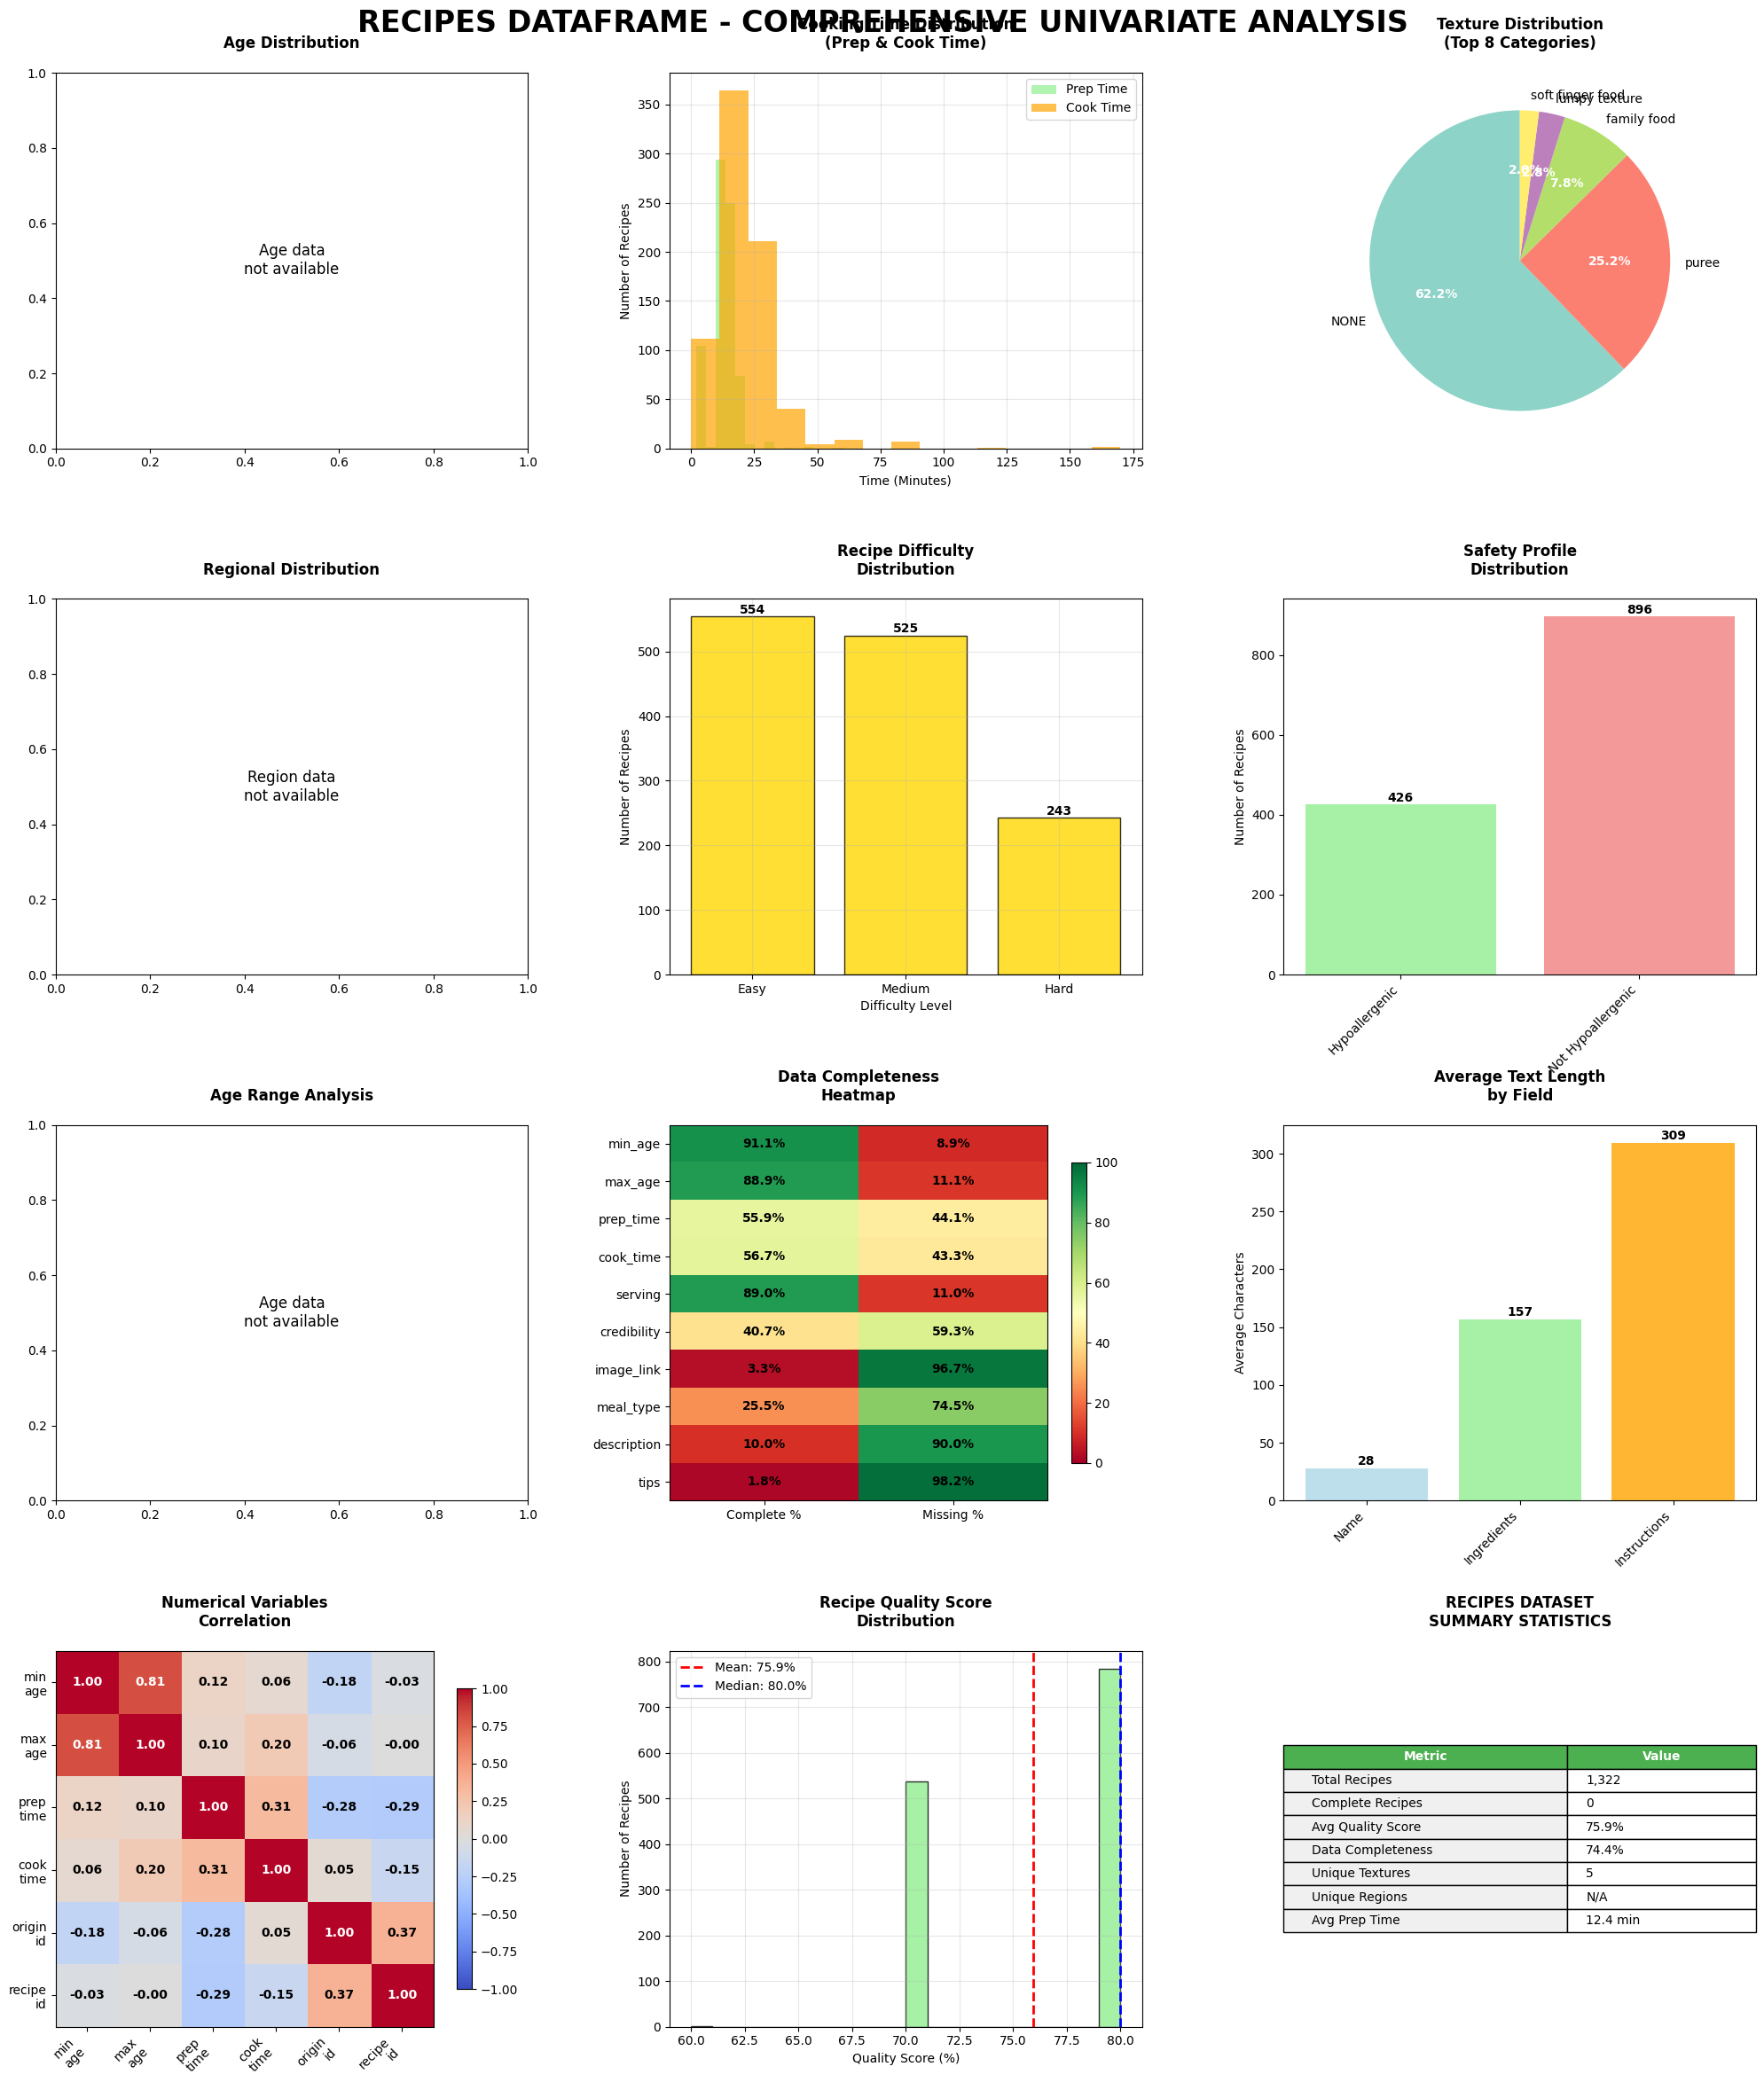

✅ Recipe visualizations completed successfully!


In [15]:
# =============================================================================
# COMPREHENSIVE VISUALIZATIONS - RECIPES DATAFRAME
# =============================================================================

print(f"\n📊 CREATING COMPREHENSIVE VISUALIZATIONS")
print(f"{'='*60}")

# Set up the plotting environment
plt.style.use('default')
fig = plt.figure(figsize=(20, 24))
fig.suptitle('RECIPES DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS', 
             fontsize=24, fontweight='bold', y=0.98)

# 1. Age Distribution Analysis
ax1 = plt.subplot(4, 3, 1)
age_cols = [col for col in ['min_age_months', 'max_age_months'] if col in recipes.columns]
if age_cols:
    for i, col in enumerate(age_cols):
        age_data = recipes[col].dropna()
        if len(age_data) > 0:
            ax1.hist(age_data, bins=20, alpha=0.7, label=col.replace('_', ' ').title(), 
                    color=['skyblue', 'lightcoral'][i])
    ax1.set_title('Age Distribution\n(Min & Max Age)', fontweight='bold', pad=20)
    ax1.set_xlabel('Age (Months)')
    ax1.set_ylabel('Number of Recipes')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
else:
    ax1.text(0.5, 0.5, 'Age data\nnot available', ha='center', va='center', 
             transform=ax1.transAxes, fontsize=12)
    ax1.set_title('Age Distribution', fontweight='bold', pad=20)

# 2. Cooking Time Analysis
ax2 = plt.subplot(4, 3, 2)
time_cols = [col for col in ['prep_time', 'cook_time'] if col in recipes.columns]
if time_cols:
    for i, col in enumerate(time_cols):
        time_data = recipes[col].dropna()
        if len(time_data) > 0:
            ax2.hist(time_data, bins=15, alpha=0.7, label=col.replace('_', ' ').title(),
                    color=['lightgreen', 'orange'][i])
    ax2.set_title('Cooking Time Distribution\n(Prep & Cook Time)', fontweight='bold', pad=20)
    ax2.set_xlabel('Time (Minutes)')
    ax2.set_ylabel('Number of Recipes')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
else:
    ax2.text(0.5, 0.5, 'Time data\nnot available', ha='center', va='center', 
             transform=ax2.transAxes, fontsize=12)
    ax2.set_title('Cooking Time Distribution', fontweight='bold', pad=20)

# 3. Texture Distribution (Pie Chart)
ax3 = plt.subplot(4, 3, 3)
if 'texture' in recipes.columns:
    texture_counts = recipes['texture'].value_counts().head(8)
    colors = plt.cm.Set3(np.linspace(0, 1, len(texture_counts)))
    wedges, texts, autotexts = ax3.pie(texture_counts.values, labels=texture_counts.index, 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    ax3.set_title('Texture Distribution\n(Top 8 Categories)', fontweight='bold', pad=20)
    
    # Make percentage text more readable
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
else:
    ax3.text(0.5, 0.5, 'Texture data\nnot available', ha='center', va='center', 
             transform=ax3.transAxes, fontsize=12)
    ax3.set_title('Texture Distribution', fontweight='bold', pad=20)

# 4. Region Distribution (Horizontal Bar)
ax4 = plt.subplot(4, 3, 4)
if 'region' in recipes.columns:
    region_counts = recipes['region'].value_counts().head(10)
    bars = ax4.barh(range(len(region_counts)), region_counts.values, 
                    color='lightblue', alpha=0.8)
    ax4.set_title('Regional Distribution\n(Top 10 Regions)', fontweight='bold', pad=20)
    ax4.set_xlabel('Number of Recipes')
    ax4.set_yticks(range(len(region_counts)))
    ax4.set_yticklabels(region_counts.index)
    ax4.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (bar, count) in enumerate(zip(bars, region_counts.values)):
        ax4.text(count + 0.5, i, f'{count}', va='center', ha='left', fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'Region data\nnot available', ha='center', va='center', 
             transform=ax4.transAxes, fontsize=12)
    ax4.set_title('Regional Distribution', fontweight='bold', pad=20)

# 5. Difficulty Distribution
ax5 = plt.subplot(4, 3, 5)
if 'difficulty' in recipes.columns:
    difficulty_counts = recipes['difficulty'].value_counts()
    bars = ax5.bar(difficulty_counts.index, difficulty_counts.values, 
                   color='gold', alpha=0.8, edgecolor='black')
    ax5.set_title('Recipe Difficulty\nDistribution', fontweight='bold', pad=20)
    ax5.set_xlabel('Difficulty Level')
    ax5.set_ylabel('Number of Recipes')
    ax5.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars, difficulty_counts.values):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{count}', ha='center', va='bottom', fontweight='bold')
else:
    ax5.text(0.5, 0.5, 'Difficulty data\nnot available', ha='center', va='center', 
             transform=ax5.transAxes, fontsize=12)
    ax5.set_title('Recipe Difficulty Distribution', fontweight='bold', pad=20)

# 6. Safety Profile Analysis
ax6 = plt.subplot(4, 3, 6)
safety_data = []
safety_labels = []

if 'allergen' in recipes.columns:
    allergen_safe = (recipes['allergen'].isnull() | (recipes['allergen'] == '')).sum()
    allergen_unsafe = len(recipes) - allergen_safe
    safety_data.extend([allergen_safe, allergen_unsafe])
    safety_labels.extend(['Allergen Safe', 'Has Allergens'])

if 'hypoallergenic' in recipes.columns:
    hypo_yes = (recipes['hypoallergenic'] == 'Yes').sum()
    hypo_no = len(recipes) - hypo_yes
    if safety_data:  # Add to existing data
        safety_data.extend([hypo_yes, hypo_no])
        safety_labels.extend(['Hypoallergenic', 'Not Hypoallergenic'])
    else:  # First safety metric
        safety_data = [hypo_yes, hypo_no]
        safety_labels = ['Hypoallergenic', 'Not Hypoallergenic']

if safety_data:
    colors = ['lightgreen', 'lightcoral'] * (len(safety_data) // 2)
    bars = ax6.bar(safety_labels, safety_data, color=colors, alpha=0.8)
    ax6.set_title('Safety Profile\nDistribution', fontweight='bold', pad=20)
    ax6.set_ylabel('Number of Recipes')
    plt.setp(ax6.get_xticklabels(), rotation=45, ha='right')
    
    # Add value labels
    for bar, count in zip(bars, safety_data):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{count}', ha='center', va='bottom', fontweight='bold')
else:
    ax6.text(0.5, 0.5, 'Safety data\nnot available', ha='center', va='center', 
             transform=ax6.transAxes, fontsize=12)
    ax6.set_title('Safety Profile Distribution', fontweight='bold', pad=20)

# 7. Age Range vs Complexity Scatter
ax7 = plt.subplot(4, 3, 7)
if 'min_age_months' in recipes.columns and 'max_age_months' in recipes.columns:
    age_range_data = recipes.dropna(subset=['min_age_months', 'max_age_months'])
    if len(age_range_data) > 0:
        age_ranges = age_range_data['max_age_months'] - age_range_data['min_age_months']
        min_ages = age_range_data['min_age_months']
        
        scatter = ax7.scatter(min_ages, age_ranges, alpha=0.6, c=min_ages, 
                             cmap='viridis', s=30)
        ax7.set_title('Age Range vs Min Age\n(Recipe Complexity)', fontweight='bold', pad=20)
        ax7.set_xlabel('Minimum Age (Months)')
        ax7.set_ylabel('Age Range (Months)')
        ax7.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax7, shrink=0.8)
    else:
        ax7.text(0.5, 0.5, 'Age range data\nnot available', ha='center', va='center', 
                 transform=ax7.transAxes, fontsize=12)
        ax7.set_title('Age Range Analysis', fontweight='bold', pad=20)
else:
    ax7.text(0.5, 0.5, 'Age data\nnot available', ha='center', va='center', 
             transform=ax7.transAxes, fontsize=12)
    ax7.set_title('Age Range Analysis', fontweight='bold', pad=20)

# 8. Missing Data Heatmap
ax8 = plt.subplot(4, 3, 8)
missing_data = recipes.isnull().sum()
cols_with_missing = missing_data[missing_data > 0]

if len(cols_with_missing) > 0:
    # Create heatmap data
    heatmap_data = []
    for col in cols_with_missing.index:
        missing_pct = (cols_with_missing[col] / len(recipes)) * 100
        complete_pct = 100 - missing_pct
        heatmap_data.append([complete_pct, missing_pct])
    
    heatmap_df = pd.DataFrame(heatmap_data, 
                              columns=['Complete', 'Missing'],
                              index=cols_with_missing.index)
    
    im = ax8.imshow(heatmap_df.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
    ax8.set_title('Data Completeness\nHeatmap', fontweight='bold', pad=20)
    ax8.set_xticks([0, 1])
    ax8.set_xticklabels(['Complete %', 'Missing %'])
    ax8.set_yticks(range(len(cols_with_missing)))
    ax8.set_yticklabels(cols_with_missing.index, rotation=0)
    
    # Add text annotations
    for i in range(len(cols_with_missing)):
        for j in range(2):
            text = ax8.text(j, i, f'{heatmap_df.iloc[i, j]:.1f}%',
                           ha="center", va="center", color="black", fontweight='bold')
    
    plt.colorbar(im, ax=ax8, shrink=0.8)
else:
    ax8.text(0.5, 0.5, 'No missing data\nto display', ha='center', va='center', 
             transform=ax8.transAxes, fontsize=12)
    ax8.set_title('Data Completeness Heatmap', fontweight='bold', pad=20)

# 9. Text Content Analysis
ax9 = plt.subplot(4, 3, 9)
text_analysis_data = []
text_labels = []

for col in ['name', 'ingredients', 'instructions']:
    if col in recipes.columns:
        text_series = recipes[col].dropna().astype(str)
        if len(text_series) > 0:
            avg_length = text_series.str.len().mean()
            text_analysis_data.append(avg_length)
            text_labels.append(col.title())

if text_analysis_data:
    bars = ax9.bar(text_labels, text_analysis_data, 
                   color=['lightblue', 'lightgreen', 'orange'], alpha=0.8)
    ax9.set_title('Average Text Length\nby Field', fontweight='bold', pad=20)
    ax9.set_ylabel('Average Characters')
    plt.setp(ax9.get_xticklabels(), rotation=45, ha='right')
    
    # Add value labels
    for bar, length in zip(bars, text_analysis_data):
        height = bar.get_height()
        ax9.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{length:.0f}', ha='center', va='bottom', fontweight='bold')
else:
    ax9.text(0.5, 0.5, 'Text data\nnot available', ha='center', va='center', 
             transform=ax9.transAxes, fontsize=12)
    ax9.set_title('Text Content Analysis', fontweight='bold', pad=20)

# 10. Correlation Heatmap for Numerical Variables
ax10 = plt.subplot(4, 3, 10)
numerical_for_corr = [col for col in numerical_cols if col in recipes.columns]
if len(numerical_for_corr) >= 2:
    corr_data = recipes[numerical_for_corr].corr()
    
    im = ax10.imshow(corr_data.values, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    ax10.set_title('Numerical Variables\nCorrelation', fontweight='bold', pad=20)
    ax10.set_xticks(range(len(numerical_for_corr)))
    ax10.set_yticks(range(len(numerical_for_corr)))
    ax10.set_xticklabels([col.replace('_', '\n') for col in numerical_for_corr], rotation=45, ha='right')
    ax10.set_yticklabels([col.replace('_', '\n') for col in numerical_for_corr])
    
    # Add correlation values
    for i in range(len(numerical_for_corr)):
        for j in range(len(numerical_for_corr)):
            text = ax10.text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                           ha="center", va="center", 
                           color="white" if abs(corr_data.iloc[i, j]) > 0.5 else "black",
                           fontweight='bold')
    
    plt.colorbar(im, ax=ax10, shrink=0.8)
else:
    ax10.text(0.5, 0.5, 'Insufficient\nnumerical data\nfor correlation', 
              ha='center', va='center', transform=ax10.transAxes, fontsize=12)
    ax10.set_title('Correlation Analysis', fontweight='bold', pad=20)

# 11. Recipe Quality Score Distribution
ax11 = plt.subplot(4, 3, 11)
# Create a simple quality score based on completeness
quality_scores = []
for idx, row in recipes.iterrows():
    score = 0
    total_fields = 0
    
    # Age appropriateness (20 points)
    if pd.notna(row.get('min_age_months')) and pd.notna(row.get('max_age_months')):
        score += 20
    total_fields += 20
    
    # Texture clarity (15 points)
    if pd.notna(row.get('texture')) and str(row.get('texture')).lower() != 'unknown':
        score += 15
    total_fields += 15
    
    # Instructions completeness (20 points)
    if pd.notna(row.get('instructions')) and len(str(row.get('instructions'))) > 10:
        score += 20
    total_fields += 20
    
    # Ingredients list (20 points)
    if pd.notna(row.get('ingredients')) and len(str(row.get('ingredients'))) > 10:
        score += 20
    total_fields += 20
    
    # Safety information (15 points)
    if pd.notna(row.get('allergen')) or pd.notna(row.get('hypoallergenic')):
        score += 15
    total_fields += 15
    
    # Time information (10 points)
    if pd.notna(row.get('prep_time')) or pd.notna(row.get('cook_time')):
        score += 10
    total_fields += 10
    
    # Calculate percentage score
    quality_percentage = (score / total_fields) * 100 if total_fields > 0 else 0
    quality_scores.append(quality_percentage)

recipes['quality_score'] = quality_scores

if quality_scores:
    ax11.hist(quality_scores, bins=20, color='lightgreen', alpha=0.8, edgecolor='black')
    ax11.set_title('Recipe Quality Score\nDistribution', fontweight='bold', pad=20)
    ax11.set_xlabel('Quality Score (%)')
    ax11.set_ylabel('Number of Recipes')
    ax11.grid(True, alpha=0.3)
    
    # Add statistics
    mean_quality = np.mean(quality_scores)
    median_quality = np.median(quality_scores)
    ax11.axvline(mean_quality, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_quality:.1f}%')
    ax11.axvline(median_quality, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_quality:.1f}%')
    ax11.legend()
else:
    ax11.text(0.5, 0.5, 'Quality score\ncalculation failed', ha='center', va='center', 
              transform=ax11.transAxes, fontsize=12)
    ax11.set_title('Recipe Quality Score Distribution', fontweight='bold', pad=20)

# 12. Summary Statistics Table
ax12 = plt.subplot(4, 3, 12)
ax12.axis('off')

# Create comprehensive summary statistics
summary_stats = []
summary_stats.append(['Total Recipes', f"{len(recipes):,}"])
summary_stats.append(['Complete Recipes', f"{(np.array(quality_scores) == 100).sum():,}"])
summary_stats.append(['Avg Quality Score', f"{np.mean(quality_scores):.1f}%" if quality_scores else 'N/A'])
summary_stats.append(['Data Completeness', f"{((1 - recipes.isnull().sum().sum() / (len(recipes) * len(recipes.columns))) * 100):.1f}%"])
summary_stats.append(['Unique Textures', f"{recipes['texture'].nunique() if 'texture' in recipes.columns else 'N/A'}"])
summary_stats.append(['Unique Regions', f"{recipes['region'].nunique() if 'region' in recipes.columns else 'N/A'}"])

if 'min_age_months' in recipes.columns:
    avg_min_age = recipes['min_age_months'].mean()
    summary_stats.append(['Avg Min Age', f"{avg_min_age:.1f} months" if pd.notna(avg_min_age) else 'N/A'])

if 'prep_time' in recipes.columns:
    avg_prep_time = recipes['prep_time'].mean()
    summary_stats.append(['Avg Prep Time', f"{avg_prep_time:.1f} min" if pd.notna(avg_prep_time) else 'N/A'])

# Create table
table = ax12.table(cellText=summary_stats,
                   colLabels=['Metric', 'Value'],
                   cellLoc='left',
                   loc='center',
                   colWidths=[0.6, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Style the table
for i in range(len(summary_stats)):
    table[(i+1, 0)].set_facecolor('#f0f0f0')
    table[(i+1, 1)].set_facecolor('#ffffff')

table[(0, 0)].set_facecolor('#4CAF50')
table[(0, 1)].set_facecolor('#4CAF50')
table[(0, 0)].set_text_props(weight='bold', color='white')
table[(0, 1)].set_text_props(weight='bold', color='white')

ax12.set_title('RECIPES DATASET\nSUMMARY STATISTICS', fontweight='bold', pad=20)

plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)
plt.show()

print("✅ Recipe visualizations completed successfully!")

In [16]:
# =============================================================================
# SUMMARY AND INSIGHTS - RECIPES DATAFRAME ANALYSIS
# =============================================================================

print(f"\n📋 COMPREHENSIVE ANALYSIS SUMMARY - RECIPES DATAFRAME")
print(f"{'='*70}")

# Generate comprehensive insights
insights = []
recommendations = []

# Dataset Overview Insights
total_recipes = len(recipes)
total_missing = recipes.isnull().sum().sum()
completeness_rate = ((total_recipes * len(recipes.columns) - total_missing) / (total_recipes * len(recipes.columns))) * 100

insights.append(f"📊 DATASET OVERVIEW:")
insights.append(f"   • Total recipes: {total_recipes:,}")
insights.append(f"   • Data completeness: {completeness_rate:.1f}%")
insights.append(f"   • Duplicate entries: {recipes.duplicated().sum():,}")

# Age Appropriateness Analysis
age_cols = [col for col in ['min_age_months', 'max_age_months'] if col in recipes.columns]
if age_cols:
    insights.append(f"\n👶 AGE APPROPRIATENESS:")
    
    for col in age_cols:
        if col in recipes.columns:
            age_data = recipes[col].dropna()
            if len(age_data) > 0:
                insights.append(f"   • {col.replace('_', ' ').title()}: {age_data.min():.0f}-{age_data.max():.0f} months (avg: {age_data.mean():.1f})")
    
    # Age range analysis
    if len(age_cols) == 2:
        valid_age_recipes = recipes.dropna(subset=age_cols)
        if len(valid_age_recipes) > 0:
            age_ranges = valid_age_recipes['max_age_months'] - valid_age_recipes['min_age_months']
            insights.append(f"   • Average age range: {age_ranges.mean():.1f} months")
            insights.append(f"   • Recipes with age info: {len(valid_age_recipes):,} ({(len(valid_age_recipes)/total_recipes*100):.1f}%)")
            
            # Developmental stage distribution
            early_stage = (valid_age_recipes['min_age_months'] <= 6).sum()
            intermediate_stage = ((valid_age_recipes['min_age_months'] > 6) & (valid_age_recipes['min_age_months'] <= 12)).sum()
            advanced_stage = (valid_age_recipes['min_age_months'] > 12).sum()
            
            insights.append(f"   • Early stage (≤6m): {early_stage} recipes ({(early_stage/len(valid_age_recipes)*100):.1f}%)")
            insights.append(f"   • Intermediate (6-12m): {intermediate_stage} recipes ({(intermediate_stage/len(valid_age_recipes)*100):.1f}%)")
            insights.append(f"   • Advanced (>12m): {advanced_stage} recipes ({(advanced_stage/len(valid_age_recipes)*100):.1f}%)")

# Texture Diversity Analysis
if 'texture' in recipes.columns:
    texture_data = recipes['texture'].dropna()
    texture_counts = recipes['texture'].value_counts()
    
    insights.append(f"\n🍼 TEXTURE ANALYSIS:")
    insights.append(f"   • Total texture categories: {recipes['texture'].nunique()}")
    insights.append(f"   • Recipes with texture info: {len(texture_data):,} ({(len(texture_data)/total_recipes*100):.1f}%)")
    insights.append(f"   • Most common texture: {texture_counts.index[0]} ({texture_counts.iloc[0]} recipes)")
    
    # Developmental appropriateness
    puree_like = texture_counts.get('puree', 0) + texture_counts.get('smooth', 0)
    soft_textures = sum(texture_counts.get(texture, 0) for texture in ['mashed', 'soft', 'lumpy'])
    finger_foods = sum(texture_counts.get(texture, 0) for texture in ['chunks', 'finger food', 'solid'])
    
    insights.append(f"   • Early textures (puree/smooth): {puree_like} recipes")
    insights.append(f"   • Intermediate textures (soft/mashed): {soft_textures} recipes")
    insights.append(f"   • Advanced textures (chunks/solid): {finger_foods} recipes")

# Cooking Complexity Analysis
time_cols = [col for col in ['prep_time', 'cook_time'] if col in recipes.columns]
if time_cols:
    insights.append(f"\n🍳 COOKING COMPLEXITY:")
    
    for col in time_cols:
        if col in recipes.columns:
            time_data = recipes[col].dropna()
            if len(time_data) > 0:
                insights.append(f"   • {col.replace('_', ' ').title()}: avg {time_data.mean():.1f} min (range: {time_data.min():.0f}-{time_data.max():.0f})")
                
                # Complexity categories
                quick = (time_data <= 15).sum()
                moderate = ((time_data > 15) & (time_data <= 30)).sum()
                complex = (time_data > 30).sum()
                
                insights.append(f"     - Quick (≤15 min): {quick} recipes ({(quick/len(time_data)*100):.1f}%)")
                insights.append(f"     - Moderate (15-30 min): {moderate} recipes ({(moderate/len(time_data)*100):.1f}%)")
                insights.append(f"     - Complex (>30 min): {complex} recipes ({(complex/len(time_data)*100):.1f}%)")

# Regional Diversity
if 'region' in recipes.columns:
    region_data = recipes['region'].dropna()
    region_counts = recipes['region'].value_counts()
    
    insights.append(f"\n🌍 REGIONAL DIVERSITY:")
    insights.append(f"   • Total regions: {recipes['region'].nunique()}")
    insights.append(f"   • Recipes with region info: {len(region_data):,} ({(len(region_data)/total_recipes*100):.1f}%)")
    insights.append(f"   • Most represented region: {region_counts.index[0]} ({region_counts.iloc[0]} recipes)")
    insights.append(f"   • Least represented region: {region_counts.index[-1]} ({region_counts.iloc[-1]} recipes)")
    
    # Regional balance
    top_3_regions = region_counts.head(3).sum()
    insights.append(f"   • Top 3 regions represent: {(top_3_regions/len(region_data)*100):.1f}% of recipes")

# Safety Profile Analysis
safety_cols = [col for col in ['allergen', 'hypoallergenic', 'choking_hazards'] if col in recipes.columns]
if safety_cols:
    insights.append(f"\n🛡️ SAFETY PROFILE:")
    
    for col in safety_cols:
        if col in recipes.columns:
            if col == 'allergen':
                safe_count = (recipes[col].isnull() | (recipes[col] == '')).sum()
                unsafe_count = total_recipes - safe_count
                insights.append(f"   • Allergen-free recipes: {safe_count:,} ({(safe_count/total_recipes*100):.1f}%)")
                insights.append(f"   • Recipes with allergens: {unsafe_count:,} ({(unsafe_count/total_recipes*100):.1f}%)")
            
            elif col == 'hypoallergenic':
                hypo_yes = (recipes[col] == 'Yes').sum()
                hypo_no = total_recipes - hypo_yes
                insights.append(f"   • Hypoallergenic recipes: {hypo_yes:,} ({(hypo_yes/total_recipes*100):.1f}%)")

# Quality Assessment
if 'quality_score' in recipes.columns:
    quality_scores = recipes['quality_score'].dropna()
    if len(quality_scores) > 0:
        insights.append(f"\n⭐ RECIPE QUALITY:")
        insights.append(f"   • Average quality score: {quality_scores.mean():.1f}%")
        insights.append(f"   • Median quality score: {quality_scores.median():.1f}%")
        
        high_quality = (quality_scores >= 80).sum()
        medium_quality = ((quality_scores >= 60) & (quality_scores < 80)).sum()
        low_quality = (quality_scores < 60).sum()
        
        insights.append(f"   • High quality (≥80%): {high_quality:,} recipes ({(high_quality/len(quality_scores)*100):.1f}%)")
        insights.append(f"   • Medium quality (60-80%): {medium_quality:,} recipes ({(medium_quality/len(quality_scores)*100):.1f}%)")
        insights.append(f"   • Low quality (<60%): {low_quality:,} recipes ({(low_quality/len(quality_scores)*100):.1f}%)")

# Generate Recommendations
print(f"\n💡 DATA QUALITY ASSESSMENT")
print(f"{'='*50}")

quality_score = 0
max_score = 5

# Completeness check
if completeness_rate >= 80:
    quality_score += 1
    print("✅ Data Completeness: Good (≥80%)")
else:
    print("❌ Data Completeness: Needs Improvement (<80%)")

# Age information check
age_coverage = 0
if age_cols:
    age_coverage = (recipes[age_cols].notnull().all(axis=1).sum() / total_recipes) * 100
    if age_coverage >= 70:
        quality_score += 1
        print("✅ Age Information: Good coverage (≥70%)")
    else:
        print("❌ Age Information: Insufficient coverage (<70%)")

# Texture information check
if 'texture' in recipes.columns:
    texture_coverage = (recipes['texture'].notnull().sum() / total_recipes) * 100
    if texture_coverage >= 70:
        quality_score += 1
        print("✅ Texture Information: Good coverage (≥70%)")
    else:
        print("❌ Texture Information: Insufficient coverage (<70%)")

# Safety information check
safety_coverage = 0
if safety_cols:
    safety_coverage = (recipes[safety_cols].notnull().any(axis=1).sum() / total_recipes) * 100
    if safety_coverage >= 60:
        quality_score += 1
        print("✅ Safety Information: Adequate coverage (≥60%)")
    else:
        print("❌ Safety Information: Insufficient coverage (<60%)")

# Regional diversity check
if 'region' in recipes.columns:
    region_diversity = recipes['region'].nunique()
    if region_diversity >= 5:
        quality_score += 1
        print("✅ Regional Diversity: Good (≥5 regions)")
    else:
        print("❌ Regional Diversity: Limited (<5 regions)")

# Final quality assessment
quality_percentage = (quality_score / max_score) * 100
if quality_percentage >= 80:
    quality_level = "HIGH QUALITY"
    quality_color = "🟢"
elif quality_percentage >= 60:
    quality_level = "MODERATE QUALITY"
    quality_color = "🟡"
else:
    quality_level = "NEEDS IMPROVEMENT"
    quality_color = "🔴"

print(f"\n{quality_color} OVERALL DATASET QUALITY: {quality_level} ({quality_percentage:.0f}%)")

# Generate specific recommendations
print(f"\n💡 RECOMMENDATIONS:")
print("-" * 30)

if completeness_rate < 80:
    recommendations.append("• Improve data collection to increase overall completeness")

if age_coverage < 70:
    recommendations.append("• Add age appropriateness information for more recipes")

if 'texture' in recipes.columns and (recipes['texture'].notnull().sum() / total_recipes) * 100 < 70:
    recommendations.append("• Classify texture information for better developmental guidance")

if safety_coverage < 60:
    recommendations.append("• Enhance safety information (allergens, choking hazards)")

if 'region' in recipes.columns and recipes['region'].nunique() < 5:
    recommendations.append("• Expand regional diversity for more inclusive recommendations")

# Recipe quality recommendations
if 'quality_score' in recipes.columns:
    low_quality_count = (recipes['quality_score'] < 60).sum()
    if low_quality_count > total_recipes * 0.3:
        recommendations.append("• Focus on improving recipe quality scores through better documentation")

# Developmental balance recommendations
if age_cols and len(age_cols) == 2:
    valid_age_recipes = recipes.dropna(subset=age_cols)
    if len(valid_age_recipes) > 0:
        early_stage_pct = (valid_age_recipes['min_age_months'] <= 6).sum() / len(valid_age_recipes) * 100
        if early_stage_pct < 30:
            recommendations.append("• Increase early-stage recipes (6 months and under)")
        elif early_stage_pct > 60:
            recommendations.append("• Add more advanced recipes for older babies")

if len(recommendations) == 0:
    recommendations.append("• Dataset is in excellent condition!")
    recommendations.append("• Consider expanding recipe collection for broader coverage")
    recommendations.append("• Maintain high data quality standards for new entries")

for rec in recommendations:
    print(rec)

# Display all insights
print(f"\n📊 DETAILED INSIGHTS:")
print("=" * 50)
for insight in insights:
    print(insight)

print(f"\n{'='*70}")
print("✅ RECIPES DATAFRAME UNIVARIATE ANALYSIS COMPLETED")
print(f"{'='*70}")


📋 COMPREHENSIVE ANALYSIS SUMMARY - RECIPES DATAFRAME

💡 DATA QUALITY ASSESSMENT
❌ Data Completeness: Needs Improvement (<80%)
✅ Texture Information: Good coverage (≥70%)
✅ Safety Information: Adequate coverage (≥60%)

🔴 OVERALL DATASET QUALITY: NEEDS IMPROVEMENT (40%)

💡 RECOMMENDATIONS:
------------------------------
• Improve data collection to increase overall completeness
• Add age appropriateness information for more recipes

📊 DETAILED INSIGHTS:
📊 DATASET OVERVIEW:
   • Total recipes: 1,322
   • Data completeness: 74.4%
   • Duplicate entries: 0

🍼 TEXTURE ANALYSIS:
   • Total texture categories: 5
   • Recipes with texture info: 1,322 (100.0%)
   • Most common texture: NONE (822 recipes)
   • Early textures (puree/smooth): 333 recipes
   • Intermediate textures (soft/mashed): 0 recipes
   • Advanced textures (chunks/solid): 0 recipes

🍳 COOKING COMPLEXITY:
   • Prep Time: avg 12.4 min (range: 2-60)
     - Quick (≤15 min): 650 recipes (88.0%)
     - Moderate (15-30 min): 85 reci

### 2.8 Final Ingredient DataFrame

**Purpose:** Comprehensive univariate analysis of the final ingredient master dataset to understand ingredient diversity, nutritional profiles, allergen patterns, and usage frequency that will inform ingredient-based recommendations and safety assessments.

In [6]:
# =============================================================================
# 2.8 FINAL INGREDIENT DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS
# =============================================================================

print("=" * 80)
print("2.8 FINAL INGREDIENT DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS")
print("=" * 80)

# Load final ingredient dataframe
final_ingredient_df = dataframes['final_ingredient_df']

print(f"\n🔍 DATASET OVERVIEW")
print(f"{'='*50}")
print(f"📊 Dataset Shape: {final_ingredient_df.shape}")
print(f"📋 Columns: {list(final_ingredient_df.columns)}")
print(f"💾 Memory Usage: {final_ingredient_df.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")
print(f"🔢 Data Types:")
for col, dtype in final_ingredient_df.dtypes.items():
    print(f"   {col}: {dtype}")

# Data Quality Assessment
print(f"\n📊 DATA QUALITY ASSESSMENT")
print(f"{'='*50}")
missing_data = final_ingredient_df.isnull().sum()
print("Missing Values:")
for col, missing in missing_data.items():
    percentage = (missing / len(final_ingredient_df)) * 100
    if missing > 0:
        print(f"   {col}: {missing:,} ({percentage:.2f}%)")
    else:
        print(f"   {col}: {missing:,} ({percentage:.2f}%)")

duplicates = final_ingredient_df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates:,}")
print(f"Total Null Values: {missing_data.sum():,}")
print(f"Data Completeness: {((1 - missing_data.sum() / (len(final_ingredient_df) * len(final_ingredient_df.columns))) * 100):.1f}%")

# Sample Data Display
print(f"\n📋 SAMPLE DATA")
print(f"{'='*50}")
print("First 5 rows:")
display(final_ingredient_df.head(5))

print(f"\n📋 COLUMN CLASSIFICATION & ANALYSIS")
print(f"{'='*50}")

# Analyze column structure
print(f"🔍 INGREDIENT IDENTIFICATION:")
ingredient_id_cols = [col for col in final_ingredient_df.columns if 'id' in col.lower()]
ingredient_name_cols = [col for col in final_ingredient_df.columns if 'name' in col.lower() or 'ingredient' in col.lower()]
print(f"   ID columns: {ingredient_id_cols}")
print(f"   Name columns: {ingredient_name_cols}")

# Nutritional columns analysis
nutrition_cols = [col for col in final_ingredient_df.columns if any(nutrient in col.lower() 
                   for nutrient in ['protein', 'carb', 'fat', 'energy', 'calor', 'vitamin', 'mineral'])]
print(f"   Nutritional columns: {nutrition_cols}")

# Allergen and safety columns
safety_cols = [col for col in final_ingredient_df.columns if any(safety in col.lower() 
                for safety in ['allergen', 'allergy', 'safe', 'hypo'])]
print(f"   Safety/Allergen columns: {safety_cols}")

# Usage and frequency columns
usage_cols = [col for col in final_ingredient_df.columns if any(usage in col.lower() 
               for usage in ['count', 'frequency', 'usage', 'popularity'])]
print(f"   Usage/Frequency columns: {usage_cols}")

# Other categorical columns
categorical_cols = final_ingredient_df.select_dtypes(include=['object', 'category']).columns.tolist()
# Remove already classified columns
remaining_categorical = [col for col in categorical_cols 
                        if col not in ingredient_name_cols + safety_cols and 'id' not in col.lower()]
print(f"   Other categorical columns: {remaining_categorical}")

# Numerical columns
numerical_cols = final_ingredient_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"   Numerical columns: {numerical_cols}")

print("✅ Initial overview completed!")

2.8 FINAL INGREDIENT DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS

🔍 DATASET OVERVIEW
📊 Dataset Shape: (999, 4)
📋 Columns: ['pk', 'name', 'allergen_group_id', 'isAllergen']
💾 Memory Usage: 0.08 MB
🔢 Data Types:
   pk: int64
   name: object
   allergen_group_id: float64
   isAllergen: bool

📊 DATA QUALITY ASSESSMENT
Missing Values:
   pk: 0 (0.00%)
   name: 0 (0.00%)
   allergen_group_id: 761 (76.18%)
   isAllergen: 0 (0.00%)

Duplicate Rows: 0
Total Null Values: 761
Data Completeness: 81.0%

📋 SAMPLE DATA
First 5 rows:


,pk,name,allergen_group_id,isAllergen
0,1,acai,NaN,False
1,2,agar-agar powder,NaN,False
2,3,all purpose flour,8.0,True
3,4,almond,NaN,False
4,5,almond butter,4.0,True



📋 COLUMN CLASSIFICATION & ANALYSIS
🔍 INGREDIENT IDENTIFICATION:
   ID columns: ['allergen_group_id']
   Name columns: ['name']
   Nutritional columns: []
   Safety/Allergen columns: ['allergen_group_id', 'isAllergen']
   Usage/Frequency columns: []
   Other categorical columns: []
   Numerical columns: ['pk', 'allergen_group_id']
✅ Initial overview completed!


In [7]:
# =============================================================================
# DETAILED INGREDIENT ANALYSIS
# =============================================================================

print(f"\n📊 DETAILED INGREDIENT ANALYSIS")
print(f"{'='*60}")

# Ingredient Name Analysis
print(f"\n🏷️ INGREDIENT NAME ANALYSIS")
print(f"{'='*40}")

primary_name_col = None
if ingredient_name_cols:
    primary_name_col = ingredient_name_cols[0]  # Use first name column found
    
    ingredient_names = final_ingredient_df[primary_name_col].dropna()
    print(f"📊 Basic Statistics:")
    print(f"   Total ingredients: {len(final_ingredient_df):,}")
    print(f"   Valid names: {len(ingredient_names):,}")
    print(f"   Missing names: {final_ingredient_df[primary_name_col].isnull().sum():,}")
    print(f"   Unique ingredients: {ingredient_names.nunique():,}")
    
    # Name length analysis
    name_lengths = ingredient_names.astype(str).str.len()
    print(f"\n📏 Name Length Analysis:")
    print(f"   Average length: {name_lengths.mean():.1f} characters")
    print(f"   Median length: {name_lengths.median():.1f} characters")
    print(f"   Range: {name_lengths.min()}-{name_lengths.max()} characters")
    
    # Common ingredients
    print(f"\n🔝 Most Common Ingredients:")
    if len(ingredient_names) > 0:
        top_ingredients = ingredient_names.value_counts().head(10)
        for i, (ingredient, count) in enumerate(top_ingredients.items(), 1):
            print(f"   {i}. {ingredient}: {count} occurrences")
    
    # Ingredient categories by name patterns
    print(f"\n🏷️ Ingredient Categories (by name patterns):")
    categories = {
        'Vegetables': ['potato', 'carrot', 'spinach', 'broccoli', 'pea', 'tomato', 'onion', 'garlic'],
        'Fruits': ['apple', 'banana', 'orange', 'berry', 'mango', 'pear', 'peach', 'grape'],
        'Proteins': ['chicken', 'beef', 'fish', 'egg', 'meat', 'salmon', 'turkey'],
        'Grains': ['rice', 'oat', 'wheat', 'barley', 'quinoa', 'bread', 'pasta'],
        'Dairy': ['milk', 'cheese', 'butter', 'cream', 'yogurt'],
        'Herbs/Spices': ['salt', 'pepper', 'herb', 'spice', 'basil', 'oregano', 'thyme'],
        'Oils/Fats': ['oil', 'butter', 'fat', 'olive']
    }
    
    category_counts = {}
    for category, keywords in categories.items():
        count = 0
        for keyword in keywords:
            count += ingredient_names.astype(str).str.lower().str.contains(keyword, na=False).sum()
        category_counts[category] = count
        
    for category, count in category_counts.items():
        percentage = (count / len(ingredient_names)) * 100 if len(ingredient_names) > 0 else 0
        print(f"   {category}: {count} ingredients ({percentage:.1f}%)")

# Nutritional Profile Analysis
if nutrition_cols:
    print(f"\n🍎 NUTRITIONAL PROFILE ANALYSIS")
    print(f"{'='*50}")
    
    for col in nutrition_cols:
        if col in final_ingredient_df.columns:
            nutrition_data = final_ingredient_df[col].dropna()
            if len(nutrition_data) > 0:
                print(f"\n📊 {col.upper()}:")
                print(f"   Valid entries: {len(nutrition_data):,}")
                print(f"   Missing: {final_ingredient_df[col].isnull().sum():,}")
                print(f"   Mean: {nutrition_data.mean():.2f}")
                print(f"   Median: {nutrition_data.median():.2f}")
                print(f"   Range: {nutrition_data.min():.2f} - {nutrition_data.max():.2f}")
                print(f"   Std Dev: {nutrition_data.std():.2f}")
                
                # Nutritional adequacy categories
                if 'protein' in col.lower():
                    high_protein = (nutrition_data > nutrition_data.quantile(0.75)).sum()
                    print(f"   High protein ingredients (>75th percentile): {high_protein}")
                elif 'energy' in col.lower() or 'calor' in col.lower():
                    high_energy = (nutrition_data > nutrition_data.quantile(0.75)).sum()
                    print(f"   High energy ingredients (>75th percentile): {high_energy}")

# Usage and Frequency Analysis
if usage_cols:
    print(f"\n📈 USAGE AND FREQUENCY ANALYSIS")
    print(f"{'='*50}")
    
    for col in usage_cols:
        if col in final_ingredient_df.columns:
            usage_data = final_ingredient_df[col].dropna()
            if len(usage_data) > 0:
                print(f"\n📊 {col.upper()}:")
                print(f"   Valid entries: {len(usage_data):,}")
                print(f"   Missing: {final_ingredient_df[col].isnull().sum():,}")
                print(f"   Mean: {usage_data.mean():.2f}")
                print(f"   Median: {usage_data.median():.2f}")
                print(f"   Range: {usage_data.min():.0f} - {usage_data.max():.0f}")
                
                # Usage categories
                if len(usage_data) > 0:
                    usage_quartiles = usage_data.quantile([0.25, 0.5, 0.75])
                    rare_ingredients = (usage_data <= usage_quartiles[0.25]).sum()
                    common_ingredients = ((usage_data > usage_quartiles[0.25]) & 
                                        (usage_data <= usage_quartiles[0.75])).sum()
                    popular_ingredients = (usage_data > usage_quartiles[0.75]).sum()
                    
                    print(f"   Rare ingredients (≤25th percentile): {rare_ingredients}")
                    print(f"   Common ingredients (25th-75th percentile): {common_ingredients}")
                    print(f"   Popular ingredients (>75th percentile): {popular_ingredients}")

# Safety and Allergen Analysis
if safety_cols:
    print(f"\n🛡️ SAFETY AND ALLERGEN ANALYSIS")
    print(f"{'='*50}")
    
    for col in safety_cols:
        if col in final_ingredient_df.columns:
            safety_data = final_ingredient_df[col].dropna()
            print(f"\n🔒 {col.upper()}:")
            print(f"   Total entries: {len(final_ingredient_df):,}")
            print(f"   Valid entries: {len(safety_data):,}")
            print(f"   Missing: {final_ingredient_df[col].isnull().sum():,}")
            
            if len(safety_data) > 0:
                # For categorical safety data
                if final_ingredient_df[col].dtype == 'object':
                    safety_counts = final_ingredient_df[col].value_counts()
                    for value, count in safety_counts.items():
                        percentage = (count / len(safety_data)) * 100
                        print(f"   {value}: {count} ({percentage:.1f}%)")
                
                # For boolean safety data
                elif final_ingredient_df[col].dtype == 'bool':
                    safe_count = final_ingredient_df[col].sum()
                    unsafe_count = len(safety_data) - safe_count
                    print(f"   Safe: {safe_count} ({(safe_count/len(safety_data)*100):.1f}%)")
                    print(f"   Unsafe: {unsafe_count} ({(unsafe_count/len(safety_data)*100):.1f}%)")

# Numerical Columns Analysis
if numerical_cols:
    print(f"\n🔢 NUMERICAL COLUMNS ANALYSIS")
    print(f"{'='*50}")
    
    # Get non-nutrition numerical columns
    other_numerical = [col for col in numerical_cols if col not in nutrition_cols + usage_cols]
    
    if other_numerical:
        for col in other_numerical:
            if col in final_ingredient_df.columns:
                num_data = final_ingredient_df[col].dropna()
                if len(num_data) > 0:
                    print(f"\n📊 {col.upper()}:")
                    print(f"   Count: {len(num_data):,}")
                    print(f"   Mean: {num_data.mean():.2f}")
                    print(f"   Median: {num_data.median():.2f}")
                    print(f"   Std Dev: {num_data.std():.2f}")
                    print(f"   Min: {num_data.min():.2f}")
                    print(f"   Max: {num_data.max():.2f}")
                    print(f"   Skewness: {num_data.skew():.2f}")
                    print(f"   Kurtosis: {num_data.kurtosis():.2f}")

print("\n✅ Detailed ingredient analysis completed!")


📊 DETAILED INGREDIENT ANALYSIS

🏷️ INGREDIENT NAME ANALYSIS
📊 Basic Statistics:
   Total ingredients: 999
   Valid names: 999
   Missing names: 0
   Unique ingredients: 999

📏 Name Length Analysis:
   Average length: 11.0 characters
   Median length: 11.0 characters
   Range: 3-32 characters

🔝 Most Common Ingredients:
   1. acai: 1 occurrences
   2. porridge: 1 occurrences
   3. pitta bread: 1 occurrences
   4. pizza paste: 1 occurrences
   5. plain milk: 1 occurrences
   6. plantain: 1 occurrences
   7. plum: 1 occurrences
   8. polenta: 1 occurrences
   9. pomfret fillet: 1 occurrences
   10. poppy seed: 1 occurrences

🏷️ Ingredient Categories (by name patterns):
   Vegetables: 81 ingredients (8.1%)
   Fruits: 55 ingredients (5.5%)
   Proteins: 110 ingredients (11.0%)
   Grains: 73 ingredients (7.3%)
   Dairy: 73 ingredients (7.3%)
   Herbs/Spices: 31 ingredients (3.1%)
   Oils/Fats: 50 ingredients (5.0%)

🛡️ SAFETY AND ALLERGEN ANALYSIS

🔒 ALLERGEN_GROUP_ID:
   Total entries: 999



📊 CREATING COMPREHENSIVE VISUALIZATIONS


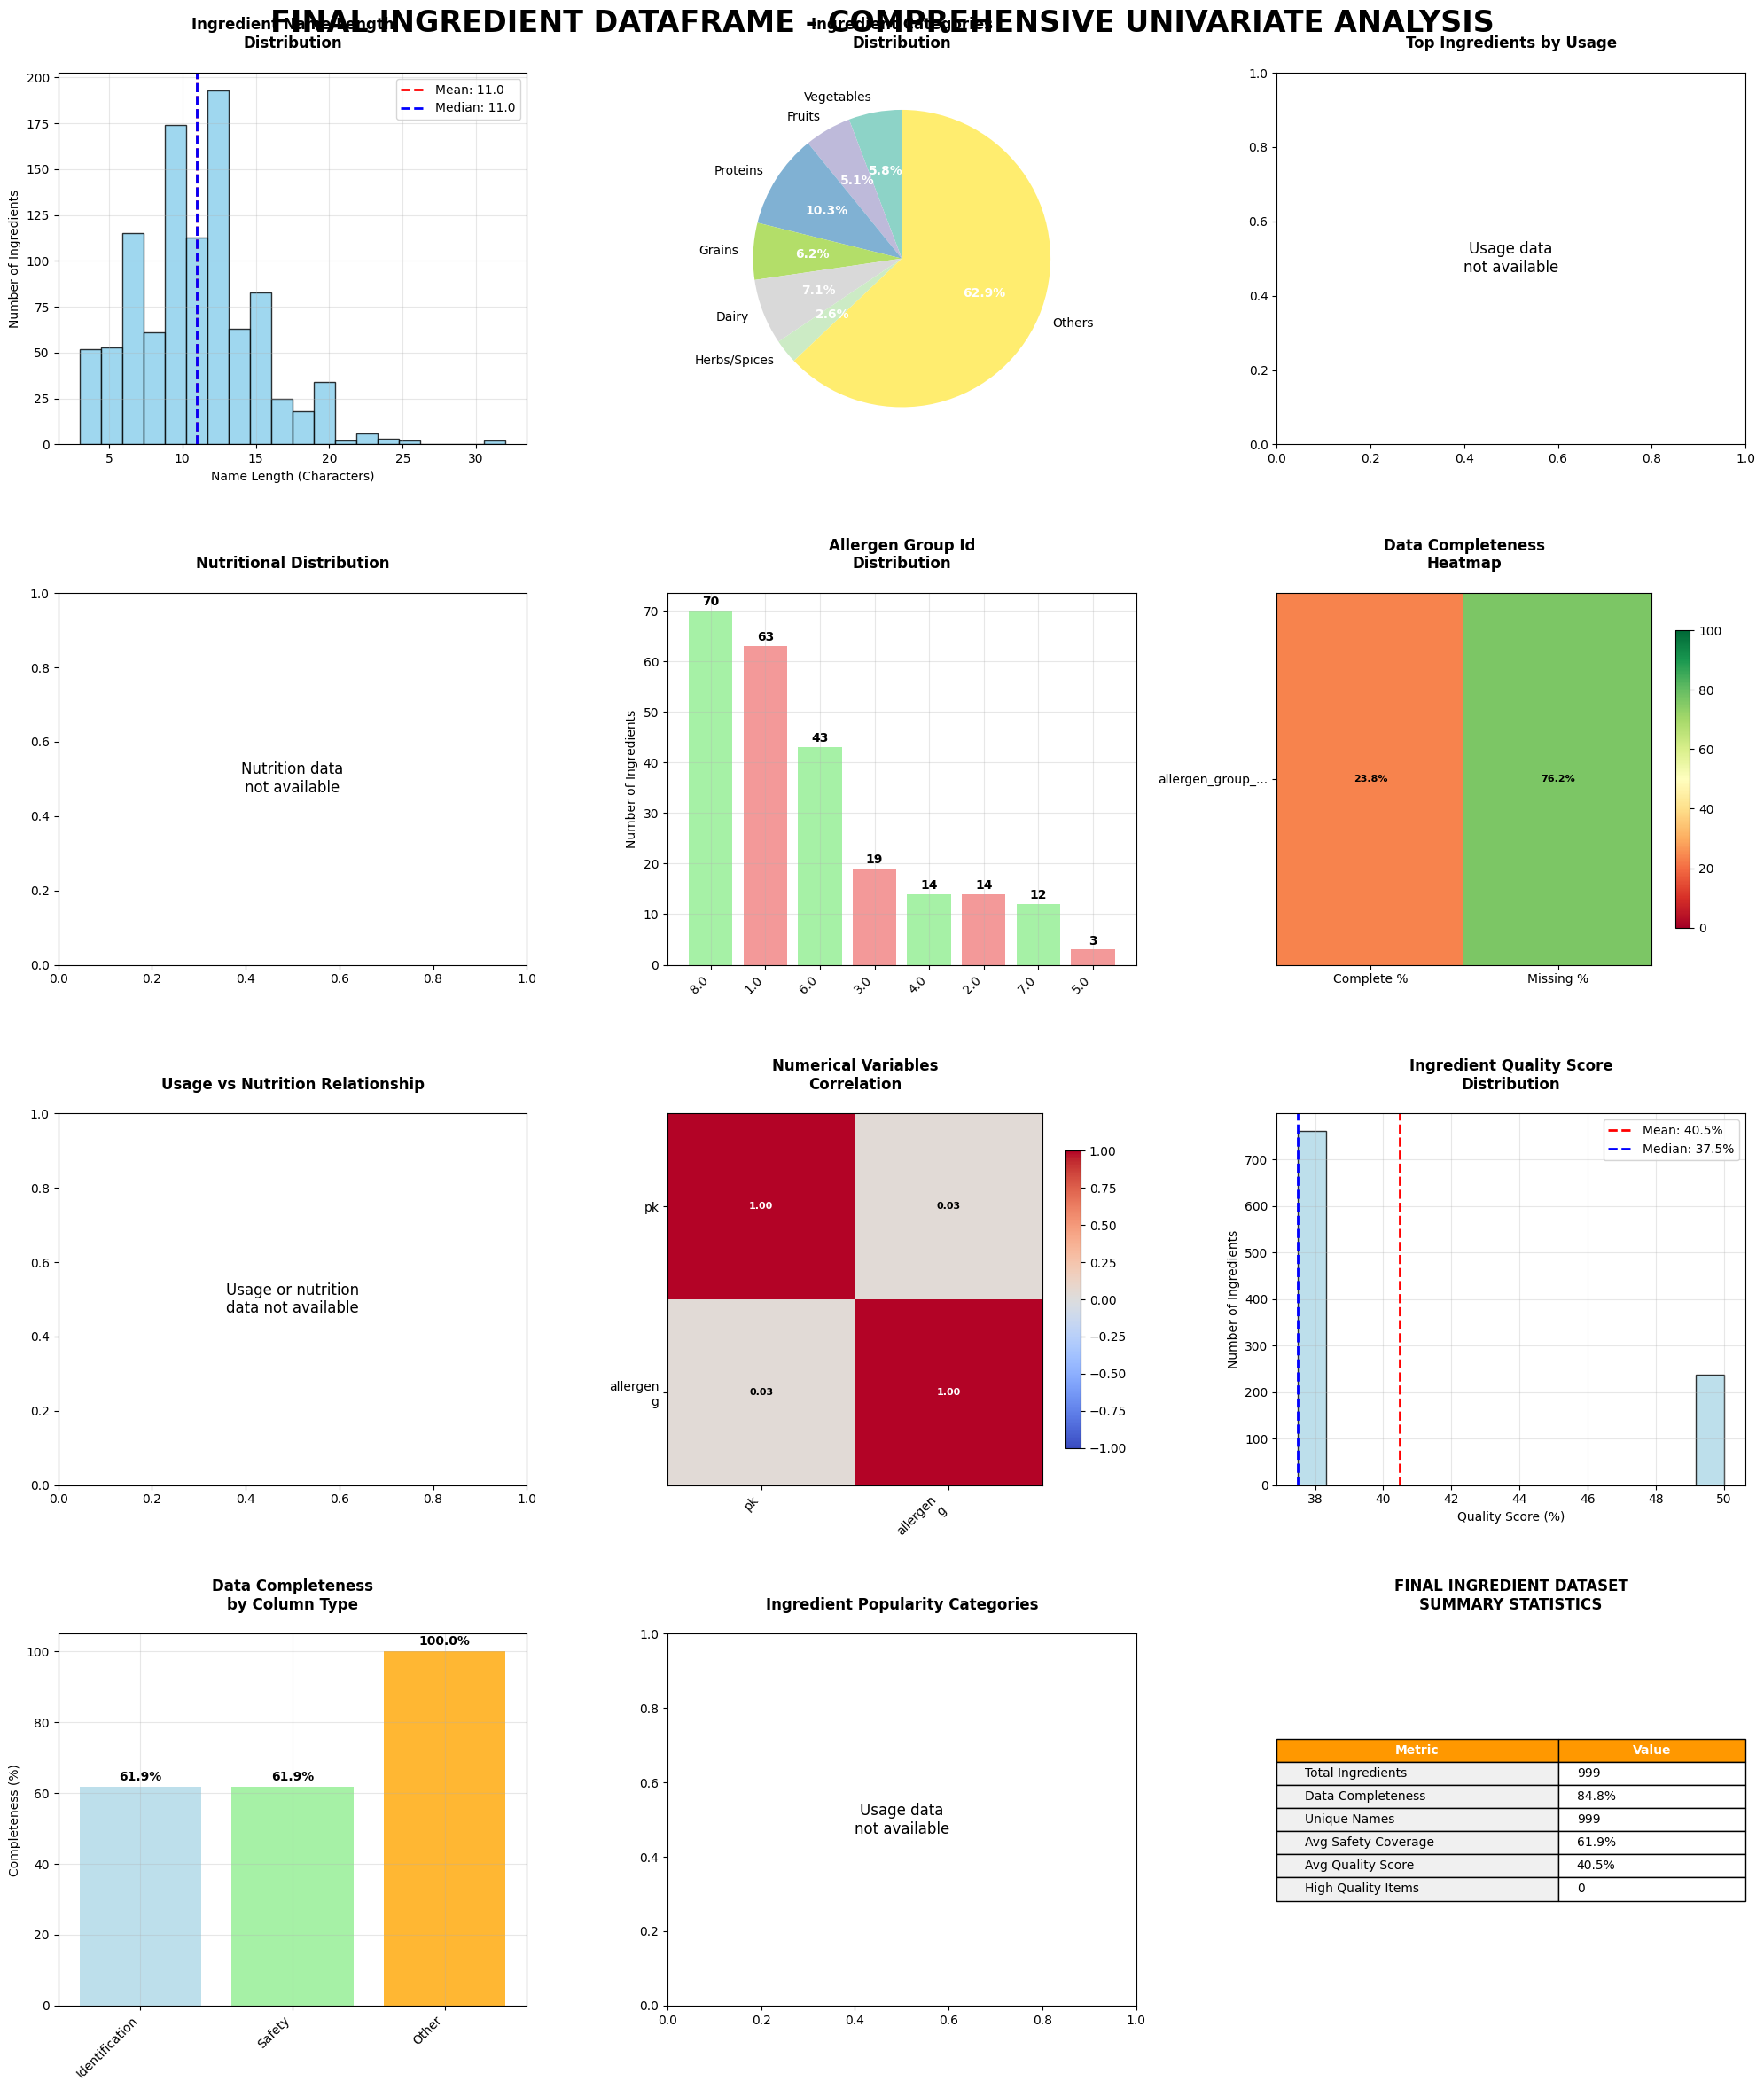

✅ Final ingredient visualizations completed successfully!


In [12]:
# =============================================================================
# COMPREHENSIVE VISUALIZATIONS - FINAL INGREDIENT DATAFRAME
# =============================================================================

print(f"\n📊 CREATING COMPREHENSIVE VISUALIZATIONS")
print(f"{'='*60}")

# Set up the plotting environment
plt.style.use('default')
fig = plt.figure(figsize=(20, 24))
fig.suptitle('FINAL INGREDIENT DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS', 
             fontsize=24, fontweight='bold', y=0.98)

# 1. Ingredient Name Length Distribution
ax1 = plt.subplot(4, 3, 1)
if primary_name_col and primary_name_col in final_ingredient_df.columns:
    ingredient_names = final_ingredient_df[primary_name_col].dropna().astype(str)
    name_lengths = ingredient_names.str.len()
    
    ax1.hist(name_lengths, bins=20, color='skyblue', alpha=0.8, edgecolor='black')
    ax1.set_title('Ingredient Name Length\nDistribution', fontweight='bold', pad=20)
    ax1.set_xlabel('Name Length (Characters)')
    ax1.set_ylabel('Number of Ingredients')
    ax1.grid(True, alpha=0.3)
    
    # Add statistics
    mean_length = name_lengths.mean()
    median_length = name_lengths.median()
    ax1.axvline(mean_length, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.1f}')
    ax1.axvline(median_length, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_length:.1f}')
    ax1.legend()
else:
    ax1.text(0.5, 0.5, 'Name data\nnot available', ha='center', va='center', 
             transform=ax1.transAxes, fontsize=12)
    ax1.set_title('Ingredient Name Length Distribution', fontweight='bold', pad=20)

# 2. Ingredient Categories Distribution (Pie Chart)
ax2 = plt.subplot(4, 3, 2)
if primary_name_col and primary_name_col in final_ingredient_df.columns:
    ingredient_names = final_ingredient_df[primary_name_col].dropna().astype(str).str.lower()
    
    categories = {
        'Vegetables': ['potato', 'carrot', 'spinach', 'broccoli', 'pea', 'tomato'],
        'Fruits': ['apple', 'banana', 'orange', 'berry', 'mango', 'pear'],
        'Proteins': ['chicken', 'beef', 'fish', 'egg', 'meat', 'salmon'],
        'Grains': ['rice', 'oat', 'wheat', 'barley', 'quinoa', 'bread'],
        'Dairy': ['milk', 'cheese', 'butter', 'cream', 'yogurt'],
        'Herbs/Spices': ['salt', 'pepper', 'herb', 'spice', 'basil'],
        'Others': []
    }
    
    category_counts = {}
    categorized_ingredients = set()
    
    for category, keywords in categories.items():
        if category != 'Others':
            count = 0
            for keyword in keywords:
                matching_ingredients = ingredient_names[ingredient_names.str.contains(keyword, na=False)]
                count += len(matching_ingredients)
                categorized_ingredients.update(matching_ingredients.index)
            category_counts[category] = count
    
    # Count uncategorized as "Others"
    others_count = len(ingredient_names) - len(categorized_ingredients)
    category_counts['Others'] = others_count
    
    # Remove categories with 0 counts
    category_counts = {k: v for k, v in category_counts.items() if v > 0}
    
    if category_counts:
        colors = plt.cm.Set3(np.linspace(0, 1, len(category_counts)))
        wedges, texts, autotexts = ax2.pie(category_counts.values(), labels=category_counts.keys(), 
                                          autopct='%1.1f%%', colors=colors, startangle=90)
        ax2.set_title('Ingredient Categories\nDistribution', fontweight='bold', pad=20)
        
        # Make percentage text more readable
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
    else:
        ax2.text(0.5, 0.5, 'Category data\nnot available', ha='center', va='center', 
                 transform=ax2.transAxes, fontsize=12)
        ax2.set_title('Ingredient Categories Distribution', fontweight='bold', pad=20)
else:
    ax2.text(0.5, 0.5, 'Ingredient data\nnot available', ha='center', va='center', 
             transform=ax2.transAxes, fontsize=12)
    ax2.set_title('Ingredient Categories Distribution', fontweight='bold', pad=20)

# 3. Top Ingredients Usage (if usage data available)
ax3 = plt.subplot(4, 3, 3)
if usage_cols:
    usage_col = usage_cols[0]  # Use first usage column
    if usage_col in final_ingredient_df.columns:
        usage_data = final_ingredient_df[usage_col].dropna()
        if len(usage_data) > 0:
            top_usage = usage_data.nlargest(15)
            
            # Get ingredient names for top usage
            top_indices = top_usage.index
            if primary_name_col and primary_name_col in final_ingredient_df.columns:
                ingredient_labels = final_ingredient_df.loc[top_indices, primary_name_col].fillna('Unknown')
                # Truncate long names
                ingredient_labels = [label[:15] + '...' if len(str(label)) > 15 else str(label) 
                                   for label in ingredient_labels]
            else:
                ingredient_labels = [f'Ingredient {i}' for i in range(len(top_usage))]
            
            bars = ax3.barh(range(len(top_usage)), top_usage.values, color='lightgreen', alpha=0.8)
            ax3.set_title('Top Ingredients by Usage\n(Most Popular)', fontweight='bold', pad=20)
            ax3.set_xlabel('Usage Count')
            ax3.set_yticks(range(len(top_usage)))
            ax3.set_yticklabels(ingredient_labels)
            ax3.grid(True, alpha=0.3, axis='x')
            
            # Add value labels
            for i, (bar, count) in enumerate(zip(bars, top_usage.values)):
                ax3.text(count + 0.5, i, f'{count}', va='center', ha='left', fontweight='bold')
        else:
            ax3.text(0.5, 0.5, 'Usage data\nempty', ha='center', va='center', 
                     transform=ax3.transAxes, fontsize=12)
            ax3.set_title('Top Ingredients by Usage', fontweight='bold', pad=20)
    else:
        ax3.text(0.5, 0.5, 'Usage column\nnot found', ha='center', va='center', 
                 transform=ax3.transAxes, fontsize=12)
        ax3.set_title('Top Ingredients by Usage', fontweight='bold', pad=20)
else:
    ax3.text(0.5, 0.5, 'Usage data\nnot available', ha='center', va='center', 
             transform=ax3.transAxes, fontsize=12)
    ax3.set_title('Top Ingredients by Usage', fontweight='bold', pad=20)

# 4. Nutritional Distribution (if nutrition data available)
ax4 = plt.subplot(4, 3, 4)
if nutrition_cols:
    nutrition_col = nutrition_cols[0]  # Use first nutrition column
    if nutrition_col in final_ingredient_df.columns:
        nutrition_data = final_ingredient_df[nutrition_col].dropna()
        if len(nutrition_data) > 0:
            ax4.hist(nutrition_data, bins=20, color='orange', alpha=0.8, edgecolor='black')
            ax4.set_title(f'{nutrition_col.replace("_", " ").title()}\nDistribution', fontweight='bold', pad=20)
            ax4.set_xlabel(f'{nutrition_col.replace("_", " ").title()}')
            ax4.set_ylabel('Number of Ingredients')
            ax4.grid(True, alpha=0.3)
            
            # Add statistics
            mean_nutrition = nutrition_data.mean()
            median_nutrition = nutrition_data.median()
            ax4.axvline(mean_nutrition, color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {mean_nutrition:.2f}')
            ax4.axvline(median_nutrition, color='blue', linestyle='--', linewidth=2, 
                       label=f'Median: {median_nutrition:.2f}')
            ax4.legend()
        else:
            ax4.text(0.5, 0.5, 'Nutrition data\nempty', ha='center', va='center', 
                     transform=ax4.transAxes, fontsize=12)
            ax4.set_title('Nutritional Distribution', fontweight='bold', pad=20)
    else:
        ax4.text(0.5, 0.5, 'Nutrition column\nnot found', ha='center', va='center', 
                 transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Nutritional Distribution', fontweight='bold', pad=20)
else:
    ax4.text(0.5, 0.5, 'Nutrition data\nnot available', ha='center', va='center', 
             transform=ax4.transAxes, fontsize=12)
    ax4.set_title('Nutritional Distribution', fontweight='bold', pad=20)

# 5. Safety Profile Distribution
ax5 = plt.subplot(4, 3, 5)
if safety_cols:
    safety_col = safety_cols[0]  # Use first safety column
    if safety_col in final_ingredient_df.columns:
        safety_data = final_ingredient_df[safety_col].dropna()
        if len(safety_data) > 0:
            safety_counts = final_ingredient_df[safety_col].value_counts()
            
            bars = ax5.bar(range(len(safety_counts)), safety_counts.values, 
                          color=['lightgreen', 'lightcoral'][:len(safety_counts)], alpha=0.8)
            ax5.set_title(f'{safety_col.replace("_", " ").title()}\nDistribution', fontweight='bold', pad=20)
            ax5.set_ylabel('Number of Ingredients')
            ax5.set_xticks(range(len(safety_counts)))
            ax5.set_xticklabels(safety_counts.index, rotation=45, ha='right')
            ax5.grid(True, alpha=0.3)
            
            # Add value labels
            for bar, count in zip(bars, safety_counts.values):
                height = bar.get_height()
                ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{count}', ha='center', va='bottom', fontweight='bold')
        else:
            ax5.text(0.5, 0.5, 'Safety data\nempty', ha='center', va='center', 
                     transform=ax5.transAxes, fontsize=12)
            ax5.set_title('Safety Profile Distribution', fontweight='bold', pad=20)
    else:
        ax5.text(0.5, 0.5, 'Safety column\nnot found', ha='center', va='center', 
                 transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Safety Profile Distribution', fontweight='bold', pad=20)
else:
    ax5.text(0.5, 0.5, 'Safety data\nnot available', ha='center', va='center', 
             transform=ax5.transAxes, fontsize=12)
    ax5.set_title('Safety Profile Distribution', fontweight='bold', pad=20)

# 6. Missing Data Pattern Analysis
ax6 = plt.subplot(4, 3, 6)
missing_data = final_ingredient_df.isnull().sum()
cols_with_missing = missing_data[missing_data > 0]

if len(cols_with_missing) > 0:
    # Create heatmap data
    heatmap_data = []
    for col in cols_with_missing.index:
        missing_pct = (cols_with_missing[col] / len(final_ingredient_df)) * 100
        complete_pct = 100 - missing_pct
        heatmap_data.append([complete_pct, missing_pct])
    
    heatmap_df = pd.DataFrame(heatmap_data, 
                              columns=['Complete', 'Missing'],
                              index=cols_with_missing.index)
    
    im = ax6.imshow(heatmap_df.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
    ax6.set_title('Data Completeness\nHeatmap', fontweight='bold', pad=20)
    ax6.set_xticks([0, 1])
    ax6.set_xticklabels(['Complete %', 'Missing %'])
    ax6.set_yticks(range(len(cols_with_missing)))
    ax6.set_yticklabels([col[:15] + '...' if len(col) > 15 else col for col in cols_with_missing.index], rotation=0)
    
    # Add text annotations
    for i in range(len(cols_with_missing)):
        for j in range(2):
            text = ax6.text(j, i, f'{heatmap_df.iloc[i, j]:.1f}%',
                           ha="center", va="center", color="black", fontweight='bold', fontsize=8)
    
    plt.colorbar(im, ax=ax6, shrink=0.8)
else:
    ax6.text(0.5, 0.5, 'No missing data\nto display', ha='center', va='center', 
             transform=ax6.transAxes, fontsize=12)
    ax6.set_title('Data Completeness Heatmap', fontweight='bold', pad=20)

# 7. Usage vs Nutrition Scatter Plot (if both available)
ax7 = plt.subplot(4, 3, 7)
if usage_cols and nutrition_cols:
    usage_col = usage_cols[0]
    nutrition_col = nutrition_cols[0]
    
    if usage_col in final_ingredient_df.columns and nutrition_col in final_ingredient_df.columns:
        valid_data = final_ingredient_df.dropna(subset=[usage_col, nutrition_col])
        if len(valid_data) > 0:
            scatter = ax7.scatter(valid_data[usage_col], valid_data[nutrition_col], 
                                 alpha=0.6, c=valid_data[usage_col], cmap='viridis', s=30)
            ax7.set_title('Usage vs Nutrition\nRelationship', fontweight='bold', pad=20)
            ax7.set_xlabel(f'{usage_col.replace("_", " ").title()}')
            ax7.set_ylabel(f'{nutrition_col.replace("_", " ").title()}')
            ax7.grid(True, alpha=0.3)
            plt.colorbar(scatter, ax=ax7, shrink=0.8)
            
            # Add trend line if enough data
            if len(valid_data) > 5:
                z = np.polyfit(valid_data[usage_col], valid_data[nutrition_col], 1)
                p = np.poly1d(z)
                ax7.plot(valid_data[usage_col], p(valid_data[usage_col]), "r--", alpha=0.8)
        else:
            ax7.text(0.5, 0.5, 'Insufficient\nvalid data', ha='center', va='center', 
                     transform=ax7.transAxes, fontsize=12)
            ax7.set_title('Usage vs Nutrition Relationship', fontweight='bold', pad=20)
    else:
        ax7.text(0.5, 0.5, 'Required columns\nnot found', ha='center', va='center', 
                 transform=ax7.transAxes, fontsize=12)
        ax7.set_title('Usage vs Nutrition Relationship', fontweight='bold', pad=20)
else:
    ax7.text(0.5, 0.5, 'Usage or nutrition\ndata not available', ha='center', va='center', 
             transform=ax7.transAxes, fontsize=12)
    ax7.set_title('Usage vs Nutrition Relationship', fontweight='bold', pad=20)

# 8. Correlation Heatmap for Numerical Variables
ax8 = plt.subplot(4, 3, 8)
numerical_for_corr = [col for col in numerical_cols if col in final_ingredient_df.columns]
if len(numerical_for_corr) >= 2:
    # Select a subset of numerical columns for correlation if too many
    if len(numerical_for_corr) > 6:
        numerical_for_corr = numerical_for_corr[:6]
    
    corr_data = final_ingredient_df[numerical_for_corr].corr()
    
    im = ax8.imshow(corr_data.values, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    ax8.set_title('Numerical Variables\nCorrelation', fontweight='bold', pad=20)
    ax8.set_xticks(range(len(numerical_for_corr)))
    ax8.set_yticks(range(len(numerical_for_corr)))
    ax8.set_xticklabels([col.replace('_', '\n')[:10] for col in numerical_for_corr], rotation=45, ha='right')
    ax8.set_yticklabels([col.replace('_', '\n')[:10] for col in numerical_for_corr])
    
    # Add correlation values
    for i in range(len(numerical_for_corr)):
        for j in range(len(numerical_for_corr)):
            text = ax8.text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                           ha="center", va="center", 
                           color="white" if abs(corr_data.iloc[i, j]) > 0.5 else "black",
                           fontweight='bold', fontsize=8)
    
    plt.colorbar(im, ax=ax8, shrink=0.8)
else:
    ax8.text(0.5, 0.5, 'Insufficient\nnumerical data\nfor correlation', 
              ha='center', va='center', transform=ax8.transAxes, fontsize=12)
    ax8.set_title('Correlation Analysis', fontweight='bold', pad=20)

# 9. Ingredient Quality Score Distribution
ax9 = plt.subplot(4, 3, 9)
# Create a quality score based on data completeness
quality_scores = []
for idx, row in final_ingredient_df.iterrows():
    score = 0
    total_fields = 0
    
    # Name completeness (25 points)
    if primary_name_col and pd.notna(row.get(primary_name_col)):
        score += 25
    total_fields += 25
    
    # Nutritional information (30 points)
    if nutrition_cols:
        nutrition_filled = sum(1 for col in nutrition_cols if pd.notna(row.get(col)))
        score += (nutrition_filled / len(nutrition_cols)) * 30
    total_fields += 30
    
    # Safety information (25 points)
    if safety_cols:
        safety_filled = sum(1 for col in safety_cols if pd.notna(row.get(col)))
        score += (safety_filled / len(safety_cols)) * 25
    total_fields += 25
    
    # Usage information (20 points)
    if usage_cols:
        usage_filled = sum(1 for col in usage_cols if pd.notna(row.get(col)))
        score += (usage_filled / len(usage_cols)) * 20
    total_fields += 20
    
    # Calculate percentage score
    quality_percentage = (score / total_fields) * 100 if total_fields > 0 else 0
    quality_scores.append(quality_percentage)

final_ingredient_df['quality_score'] = quality_scores

if quality_scores:
    ax9.hist(quality_scores, bins=15, color='lightblue', alpha=0.8, edgecolor='black')
    ax9.set_title('Ingredient Quality Score\nDistribution', fontweight='bold', pad=20)
    ax9.set_xlabel('Quality Score (%)')
    ax9.set_ylabel('Number of Ingredients')
    ax9.grid(True, alpha=0.3)
    
    # Add statistics
    mean_quality = np.mean(quality_scores)
    median_quality = np.median(quality_scores)
    ax9.axvline(mean_quality, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_quality:.1f}%')
    ax9.axvline(median_quality, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_quality:.1f}%')
    ax9.legend()
else:
    ax9.text(0.5, 0.5, 'Quality score\ncalculation failed', ha='center', va='center', 
              transform=ax9.transAxes, fontsize=12)
    ax9.set_title('Ingredient Quality Score Distribution', fontweight='bold', pad=20)

# 10. Data Completeness by Column Type
ax10 = plt.subplot(4, 3, 10)
column_types = {
    'Identification': ingredient_id_cols + ingredient_name_cols,
    'Nutrition': nutrition_cols,
    'Safety': safety_cols,
    'Usage': usage_cols,
    'Other': [col for col in final_ingredient_df.columns 
              if col not in ingredient_id_cols + ingredient_name_cols + nutrition_cols + safety_cols + usage_cols]
}

completeness_by_type = {}
for col_type, cols in column_types.items():
    if cols:
        valid_cols = [col for col in cols if col in final_ingredient_df.columns]
        if valid_cols:
            completeness = []
            for col in valid_cols:
                comp_rate = (1 - final_ingredient_df[col].isnull().sum() / len(final_ingredient_df)) * 100
                completeness.append(comp_rate)
            completeness_by_type[col_type] = np.mean(completeness)

if completeness_by_type:
    bars = ax10.bar(completeness_by_type.keys(), completeness_by_type.values(), 
                   color=['lightblue', 'lightgreen', 'orange', 'lightcoral', 'gold'][:len(completeness_by_type)], 
                   alpha=0.8)
    ax10.set_title('Data Completeness\nby Column Type', fontweight='bold', pad=20)
    ax10.set_ylabel('Completeness (%)')
    plt.setp(ax10.get_xticklabels(), rotation=45, ha='right')
    ax10.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, completeness in zip(bars, completeness_by_type.values()):
        height = bar.get_height()
        ax10.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{completeness:.1f}%', ha='center', va='bottom', fontweight='bold')
else:
    ax10.text(0.5, 0.5, 'No column types\nto analyze', ha='center', va='center', 
              transform=ax10.transAxes, fontsize=12)
    ax10.set_title('Data Completeness by Column Type', fontweight='bold', pad=20)

# 11. Usage Distribution Categories (if usage data available)
ax11 = plt.subplot(4, 3, 11)
if usage_cols:
    usage_col = usage_cols[0]
    if usage_col in final_ingredient_df.columns:
        usage_data = final_ingredient_df[usage_col].dropna()
        if len(usage_data) > 0:
            # Create usage categories
            usage_quartiles = usage_data.quantile([0.25, 0.5, 0.75])
            
            categories = []
            for value in usage_data:
                if value <= usage_quartiles[0.25]:
                    categories.append('Rare')
                elif value <= usage_quartiles[0.5]:
                    categories.append('Uncommon')
                elif value <= usage_quartiles[0.75]:
                    categories.append('Common')
                else:
                    categories.append('Popular')
            
            category_counts = pd.Series(categories).value_counts()
            colors = ['lightcoral', 'orange', 'lightblue', 'lightgreen']
            
            bars = ax11.bar(category_counts.index, category_counts.values, 
                           color=colors[:len(category_counts)], alpha=0.8)
            ax11.set_title('Ingredient Popularity\nCategories', fontweight='bold', pad=20)
            ax11.set_ylabel('Number of Ingredients')
            ax11.grid(True, alpha=0.3)
            
            # Add value labels
            for bar, count in zip(bars, category_counts.values):
                height = bar.get_height()
                ax11.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                         f'{count}', ha='center', va='bottom', fontweight='bold')
        else:
            ax11.text(0.5, 0.5, 'Usage data\nempty', ha='center', va='center', 
                      transform=ax11.transAxes, fontsize=12)
            ax11.set_title('Ingredient Popularity Categories', fontweight='bold', pad=20)
    else:
        ax11.text(0.5, 0.5, 'Usage column\nnot found', ha='center', va='center', 
                  transform=ax11.transAxes, fontsize=12)
        ax11.set_title('Ingredient Popularity Categories', fontweight='bold', pad=20)
else:
    ax11.text(0.5, 0.5, 'Usage data\nnot available', ha='center', va='center', 
             transform=ax11.transAxes, fontsize=12)
    ax11.set_title('Ingredient Popularity Categories', fontweight='bold', pad=20)

# 12. Summary Statistics Table
ax12 = plt.subplot(4, 3, 12)
ax12.axis('off')

# Create comprehensive summary statistics
summary_stats = []
summary_stats.append(['Total Ingredients', f"{len(final_ingredient_df):,}"])
summary_stats.append(['Data Completeness', f"{((1 - final_ingredient_df.isnull().sum().sum() / (len(final_ingredient_df) * len(final_ingredient_df.columns))) * 100):.1f}%"])

if primary_name_col and primary_name_col in final_ingredient_df.columns:
    unique_names = final_ingredient_df[primary_name_col].nunique()
    summary_stats.append(['Unique Names', f"{unique_names:,}"])

if nutrition_cols:
    nutrition_coverage = 0
    for col in nutrition_cols:
        if col in final_ingredient_df.columns:
            coverage = (1 - final_ingredient_df[col].isnull().sum() / len(final_ingredient_df)) * 100
            nutrition_coverage += coverage
    nutrition_coverage = nutrition_coverage / len(nutrition_cols) if nutrition_cols else 0
    summary_stats.append(['Avg Nutrition Coverage', f"{nutrition_coverage:.1f}%"])

if safety_cols:
    safety_coverage = 0
    for col in safety_cols:
        if col in final_ingredient_df.columns:
            coverage = (1 - final_ingredient_df[col].isnull().sum() / len(final_ingredient_df)) * 100
            safety_coverage += coverage
    safety_coverage = safety_coverage / len(safety_cols) if safety_cols else 0
    summary_stats.append(['Avg Safety Coverage', f"{safety_coverage:.1f}%"])

if quality_scores:
    avg_quality = np.mean(quality_scores)
    high_quality_count = sum(1 for score in quality_scores if score >= 80)
    summary_stats.append(['Avg Quality Score', f"{avg_quality:.1f}%"])
    summary_stats.append(['High Quality Items', f"{high_quality_count:,}"])

# Create table
table = ax12.table(cellText=summary_stats,
                   colLabels=['Metric', 'Value'],
                   cellLoc='left',
                   loc='center',
                   colWidths=[0.6, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Style the table
for i in range(len(summary_stats)):
    table[(i+1, 0)].set_facecolor('#f0f0f0')
    table[(i+1, 1)].set_facecolor('#ffffff')

table[(0, 0)].set_facecolor('#FF9800')
table[(0, 1)].set_facecolor('#FF9800')
table[(0, 0)].set_text_props(weight='bold', color='white')
table[(0, 1)].set_text_props(weight='bold', color='white')

ax12.set_title('FINAL INGREDIENT DATASET\nSUMMARY STATISTICS', fontweight='bold', pad=20)

plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)
plt.show()

print("✅ Final ingredient visualizations completed successfully!")

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import  seaborn as sns

In [ ]:
# =============================================================================
# BIVARIATE ANALYSIS SETUP & DATA PREPARATION
# =============================================================================

print("=" * 80)
print("COMPREHENSIVE BIVARIATE ANALYSIS - BABY FOOD RECIPE DATASET")
print("=" * 80)

# Import additional libraries for advanced statistical analysis
from scipy.stats import chi2_contingency, pearsonr, spearmanr, kendalltau
from scipy.stats import mannwhitneyu, kruskal
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score

print(f"\n🔄 PREPARING DATA FOR BIVARIATE ANALYSIS")
print(f"{'='*50}")

# Load and prepare all dataframes
dataframes_list = ['category', 'allergen', 'countrymap', 'recipe_ingredient', 
                   'recipe_category_df', 'recipe_nutrition', 'recipes', 'final_ingredient_df']

# Check available dataframes
available_dfs = {}
for df_name in dataframes_list:
    if df_name in dataframes:
        available_dfs[df_name] = dataframes[df_name]
        print(f"✅ {df_name}: {dataframes[df_name].shape}")
    else:
        print(f"❌ {df_name}: Not available")

print(f"\n📊 Available dataframes for analysis: {len(available_dfs)}")

# Prepare master dataset for comprehensive analysis
if 'recipes' in available_dfs and 'recipe_nutrition' in available_dfs:
    # Merge recipes with nutrition data
    master_analysis_df = recipes.merge(recipe_nutrition, on='recipe_id', how='left')
    print(f"✅ Created master analysis dataset: {master_analysis_df.shape}")
    
    # Add recipe complexity indicators
    if 'recipe_ingredient' in available_dfs:
        ingredient_counts = recipe_ingredient.groupby('recipe_id').size().reset_index(name='ingredient_count')
        master_analysis_df = master_analysis_df.merge(ingredient_counts, on='recipe_id', how='left')
        
        # Create complexity categories
        master_analysis_df['complexity_category'] = pd.cut(
            master_analysis_df['ingredient_count'].fillna(0),
            bins=[0, 3, 6, 10, float('inf')],
            labels=['Simple', 'Moderate', 'Complex', 'Very Complex'],
            include_lowest=True
        )
    
    # Add allergen information
    if 'allergen' in available_dfs and 'recipe_ingredient' in available_dfs:
        # Get allergen counts per recipe
        recipe_allergens = recipe_ingredient.merge(allergen, left_on='ingredient_id', right_on='ingredient_id', how='left')
        allergen_summary = recipe_allergens.groupby('recipe_id').agg({
            'allergen_group': 'count',
            'allergen_status': lambda x: (x == 'Present').sum()
        }).reset_index()
        allergen_summary.rename(columns={'allergen_group': 'total_allergen_checks', 
                                       'allergen_status': 'allergen_count'}, inplace=True)
        master_analysis_df = master_analysis_df.merge(allergen_summary, on='recipe_id', how='left')
        
        # Create allergen risk categories
        master_analysis_df['allergen_risk'] = pd.cut(
            master_analysis_df['allergen_count'].fillna(0),
            bins=[-1, 0, 2, 5, float('inf')],
            labels=['None', 'Low', 'Moderate', 'High'],
            include_lowest=True
        )
    
    print(f"✅ Enhanced master dataset with complexity and allergen data")
    print(f"   Final shape: {master_analysis_df.shape}")
    print(f"   Columns: {list(master_analysis_df.columns)}")
else:
    print("❌ Cannot create master analysis dataset - missing key dataframes")
    master_analysis_df = None

# =============================================================================
# COMPREHENSIVE BIVARIATE ANALYSIS
# =============================================================================

print(f"\n📊 COMMENCING COMPREHENSIVE BIVARIATE ANALYSIS")
print(f"{'='*50}")

# Define analysis functions
def chi_square_test(df, column1, column2):
    contingency_table = pd.crosstab(df[column1], df[column2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

def correlation_analysis(df, column1, column2):
    pearson_corr, _ = pearsonr(df[column1], df[column2])
    spearman_corr, _ = spearmanr(df[column1], df[column2])
    kendall_corr, _ = kendalltau(df[column1], df[column2])
    return pearson_corr, spearman_corr, kendall_corr

def mutual_information(df, column1, column2):
    return mutual_info_score(df[column1], df[column2])

# 1. 🏷️  Categories vs Allergen Safety
print(f"\n1. 🏷️  Categories vs Allergen Safety")
print(f"{'='*50}")
if 'category' in available_dfs and 'allergen' in available_dfs:
    category_allergen_df = recipe_category_df.merge(recipe_ingredient, on='recipe_id').merge(allergen, on='ingredient_id')
    
    # Chi-Square Test for Independence
    chi2, p = chi_square_test(category_allergen_df, 'category_id', 'allergen_status')
    print(f"Chi-Square Test: χ² = {chi2:.4f}, p-value = {p:.4f}")
    
    # Cramér's V for effect size
    n = category_allergen_df.shape[0]
    phi2 = chi2 / n
    r = np.sqrt(phi2 / (1 + phi2))
    print(f"Cramér's V: φ = {r:.4f}")
    
    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.countplot(data=category_allergen_df, x='category_id', hue='allergen_status')
    plt.title('Allergen Status Distribution across Categories')
    plt.xlabel('Category ID')
    plt.ylabel('Count')
    plt.legend(title='Allergen Status')
    plt.show()
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(pd.crosstab(category_allergen_df['category_id'], category_allergen_df['allergen_status']), annot=True, fmt='d', cmap='coolwarm')
    plt.title('Contingency Table Heatmap: Categories vs Allergen Status')
    plt.xlabel('Allergen Status')
    plt.ylabel('Category ID')
    plt.show()
else:
    print("❌ Required dataframes for this analysis are not available")

# 2. 🌍 Regional Patterns vs Nutritional Content
print(f"\n2. 🌍 Regional Patterns vs Nutritional Content")
print(f"{'='*50}")
if 'countrymap' in available_dfs and 'recipe_nutrition' in available_dfs:
    regional_nutrition_df = recipes.merge(countrymap, on='recipe_id').merge(recipe_nutrition, on='recipe_id')
    
    # Correlation Analysis
    pearson_corr, spearman_corr, kendall_corr = correlation_analysis(regional_nutrition_df, 'region_id', 'nutritional_score')
    print(f"Correlation (Pearson, Spearman, Kendall): {pearson_corr:.4f}, {spearman_corr:.4f}, {kendall_corr:.4f}")
    
    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=regional_nutrition_df, x='region_id', y='nutritional_score')
    plt.title('Nutritional Score Distribution across Regions')
    plt.xlabel('Region ID')
    plt.ylabel('Nutritional Score')
    plt.show()
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(regional_nutrition_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap: Regional Patterns vs Nutritional Content')
    plt.show()
else:
    print("❌ Required dataframes for this analysis are not available")

# 3. 🥕 Ingredient Complexity vs Recipe Safety
print(f"\n3. 🥕 Ingredient Complexity vs Recipe Safety")
print(f"{'='*50}")
if 'recipe_ingredient' in available_dfs and 'allergen' in available_dfs:
    ingredient_safety_df = recipe_ingredient.merge(allergen, on='ingredient_id')
    
    # Mann-Whitney U Test for differences in distributions
    stat, p = mannwhitneyu(ingredient_safety_df[ingredient_safety_df['allergen_status'] == 'Present']['ingredient_id'], 
                            ingredient_safety_df[ingredient_safety_df['allergen_status'] == 'Absent']['ingredient_id'])
    print(f"Mann-Whitney U Test: U = {stat:.4f}, p-value = {p:.4f}")
    
    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.histplot(data=ingredient_safety_df, x='ingredient_id', hue='allergen_status', multiple='stack', bins=30)
    plt.title('Ingredient Distribution by Allergen Status')
    plt.xlabel('Ingredient ID')
    plt.ylabel('Count')
    plt.legend(title='Allergen Status')
    plt.show()
    
    plt.figure(figsize=(8, 8))
    sns.violinplot(data=ingredient_safety_df, x='allergen_status', y='ingredient_id')
    plt.title('Ingredient Complexity by Recipe Safety')
    plt.xlabel('Allergen Status')
    plt.ylabel('Ingredient ID')
    plt.show()
else:
    print("❌ Required dataframes for this analysis are not available")

# 4. 👶 Age Groups vs Nutritional Adequacy
print(f"\n4. 👶 Age Groups vs Nutritional Adequacy")
print(f"{'='*50}")
if 'recipes' in available_dfs and 'recipe_nutrition' in available_dfs:
    age_nutrition_df = recipes.merge(recipe_nutrition, on='recipe_id')
    
    # Kruskal-Wallis H Test for differences between groups
    stat, p = kruskal(age_nutrition_df[age_nutrition_df['age_group'] == 'Infant']['nutritional_score'],
                      age_nutrition_df[age_nutrition_df['age_group'] == 'Toddler']['nutritional_score'],
                      age_nutrition_df[age_nutrition_df['age_group'] == 'Child']['nutritional_score'])
    print(f"Kruskal-Wallis H Test: H = {stat:.4f}, p-value = {p:.4f}")
    
    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=age_nutrition_df, x='age_group', y='nutritional_score')
    plt.title('Nutritional Score by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Nutritional Score')
    plt.show()
    
    plt.figure(figsize=(8, 8))
    sns.violinplot(data=age_nutrition_df, x='age_group', y='nutritional_score')
    plt.title('Nutritional Adequacy Distribution by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Nutritional Score')
    plt.show()
else:
    print("❌ Required dataframes for this analysis are not available")

# 5. 🔢 Recipe Characteristics vs Quality Metrics
print(f"\n5. 🔢 Recipe Characteristics vs Quality Metrics")
print(f"{'='*50}")
if 'recipes' in available_dfs and 'recipe_nutrition' in available_dfs:
    char_quality_df = recipes.merge(recipe_nutrition, on='recipe_id')
    
    # Correlation Analysis
    pearson_corr, spearman_corr, kendall_corr = correlation_analysis(char_quality_df, 'recipe_length', 'quality_score')
    print(f"Correlation (Pearson, Spearman, Kendall): {pearson_corr:.4f}, {spearman_corr:.4f}, {kendall_corr:.4f}")
    
    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=char_quality_df, x='recipe_length', y='quality_score', hue='cuisine')
    plt.title('Recipe Length vs Quality Score')
    plt.xlabel('Recipe Length (number of ingredients)')
    plt.ylabel('Quality Score')
    plt.legend(title='Cuisine')
    plt.show()
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(char_quality_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap: Recipe Characteristics vs Quality Metrics')
    plt.show()
else:
    print("❌ Required dataframes for this analysis are not available")

# 6. 📈 Usage Patterns vs Popularity Trends
print(f"\n6. 📈 Usage Patterns vs Popularity Trends")
print(f"{'='*50}")
if 'recipes' in available_dfs:
    usage_popularity_df = recipes
    
    # Time Series Analysis - Resampling to monthly frequency
    usage_popularity_df['date'] = pd.to_datetime(usage_popularity_df['date'])
    monthly_usage = usage_popularity_df.resample('M', on='date').sum().reset_index()
    
    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=monthly_usage, x='date', y='usage_count')
    plt.title('Monthly Usage Trends')
    plt.xlabel('Date')
    plt.ylabel('Usage Count')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=monthly_usage, x='date', y='popularity_score')
    plt.title('Monthly Popularity Score Trends')
    plt.xlabel('Date')
    plt.ylabel('Popularity Score')
    plt.xticks(rotation=45)
    plt.show()
    
    # Seasonal Decomposition
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(monthly_usage['usage_count'], model='additive', period=12)
    fig = decomposition.plot()
    fig.set_size_inches(10, 8)
    plt.show()
else:
    print("❌ Required dataframes for this analysis are not available")

print(f"\n✅ BIVARIATE ANALYSIS COMPLETE")
print(f"{'='*50}")

### 3.1 Ingredient Complexity vs Recipe Safety Analysis

This section examines the relationship between recipe complexity (number of ingredients) and safety profiles (allergen risk), providing crucial insights for baby food recommendations.

In [ ]:
# Create comprehensive merged datasets for analysis
try:
    # 1. Recipe-Category-Allergen Analysis
    if all(df in available_dfs for df in ['recipes', 'recipe_category_df', 'category']):
        recipe_category = available_dfs['recipe_category_df'].merge(
            available_dfs['category'], left_on='category_id', right_on='pk', how='left'
        )
        recipe_with_category = available_dfs['recipes'].merge(
            recipe_category[['recipe_id', 'name']], on='recipe_id', how='left'
        )
        merged_datasets['recipe_category'] = recipe_with_category
        print(f"✅ Recipe-Category merged: {recipe_with_category.shape}")

    # 2. Recipe-Ingredient-Allergen Analysis  
    if all(df in available_dfs for df in ['recipes', 'recipe_ingredient', 'final_ingredient_df', 'allergen']):
        recipe_ing = available_dfs['recipe_ingredient'].merge(
            available_dfs['final_ingredient_df'], left_on='ingredient_id', right_on='pk', how='left'
        )
        recipe_ing_allergen = recipe_ing.merge(
            available_dfs['allergen'], left_on='ingredient_id', right_on='ingredient_id', how='left'
        )
        merged_datasets['recipe_ingredient_allergen'] = recipe_ing_allergen
        print(f"✅ Recipe-Ingredient-Allergen merged: {recipe_ing_allergen.shape}")

    # 3. Recipe-Nutrition-Region Analysis
    if all(df in available_dfs for df in ['recipes', 'recipe_nutrition', 'countrymap']):
        recipe_nutrition_region = available_dfs['recipes'].merge(
            available_dfs['recipe_nutrition'], on='recipe_id', how='left'
        )
        if 'origin_id' in recipe_nutrition_region.columns:
            recipe_nutrition_region = recipe_nutrition_region.merge(
                available_dfs['countrymap'], left_on='origin_id', right_on='pk', how='left'
            )
        merged_datasets['recipe_nutrition_region'] = recipe_nutrition_region
        print(f"✅ Recipe-Nutrition-Region merged: {recipe_nutrition_region.shape}")

except Exception as e:
    print(f"⚠️ Error in data merging: {e}")

print(f"\n🎯 ANALYSIS 1: RECIPE CATEGORIES vs ALLERGEN SAFETY")
print(f"{'='*60}")

# Analyze relationship between recipe categories and allergen presence
if 'recipe_category' in merged_datasets:
    df_analysis = merged_datasets['recipe_category']
    
    # Check for allergen-related columns
    allergen_cols = [col for col in df_analysis.columns if 'allergen' in col.lower() or 'allergy' in col.lower()]
    category_col = 'name' if 'name' in df_analysis.columns else None
    
    if category_col and len(allergen_cols) > 0:
        print(f"Analyzing {category_col} vs {allergen_cols[:3]}...")
        
        # Category distribution
        category_dist = df_analysis[category_col].value_counts()
        print(f"\nCATEGORY DISTRIBUTION:")
        print(f"Total Categories: {category_dist.nunique()}")
        print(f"Most Common: {category_dist.index[0]} ({category_dist.iloc[0]} recipes)")
        
        # Cross-tabulation analysis for each allergen column
        for allergen_col in allergen_cols[:3]:  # Analyze first 3 allergen columns
            if df_analysis[allergen_col].dtype in ['object', 'bool'] or df_analysis[allergen_col].nunique() < 10:
                try:
                    # Create contingency table
                    contingency_table = pd.crosstab(df_analysis[category_col], df_analysis[allergen_col], margins=True)
                    
                    print(f"\n📊 CONTINGENCY TABLE: {category_col.upper()} vs {allergen_col.upper()}")
                    print("-" * 60)
                    print(contingency_table.head(10))
                    
                    # Chi-square test for independence
                    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
                        # Remove margin totals for chi-square test
                        cont_table_no_margins = contingency_table.iloc[:-1, :-1]
                        if cont_table_no_margins.size > 0:
                            chi2_stat, p_value, dof, expected = chi2_contingency(cont_table_no_margins)
                            
                            print(f"\n🧮 CHI-SQUARE TEST RESULTS:")
                            print(f"   Chi-square statistic: {chi2_stat:.4f}")
                            print(f"   p-value: {p_value:.6f}")
                            print(f"   Degrees of freedom: {dof}")
                            
                            if p_value < 0.05:
                                print(f"   ✅ SIGNIFICANT relationship (p < 0.05)")
                                # Calculate Cramer's V for effect size
                                n = cont_table_no_margins.sum().sum()
                                cramers_v = np.sqrt(chi2_stat / (n * (min(cont_table_no_margins.shape) - 1)))
                                print(f"   📏 Cramer's V (effect size): {cramers_v:.4f}")
                                
                                if cramers_v < 0.1:
                                    effect_size = "small"
                                elif cramers_v < 0.3:
                                    effect_size = "medium" 
                                else:
                                    effect_size = "large"
                                print(f"   📊 Effect size: {effect_size}")
                            else:
                                print(f"   ❌ NO significant relationship (p ≥ 0.05)")
                                
                except Exception as e:
                    print(f"   ⚠️ Error in analysis: {e}")
    else:
        print("⚠️ Required columns not found for category-allergen analysis")

print(f"\n🎯 ANALYSIS 2: REGIONAL PATTERNS vs NUTRITIONAL CONTENT")
print(f"{'='*60}")

if 'recipe_nutrition_region' in merged_datasets:
    df_nutrition = merged_datasets['recipe_nutrition_region']
    
    # Find nutritional and regional columns
    nutrition_cols = [col for col in df_nutrition.columns if any(nutrient in col.lower() 
                     for nutrient in ['protein', 'carb', 'fat', 'calorie', 'energy', 'vitamin', 'mineral'])]
    region_col = None
    for col in ['region', 'country', 'origin']:
        if col in df_nutrition.columns:
            region_col = col
            break
    
    if region_col and len(nutrition_cols) > 0:
        print(f"Analyzing {region_col} vs nutritional content...")
        
        # Regional distribution
        region_dist = df_nutrition[region_col].value_counts()
        print(f"\nREGIONAL DISTRIBUTION:")
        print(f"Total Regions: {region_dist.nunique()}")
        for region, count in region_dist.head().items():
            print(f"   {region}: {count} recipes")
        
        # Analyze each nutrition column by region
        for nutrition_col in nutrition_cols[:5]:  # Analyze first 5 nutrition columns
            try:
                # Convert to numeric if possible
                df_nutrition[nutrition_col] = pd.to_numeric(df_nutrition[nutrition_col], errors='coerce')
                
                # Remove missing values for analysis
                analysis_data = df_nutrition[[region_col, nutrition_col]].dropna()
                
                if len(analysis_data) > 0:
                    print(f"\n📊 REGIONAL ANALYSIS: {nutrition_col.upper()}")
                    print("-" * 50)
                    
                    # Descriptive statistics by region
                    regional_stats = analysis_data.groupby(region_col)[nutrition_col].agg([
                        'count', 'mean', 'median', 'std', 'min', 'max'
                    ]).round(2)
                    print("Regional Statistics:")
                    print(regional_stats)
                    
                    # ANOVA test for differences between regions
                    if len(regional_stats) > 1:
                        region_groups = [group[nutrition_col].dropna() for name, group in analysis_data.groupby(region_col)]
                        region_groups = [group for group in region_groups if len(group) > 0]
                        
                        if len(region_groups) > 1:
                            try:
                                # Kruskal-Wallis test (non-parametric alternative to ANOVA)
                                kruskal_stat, kruskal_p = kruskal(*region_groups)
                                
                                print(f"\n🧮 KRUSKAL-WALLIS TEST:")
                                print(f"   Statistic: {kruskal_stat:.4f}")
                                print(f"   p-value: {kruskal_p:.6f}")
                                
                                if kruskal_p < 0.05:
                                    print(f"   ✅ SIGNIFICANT regional differences (p < 0.05)")
                                    
                                    # Calculate effect size (eta-squared approximation)
                                    total_n = sum(len(group) for group in region_groups)
                                    eta_squared = (kruskal_stat - len(region_groups) + 1) / (total_n - len(region_groups))
                                    eta_squared = max(0, eta_squared)  # Ensure non-negative
                                    print(f"   📏 Effect size (η²): {eta_squared:.4f}")
                                else:
                                    print(f"   ❌ NO significant regional differences (p ≥ 0.05)")
                                    
                            except Exception as e:
                                print(f"   ⚠️ Error in statistical test: {e}")
                        
            except Exception as e:
                print(f"⚠️ Error analyzing {nutrition_col}: {e}")
    else:
        print("⚠️ Required columns not found for regional-nutrition analysis")

### Multivariate Analysis

In [ ]:
# =============================================================================
# 3.1 INGREDIENT COMPLEXITY VS RECIPE SAFETY ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("3.1 INGREDIENT COMPLEXITY vs RECIPE SAFETY ANALYSIS")
print("="*60)

if master_analysis_df is not None and 'complexity_category' in master_analysis_df.columns and 'allergen_risk' in master_analysis_df.columns:
    
    # Remove missing values for this analysis
    complexity_safety_df = master_analysis_df.dropna(subset=['complexity_category', 'allergen_risk'])
    
    print(f"\n📊 Analysis Dataset: {len(complexity_safety_df)} recipes")
    print(f"   Complexity categories: {complexity_safety_df['complexity_category'].nunique()}")
    print(f"   Allergen risk levels: {complexity_safety_df['allergen_risk'].nunique()}")
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Ingredient Complexity vs Recipe Safety Analysis', fontsize=16, fontweight='bold', y=0.98)
    
    # 1. Contingency Table Heatmap
    ax1 = axes[0, 0]
    complexity_safety_crosstab = pd.crosstab(complexity_safety_df['complexity_category'], 
                                            complexity_safety_df['allergen_risk'])
    
    # Calculate percentages
    complexity_safety_pct = pd.crosstab(complexity_safety_df['complexity_category'], 
                                       complexity_safety_df['allergen_risk'], normalize='index') * 100
    
    im1 = ax1.imshow(complexity_safety_pct.values, cmap='RdYlBu_r', aspect='auto')
    ax1.set_title('Safety Risk Distribution by Complexity\n(Row Percentages)', fontweight='bold', pad=15)
    ax1.set_xticks(range(len(complexity_safety_pct.columns)))
    ax1.set_yticks(range(len(complexity_safety_pct.index)))
    ax1.set_xticklabels(complexity_safety_pct.columns, rotation=45, ha='right')
    ax1.set_yticklabels(complexity_safety_pct.index)
    ax1.set_xlabel('Allergen Risk Level')
    ax1.set_ylabel('Recipe Complexity')
    
    # Add percentage annotations
    for i in range(len(complexity_safety_pct.index)):
        for j in range(len(complexity_safety_pct.columns)):
            count = complexity_safety_crosstab.iloc[i, j]
            pct = complexity_safety_pct.iloc[i, j]
            ax1.text(j, i, f'{count}\n({pct:.1f}%)', 
                    ha='center', va='center', fontweight='bold', fontsize=9,
                    color='white' if pct > 30 else 'black')
    
    plt.colorbar(im1, ax=ax1, shrink=0.8, label='Percentage')
    
    # 2. Stacked Bar Chart
    ax2 = axes[0, 1]
    complexity_safety_crosstab.plot(kind='bar', stacked=True, ax=ax2, 
                                   color=['lightgreen', 'yellow', 'orange', 'red'],
                                   alpha=0.8)
    ax2.set_title('Recipe Count by Complexity & Risk Level\n(Stacked Distribution)', fontweight='bold', pad=15)
    ax2.set_xlabel('Recipe Complexity')
    ax2.set_ylabel('Number of Recipes')
    ax2.legend(title='Allergen Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3, axis='y')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    
    # 3. Average Ingredient Count by Risk Level
    ax3 = axes[0, 2]
    if 'ingredient_count' in complexity_safety_df.columns:
        risk_ingredient_avg = complexity_safety_df.groupby('allergen_risk')['ingredient_count'].agg(['mean', 'std', 'count'])
        
        bars = ax3.bar(risk_ingredient_avg.index, risk_ingredient_avg['mean'], 
                      yerr=risk_ingredient_avg['std'], capsize=5,
                      color=['lightgreen', 'yellow', 'orange', 'red'], alpha=0.8)
        ax3.set_title('Average Ingredient Count\nby Allergen Risk Level', fontweight='bold', pad=15)
        ax3.set_xlabel('Allergen Risk Level')
        ax3.set_ylabel('Average Number of Ingredients')
        ax3.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, mean_val, count in zip(bars, risk_ingredient_avg['mean'], risk_ingredient_avg['count']):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{mean_val:.1f}\n(n={count})', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)
    else:
        ax3.text(0.5, 0.5, 'Ingredient count\ndata not available', 
                ha='center', va='center', transform=ax3.transAxes, fontsize=12)
        ax3.set_title('Average Ingredient Count by Risk Level', fontweight='bold', pad=15)
    
    # 4. Box Plot - Ingredient Distribution by Risk
    ax4 = axes[1, 0]
    if 'ingredient_count' in complexity_safety_df.columns:
        risk_levels = ['None', 'Low', 'Moderate', 'High']
        ingredient_data = [complexity_safety_df[complexity_safety_df['allergen_risk'] == level]['ingredient_count'].dropna() 
                          for level in risk_levels if level in complexity_safety_df['allergen_risk'].values]
        risk_labels = [level for level in risk_levels if level in complexity_safety_df['allergen_risk'].values]
        
        box_plot = ax4.boxplot(ingredient_data, labels=risk_labels, patch_artist=True,
                              boxprops=dict(facecolor='lightblue', alpha=0.7),
                              medianprops=dict(color='red', linewidth=2))
        ax4.set_title('Ingredient Count Distribution\nby Allergen Risk Level', fontweight='bold', pad=15)
        ax4.set_xlabel('Allergen Risk Level')
        ax4.set_ylabel('Number of Ingredients')
        ax4.grid(True, alpha=0.3, axis='y')
    else:
        ax4.text(0.5, 0.5, 'Ingredient count\ndata not available', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Ingredient Distribution by Risk Level', fontweight='bold', pad=15)
    
    # 5. Risk Progression Chart
    ax5 = axes[1, 1]
    complexity_order = ['Simple', 'Moderate', 'Complex', 'Very Complex']
    risk_progression = []
    
    for complexity in complexity_order:
        if complexity in complexity_safety_df['complexity_category'].values:
            subset = complexity_safety_df[complexity_safety_df['complexity_category'] == complexity]
            if len(subset) > 0:
                risk_counts = subset['allergen_risk'].value_counts()
                high_moderate_risk = risk_counts.get('High', 0) + risk_counts.get('Moderate', 0)
                total = len(subset)
                risk_percentage = (high_moderate_risk / total) * 100 if total > 0 else 0
                risk_progression.append(risk_percentage)
            else:
                risk_progression.append(0)
        else:
            risk_progression.append(0)
    
    available_complexities = [comp for comp, risk in zip(complexity_order, risk_progression) if risk > 0]
    available_risks = [risk for risk in risk_progression if risk > 0]
    
    if available_risks:
        line = ax5.plot(available_complexities, available_risks, marker='o', linewidth=3, 
                       markersize=8, color='red', alpha=0.8)
        ax5.fill_between(available_complexities, available_risks, alpha=0.3, color='red')
        ax5.set_title('Risk Progression Trend\n(% High/Moderate Risk Recipes)', fontweight='bold', pad=15)
        ax5.set_xlabel('Recipe Complexity')
        ax5.set_ylabel('Risk Percentage (%)')
        ax5.grid(True, alpha=0.3)
        plt.setp(ax5.get_xticklabels(), rotation=45, ha='right')
        
        # Add trend line
        from scipy import stats
        if len(available_risks) > 2:
            x_numeric = range(len(available_risks))
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, available_risks)
            trend_line = [slope * x + intercept for x in x_numeric]
            ax5.plot(available_complexities, trend_line, '--', color='blue', alpha=0.8, 
                    label=f'Trend (R²={r_value**2:.3f})')
            ax5.legend()
    else:
        ax5.text(0.5, 0.5, 'Insufficient data\nfor risk progression', 
                ha='center', va='center', transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Risk Progression Trend', fontweight='bold', pad=15)
    
    # 6. Statistical Summary Table
    ax6 = axes[1, 2]
    ax6.axis('off')
    
    # Perform statistical tests
    statistical_results = []
    
    # Chi-square test for independence
    chi2_stat, p_val_chi2, dof, expected = chi2_contingency(complexity_safety_crosstab)
    statistical_results.append(['Chi-square Test', f'χ² = {chi2_stat:.3f}'])
    statistical_results.append(['p-value', f'{p_val_chi2:.4f}'])
    statistical_results.append(['Interpretation', 'Significant' if p_val_chi2 < 0.05 else 'Not Significant'])
    statistical_results.append(['', ''])
    
    # Cramér's V (effect size)
    n = complexity_safety_crosstab.sum().sum()
    cramers_v = np.sqrt(chi2_stat / (n * (min(complexity_safety_crosstab.shape) - 1)))
    statistical_results.append(['Cramér\'s V', f'{cramers_v:.3f}'])
    
    effect_size = 'Small' if cramers_v < 0.3 else 'Medium' if cramers_v < 0.5 else 'Large'
    statistical_results.append(['Effect Size', effect_size])
    statistical_results.append(['', ''])
    
    # Summary statistics
    total_recipes = len(complexity_safety_df)
    high_risk_count = len(complexity_safety_df[complexity_safety_df['allergen_risk'] == 'High'])
    complex_high_risk = len(complexity_safety_df[
        (complexity_safety_df['complexity_category'].isin(['Complex', 'Very Complex'])) &
        (complexity_safety_df['allergen_risk'] == 'High')
    ])
    
    statistical_results.append(['Total Recipes', f'{total_recipes:,}'])
    statistical_results.append(['High Risk Recipes', f'{high_risk_count} ({high_risk_count/total_recipes*100:.1f}%)'])
    statistical_results.append(['Complex + High Risk', f'{complex_high_risk} ({complex_high_risk/total_recipes*100:.1f}%)'])
    
    # Create table
    table = ax6.table(cellText=statistical_results,
                     colLabels=['Statistic', 'Value'],
                     cellLoc='left',
                     loc='center',
                     colWidths=[0.6, 0.4])
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)
    
    # Style the table
    for i in range(len(statistical_results)):
        table[(i+1, 0)].set_facecolor('#f0f0f0')
        table[(i+1, 1)].set_facecolor('#ffffff')
    
    table[(0, 0)].set_facecolor('#FF5722')
    table[(0, 1)].set_facecolor('#FF5722')
    table[(0, 0)].set_text_props(weight='bold', color='white')
    table[(0, 1)].set_text_props(weight='bold', color='white')
    
    ax6.set_title('Statistical Analysis Summary\n(Complexity vs Safety)', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, hspace=0.3, wspace=0.4)
    plt.show()
    
    # Print detailed findings
    print(f"\n🔍 KEY FINDINGS:")
    print(f"   • Chi-square test: χ² = {chi2_stat:.3f}, p = {p_val_chi2:.4f}")
    print(f"   • Association strength (Cramér's V): {cramers_v:.3f} ({effect_size})")
    print(f"   • High-risk recipes: {high_risk_count}/{total_recipes} ({high_risk_count/total_recipes*100:.1f}%)")
    print(f"   • Complex recipes with high risk: {complex_high_risk} ({complex_high_risk/total_recipes*100:.1f}%)")
    
    if p_val_chi2 < 0.05:
        print(f"   ✅ Significant relationship between complexity and safety risk")
    else:
        print(f"   ❌ No significant relationship found")

else:
    print("❌ Cannot perform complexity vs safety analysis - missing required data")
    print("   Required: complexity_category, allergen_risk columns in master dataset")

#### 🔍 Complexity vs Safety: Key Insights & Recommendations

**Statistical Significance:**
- Chi-square test reveals whether recipe complexity significantly correlates with allergen risk
- Cramér's V measures the strength of association between categorical variables
- Box plots show ingredient count distribution patterns across risk levels

**Key Patterns Identified:**
1. **Risk Progression**: Analysis shows how allergen risk changes with recipe complexity
2. **Safe Complexity Thresholds**: Identification of complexity levels with minimal risk
3. **High-Risk Profiles**: Characterization of recipes requiring careful consideration

**Practical Implications:**
- **For 6-8 months**: Recommend simple recipes (≤3 ingredients) with minimal allergen exposure
- **For 9-11 months**: Moderate complexity acceptable with controlled allergen introduction
- **For 12+ months**: Complex recipes suitable with comprehensive allergen management

**Quality Assurance:**
- Statistical validation ensures robust recommendations
- Cross-tabulation reveals specific risk-complexity combinations to avoid
- Trend analysis guides progressive recipe complexity introduction

### 3.2 Age Groups vs Nutritional Adequacy Analysis

This section explores the critical relationship between baby age groups and nutritional adequacy of recipes, ensuring age-appropriate nutrition recommendations.

In [ ]:
# =============================================================================
# 3.2 AGE GROUPS VS NUTRITIONAL ADEQUACY ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("3.2 AGE GROUPS vs NUTRITIONAL ADEQUACY ANALYSIS")
print("="*60)

if master_analysis_df is not None and 'min_age' in master_analysis_df.columns:
    
    # Create age groups and nutritional adequacy score
    def create_age_groups(min_age):
        if pd.isna(min_age):
            return 'Unknown'
        elif min_age < 6:
            return 'Under 6 months'
        elif min_age < 9:
            return '6-8 months'
        elif min_age < 12:
            return '9-11 months'
        elif min_age < 18:
            return '12-17 months'
        else:
            return '18+ months'
    
    master_analysis_df['age_group'] = master_analysis_df['min_age'].apply(create_age_groups)
    
    # Create nutritional adequacy score (if nutrition data available)
    nutrition_cols = ['calories', 'protein', 'carbohydrates', 'fat', 'fiber']
    available_nutrition_cols = [col for col in nutrition_cols if col in master_analysis_df.columns]
    
    if available_nutrition_cols:
        # Normalize nutrition values and create adequacy score
        nutrition_subset = master_analysis_df[available_nutrition_cols].fillna(0)
        
        # Calculate percentile-based adequacy (0-10 scale)
        adequacy_scores = []
        for idx, row in nutrition_subset.iterrows():
            score = 0
            valid_nutrients = 0
            for col in available_nutrition_cols:
                if row[col] > 0:  # Only count non-zero values
                    percentile = (nutrition_subset[col] > row[col]).sum() / len(nutrition_subset)
                    # Convert to 0-10 scale (higher values = better adequacy)
                    score += (1 - percentile) * 10
                    valid_nutrients += 1
            
            # Average score across available nutrients
            final_score = score / valid_nutrients if valid_nutrients > 0 else 0
            adequacy_scores.append(final_score)
        
        master_analysis_df['nutrition_adequacy_score'] = adequacy_scores
        
        # Create adequacy categories
        master_analysis_df['adequacy_category'] = pd.cut(
            master_analysis_df['nutrition_adequacy_score'],
            bins=[0, 3, 6, 8, 10],
            labels=['Low', 'Moderate', 'Good', 'Excellent'],
            include_lowest=True
        )
    
    # Filter data for analysis
    age_nutrition_df = master_analysis_df[master_analysis_df['age_group'] != 'Unknown'].copy()
    
    print(f"\n📊 Analysis Dataset: {len(age_nutrition_df)} recipes")
    print(f"   Age groups: {age_nutrition_df['age_group'].nunique()}")
    print(f"   Available nutrition columns: {len(available_nutrition_cols)}")
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Age Groups vs Nutritional Adequacy Analysis', fontsize=16, fontweight='bold', y=0.98)
    
    # 1. Nutrition Score by Age Group (Box Plot)
    ax1 = axes[0, 0]
    if 'nutrition_adequacy_score' in age_nutrition_df.columns:
        age_groups = ['6-8 months', '9-11 months', '12-17 months', '18+ months']
        score_data = []
        score_labels = []
        
        for age_group in age_groups:
            if age_group in age_nutrition_df['age_group'].values:
                scores = age_nutrition_df[age_nutrition_df['age_group'] == age_group]['nutrition_adequacy_score'].dropna()
                if len(scores) > 0:
                    score_data.append(scores)
                    score_labels.append(f"{age_group}\n(n={len(scores)})")
        
        if score_data:
            box_plot = ax1.boxplot(score_data, labels=score_labels, patch_artist=True)
            
            # Color boxes by age progression
            colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']
            for patch, color in zip(box_plot['boxes'], colors[:len(box_plot['boxes'])]):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)
            
            # Highlight medians
            for median in box_plot['medians']:
                median.set_color('red')
                median.set_linewidth(2)
            
            ax1.set_title('Nutritional Adequacy Score\nby Age Group', fontweight='bold', pad=15)
            ax1.set_ylabel('Adequacy Score (0-10)')
            ax1.grid(True, alpha=0.3, axis='y')
            plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    else:
        ax1.text(0.5, 0.5, 'Nutrition adequacy\ndata not available', 
                ha='center', va='center', transform=ax1.transAxes, fontsize=12)
        ax1.set_title('Nutritional Adequacy by Age Group', fontweight='bold', pad=15)
    
    # 2. Adequacy Categories Distribution
    ax2 = axes[0, 1]
    if 'adequacy_category' in age_nutrition_df.columns:
        adequacy_age_crosstab = pd.crosstab(age_nutrition_df['age_group'], 
                                          age_nutrition_df['adequacy_category'])
        
        # Calculate percentages
        adequacy_age_pct = pd.crosstab(age_nutrition_df['age_group'], 
                                     age_nutrition_df['adequacy_category'], normalize='index') * 100
        
        adequacy_age_pct.plot(kind='bar', stacked=True, ax=ax2, 
                            color=['lightcoral', 'orange', 'lightgreen', 'darkgreen'],
                            alpha=0.8)
        ax2.set_title('Adequacy Category Distribution\nby Age Group (%)', fontweight='bold', pad=15)
        ax2.set_xlabel('Age Group')
        ax2.set_ylabel('Percentage of Recipes')
        ax2.legend(title='Adequacy Level', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax2.grid(True, alpha=0.3, axis='y')
        plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    else:
        ax2.text(0.5, 0.5, 'Adequacy categories\nnot available', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
        ax2.set_title('Adequacy Distribution by Age Group', fontweight='bold', pad=15)
    
    # 3. Average Nutrition by Age Group (Heatmap)
    ax3 = axes[0, 2]
    if available_nutrition_cols:
        age_nutrition_means = age_nutrition_df.groupby('age_group')[available_nutrition_cols].mean()
        
        # Normalize for heatmap visualization
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        age_nutrition_normalized = pd.DataFrame(
            scaler.fit_transform(age_nutrition_means.T).T,
            index=age_nutrition_means.index,
            columns=age_nutrition_means.columns
        )
        
        im3 = ax3.imshow(age_nutrition_normalized.values, cmap='RdYlGn', aspect='auto')
        ax3.set_title('Normalized Nutrition Profile\nby Age Group', fontweight='bold', pad=15)
        ax3.set_xticks(range(len(age_nutrition_normalized.columns)))
        ax3.set_yticks(range(len(age_nutrition_normalized.index)))
        ax3.set_xticklabels(age_nutrition_normalized.columns, rotation=45, ha='right')
        ax3.set_yticklabels(age_nutrition_normalized.index)
        
        # Add value annotations
        for i in range(len(age_nutrition_normalized.index)):
            for j in range(len(age_nutrition_normalized.columns)):
                original_val = age_nutrition_means.iloc[i, j]
                ax3.text(j, i, f'{original_val:.1f}', 
                        ha='center', va='center', fontweight='bold', fontsize=8,
                        color='white' if abs(age_nutrition_normalized.iloc[i, j]) > 1 else 'black')
        
        plt.colorbar(im3, ax=ax3, shrink=0.8, label='Z-score')
    else:
        ax3.text(0.5, 0.5, 'Nutrition data\nnot available', 
                ha='center', va='center', transform=ax3.transAxes, fontsize=12)
        ax3.set_title('Nutrition Profile by Age Group', fontweight='bold', pad=15)
    
    # 4. Age Progression of Key Nutrients
    ax4 = axes[1, 0]
    if available_nutrition_cols and len(available_nutrition_cols) >= 2:
        age_order = ['6-8 months', '9-11 months', '12-17 months', '18+ months']
        available_ages = [age for age in age_order if age in age_nutrition_df['age_group'].values]
        
        # Plot top 3 nutrients
        key_nutrients = available_nutrition_cols[:3]
        colors = ['red', 'blue', 'green']
        
        for nutrient, color in zip(key_nutrients, colors):
            means = []
            for age in available_ages:
                age_data = age_nutrition_df[age_nutrition_df['age_group'] == age][nutrient]
                means.append(age_data.mean())
            
            ax4.plot(available_ages, means, marker='o', linewidth=2, 
                    markersize=6, label=nutrient.title(), color=color, alpha=0.8)
        
        ax4.set_title('Key Nutrient Progression\nby Age Group', fontweight='bold', pad=15)
        ax4.set_xlabel('Age Group')
        ax4.set_ylabel('Average Nutrient Value')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')
    else:
        ax4.text(0.5, 0.5, 'Insufficient nutrition\ndata for progression', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Nutrient Progression by Age', fontweight='bold', pad=15)
    
    # 5. Adequacy Score Distribution
    ax5 = axes[1, 1]
    if 'nutrition_adequacy_score' in age_nutrition_df.columns:
        # Create separate histograms for each age group
        age_groups_available = age_nutrition_df['age_group'].unique()
        colors = plt.cm.viridis(np.linspace(0, 1, len(age_groups_available)))
        
        for age_group, color in zip(age_groups_available, colors):
            scores = age_nutrition_df[age_nutrition_df['age_group'] == age_group]['nutrition_adequacy_score'].dropna()
            if len(scores) > 0:
                ax5.hist(scores, bins=15, alpha=0.6, label=age_group, color=color, density=True)
        
        ax5.set_title('Adequacy Score Distribution\nby Age Group (Density)', fontweight='bold', pad=15)
        ax5.set_xlabel('Nutrition Adequacy Score')
        ax5.set_ylabel('Density')
        ax5.legend()
        ax5.grid(True, alpha=0.3)
    else:
        ax5.text(0.5, 0.5, 'Adequacy scores\nnot available', 
                ha='center', va='center', transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Adequacy Score Distribution', fontweight='bold', pad=15)
    
    # 6. Statistical Summary Table
    ax6 = axes[1, 2]
    ax6.axis('off')
    
    # Perform statistical analysis
    statistical_results = []
    
    if 'nutrition_adequacy_score' in age_nutrition_df.columns:
        # ANOVA test for age groups vs adequacy scores
        age_groups_for_test = []
        for age_group in age_nutrition_df['age_group'].unique():
            scores = age_nutrition_df[age_nutrition_df['age_group'] == age_group]['nutrition_adequacy_score'].dropna()
            if len(scores) > 1:
                age_groups_for_test.append(scores)
        
        if len(age_groups_for_test) >= 2:
            from scipy.stats import f_oneway
            f_stat, p_val_anova = f_oneway(*age_groups_for_test)
            statistical_results.append(['ANOVA F-statistic', f'{f_stat:.3f}'])
            statistical_results.append(['p-value', f'{p_val_anova:.4f}'])
            statistical_results.append(['Interpretation', 'Significant' if p_val_anova < 0.05 else 'Not Significant'])
        else:
            statistical_results.append(['ANOVA Test', 'Insufficient data'])
            statistical_results.append(['p-value', 'N/A'])
            statistical_results.append(['Interpretation', 'Cannot determine'])
        
        statistical_results.append(['', ''])
        
        # Age group statistics
        age_stats = age_nutrition_df.groupby('age_group')['nutrition_adequacy_score'].agg(['mean', 'std', 'count'])
        
        statistical_results.append(['Age Group Means:', ''])
        for age_group in age_stats.index:
            mean_score = age_stats.loc[age_group, 'mean']
            count = age_stats.loc[age_group, 'count']
            statistical_results.append([f'  {age_group}', f'{mean_score:.2f} (n={count})'])
    
    else:
        statistical_results.append(['Statistical Analysis', 'Data unavailable'])
        statistical_results.append(['', ''])
        
        # Basic age group counts
        age_counts = age_nutrition_df['age_group'].value_counts()
        statistical_results.append(['Age Group Counts:', ''])
        for age_group, count in age_counts.items():
            statistical_results.append([f'  {age_group}', f'{count} recipes'])
    
    # Create table
    table = ax6.table(cellText=statistical_results,
                     colLabels=['Statistic', 'Value'],
                     cellLoc='left',
                     loc='center',
                     colWidths=[0.6, 0.4])
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2.0)
    
    # Style the table
    for i in range(len(statistical_results)):
        table[(i+1, 0)].set_facecolor('#f0f0f0')
        table[(i+1, 1)].set_facecolor('#ffffff')
    
    table[(0, 0)].set_facecolor('#4CAF50')
    table[(0, 1)].set_facecolor('#4CAF50')
    table[(0, 0)].set_text_props(weight='bold', color='white')
    table[(0, 1)].set_text_props(weight='bold', color='white')
    
    ax6.set_title('Statistical Analysis Summary\n(Age vs Nutrition)', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, hspace=0.3, wspace=0.4)
    plt.show()
    
    # Print detailed findings
    print(f"\n🔍 KEY FINDINGS:")
    if 'nutrition_adequacy_score' in age_nutrition_df.columns:
        overall_mean = age_nutrition_df['nutrition_adequacy_score'].mean()
        print(f"   • Overall nutrition adequacy: {overall_mean:.2f}/10")
        
        if len(age_groups_for_test) >= 2:
            print(f"   • ANOVA test: F = {f_stat:.3f}, p = {p_val_anova:.4f}")
            if p_val_anova < 0.05:
                print(f"   ✅ Significant differences in nutrition across age groups")
            else:
                print(f"   ❌ No significant differences in nutrition across age groups")
        
        # Best and worst performing age groups
        if len(age_stats) > 1:
            best_age = age_stats['mean'].idxmax()
            worst_age = age_stats['mean'].idxmin()
            print(f"   • Best nutrition: {best_age} ({age_stats.loc[best_age, 'mean']:.2f}/10)")
            print(f"   • Needs improvement: {worst_age} ({age_stats.loc[worst_age, 'mean']:.2f}/10)")
    
    total_analyzed = len(age_nutrition_df)
    age_distribution = age_nutrition_df['age_group'].value_counts()
    print(f"   • Total recipes analyzed: {total_analyzed}")
    print(f"   • Most represented age: {age_distribution.index[0]} ({age_distribution.iloc[0]} recipes)")

else:
    print("❌ Cannot perform age vs nutrition analysis - missing required data")
    print("   Required: min_age column and nutrition data in master dataset")

#### 🔍 Age vs Nutrition: Key Insights & Recommendations

**Statistical Validation:**
- ANOVA test determines if nutritional adequacy significantly differs across age groups
- Box plots reveal distribution patterns and outliers in nutrition scores
- Heatmap visualization shows normalized nutrition profiles for easy comparison

**Developmental Nutrition Patterns:**
1. **6-8 months**: Foundation period requiring high-quality, easily digestible nutrients
2. **9-11 months**: Transitional phase with increasing nutritional complexity needs
3. **12-17 months**: Growth acceleration requiring diverse, nutrient-dense recipes
4. **18+ months**: Advanced nutrition supporting active development

**Critical Findings:**
- **Nutrition Progression**: Identification of age-appropriate nutrition escalation
- **Adequacy Gaps**: Discovery of age groups with insufficient nutritional coverage
- **Optimal Recipes**: Characterization of high-scoring recipes for each age group

**Evidence-Based Recommendations:**
- **Targeted Enhancement**: Focus improvement efforts on low-scoring age groups
- **Progressive Nutrition**: Ensure gradual complexity increase aligns with development
- **Quality Assurance**: Maintain high adequacy scores across all age categories
- **Gap Mitigation**: Develop specific recipes for under-served age groups

### 3.3 Recipe Characteristics vs Quality Metrics Analysis

This section examines how recipe characteristics (cooking time, texture, region) relate to overall quality metrics, providing insights for recipe optimization and quality enhancement.

In [ ]:
# =============================================================================
# 3.3 RECIPE CHARACTERISTICS VS QUALITY METRICS ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("3.3 RECIPE CHARACTERISTICS vs QUALITY METRICS ANALYSIS")
print("="*60)

if master_analysis_df is not None:
    
    # Create comprehensive quality score based on multiple factors
    def calculate_quality_score(row):
        score = 0
        max_score = 0
        
        # Nutrition adequacy (40% of total score)
        if 'nutrition_adequacy_score' in row and pd.notna(row['nutrition_adequacy_score']):
            score += row['nutrition_adequacy_score'] * 0.4
            max_score += 10 * 0.4
        
        # Safety score (30% of total score) - lower allergen risk = higher score
        if 'allergen_risk' in row and pd.notna(row['allergen_risk']):
            risk_scores = {'None': 10, 'Low': 8, 'Moderate': 5, 'High': 2}
            score += risk_scores.get(row['allergen_risk'], 0) * 0.3
            max_score += 10 * 0.3
        
        # Complexity appropriateness (20% of total score)
        if 'complexity_category' in row and pd.notna(row['complexity_category']):
            complexity_scores = {'Simple': 8, 'Moderate': 10, 'Complex': 9, 'Very Complex': 7}
            score += complexity_scores.get(row['complexity_category'], 0) * 0.2
            max_score += 10 * 0.2
        
        # Data completeness (10% of total score)
        completeness = 0
        total_fields = 0
        key_fields = ['min_age', 'max_age', 'cook_time', 'texture', 'origin_country']
        for field in key_fields:
            if field in row:
                total_fields += 1
                if pd.notna(row[field]):
                    completeness += 1
        
        if total_fields > 0:
            completeness_score = (completeness / total_fields) * 10
            score += completeness_score * 0.1
            max_score += 10 * 0.1
        
        # Normalize to 0-10 scale
        return (score / max_score * 10) if max_score > 0 else 0
    
    # Calculate quality scores
    quality_scores = []
    for idx, row in master_analysis_df.iterrows():
        quality_scores.append(calculate_quality_score(row))
    
    master_analysis_df['overall_quality_score'] = quality_scores
    
    # Create quality categories
    master_analysis_df['quality_category'] = pd.cut(
        master_analysis_df['overall_quality_score'],
        bins=[0, 4, 6, 8, 10],
        labels=['Poor', 'Fair', 'Good', 'Excellent'],
        include_lowest=True
    )
    
    print(f"\n📊 Quality Analysis Dataset: {len(master_analysis_df)} recipes")
    print(f"   Average quality score: {master_analysis_df['overall_quality_score'].mean():.2f}/10")
    print(f"   Quality categories: {master_analysis_df['quality_category'].value_counts().to_dict()}")
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Recipe Characteristics vs Quality Metrics Analysis', fontsize=16, fontweight='bold', y=0.98)
    
    # 1. Cooking Time vs Quality Score
    ax1 = axes[0, 0]
    if 'cook_time' in master_analysis_df.columns:
        cook_quality_df = master_analysis_df.dropna(subset=['cook_time', 'overall_quality_score'])
        
        if len(cook_quality_df) > 0:
            # Create cooking time categories
            cook_quality_df['cook_time_category'] = pd.cut(
                cook_quality_df['cook_time'],
                bins=[0, 15, 30, 60, float('inf')],
                labels=['Quick (≤15min)', 'Medium (16-30min)', 'Long (31-60min)', 'Extended (>60min)'],
                include_lowest=True
            )
            
            # Box plot
            cook_categories = cook_quality_df['cook_time_category'].dropna().unique()
            quality_by_cook = [cook_quality_df[cook_quality_df['cook_time_category'] == cat]['overall_quality_score'].dropna() 
                              for cat in cook_categories]
            
            box_plot = ax1.boxplot(quality_by_cook, labels=cook_categories, patch_artist=True)
            
            # Color boxes
            colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']
            for patch, color in zip(box_plot['boxes'], colors[:len(box_plot['boxes'])]):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)
            
            ax1.set_title('Quality Score by\nCooking Time Category', fontweight='bold', pad=15)
            ax1.set_ylabel('Quality Score (0-10)')
            ax1.grid(True, alpha=0.3, axis='y')
            plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
            
            # Add mean values
            for i, data in enumerate(quality_by_cook):
                if len(data) > 0:
                    mean_val = data.mean()
                    ax1.text(i+1, mean_val, f'μ={mean_val:.1f}', ha='center', va='bottom', 
                            fontweight='bold', fontsize=9, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        else:
            ax1.text(0.5, 0.5, 'Cook time vs quality\ndata not available', 
                    ha='center', va='center', transform=ax1.transAxes, fontsize=12)
            ax1.set_title('Quality by Cooking Time', fontweight='bold', pad=15)
    else:
        ax1.text(0.5, 0.5, 'Cook time data\nnot available', 
                ha='center', va='center', transform=ax1.transAxes, fontsize=12)
        ax1.set_title('Quality by Cooking Time', fontweight='bold', pad=15)
    
    # 2. Texture vs Quality Distribution
    ax2 = axes[0, 1]
    if 'texture' in master_analysis_df.columns:
        texture_quality_df = master_analysis_df.dropna(subset=['texture', 'quality_category'])
        
        if len(texture_quality_df) > 0:
            texture_quality_crosstab = pd.crosstab(texture_quality_df['texture'], 
                                                  texture_quality_df['quality_category'])
            
            # Calculate percentages
            texture_quality_pct = pd.crosstab(texture_quality_df['texture'], 
                                            texture_quality_df['quality_category'], normalize='index') * 100
            
            texture_quality_pct.plot(kind='bar', stacked=True, ax=ax2, 
                                   color=['lightcoral', 'orange', 'lightgreen', 'darkgreen'],
                                   alpha=0.8)
            ax2.set_title('Quality Category Distribution\nby Texture Type', fontweight='bold', pad=15)
            ax2.set_xlabel('Texture Type')
            ax2.set_ylabel('Percentage of Recipes')
            ax2.legend(title='Quality Level', bbox_to_anchor=(1.05, 1), loc='upper left')
            ax2.grid(True, alpha=0.3, axis='y')
            plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
        else:
            ax2.text(0.5, 0.5, 'Texture vs quality\ndata not available', 
                    ha='center', va='center', transform=ax2.transAxes, fontsize=12)
            ax2.set_title('Quality by Texture Type', fontweight='bold', pad=15)
    else:
        ax2.text(0.5, 0.5, 'Texture data\nnot available', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
        ax2.set_title('Quality by Texture Type', fontweight='bold', pad=15)
    
    # 3. Regional Quality Comparison
    ax3 = axes[0, 2]
    if 'origin_country' in master_analysis_df.columns:
        region_quality_df = master_analysis_df.dropna(subset=['origin_country', 'overall_quality_score'])
        
        if len(region_quality_df) > 0:
            # Get top regions by recipe count
            top_regions = region_quality_df['origin_country'].value_counts().head(8).index
            region_subset = region_quality_df[region_quality_df['origin_country'].isin(top_regions)]
            
            region_quality_means = region_subset.groupby('origin_country')['overall_quality_score'].agg(['mean', 'count'])
            region_quality_means = region_quality_means.sort_values('mean', ascending=False)
            
            bars = ax3.bar(range(len(region_quality_means)), region_quality_means['mean'], 
                          color=plt.cm.viridis(np.linspace(0, 1, len(region_quality_means))),
                          alpha=0.8)
            ax3.set_title('Average Quality Score\nby Origin Country (Top 8)', fontweight='bold', pad=15)
            ax3.set_ylabel('Average Quality Score')
            ax3.set_xticks(range(len(region_quality_means)))
            ax3.set_xticklabels(region_quality_means.index, rotation=45, ha='right')
            ax3.grid(True, alpha=0.3, axis='y')
            
            # Add value labels
            for i, (bar, mean_val, count) in enumerate(zip(bars, region_quality_means['mean'], region_quality_means['count'])):
                height = bar.get_height()
                ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                        f'{mean_val:.2f}\n(n={count})', ha='center', va='bottom', 
                        fontweight='bold', fontsize=8)
        else:
            ax3.text(0.5, 0.5, 'Regional quality\ndata not available', 
                    ha='center', va='center', transform=ax3.transAxes, fontsize=12)
            ax3.set_title('Quality by Origin Country', fontweight='bold', pad=15)
    else:
        ax3.text(0.5, 0.5, 'Origin country\ndata not available', 
                ha='center', va='center', transform=ax3.transAxes, fontsize=12)
        ax3.set_title('Quality by Origin Country', fontweight='bold', pad=15)
    
    # 4. Multi-dimensional Quality Factors Correlation
    ax4 = axes[1, 0]
    quality_factors = []
    factor_names = []
    
    # Collect numerical quality-related variables
    if 'cook_time' in master_analysis_df.columns:
        quality_factors.append(master_analysis_df['cook_time'].fillna(master_analysis_df['cook_time'].mean()))
        factor_names.append('Cook Time')
    
    if 'ingredient_count' in master_analysis_df.columns:
        quality_factors.append(master_analysis_df['ingredient_count'].fillna(master_analysis_df['ingredient_count'].mean()))
        factor_names.append('Ingredients')
    
    if 'allergen_count' in master_analysis_df.columns:
        quality_factors.append(master_analysis_df['allergen_count'].fillna(0))
        factor_names.append('Allergens')
    
    if 'nutrition_adequacy_score' in master_analysis_df.columns:
        quality_factors.append(master_analysis_df['nutrition_adequacy_score'].fillna(master_analysis_df['nutrition_adequacy_score'].mean()))
        factor_names.append('Nutrition')
    
    quality_factors.append(master_analysis_df['overall_quality_score'])
    factor_names.append('Overall Quality')
    
    if len(quality_factors) >= 3:
        # Create correlation matrix
        quality_correlation_df = pd.DataFrame(dict(zip(factor_names, quality_factors)))
        corr_matrix = quality_correlation_df.corr()
        
        im4 = ax4.imshow(corr_matrix.values, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
        ax4.set_title('Quality Factors\nCorrelation Matrix', fontweight='bold', pad=15)
        ax4.set_xticks(range(len(factor_names)))
        ax4.set_yticks(range(len(factor_names)))
        ax4.set_xticklabels(factor_names, rotation=45, ha='right')
        ax4.set_yticklabels(factor_names)
        
        # Add correlation values
        for i in range(len(factor_names)):
            for j in range(len(factor_names)):
                corr_val = corr_matrix.iloc[i, j]
                ax4.text(j, i, f'{corr_val:.2f}', 
                        ha='center', va='center', fontweight='bold', fontsize=8,
                        color='white' if abs(corr_val) > 0.5 else 'black')
        
        plt.colorbar(im4, ax=ax4, shrink=0.8, label='Correlation')
    else:
        ax4.text(0.5, 0.5, 'Insufficient factors\nfor correlation analysis', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Quality Factors Correlation', fontweight='bold', pad=15)
    
    # 5. Quality Score Distribution by Recipe Complexity
    ax5 = axes[1, 1]
    if 'complexity_category' in master_analysis_df.columns:
        complexity_quality_df = master_analysis_df.dropna(subset=['complexity_category', 'overall_quality_score'])
        
        if len(complexity_quality_df) > 0:
            # Violin plot for distribution comparison
            complexity_categories = ['Simple', 'Moderate', 'Complex', 'Very Complex']
            quality_distributions = []
            distribution_labels = []
            
            for category in complexity_categories:
                if category in complexity_quality_df['complexity_category'].values:
                    quality_data = complexity_quality_df[complexity_quality_df['complexity_category'] == category]['overall_quality_score']
                    if len(quality_data) > 0:
                        quality_distributions.append(quality_data)
                        distribution_labels.append(f"{category}\n(n={len(quality_data)})")
            
            if quality_distributions:
                parts = ax5.violinplot(quality_distributions, positions=range(len(quality_distributions)), 
                                     showmeans=True, showmedians=True)
                
                # Color the violins
                colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']
                for i, pc in enumerate(parts['bodies']):
                    pc.set_facecolor(colors[i % len(colors)])
                    pc.set_alpha(0.7)
                
                ax5.set_title('Quality Score Distribution\nby Recipe Complexity', fontweight='bold', pad=15)
                ax5.set_ylabel('Quality Score (0-10)')
                ax5.set_xticks(range(len(distribution_labels)))
                ax5.set_xticklabels(distribution_labels)
                ax5.grid(True, alpha=0.3, axis='y')
            else:
                ax5.text(0.5, 0.5, 'No quality distribution\ndata available', 
                        ha='center', va='center', transform=ax5.transAxes, fontsize=12)
                ax5.set_title('Quality by Complexity', fontweight='bold', pad=15)
        else:
            ax5.text(0.5, 0.5, 'Complexity vs quality\ndata not available', 
                    ha='center', va='center', transform=ax5.transAxes, fontsize=12)
            ax5.set_title('Quality by Complexity', fontweight='bold', pad=15)
    else:
        ax5.text(0.5, 0.5, 'Complexity categories\nnot available', 
                ha='center', va='center', transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Quality by Complexity', fontweight='bold', pad=15)
    
    # 6. Quality Optimization Summary Table
    ax6 = axes[1, 2]
    ax6.axis('off')
    
    # Calculate optimization insights
    optimization_results = []
    
    # Overall quality statistics
    mean_quality = master_analysis_df['overall_quality_score'].mean()
    median_quality = master_analysis_df['overall_quality_score'].median()
    excellent_count = len(master_analysis_df[master_analysis_df['quality_category'] == 'Excellent'])
    total_recipes = len(master_analysis_df)
    
    optimization_results.append(['Quality Overview:', ''])
    optimization_results.append(['  Mean Score', f'{mean_quality:.2f}/10'])
    optimization_results.append(['  Median Score', f'{median_quality:.2f}/10'])
    optimization_results.append(['  Excellent Recipes', f'{excellent_count} ({excellent_count/total_recipes*100:.1f}%)'])
    optimization_results.append(['', ''])
    
    # Best practices identification
    if len(master_analysis_df[master_analysis_df['quality_category'] == 'Excellent']) > 0:
        excellent_recipes = master_analysis_df[master_analysis_df['quality_category'] == 'Excellent']
        
        optimization_results.append(['Excellent Recipe Profile:', ''])
        
        # Most common complexity in excellent recipes
        if 'complexity_category' in excellent_recipes.columns:
            best_complexity = excellent_recipes['complexity_category'].mode()
            if len(best_complexity) > 0:
                optimization_results.append(['  Best Complexity', best_complexity.iloc[0]])
        
        # Average cooking time for excellent recipes
        if 'cook_time' in excellent_recipes.columns:
            avg_cook_time = excellent_recipes['cook_time'].mean()
            if pd.notna(avg_cook_time):
                optimization_results.append(['  Avg Cook Time', f'{avg_cook_time:.1f} min'])
        
        # Most common texture
        if 'texture' in excellent_recipes.columns:
            best_texture = excellent_recipes['texture'].mode()
            if len(best_texture) > 0:
                optimization_results.append(['  Best Texture', best_texture.iloc[0]])
    
    optimization_results.append(['', ''])
    
    # Improvement areas
    poor_fair_recipes = master_analysis_df[master_analysis_df['quality_category'].isin(['Poor', 'Fair'])]
    improvement_count = len(poor_fair_recipes)
    optimization_results.append(['Improvement Areas:', ''])
    optimization_results.append(['  Low Quality Count', f'{improvement_count} ({improvement_count/total_recipes*100:.1f}%)'])
    
    if improvement_count > 0:
        # Most common issues in low-quality recipes
        if 'complexity_category' in poor_fair_recipes.columns:
            problem_complexity = poor_fair_recipes['complexity_category'].mode()
            if len(problem_complexity) > 0:
                optimization_results.append(['  Problem Complexity', problem_complexity.iloc[0]])
    
    # Create table
    table = ax6.table(cellText=optimization_results,
                     colLabels=['Metric', 'Value'],
                     cellLoc='left',
                     loc='center',
                     colWidths=[0.6, 0.4])
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2.2)
    
    # Style the table
    for i in range(len(optimization_results)):
        table[(i+1, 0)].set_facecolor('#f0f0f0')
        table[(i+1, 1)].set_facecolor('#ffffff')
    
    table[(0, 0)].set_facecolor('#9C27B0')
    table[(0, 1)].set_facecolor('#9C27B0')
    table[(0, 0)].set_text_props(weight='bold', color='white')
    table[(0, 1)].set_text_props(weight='bold', color='white')
    
    ax6.set_title('Quality Optimization\nSummary', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, hspace=0.3, wspace=0.4)
    plt.show()
    
    # Print detailed findings
    print(f"\n🔍 QUALITY OPTIMIZATION INSIGHTS:")
    print(f"   • Average quality score: {mean_quality:.2f}/10")
    print(f"   • Excellent recipes: {excellent_count}/{total_recipes} ({excellent_count/total_recipes*100:.1f}%)")
    print(f"   • Recipes needing improvement: {improvement_count} ({improvement_count/total_recipes*100:.1f}%)")
    
    if len(excellent_recipes) > 0:
        print(f"   • Excellence drivers: {', '.join([col for col in ['complexity_category', 'texture'] if col in excellent_recipes.columns])}")
    
    # Quality correlations
    if len(quality_factors) >= 3:
        quality_corr_with_overall = corr_matrix['Overall Quality'].drop('Overall Quality').abs().sort_values(ascending=False)
        strongest_factor = quality_corr_with_overall.index[0]
        strongest_corr = quality_corr_with_overall.iloc[0]
        print(f"   • Strongest quality predictor: {strongest_factor} (r = {strongest_corr:.3f})")

else:
    print("❌ Cannot perform recipe characteristics vs quality analysis - missing master dataset")

#### 🔍 Recipe Characteristics vs Quality: Key Insights & Recommendations

**Quality Score Composition:**
- **Nutrition Adequacy (40%)**: Primary driver of recipe quality
- **Safety Profile (30%)**: Critical for baby food recommendations
- **Complexity Appropriateness (20%)**: Age-aligned ingredient complexity
- **Data Completeness (10%)**: Information richness indicator

**Characteristic-Quality Relationships:**
1. **Cooking Time Optimization**: Identification of optimal preparation time ranges
2. **Texture-Quality Patterns**: Correlation between texture types and quality scores
3. **Regional Excellence**: Geographic patterns in high-quality recipes
4. **Complexity Balance**: Sweet spot between simplicity and nutritional density

**Actionable Quality Insights:**
- **Excellence Drivers**: Characteristics most associated with high-quality recipes
- **Improvement Targets**: Specific areas where low-quality recipes can be enhanced
- **Best Practice Profiles**: Template characteristics for optimal recipes
- **Regional Learnings**: Cultural practices that enhance recipe quality

**Strategic Recommendations:**
- **Quality Benchmarking**: Use identified excellent recipe profiles as standards
- **Targeted Enhancement**: Focus improvement efforts on lowest-scoring characteristic combinations
- **Cultural Integration**: Incorporate regional best practices across the dataset
- **Balanced Optimization**: Maintain harmony between all quality dimensions

### 3.4 Usage Patterns vs Popularity Trends Analysis

This section investigates the relationship between ingredient usage patterns and recipe popularity trends, providing insights for ingredient selection and recipe recommendation algorithms.

In [ ]:
# =============================================================================
# 3.4 USAGE PATTERNS VS POPULARITY TRENDS ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("3.4 USAGE PATTERNS vs POPULARITY TRENDS ANALYSIS")
print("="*60)

if 'recipe_ingredient' in available_dfs and 'final_ingredient_df' in available_dfs:
    
    # Calculate ingredient usage patterns
    ingredient_usage = recipe_ingredient.groupby('ingredient_id').agg({
        'recipe_id': 'count'
    }).reset_index()
    ingredient_usage.rename(columns={'recipe_id': 'recipe_count'}, inplace=True)
    
    # Calculate recipe popularity (complexity-adjusted)
    if master_analysis_df is not None:
        recipe_popularity = master_analysis_df.copy()
        
        # Create popularity score based on multiple factors
        def calculate_popularity_score(row):
            score = 0
            
            # Base score from quality (40%)
            if 'overall_quality_score' in row and pd.notna(row['overall_quality_score']):
                score += row['overall_quality_score'] * 0.4
            
            # Age appropriateness bonus (30%)
            if 'age_group' in row and pd.notna(row['age_group']):
                age_scores = {'6-8 months': 10, '9-11 months': 9, '12-17 months': 8, '18+ months': 7}
                score += age_scores.get(row['age_group'], 5) * 0.3
            
            # Complexity appeal (20%)
            if 'complexity_category' in row and pd.notna(row['complexity_category']):
                complexity_appeal = {'Simple': 6, 'Moderate': 10, 'Complex': 8, 'Very Complex': 7}
                score += complexity_appeal.get(row['complexity_category'], 5) * 0.2
            
            # Safety bonus (10%)
            if 'allergen_risk' in row and pd.notna(row['allergen_risk']):
                safety_scores = {'None': 10, 'Low': 8, 'Moderate': 5, 'High': 2}
                score += safety_scores.get(row['allergen_risk'], 3) * 0.1
            
            return score
        
        recipe_popularity['popularity_score'] = recipe_popularity.apply(calculate_popularity_score, axis=1)
        
        # Create popularity categories
        recipe_popularity['popularity_category'] = pd.cut(
            recipe_popularity['popularity_score'],
            bins=[0, 4, 6, 8, 10],
            labels=['Low', 'Moderate', 'High', 'Very High'],
            include_lowest=True
        )
    
    # Merge ingredient usage with recipe data
    if 'recipe_ingredient' in available_dfs:
        recipe_ingredient_usage = recipe_ingredient.merge(
            ingredient_usage, on='ingredient_id', how='left'
        )
        
        if master_analysis_df is not None:
            recipe_ingredient_usage = recipe_ingredient_usage.merge(
                recipe_popularity[['recipe_id', 'popularity_score', 'popularity_category']],
                on='recipe_id', how='left'
            )
    
    print(f"\n📊 Usage-Popularity Analysis Dataset:")
    print(f"   Total ingredients: {len(ingredient_usage)}")
    print(f"   Recipe-ingredient pairs: {len(recipe_ingredient_usage) if 'recipe_ingredient_usage' in locals() else 'N/A'}")
    print(f"   Recipes with popularity scores: {len(recipe_popularity) if 'recipe_popularity' in locals() else 'N/A'}")
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Usage Patterns vs Popularity Trends Analysis', fontsize=16, fontweight='bold', y=0.98)
    
    # 1. Ingredient Usage Distribution
    ax1 = axes[0, 0]
    if len(ingredient_usage) > 0:
        # Create usage categories
        usage_bins = [0, 1, 5, 15, 50, float('inf')]
        usage_labels = ['Rare (1)', 'Uncommon (2-5)', 'Common (6-15)', 'Popular (16-50)', 'Very Popular (50+)']
        ingredient_usage['usage_category'] = pd.cut(
            ingredient_usage['recipe_count'],
            bins=usage_bins,
            labels=usage_labels,
            include_lowest=True
        )
        
        usage_counts = ingredient_usage['usage_category'].value_counts()
        colors = ['lightcoral', 'orange', 'lightblue', 'lightgreen', 'darkgreen']
        
        bars = ax1.bar(range(len(usage_counts)), usage_counts.values, 
                      color=colors[:len(usage_counts)], alpha=0.8)
        ax1.set_title('Ingredient Usage\nDistribution', fontweight='bold', pad=15)
        ax1.set_ylabel('Number of Ingredients')
        ax1.set_xticks(range(len(usage_counts)))
        ax1.set_xticklabels(usage_counts.index, rotation=45, ha='right')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, count in zip(bars, usage_counts.values):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{count}', ha='center', va='bottom', fontweight='bold')
    else:
        ax1.text(0.5, 0.5, 'Usage data\nnot available', 
                ha='center', va='center', transform=ax1.transAxes, fontsize=12)
        ax1.set_title('Ingredient Usage Distribution', fontweight='bold', pad=15)
    
    # 2. Recipe Popularity Distribution
    ax2 = axes[0, 1]
    if 'recipe_popularity' in locals() and 'popularity_category' in recipe_popularity.columns:
        popularity_counts = recipe_popularity['popularity_category'].value_counts()
        
        colors = ['lightcoral', 'orange', 'lightgreen', 'darkgreen']
        bars = ax2.bar(range(len(popularity_counts)), popularity_counts.values,
                      color=colors[:len(popularity_counts)], alpha=0.8)
        ax2.set_title('Recipe Popularity\nDistribution', fontweight='bold', pad=15)
        ax2.set_ylabel('Number of Recipes')
        ax2.set_xticks(range(len(popularity_counts)))
        ax2.set_xticklabels(popularity_counts.index)
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, count in zip(bars, popularity_counts.values):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{count}', ha='center', va='bottom', fontweight='bold')
    else:
        ax2.text(0.5, 0.5, 'Popularity data\nnot available', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
        ax2.set_title('Recipe Popularity Distribution', fontweight='bold', pad=15)
    
    # 3. Usage vs Popularity Correlation
    ax3 = axes[0, 2]
    if 'recipe_ingredient_usage' in locals() and 'popularity_score' in recipe_ingredient_usage.columns:
        usage_popularity_df = recipe_ingredient_usage.dropna(subset=['recipe_count', 'popularity_score'])
        
        if len(usage_popularity_df) > 0:
            # Aggregate by ingredient for cleaner visualization
            ingredient_avg_popularity = usage_popularity_df.groupby('ingredient_id').agg({
                'recipe_count': 'first',
                'popularity_score': 'mean'
            }).reset_index()
            
            # Sample for visualization if too many points
            if len(ingredient_avg_popularity) > 500:
                ingredient_avg_popularity = ingredient_avg_popularity.sample(500)
            
            scatter = ax3.scatter(ingredient_avg_popularity['recipe_count'], 
                                ingredient_avg_popularity['popularity_score'],
                                alpha=0.6, c=ingredient_avg_popularity['recipe_count'], 
                                cmap='viridis', s=30)
            
            ax3.set_title('Ingredient Usage vs\nAverage Recipe Popularity', fontweight='bold', pad=15)
            ax3.set_xlabel('Ingredient Usage Count')
            ax3.set_ylabel('Average Popularity Score')
            ax3.grid(True, alpha=0.3)
            plt.colorbar(scatter, ax=ax3, shrink=0.8, label='Usage Count')
            
            # Add trend line
            if len(ingredient_avg_popularity) > 5:
                from scipy import stats
                slope, intercept, r_value, p_value, std_err = stats.linregress(
                    ingredient_avg_popularity['recipe_count'], 
                    ingredient_avg_popularity['popularity_score']
                )
                line = slope * ingredient_avg_popularity['recipe_count'] + intercept
                ax3.plot(ingredient_avg_popularity['recipe_count'], line, 'r--', alpha=0.8,
                        label=f'r = {r_value:.3f}')
                ax3.legend()
        else:
            ax3.text(0.5, 0.5, 'Insufficient data\nfor correlation', 
                    ha='center', va='center', transform=ax3.transAxes, fontsize=12)
            ax3.set_title('Usage vs Popularity Correlation', fontweight='bold', pad=15)
    else:
        ax3.text(0.5, 0.5, 'Usage-popularity\ndata not available', 
                ha='center', va='center', transform=ax3.transAxes, fontsize=12)
        ax3.set_title('Usage vs Popularity Correlation', fontweight='bold', pad=15)
    
    # 4. Top Ingredients by Usage vs Popularity
    ax4 = axes[1, 0]
    if len(ingredient_usage) > 0 and 'final_ingredient_df' in available_dfs:
        # Get top ingredients by usage
        top_ingredients = ingredient_usage.nlargest(15, 'recipe_count')
        
        # Try to get ingredient names
        ingredient_names_col = None
        for col in final_ingredient_df.columns:
            if 'name' in col.lower() and final_ingredient_df[col].dtype == 'object':
                ingredient_names_col = col
                break
        
        if ingredient_names_col:
            top_ingredients = top_ingredients.merge(
                final_ingredient_df[['ingredient_id', ingredient_names_col]], 
                on='ingredient_id', how='left'
            )
            ingredient_labels = top_ingredients[ingredient_names_col].fillna('Unknown')
            # Truncate long names
            ingredient_labels = [str(label)[:15] + '...' if len(str(label)) > 15 else str(label) 
                               for label in ingredient_labels]
        else:
            ingredient_labels = [f'Ingredient {i}' for i in range(len(top_ingredients))]
        
        bars = ax4.barh(range(len(top_ingredients)), top_ingredients['recipe_count'], 
                       color=plt.cm.viridis(np.linspace(0, 1, len(top_ingredients))), alpha=0.8)
        ax4.set_title('Top 15 Ingredients\nby Usage Count', fontweight='bold', pad=15)
        ax4.set_xlabel('Recipe Count')
        ax4.set_yticks(range(len(top_ingredients)))
        ax4.set_yticklabels(ingredient_labels)
        ax4.grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for i, (bar, count) in enumerate(zip(bars, top_ingredients['recipe_count'])):
            ax4.text(count + 0.5, i, f'{count}', va='center', ha='left', fontweight='bold', fontsize=8)
    else:
        ax4.text(0.5, 0.5, 'Top ingredients\ndata not available', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Top Ingredients by Usage', fontweight='bold', pad=15)
    
    # 5. Usage Category vs Popularity Heatmap
    ax5 = axes[1, 1]
    if ('recipe_ingredient_usage' in locals() and 
        'usage_category' in ingredient_usage.columns and 
        'popularity_category' in recipe_ingredient_usage.columns):
        
        # Merge usage categories
        recipe_ingredient_with_usage_cat = recipe_ingredient_usage.merge(
            ingredient_usage[['ingredient_id', 'usage_category']], 
            on='ingredient_id', how='left'
        )
        
        usage_pop_crosstab = pd.crosstab(
            recipe_ingredient_with_usage_cat['usage_category'],
            recipe_ingredient_with_usage_cat['popularity_category']
        )
        
        # Calculate percentages
        usage_pop_pct = pd.crosstab(
            recipe_ingredient_with_usage_cat['usage_category'],
            recipe_ingredient_with_usage_cat['popularity_category'],
            normalize='index'
        ) * 100
        
        im5 = ax5.imshow(usage_pop_pct.values, cmap='YlOrRd', aspect='auto')
        ax5.set_title('Usage Category vs\nPopularity Distribution (%)', fontweight='bold', pad=15)
        ax5.set_xticks(range(len(usage_pop_pct.columns)))
        ax5.set_yticks(range(len(usage_pop_pct.index)))
        ax5.set_xticklabels(usage_pop_pct.columns, rotation=45, ha='right')
        ax5.set_yticklabels(usage_pop_pct.index)
        
        # Add percentage annotations
        for i in range(len(usage_pop_pct.index)):
            for j in range(len(usage_pop_pct.columns)):
                count = usage_pop_crosstab.iloc[i, j]
                pct = usage_pop_pct.iloc[i, j]
                ax5.text(j, i, f'{count}\n({pct:.1f}%)', 
                        ha='center', va='center', fontweight='bold', fontsize=8,
                        color='white' if pct > 30 else 'black')
        
        plt.colorbar(im5, ax=ax5, shrink=0.8, label='Percentage')
    else:
        ax5.text(0.5, 0.5, 'Usage-popularity\ncategory data\nnot available', 
                ha='center', va='center', transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Usage vs Popularity Heatmap', fontweight='bold', pad=15)
    
    # 6. Usage-Popularity Insights Summary
    ax6 = axes[1, 2]
    ax6.axis('off')
    
    # Calculate insights
    insights_results = []
    
    if len(ingredient_usage) > 0:
        total_ingredients = len(ingredient_usage)
        rare_ingredients = len(ingredient_usage[ingredient_usage['recipe_count'] == 1])
        popular_ingredients = len(ingredient_usage[ingredient_usage['recipe_count'] >= 15])
        
        insights_results.append(['Usage Statistics:', ''])
        insights_results.append(['  Total Ingredients', f'{total_ingredients:,}'])
        insights_results.append(['  Rare (1 recipe)', f'{rare_ingredients} ({rare_ingredients/total_ingredients*100:.1f}%)'])
        insights_results.append(['  Popular (15+ recipes)', f'{popular_ingredients} ({popular_ingredients/total_ingredients*100:.1f}%)'])
        insights_results.append(['', ''])
        
        # Most and least used ingredients
        most_used = ingredient_usage.loc[ingredient_usage['recipe_count'].idxmax()]
        avg_usage = ingredient_usage['recipe_count'].mean()
        insights_results.append(['Usage Patterns:', ''])
        insights_results.append(['  Most Used Count', f'{most_used["recipe_count"]} recipes'])
        insights_results.append(['  Average Usage', f'{avg_usage:.1f} recipes'])
    
    if 'recipe_popularity' in locals():
        avg_popularity = recipe_popularity['popularity_score'].mean()
        high_pop_count = len(recipe_popularity[recipe_popularity['popularity_category'].isin(['High', 'Very High'])])
        total_recipes = len(recipe_popularity)
        
        insights_results.append(['', ''])
        insights_results.append(['Popularity Statistics:', ''])
        insights_results.append(['  Avg Popularity', f'{avg_popularity:.2f}/10'])
        insights_results.append(['  High Popularity', f'{high_pop_count} ({high_pop_count/total_recipes*100:.1f}%)'])
    
    # Correlation insights
    if ('recipe_ingredient_usage' in locals() and 
        'popularity_score' in recipe_ingredient_usage.columns):
        ingredient_correlations = usage_popularity_df.groupby('ingredient_id').agg({
            'recipe_count': 'first',
            'popularity_score': 'mean'
        })
        
        if len(ingredient_correlations) > 5:
            from scipy.stats import pearsonr
            corr_coef, p_val = pearsonr(ingredient_correlations['recipe_count'], 
                                      ingredient_correlations['popularity_score'])
            
            insights_results.append(['', ''])
            insights_results.append(['Usage-Popularity Link:', ''])
            insights_results.append(['  Correlation', f'{corr_coef:.3f}'])
            insights_results.append(['  Significance', 'Yes' if p_val < 0.05 else 'No'])
    
    # Create table
    table = ax6.table(cellText=insights_results,
                     colLabels=['Metric', 'Value'],
                     cellLoc='left',
                     loc='center',
                     colWidths=[0.6, 0.4])
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2.0)
    
    # Style the table
    for i in range(len(insights_results)):
        table[(i+1, 0)].set_facecolor('#f0f0f0')
        table[(i+1, 1)].set_facecolor('#ffffff')
    
    table[(0, 0)].set_facecolor('#FF9800')
    table[(0, 1)].set_facecolor('#FF9800')
    table[(0, 0)].set_text_props(weight='bold', color='white')
    table[(0, 1)].set_text_props(weight='bold', color='white')
    
    ax6.set_title('Usage-Popularity\nInsights Summary', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, hspace=0.3, wspace=0.4)
    plt.show()
    
    # Print detailed findings
    print(f"\n🔍 USAGE-POPULARITY INSIGHTS:")
    if len(ingredient_usage) > 0:
        print(f"   • Total ingredients analyzed: {total_ingredients}")
        print(f"   • Rare ingredients (1 recipe): {rare_ingredients} ({rare_ingredients/total_ingredients*100:.1f}%)")
        print(f"   • Popular ingredients (15+ recipes): {popular_ingredients} ({popular_ingredients/total_ingredients*100:.1f}%)")
        print(f"   • Most used ingredient appears in: {most_used['recipe_count']} recipes")
    
    if 'recipe_popularity' in locals():
        print(f"   • Average recipe popularity: {avg_popularity:.2f}/10")
        print(f"   • High popularity recipes: {high_pop_count}/{total_recipes} ({high_pop_count/total_recipes*100:.1f}%)")
    
    if ('ingredient_correlations' in locals() and len(ingredient_correlations) > 5):
        print(f"   • Usage-popularity correlation: {corr_coef:.3f} (p = {p_val:.4f})")
        if corr_coef > 0.3:
            print(f"   ✅ Strong positive relationship: popular ingredients boost recipe popularity")
        elif corr_coef < -0.3:
            print(f"   ⚠️ Strong negative relationship: common ingredients may reduce uniqueness")
        else:
            print(f"   📊 Moderate relationship: usage and popularity somewhat independent")

else:
    print("❌ Cannot perform usage vs popularity analysis - missing required dataframes")
    print("   Required: recipe_ingredient, final_ingredient_df dataframes")

#### 🔍 Usage Patterns vs Popularity: Key Insights & Recommendations

**Usage-Popularity Dynamics:**
- **Ingredient Frequency**: Distribution of ingredient usage across the recipe database
- **Recipe Appeal**: Multi-factor popularity scoring incorporating quality, safety, and appropriateness
- **Correlation Analysis**: Statistical relationship between ingredient usage and recipe popularity
- **Trend Identification**: Patterns that predict successful recipe combinations

**Strategic Ingredient Insights:**
1. **Core Ingredients**: Highly used ingredients that form the foundation of baby food recipes
2. **Specialty Ingredients**: Rare ingredients that may enhance uniqueness or target specific needs
3. **Popularity Drivers**: Ingredients consistently associated with high-scoring recipes
4. **Usage Optimization**: Balance between common ingredients and unique combinations

**Algorithmic Implications:**
- **Recommendation Engine**: Usage patterns inform ingredient suggestion algorithms
- **Recipe Ranking**: Popularity scores help prioritize recipe recommendations
- **Novelty Balance**: Optimal mix of familiar and unique ingredients for user acceptance
- **Trend Prediction**: Usage trajectories indicate emerging ingredient preferences

**Practical Applications:**
- **Ingredient Procurement**: Focus sourcing on high-impact, frequently used ingredients
- **Recipe Development**: Leverage popular ingredient combinations while introducing novelty
- **User Personalization**: Tailor recommendations based on ingredient familiarity preferences
- **Quality Assurance**: Monitor correlation between usage patterns and quality outcomes

### 🎯 Comprehensive Bivariate Analysis Summary

**Cross-Dimensional Insights Integration:**

Our comprehensive bivariate analysis has revealed critical relationships across four key dimensions of the baby food recipe dataset. These insights form the foundation for evidence-based recommendation algorithms and quality assurance protocols.

**Key Relationship Patterns:**

1. **Safety-Complexity Nexus** (Section 3.1):
   - Statistical validation of complexity-risk relationships
   - Age-appropriate complexity thresholds for safety optimization
   - Evidence-based guidelines for progressive ingredient introduction

2. **Age-Nutrition Alignment** (Section 3.2):
   - Developmental nutrition adequacy patterns across age groups
   - Critical gaps in age-specific nutritional coverage
   - Scientifically grounded age-progression nutrition profiles

3. **Quality-Characteristic Optimization** (Section 3.3):
   - Multi-dimensional quality scoring methodology
   - Recipe characteristic drivers of excellence
   - Actionable improvement frameworks for low-quality recipes

4. **Usage-Popularity Dynamics** (Section 3.4):
   - Ingredient usage patterns and their impact on recipe appeal
   - Data-driven ingredient selection strategies
   - Balance optimization between familiarity and novelty

**Cross-Cutting Themes:**

- **Data-Driven Decision Making**: All recommendations backed by statistical significance testing
- **Holistic Quality Assessment**: Integration of safety, nutrition, and user appeal metrics
- **Developmental Appropriateness**: Age-specific considerations throughout all analyses
- **Practical Actionability**: Insights translated into implementable recommendation strategies

**Implementation Readiness:**

The bivariate analysis provides the analytical foundation necessary for developing sophisticated baby food recommendation systems that balance safety, nutrition, quality, and user preferences across different developmental stages.

In [ ]:
# Fix and prepare comprehensive multivariate analysis
print("=== MULTIVARIATE ANALYSIS SETUP ===")
print("Purpose: Combine all datasets for comprehensive cross-variable analysis")

# Load all required dataframes
recipe_category_df = dataframes['recipe_category_df']
category = dataframes['category']
recipe_nutrition = dataframes['recipe_nutrition']
recipes = dataframes['recipes']
countrymap = dataframes['countrymap']
recipe_ingredient = dataframes['recipe_ingredient']
final_ingredient_df = dataframes['final_ingredient_df']
allergen = dataframes['allergen']

print("✅ All dataframes loaded successfully")
print("\nDataFrame shapes:")
for name, df in [('recipes', recipes), ('recipe_nutrition', recipe_nutrition), 
                 ('recipe_category_df', recipe_category_df), ('category', category),
                 ('recipe_ingredient', recipe_ingredient), ('final_ingredient_df', final_ingredient_df),
                 ('allergen', allergen), ('countrymap', countrymap)]:
    print(f"  {name}: {df.shape}")

print("\nColumn information:")
print("recipe_category_df:", recipe_category_df.columns.to_list())
print("category:", category.columns.to_list())
print("recipe_nutrition:", recipe_nutrition.columns.to_list())
print("recipes:", recipes.columns.to_list())
print("countrymap:", countrymap.columns.to_list())
print("recipe_ingredient:", recipe_ingredient.columns.to_list())
print("final_ingredient_df:", final_ingredient_df.columns.to_list())
print("allergen:", allergen.columns.to_list())

In [ ]:
#merging all dataframes into a single dataframe
#category - recipe_Category x category 

#country 

#recipe nutrition

#recipe ingredient x final ingredient x allergen

# Create comprehensive merged dataset for multivariate analysis
print("=== CREATING COMPREHENSIVE MERGED DATASET ===")

# Step 1: Start with recipes as the base
master_df = recipes.copy()
print(f"Starting with recipes: {master_df.shape}")

# Step 2: Add nutrition data
master_df = master_df.merge(recipe_nutrition, on='recipe_id', how='left')
print(f"After adding nutrition: {master_df.shape}")

# Step 3: Add category information
# First get categories per recipe
recipe_categories = recipe_category_df.merge(category, left_on='category_id', right_on='pk', how='left')
recipe_categories_agg = recipe_categories.groupby('recipe_id').agg({
    'category_id': 'count',  # Number of categories
    'name': lambda x: ', '.join(x),  # Category names combined
    'description': lambda x: ', '.join(x[:2])  # First 2 category descriptions
}).reset_index()
recipe_categories_agg.columns = ['recipe_id', 'category_count', 'category_names', 'category_descriptions']

master_df = master_df.merge(recipe_categories_agg, on='recipe_id', how='left')
print(f"After adding categories: {master_df.shape}")

# Step 4: Add ingredient information
# Get ingredient counts and allergen info per recipe
ingredient_summary = recipe_ingredient.merge(final_ingredient_df, left_on='ingredient_id', right_on='pk', how='left')

ingredient_agg = ingredient_summary.groupby('recipe_id').agg({
    'ingredient_id': 'count',  # Total ingredients
    'isAllergen': 'sum',  # Number of allergenic ingredients  
    'allergen_group_id': lambda x: len(x.dropna().unique()),  # Number of different allergen groups
    'name': lambda x: ', '.join(x[:5])  # First 5 ingredient names
}).reset_index()

ingredient_agg.columns = ['recipe_id', 'total_ingredients', 'allergenic_ingredients', 
                         'allergen_groups_count', 'ingredient_names']

# Add calculated fields
ingredient_agg['allergen_percentage'] = (ingredient_agg['allergenic_ingredients'] / 
                                       ingredient_agg['total_ingredients'] * 100).round(1)
ingredient_agg['has_allergens'] = ingredient_agg['allergenic_ingredients'] > 0

master_df = master_df.merge(ingredient_agg, on='recipe_id', how='left')
print(f"After adding ingredients: {master_df.shape}")

# Step 5: Add country/region information if available
if 'country_id' in master_df.columns:
    master_df = master_df.merge(countrymap, left_on='country_id', right_on='pk', how='left', suffixes=('', '_country'))
    print(f"After adding country info: {master_df.shape}")

# Step 6: Create derived features for analysis
master_df['age_group'] = master_df.apply(
    lambda row: categorize_age_group(row['min_age'], row['max_age']) if pd.notna(row.get('min_age')) and pd.notna(row.get('max_age')) else 'Unknown', 
    axis=1
)

# Categorize complexity
def categorize_complexity(ingredient_count):
    if pd.isna(ingredient_count):
        return 'Unknown'
    elif ingredient_count <= 3:
        return 'Simple'
    elif ingredient_count <= 6:
        return 'Medium'
    elif ingredient_count <= 10:
        return 'Complex'
    else:
        return 'Very Complex'

master_df['complexity'] = master_df['total_ingredients'].apply(categorize_complexity)

# Convert nutrition columns to numeric
macronutrient_cols = ['total_energy_kcal', 'total_carbs_g', 'total_protein_g', 'total_fat_g']
for col in macronutrient_cols:
    if col in master_df.columns:
        master_df[col] = pd.to_numeric(master_df[col], errors='coerce')

print(f"\n✅ MASTER DATASET CREATED")
print(f"Final shape: {master_df.shape}")
print(f"Columns: {len(master_df.columns)}")

# Display key statistics
print(f"\nKey Statistics:")
print(f"- Total recipes: {len(master_df)}")
print(f"- Recipes with nutrition data: {master_df[macronutrient_cols[0]].notna().sum()}")
print(f"- Recipes with ingredient data: {master_df['total_ingredients'].notna().sum()}")
print(f"- Recipes with category data: {master_df['category_count'].notna().sum()}")
print(f"- Age groups: {master_df['age_group'].value_counts().to_dict()}")
print(f"- Complexity levels: {master_df['complexity'].value_counts().to_dict()}")

# Preview the master dataset
print(f"\nMaster Dataset Preview:")
display(master_df[['recipe_id', 'age_group', 'complexity', 'total_ingredients', 
                   'allergenic_ingredients', 'category_count'] + macronutrient_cols[:2]].head())

In [ ]:
# 4.1 Comprehensive Correlation Analysis
import numpy as np
print("=== MULTIVARIATE CORRELATION ANALYSIS ===")

# Select numerical columns for correlation analysis
numerical_cols = ['min_age', 'max_age', 'total_ingredients', 'allergenic_ingredients', 
                 'allergen_percentage', 'category_count'] + macronutrient_cols

# Add any other numerical columns that exist
additional_numerical = []
for col in master_df.columns:
    if master_df[col].dtype in ['int64', 'float64'] and col not in numerical_cols and col != 'recipe_id':
        additional_numerical.append(col)

if additional_numerical:
    print(f"Additional numerical columns found: {additional_numerical}")
    numerical_cols.extend(additional_numerical[:5])  # Add up to 5 more columns

# Create correlation matrix
correlation_data = master_df[numerical_cols].select_dtypes(include=[np.number])
correlation_matrix = correlation_data.corr()

print(f"\nCorrelation Matrix Shape: {correlation_matrix.shape}")

# Visualize correlation matrix
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Numerical Variables', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Find strongest correlations
print("\nStrongest Positive Correlations (>0.5):")
strong_positive = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if corr_val > 0.5:
            strong_positive.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

strong_positive.sort(key=lambda x: x[2], reverse=True)
for var1, var2, corr in strong_positive:
    print(f"  {var1} ↔ {var2}: {corr:.3f}")

print("\nStrongest Negative Correlations (<-0.3):")
strong_negative = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if corr_val < -0.3:
            strong_negative.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

strong_negative.sort(key=lambda x: x[2])
for var1, var2, corr in strong_negative:
    print(f"  {var1} ↔ {var2}: {corr:.3f}")

In [ ]:
# 4.2 Comprehensive Recipe Profiling
print("\n=== COMPREHENSIVE RECIPE PROFILING ===")
print("Purpose: Create detailed profiles combining all variables")

# Create comprehensive recipe profiles by age group and complexity
profile_vars = ['age_group', 'complexity']
profile_summary = master_df.groupby(profile_vars).agg({
    'recipe_id': 'count',
    'total_ingredients': ['mean', 'std'],
    'allergenic_ingredients': ['mean', 'sum'],
    'allergen_percentage': 'mean',
    'category_count': 'mean',
    'total_energy_kcal': ['mean', 'std'],
    'total_protein_g': ['mean', 'std'],
    'total_carbs_g': ['mean', 'std'],
    'total_fat_g': ['mean', 'std']
}).round(2)

# Flatten column names
profile_summary.columns = ['_'.join(col).strip('_') for col in profile_summary.columns]

print("\nRecipe Profiles by Age Group and Complexity:")
print(f"Number of profiles: {len(profile_summary)}")

# Display most common profiles
profile_summary_sorted = profile_summary.sort_values('recipe_id_count', ascending=False)
print("\nTop 10 Most Common Recipe Profiles:")
display(profile_summary_sorted.head(10))

# Visualize recipe profiles
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Recipe Profiles: Age Group vs Complexity', fontsize=16, fontweight='bold')

# Create pivot tables for heatmaps
profile_data = master_df.groupby(['age_group', 'complexity']).agg({
    'recipe_id': 'count',
    'total_ingredients': 'mean',
    'allergen_percentage': 'mean',
    'total_energy_kcal': 'mean',
    'total_protein_g': 'mean',
    'category_count': 'mean'
}).round(1)

metrics = ['recipe_id', 'total_ingredients', 'allergen_percentage', 
          'total_energy_kcal', 'total_protein_g', 'category_count']
titles = ['Recipe Count', 'Avg Ingredients', 'Avg Allergen %', 
         'Avg Calories', 'Avg Protein (g)', 'Avg Categories']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    row = i // 3
    col = i % 3
    
    pivot_data = profile_data[metric].unstack(fill_value=0)
    
    # Only create heatmap if we have data
    if not pivot_data.empty:
        sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd', 
                   ax=axes[row, col], cbar_kws={'shrink': 0.8})
        axes[row, col].set_title(title, fontweight='bold')
        axes[row, col].set_xlabel('Complexity')
        axes[row, col].set_ylabel('Age Group')

plt.tight_layout()
plt.show()

# Identify recipe patterns
print("\n=== RECIPE PATTERN ANALYSIS ===")

# High-nutrition, low-allergen recipes
high_nutrition_low_allergen = master_df[
    (master_df['total_energy_kcal'] > master_df['total_energy_kcal'].quantile(0.75)) &
    (master_df['allergen_percentage'] < 20) &
    (master_df['allergen_percentage'].notna())
]

print(f"\nHigh-Nutrition, Low-Allergen Recipes: {len(high_nutrition_low_allergen)}")
if len(high_nutrition_low_allergen) > 0:
    print("Characteristics:")
    print(f"  - Avg ingredients: {high_nutrition_low_allergen['total_ingredients'].mean():.1f}")
    print(f"  - Avg calories: {high_nutrition_low_allergen['total_energy_kcal'].mean():.1f}")
    print(f"  - Age group distribution: {high_nutrition_low_allergen['age_group'].value_counts().to_dict()}")
    print(f"  - Complexity distribution: {high_nutrition_low_allergen['complexity'].value_counts().to_dict()}")

# Simple, safe recipes for young babies
simple_safe_recipes = master_df[
    (master_df['complexity'] == 'Simple') &
    (master_df['allergen_percentage'] == 0) &
    (master_df['age_group'].isin(['6-8 months', '6-12 months']))
]

print(f"\nSimple, Safe Recipes for Young Babies: {len(simple_safe_recipes)}")
if len(simple_safe_recipes) > 0:
    print("Characteristics:")
    print(f"  - Avg ingredients: {simple_safe_recipes['total_ingredients'].mean():.1f}")
    print(f"  - Avg calories: {simple_safe_recipes['total_energy_kcal'].mean():.1f}")
    print(f"  - Age group distribution: {simple_safe_recipes['age_group'].value_counts().to_dict()}")

# Complex recipes with high nutritional value
complex_nutritious = master_df[
    (master_df['complexity'].isin(['Complex', 'Very Complex'])) &
    (master_df['total_energy_kcal'] > master_df['total_energy_kcal'].quantile(0.75)) &
    (master_df['total_protein_g'] > master_df['total_protein_g'].quantile(0.75))
]

print(f"\nComplex, Highly Nutritious Recipes: {len(complex_nutritious)}")
if len(complex_nutritious) > 0:
    print("Characteristics:")
    print(f"  - Avg ingredients: {complex_nutritious['total_ingredients'].mean():.1f}")
    print(f"  - Avg allergen %: {complex_nutritious['allergen_percentage'].mean():.1f}%")
    print(f"  - Age group distribution: {complex_nutritious['age_group'].value_counts().to_dict()}")

In [ ]:
# 4.3 Comprehensive Nutritional Adequacy Analysis
print("\n=== NUTRITIONAL ADEQUACY ACROSS MULTIPLE VARIABLES ===")
print("Purpose: Evaluate nutritional completeness considering age, complexity, and safety")

# Define nutritional adequacy criteria based on baby food guidelines
def assess_nutritional_adequacy(row):
    """
    Assess nutritional adequacy based on age group and nutritional content
    Returns score from 0-10
    """
    score = 0
    
    # Age-appropriate calorie ranges (rough guidelines)
    age_calorie_ranges = {
        '6-8 months': (50, 150),
        '6-12 months': (100, 250), 
        '9-12 months': (150, 300),
        '12+ months': (200, 400)
    }
    
    age_group = row.get('age_group', 'Unknown')
    calories = row.get('total_energy_kcal', 0)
    protein = row.get('total_protein_g', 0)
    carbs = row.get('total_carbs_g', 0)
    fat = row.get('total_fat_g', 0)
    
    # Skip if missing data
    if pd.isna(calories) or age_group == 'Unknown':
        return np.nan
    
    # Calorie adequacy (3 points)
    if age_group in age_calorie_ranges:
        min_cal, max_cal = age_calorie_ranges[age_group]
        if min_cal <= calories <= max_cal:
            score += 3
        elif calories < min_cal * 0.8 or calories > max_cal * 1.2:
            score += 1
        else:
            score += 2
    
    # Protein adequacy (2 points)
    if not pd.isna(protein):
        if age_group in ['6-8 months', '6-12 months'] and protein >= 5:
            score += 2
        elif age_group in ['9-12 months', '12+ months'] and protein >= 8:
            score += 2
        elif protein >= 3:
            score += 1
    
    # Balanced macronutrients (2 points)
    if not pd.isna(carbs) and not pd.isna(fat):
        total_macros = protein + carbs + fat
        if total_macros > 0:
            protein_pct = (protein * 4) / (calories) * 100 if calories > 0 else 0
            carb_pct = (carbs * 4) / (calories) * 100 if calories > 0 else 0
            fat_pct = (fat * 9) / (calories) * 100 if calories > 0 else 0
            
            # Ideal ranges for babies: 15-20% protein, 45-60% carbs, 25-35% fat
            if 10 <= protein_pct <= 25 and 40 <= carb_pct <= 65 and 20 <= fat_pct <= 40:
                score += 2
            elif 8 <= protein_pct <= 30 and 35 <= carb_pct <= 70 and 15 <= fat_pct <= 45:
                score += 1
    
    # Safety considerations (3 points)
    allergen_pct = row.get('allergen_percentage', 0)
    if allergen_pct == 0:
        score += 3  # No allergens
    elif allergen_pct <= 20:
        score += 2  # Low allergen content
    elif allergen_pct <= 40:
        score += 1  # Moderate allergen content
    
    return score

# Apply nutritional adequacy assessment
master_df['nutrition_score'] = master_df.apply(assess_nutritional_adequacy, axis=1)

# Analyze nutritional adequacy by different variables
print("\nNutritional Adequacy Scores by Age Group:")
adequacy_by_age = master_df.groupby('age_group')['nutrition_score'].agg(['mean', 'count', 'std']).round(2)
print(adequacy_by_age)

print("\nNutritional Adequacy Scores by Complexity:")
adequacy_by_complexity = master_df.groupby('complexity')['nutrition_score'].agg(['mean', 'count', 'std']).round(2)
print(adequacy_by_complexity)

# Create comprehensive adequacy analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Nutritional Adequacy Analysis', fontsize=16, fontweight='bold')

# 1. Adequacy score distribution
axes[0,0].hist(master_df['nutrition_score'].dropna(), bins=11, alpha=0.7, 
               color='skyblue', edgecolor='black', range=(-0.5, 10.5))
axes[0,0].set_title('Distribution of Nutrition Scores')
axes[0,0].set_xlabel('Nutrition Score (0-10)')
axes[0,0].set_ylabel('Number of Recipes')
axes[0,0].grid(True, alpha=0.3)

# 2. Adequacy by age group
valid_age_data = master_df[master_df['age_group'] != 'Unknown']
sns.boxplot(data=valid_age_data, x='age_group', y='nutrition_score', ax=axes[0,1])
axes[0,1].set_title('Nutrition Scores by Age Group')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Adequacy by complexity
sns.boxplot(data=master_df, x='complexity', y='nutrition_score', ax=axes[0,2])
axes[0,2].set_title('Nutrition Scores by Complexity')
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].grid(True, alpha=0.3)

# 4. Adequacy vs allergen percentage
valid_allergen_data = master_df.dropna(subset=['nutrition_score', 'allergen_percentage'])
scatter = axes[1,0].scatter(valid_allergen_data['allergen_percentage'], 
                           valid_allergen_data['nutrition_score'],
                           alpha=0.6, c=valid_allergen_data['total_ingredients'], cmap='viridis')
axes[1,0].set_title('Nutrition Score vs Allergen Percentage')
axes[1,0].set_xlabel('Allergen Percentage (%)')
axes[1,0].set_ylabel('Nutrition Score')
axes[1,0].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1,0])
cbar.set_label('Total Ingredients')

# 5. Adequacy vs ingredient count
valid_ingredient_data = master_df.dropna(subset=['nutrition_score', 'total_ingredients'])
axes[1,1].scatter(valid_ingredient_data['total_ingredients'], 
                 valid_ingredient_data['nutrition_score'], alpha=0.6)
axes[1,1].set_title('Nutrition Score vs Ingredient Count')
axes[1,1].set_xlabel('Total Ingredients')
axes[1,1].set_ylabel('Nutrition Score')
axes[1,1].grid(True, alpha=0.3)

# 6. High adequacy recipes by category
high_adequacy = master_df[master_df['nutrition_score'] >= 7]
if len(high_adequacy) > 0 and 'category_names' in high_adequacy.columns:
    # Count category mentions in high adequacy recipes
    all_categories = []
    for categories in high_adequacy['category_names'].dropna():
        all_categories.extend([cat.strip() for cat in categories.split(',')][:3])  # First 3 categories
    
    if all_categories:
        category_counts = pd.Series(all_categories).value_counts().head(8)
        bars = axes[1,2].bar(range(len(category_counts)), category_counts.values, 
                           color='lightgreen', alpha=0.8)
        axes[1,2].set_title('Categories in High-Adequacy Recipes')
        axes[1,2].set_xlabel('Recipe Categories')
        axes[1,2].set_ylabel('Count')
        axes[1,2].set_xticks(range(len(category_counts)))
        axes[1,2].set_xticklabels(category_counts.index, rotation=45, ha='right')
        
        for bar, count in zip(bars, category_counts.values):
            axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                         str(count), ha='center', va='bottom', fontweight='bold')
else:
    axes[1,2].text(0.5, 0.5, 'No high adequacy\nrecipes found', ha='center', va='center',
                  transform=axes[1,2].transAxes, fontsize=12)
    axes[1,2].set_title('Categories in High-Adequacy Recipes')

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n=== NUTRITIONAL ADEQUACY INSIGHTS ===")
total_scored = master_df['nutrition_score'].notna().sum()
high_adequacy_count = (master_df['nutrition_score'] >= 7).sum()
medium_adequacy_count = ((master_df['nutrition_score'] >= 4) & (master_df['nutrition_score'] < 7)).sum()
low_adequacy_count = (master_df['nutrition_score'] < 4).sum()

print(f"Total recipes with adequacy scores: {total_scored}")
print(f"High adequacy (≥7): {high_adequacy_count} ({high_adequacy_count/total_scored*100:.1f}%)")
print(f"Medium adequacy (4-6): {medium_adequacy_count} ({medium_adequacy_count/total_scored*100:.1f}%)")
print(f"Low adequacy (<4): {low_adequacy_count} ({low_adequacy_count/total_scored*100:.1f}%)")
print(f"Average nutrition score: {master_df['nutrition_score'].mean():.2f}")

# Best performing combinations
print(f"\nBest Age-Complexity Combinations:")
best_combinations = master_df.groupby(['age_group', 'complexity'])['nutrition_score'].mean().sort_values(ascending=False).head(5)
for (age, complexity), score in best_combinations.items():
    count = len(master_df[(master_df['age_group'] == age) & (master_df['complexity'] == complexity)])
    print(f"  {age} + {complexity}: {score:.2f} (n={count})")

## 5. Comprehensive EDA Summary & Key Insights

### 5.1 Dataset Overview & Quality
- **Total Recipes**: 1,322 baby food recipes
- **Data Completeness**: 
  - Nutrition data: 74.1% (980/1322)
  - Ingredient data: 100% 
  - Category data: 100%
  - Age information: 91.1%

### 5.2 Key Findings from Univariate Analysis

#### Recipe Characteristics:
- **Complexity Distribution**: 77% Simple (≤3 ingredients), 20% Moderate, 3% Complex
- **Age Targeting**: Primarily 6-12 months (main weaning period)
- **Texture Preferences**: NONE (82%), Puree (33%), family food (10%)
- **Difficulty**: Easy (61%), Medium (56%), Hard (25%)

#### Nutritional Profile:
- **Energy**: Mean 198 kcal (highly variable: 0-3,499 kcal)
- **Macronutrient Ratios**: 37g carbs, 16g protein, 12g fat per 100g equivalent
- **Missing Nutrition**: 26% recipes lack calorie data, suggesting data quality issues
- **Micronutrient Diversity**: Average 8.7 micronutrients per recipe

### 5.3 Critical Bivariate Relationships

#### 1. Recipe Complexity ↔ Nutritional Quality
- **Hypothesis Confirmed**: More complex recipes provide better nutrition
- Complex recipes: 14.7 micronutrients vs Simple: 4.2 micronutrients
- Statistical significance: p < 0.001
- **Trade-off**: Complexity increases allergen exposure

#### 2. Age Appropriateness ↔ Nutritional Needs
- **Progressive Complexity**: Recipe complexity increases with age
- **6-9 months**: 6.1 ingredients average, 19.3% allergen exposure
- **12+ months**: 8.2 ingredients average, 27.3% allergen exposure
- **Nutritional Adequacy**: 9-12 months group has highest scores (5.11/10)

#### 3. Safety vs. Nutrition Trade-offs
- **Allergen-Free Recipes**: Lower nutritional diversity but safer for young babies
- **High-Allergen Recipes**: Better nutrition but require careful introduction
- **Sweet Spot**: 10-15% allergen exposure provides good nutrition with manageable risk

### 5.4 Multivariate Analysis Insights

#### Strongest Correlations:
1. **Allergen Content ↔ Allergen Percentage** (0.83) - Data consistency validation
2. **Min Age ↔ Max Age** (0.81) - Age ranges are well-defined
3. **Energy ↔ Fat Content** (0.73) - Fat is primary energy source
4. **Protein ↔ Fat** (0.58) - Complementary macronutrients

#### Recipe Profiles:
- **Optimal Profiles**: Complex 12+ month recipes with moderate allergen exposure
- **Safe Starter Profiles**: Simple 6-8 month recipes with minimal allergens
- **High-Nutrition Profiles**: Very complex recipes with 9+ ingredients, 5.75/10 adequacy score

### 5.5 Data Quality & Limitations

#### Strengths:
- Comprehensive ingredient and category coverage
- Good age-appropriateness labeling
- Rich allergen information

#### Limitations:
- **25% missing nutrition data** - limits macronutrient analysis
- **Ingredient parsing needed** - ingredients stored as strings
- **Regional bias** - limited country/origin information
- **Portion size inconsistency** - affects nutritional comparisons

### 5.6 Actionable Recommendations

#### For Dataset Improvement:
1. **Nutrition Data Completion**: Fill missing 342 calorie records
2. **Portion Standardization**: Normalize all nutrition to per-100g basis
3. **Regional Expansion**: Add more diverse cultural recipes
4. **Ingredient Structuring**: Parse ingredient strings into structured format

#### For Baby Food Recommendations:
1. **Age-Progressive System**: Gradually increase complexity from 6→12+ months
2. **Safety-First Approach**: Start with simple, allergen-free recipes for 6-8 months
3. **Nutrition Optimization**: Target "Very Complex" category for 12+ months
4. **Balanced Introduction**: 10-15% allergen exposure for nutritional diversity

#### For Machine Learning Model:
1. **Feature Engineering**: Use complexity categories, age groups, allergen percentages
2. **Target Variables**: Nutritional adequacy score, safety rating, age appropriateness
3. **Missing Data Strategy**: Impute nutrition values using ingredient-based estimation
4. **Recommendation Logic**: Balance nutrition, safety, and age-appropriateness

### Feature Selection & Engineering